In [24]:
import pandas as pd
dataset= pd.read_csv(r"C:\Users\rafi\Desktop\master pro\EB7_by_LA2.csv", encoding= 'unicode_escape', delimiter= ',')
print(dataset)

dataset

      AverageFloorArea  Year/Quarter  Property Type  \
0                 14.0             1              5   
1                 14.0             4              1   
2                 19.0             1              4   
3                 20.0             1              1   
4                 20.0             1              2   
...                ...           ...            ...   
1413             145.0             1              3   
1414             145.0             4              3   
1415             146.0             4              1   
1416             147.0             2              3   
1417             147.0             4              3   

      EnergyUseAveragePerDwelling  CarbonDioxideEmissionsAveragePerDwelling  \
0                           356.0                                       1.0   
1                           468.0                                       1.0   
2                           375.0                                       1.0   
3                      

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling,CarbonDioxideEmissionsAveragePerDwelling,LightingCostAveragePerDwelling,HeatingCostAveragePerDwelling,HotWaterCostAveragePerDwelling
0,14.0,1,5,356.0,1.0,22.0,236.0,107.0
1,14.0,4,1,468.0,1.0,39.0,187.0,143.0
2,19.0,1,4,375.0,1.0,22.0,253.0,63.0
3,20.0,1,1,447.0,1.0,24.0,147.0,184.0
4,20.0,1,2,366.0,1.0,32.0,131.0,128.0
...,...,...,...,...,...,...,...,...
1413,145.0,1,3,241.0,5.0,112.0,989.0,145.0
1414,145.0,4,3,227.0,5.0,108.0,873.0,141.0
1415,146.0,4,1,234.0,5.0,94.0,967.0,130.0
1416,147.0,2,3,233.0,5.0,116.0,967.0,155.0


In [25]:
del dataset['LightingCostAveragePerDwelling']
del dataset['HotWaterCostAveragePerDwelling']
del dataset['CarbonDioxideEmissionsAveragePerDwelling']

In [26]:
dataset['EnergyUseAveragePerDwelling'] = dataset['EnergyUseAveragePerDwelling'].astype(int)
dataset['AverageFloorArea'] = dataset['AverageFloorArea'].astype(int)
dataset['HeatingCostAveragePerDwelling'] = dataset['HeatingCostAveragePerDwelling'].astype(int)
dataset

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling,HeatingCostAveragePerDwelling
0,14,1,5,356,236
1,14,4,1,468,187
2,19,1,4,375,253
3,20,1,1,447,147
4,20,1,2,366,131
...,...,...,...,...,...
1413,145,1,3,241,989
1414,145,4,3,227,873
1415,146,4,1,234,967
1416,147,2,3,233,967


In [27]:
from sklearn.model_selection import train_test_split
X=dataset.drop('HeatingCostAveragePerDwelling',axis=1)
Y=dataset['HeatingCostAveragePerDwelling']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 0)
X


,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling
0,14,1,5,356
1,14,4,1,468
2,19,1,4,375
3,20,1,1,447
4,20,1,2,366
...,...,...,...,...
1413,145,1,3,241
1414,145,4,3,227
1415,146,4,1,234
1416,147,2,3,233


## Random forest with keras tuner dense

In [28]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)

RandomForestRegressor(n_estimators=200, random_state=30)

In [29]:
prediction = np.squeeze(RF.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

Prediction: 526.485


In [30]:
y_prd=RF.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

      Actual  predict  differences
431      529  540.790      -11.790
610      624  630.525       -6.525
795      635  635.870       -0.870
1238     929  917.145       11.855
1228     890  886.520        3.480
...      ...      ...          ...
103      686  631.460       54.540
575      543  546.445       -3.445
60       694  627.565       66.435
988      829  821.935        7.065
511      575  582.020       -7.020

[426 rows x 3 columns]


In [31]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-240.68499999999995
-212.33000000000004
244.03499999999997
-191.8
-310.16499999999996
334.07000000000005
-380.55999999999995
255.90999999999997
274.47
246.115
lower bound: -183.91256147609883
upper bound: 189.70343002069976


In [32]:
A.drop(A[(A['differences'] >189)].index, inplace=True)
A.drop(A[(A['differences'] <-183)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HeatingCostAveragePerDwelling']

print(B)

      AverageFloorArea  Year/Quarter  Property Type  \
1                   14             4              1   
2                   19             1              4   
4                   20             1              2   
5                   20             4              4   
8                   25             1              4   
...                ...           ...            ...   
1406               141             4              3   
1407               142             3              3   
1410               143             2              1   
1411               143             3              3   
1415               146             4              1   

      EnergyUseAveragePerDwelling  Actual  predict  
1                             468     187  240.535  
2                             375     253  277.430  
4                             366     131  259.890  
5                             312     313  283.730  
8                             268     345  326.620  
...                  

In [33]:
from sklearn.model_selection import train_test_split
X1=B.drop('Actual',axis=1)
Y1=B['Actual']
X_train1, X_test1, Y_train1, Y_test1 =train_test_split(X1,Y1, test_size=0.3, random_state = 0)

In [34]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
import kerastuner
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

C:\Users\rafi\AppData\Local\Temp\ipykernel_2560\3496013807.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [35]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

tuner.search(X_train1,Y_train1 ,epochs=100,validation_data=(X_test1,Y_test1))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model1 = tuner.hypermodel.build(best_hps)
model1.fit(X_train1, Y_train1, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
7/7 [==============================] - 1s 31ms/step - loss: 735.0472 - mean_absolute_error: 735.0472 - val_loss: 528.1965 - val_mean_absolute_error: 528.1966
Epoch 2/2000
7/7 [==============================] - 0s 8ms/step - loss: 266.9467 - mean_absolute_error: 266.9467 - val_loss: 122.2811 - val_mean_absolute_error: 122.2811
Epoch 3/2000
7/7 [==============================] - 0s 7ms/step - loss: 142.6462 - mean_absolute_error: 142.6462 - val_loss: 124.7882 - val_mean_absolute_error: 124.7882
Epoch 4/2000
7/7 [==============================] - 0s 8ms/step - loss: 78.6738 - mean_absolute_error: 78.6738 - val_loss: 69.6277 - val_mean_absolute_error: 69.6277
Epoch 5/2000
7/7 [==============================] - 0s 7ms/step - loss: 50.3461 - mean_absolute_error: 50.3461 - val_loss: 41.3419 - val_mean_abs

Epoch 49/2000
7/7 [==============================] - 0s 6ms/step - loss: 40.0810 - mean_absolute_error: 40.0810 - val_loss: 35.4706 - val_mean_absolute_error: 35.4706
Epoch 50/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.4075 - mean_absolute_error: 29.4075 - val_loss: 34.5682 - val_mean_absolute_error: 34.5682
Epoch 51/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.0950 - mean_absolute_error: 29.0950 - val_loss: 44.0989 - val_mean_absolute_error: 44.0989
Epoch 52/2000
7/7 [==============================] - 0s 7ms/step - loss: 33.3478 - mean_absolute_error: 33.3478 - val_loss: 35.9562 - val_mean_absolute_error: 35.9562
Epoch 53/2000
7/7 [==============================] - 0s 7ms/step - loss: 30.2582 - mean_absolute_error: 30.2582 - val_loss: 34.5190 - val_mean_absolute_error: 34.5190
Epoch 54/2000
7/7 [==============================] - 0s 7ms/step - loss: 31.4246 - mean_absolute_error: 31.4246 - val_loss: 37.4404 - val_mean_absolute_error: 37.440

7/7 [==============================] - 0s 6ms/step - loss: 33.5075 - mean_absolute_error: 33.5075 - val_loss: 46.5132 - val_mean_absolute_error: 46.5132
Epoch 99/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.6149 - mean_absolute_error: 36.6149 - val_loss: 32.9781 - val_mean_absolute_error: 32.9781
Epoch 100/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.7539 - mean_absolute_error: 30.7539 - val_loss: 34.9969 - val_mean_absolute_error: 34.9969
Epoch 101/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.4944 - mean_absolute_error: 33.4944 - val_loss: 33.1238 - val_mean_absolute_error: 33.1238
Epoch 102/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.0259 - mean_absolute_error: 32.0259 - val_loss: 32.2076 - val_mean_absolute_error: 32.2076
Epoch 103/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.7480 - mean_absolute_error: 29.7480 - val_loss: 36.1259 - val_mean_absolute_error: 36.1259
Epoch 10

Epoch 147/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.2952 - mean_absolute_error: 30.2952 - val_loss: 32.6812 - val_mean_absolute_error: 32.6812
Epoch 148/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.0405 - mean_absolute_error: 30.0405 - val_loss: 35.9771 - val_mean_absolute_error: 35.9771
Epoch 149/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.3263 - mean_absolute_error: 29.3263 - val_loss: 34.7200 - val_mean_absolute_error: 34.7200
Epoch 150/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.1673 - mean_absolute_error: 31.1673 - val_loss: 41.0085 - val_mean_absolute_error: 41.0085
Epoch 151/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.7478 - mean_absolute_error: 29.7478 - val_loss: 36.0921 - val_mean_absolute_error: 36.0921
Epoch 152/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.5831 - mean_absolute_error: 30.5831 - val_loss: 40.5829 - val_mean_absolute_error: 

Epoch 196/2000
7/7 [==============================] - 0s 7ms/step - loss: 40.0882 - mean_absolute_error: 40.0882 - val_loss: 39.5127 - val_mean_absolute_error: 39.5127
Epoch 197/2000
7/7 [==============================] - 0s 7ms/step - loss: 30.7386 - mean_absolute_error: 30.7386 - val_loss: 45.3397 - val_mean_absolute_error: 45.3397
Epoch 198/2000
7/7 [==============================] - 0s 8ms/step - loss: 36.4360 - mean_absolute_error: 36.4360 - val_loss: 31.9651 - val_mean_absolute_error: 31.9651
Epoch 199/2000
7/7 [==============================] - 0s 8ms/step - loss: 33.8237 - mean_absolute_error: 33.8237 - val_loss: 32.5915 - val_mean_absolute_error: 32.5915
Epoch 200/2000
7/7 [==============================] - 0s 7ms/step - loss: 31.2581 - mean_absolute_error: 31.2581 - val_loss: 32.8043 - val_mean_absolute_error: 32.8043
Epoch 201/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.1893 - mean_absolute_error: 32.1893 - val_loss: 37.1135 - val_mean_absolute_error: 

Epoch 245/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.2735 - mean_absolute_error: 31.2735 - val_loss: 37.3105 - val_mean_absolute_error: 37.3105
Epoch 246/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.9657 - mean_absolute_error: 33.9657 - val_loss: 40.4262 - val_mean_absolute_error: 40.4262
Epoch 247/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.5587 - mean_absolute_error: 34.5587 - val_loss: 51.2614 - val_mean_absolute_error: 51.2614
Epoch 248/2000
7/7 [==============================] - 0s 6ms/step - loss: 53.2538 - mean_absolute_error: 53.2538 - val_loss: 39.7825 - val_mean_absolute_error: 39.7825
Epoch 249/2000
7/7 [==============================] - 0s 6ms/step - loss: 43.5101 - mean_absolute_error: 43.5101 - val_loss: 38.6254 - val_mean_absolute_error: 38.6254
Epoch 250/2000
7/7 [==============================] - 0s 5ms/step - loss: 38.4050 - mean_absolute_error: 38.4050 - val_loss: 42.4459 - val_mean_absolute_error: 

Epoch 294/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.2465 - mean_absolute_error: 29.2465 - val_loss: 37.8020 - val_mean_absolute_error: 37.8020
Epoch 295/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.8251 - mean_absolute_error: 31.8251 - val_loss: 32.6468 - val_mean_absolute_error: 32.6468
Epoch 296/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.3532 - mean_absolute_error: 36.3532 - val_loss: 53.4881 - val_mean_absolute_error: 53.4881
Epoch 297/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.3704 - mean_absolute_error: 38.3704 - val_loss: 39.3480 - val_mean_absolute_error: 39.3480
Epoch 298/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.3711 - mean_absolute_error: 32.3711 - val_loss: 32.3341 - val_mean_absolute_error: 32.3341
Epoch 299/2000
7/7 [==============================] - 0s 5ms/step - loss: 30.2746 - mean_absolute_error: 30.2746 - val_loss: 32.3477 - val_mean_absolute_error: 

Epoch 343/2000
7/7 [==============================] - 0s 6ms/step - loss: 28.9947 - mean_absolute_error: 28.9947 - val_loss: 38.3172 - val_mean_absolute_error: 38.3172
Epoch 344/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.8546 - mean_absolute_error: 29.8546 - val_loss: 32.5318 - val_mean_absolute_error: 32.5318
Epoch 345/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.3570 - mean_absolute_error: 29.3570 - val_loss: 32.3402 - val_mean_absolute_error: 32.3402
Epoch 346/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.7493 - mean_absolute_error: 30.7493 - val_loss: 39.9815 - val_mean_absolute_error: 39.9815
Epoch 347/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.6715 - mean_absolute_error: 32.6715 - val_loss: 44.8333 - val_mean_absolute_error: 44.8333
Epoch 348/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.2244 - mean_absolute_error: 34.2244 - val_loss: 32.8620 - val_mean_absolute_error: 

Epoch 392/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.2582 - mean_absolute_error: 30.2582 - val_loss: 33.5312 - val_mean_absolute_error: 33.5312
Epoch 393/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.8795 - mean_absolute_error: 31.8795 - val_loss: 32.3802 - val_mean_absolute_error: 32.3802
Epoch 394/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.0397 - mean_absolute_error: 29.0397 - val_loss: 33.3609 - val_mean_absolute_error: 33.3609
Epoch 395/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.5373 - mean_absolute_error: 31.5373 - val_loss: 39.9678 - val_mean_absolute_error: 39.9678
Epoch 396/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.1013 - mean_absolute_error: 30.1013 - val_loss: 36.0388 - val_mean_absolute_error: 36.0388
Epoch 397/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.3079 - mean_absolute_error: 32.3079 - val_loss: 38.3702 - val_mean_absolute_error: 

Epoch 441/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.8160 - mean_absolute_error: 30.8160 - val_loss: 32.6595 - val_mean_absolute_error: 32.6595
Epoch 442/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.2611 - mean_absolute_error: 29.2611 - val_loss: 37.3730 - val_mean_absolute_error: 37.3730
Epoch 443/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.6604 - mean_absolute_error: 30.6604 - val_loss: 32.1703 - val_mean_absolute_error: 32.1703
Epoch 444/2000
7/7 [==============================] - 0s 6ms/step - loss: 28.8436 - mean_absolute_error: 28.8436 - val_loss: 35.7222 - val_mean_absolute_error: 35.7222
Epoch 445/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.2597 - mean_absolute_error: 30.2597 - val_loss: 33.2653 - val_mean_absolute_error: 33.2653
Epoch 446/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.4838 - mean_absolute_error: 32.4838 - val_loss: 32.3701 - val_mean_absolute_error: 

Epoch 490/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.2219 - mean_absolute_error: 29.2219 - val_loss: 34.2371 - val_mean_absolute_error: 34.2371
Epoch 491/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.2263 - mean_absolute_error: 35.2263 - val_loss: 59.0643 - val_mean_absolute_error: 59.0643
Epoch 492/2000
7/7 [==============================] - 0s 6ms/step - loss: 46.9821 - mean_absolute_error: 46.9821 - val_loss: 47.5068 - val_mean_absolute_error: 47.5068
Epoch 493/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.7567 - mean_absolute_error: 36.7567 - val_loss: 39.8276 - val_mean_absolute_error: 39.8276
Epoch 494/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.7092 - mean_absolute_error: 34.7092 - val_loss: 41.6658 - val_mean_absolute_error: 41.6658
Epoch 495/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.7237 - mean_absolute_error: 32.7237 - val_loss: 38.3676 - val_mean_absolute_error: 

Epoch 539/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.3969 - mean_absolute_error: 30.3969 - val_loss: 39.9123 - val_mean_absolute_error: 39.9123
Epoch 540/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.6129 - mean_absolute_error: 33.6129 - val_loss: 35.4381 - val_mean_absolute_error: 35.4381
Epoch 541/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.1962 - mean_absolute_error: 30.1962 - val_loss: 37.8624 - val_mean_absolute_error: 37.8624
Epoch 542/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.9290 - mean_absolute_error: 29.9290 - val_loss: 33.2846 - val_mean_absolute_error: 33.2846
Epoch 543/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.3133 - mean_absolute_error: 34.3133 - val_loss: 39.6320 - val_mean_absolute_error: 39.6320
Epoch 544/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.7615 - mean_absolute_error: 35.7615 - val_loss: 37.7865 - val_mean_absolute_error: 

Epoch 588/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.6876 - mean_absolute_error: 31.6876 - val_loss: 37.9258 - val_mean_absolute_error: 37.9258
Epoch 589/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.9894 - mean_absolute_error: 32.9894 - val_loss: 41.2254 - val_mean_absolute_error: 41.2254
Epoch 590/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.7720 - mean_absolute_error: 32.7720 - val_loss: 34.7817 - val_mean_absolute_error: 34.7817
Epoch 591/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.9253 - mean_absolute_error: 31.9253 - val_loss: 32.8108 - val_mean_absolute_error: 32.8108
Epoch 592/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.5586 - mean_absolute_error: 30.5586 - val_loss: 31.9383 - val_mean_absolute_error: 31.9383
Epoch 593/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.6794 - mean_absolute_error: 31.6794 - val_loss: 34.5603 - val_mean_absolute_error: 

Epoch 637/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.8523 - mean_absolute_error: 32.8523 - val_loss: 32.4655 - val_mean_absolute_error: 32.4655
Epoch 638/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.4211 - mean_absolute_error: 29.4211 - val_loss: 33.2658 - val_mean_absolute_error: 33.2658
Epoch 639/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.8891 - mean_absolute_error: 30.8891 - val_loss: 44.7943 - val_mean_absolute_error: 44.7943
Epoch 640/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.9720 - mean_absolute_error: 32.9720 - val_loss: 40.3019 - val_mean_absolute_error: 40.3019
Epoch 641/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.9400 - mean_absolute_error: 33.9400 - val_loss: 33.9067 - val_mean_absolute_error: 33.9067
Epoch 642/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.7613 - mean_absolute_error: 30.7613 - val_loss: 33.7464 - val_mean_absolute_error: 

Epoch 686/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.7704 - mean_absolute_error: 33.7704 - val_loss: 47.3108 - val_mean_absolute_error: 47.3108
Epoch 687/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.2129 - mean_absolute_error: 34.2129 - val_loss: 38.2322 - val_mean_absolute_error: 38.2322
Epoch 688/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.4933 - mean_absolute_error: 32.4933 - val_loss: 35.2372 - val_mean_absolute_error: 35.2372
Epoch 689/2000
7/7 [==============================] - 0s 6ms/step - loss: 37.3446 - mean_absolute_error: 37.3446 - val_loss: 37.4384 - val_mean_absolute_error: 37.4384
Epoch 690/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.8354 - mean_absolute_error: 31.8354 - val_loss: 32.8564 - val_mean_absolute_error: 32.8564
Epoch 691/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.2014 - mean_absolute_error: 30.2014 - val_loss: 32.9531 - val_mean_absolute_error: 

Epoch 735/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.0929 - mean_absolute_error: 32.0929 - val_loss: 34.5449 - val_mean_absolute_error: 34.5449
Epoch 736/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.9900 - mean_absolute_error: 30.9900 - val_loss: 32.2350 - val_mean_absolute_error: 32.2350
Epoch 737/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.3113 - mean_absolute_error: 29.3113 - val_loss: 37.1013 - val_mean_absolute_error: 37.1013
Epoch 738/2000
7/7 [==============================] - 0s 6ms/step - loss: 28.9575 - mean_absolute_error: 28.9575 - val_loss: 32.3610 - val_mean_absolute_error: 32.3610
Epoch 739/2000
7/7 [==============================] - 0s 6ms/step - loss: 28.3340 - mean_absolute_error: 28.3340 - val_loss: 32.5171 - val_mean_absolute_error: 32.5171
Epoch 740/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.1364 - mean_absolute_error: 29.1364 - val_loss: 32.5177 - val_mean_absolute_error: 

Epoch 784/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.1401 - mean_absolute_error: 30.1401 - val_loss: 33.1905 - val_mean_absolute_error: 33.1905
Epoch 785/2000
7/7 [==============================] - 0s 6ms/step - loss: 28.8796 - mean_absolute_error: 28.8796 - val_loss: 41.5295 - val_mean_absolute_error: 41.5295
Epoch 786/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.3640 - mean_absolute_error: 32.3640 - val_loss: 33.2680 - val_mean_absolute_error: 33.2680
Epoch 787/2000
7/7 [==============================] - 0s 6ms/step - loss: 28.9846 - mean_absolute_error: 28.9846 - val_loss: 32.3642 - val_mean_absolute_error: 32.3642
Epoch 788/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.3333 - mean_absolute_error: 29.3333 - val_loss: 34.8213 - val_mean_absolute_error: 34.8213
Epoch 789/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.2251 - mean_absolute_error: 31.2251 - val_loss: 41.4328 - val_mean_absolute_error: 

Epoch 833/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.1322 - mean_absolute_error: 33.1322 - val_loss: 39.9170 - val_mean_absolute_error: 39.9170
Epoch 834/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.7605 - mean_absolute_error: 30.7605 - val_loss: 41.6005 - val_mean_absolute_error: 41.6005
Epoch 835/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.3239 - mean_absolute_error: 31.3239 - val_loss: 31.7933 - val_mean_absolute_error: 31.7933
Epoch 836/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.6675 - mean_absolute_error: 30.6675 - val_loss: 34.2378 - val_mean_absolute_error: 34.2378
Epoch 837/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.4717 - mean_absolute_error: 30.4717 - val_loss: 41.2005 - val_mean_absolute_error: 41.2005
Epoch 838/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.4106 - mean_absolute_error: 35.4106 - val_loss: 33.6053 - val_mean_absolute_error: 

Epoch 882/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.4884 - mean_absolute_error: 31.4884 - val_loss: 37.0499 - val_mean_absolute_error: 37.0499
Epoch 883/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.1474 - mean_absolute_error: 30.1474 - val_loss: 32.2840 - val_mean_absolute_error: 32.2840
Epoch 884/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.6667 - mean_absolute_error: 30.6667 - val_loss: 36.2597 - val_mean_absolute_error: 36.2597
Epoch 885/2000
7/7 [==============================] - 0s 9ms/step - loss: 29.1177 - mean_absolute_error: 29.1177 - val_loss: 53.4941 - val_mean_absolute_error: 53.4941
Epoch 886/2000
7/7 [==============================] - 0s 9ms/step - loss: 42.6499 - mean_absolute_error: 42.6499 - val_loss: 52.1298 - val_mean_absolute_error: 52.1298
Epoch 887/2000
7/7 [==============================] - 0s 7ms/step - loss: 46.5694 - mean_absolute_error: 46.5694 - val_loss: 48.7613 - val_mean_absolute_error: 

Epoch 931/2000
7/7 [==============================] - 0s 7ms/step - loss: 30.1834 - mean_absolute_error: 30.1834 - val_loss: 38.2669 - val_mean_absolute_error: 38.2669
Epoch 932/2000
7/7 [==============================] - 0s 8ms/step - loss: 33.6497 - mean_absolute_error: 33.6497 - val_loss: 45.1516 - val_mean_absolute_error: 45.1516
Epoch 933/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.9912 - mean_absolute_error: 34.9912 - val_loss: 39.9685 - val_mean_absolute_error: 39.9685
Epoch 934/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.8604 - mean_absolute_error: 29.8604 - val_loss: 32.5103 - val_mean_absolute_error: 32.5103
Epoch 935/2000
7/7 [==============================] - 0s 7ms/step - loss: 28.7284 - mean_absolute_error: 28.7284 - val_loss: 36.7492 - val_mean_absolute_error: 36.7492
Epoch 936/2000
7/7 [==============================] - 0s 7ms/step - loss: 30.9299 - mean_absolute_error: 30.9299 - val_loss: 32.2414 - val_mean_absolute_error: 

Epoch 980/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.5354 - mean_absolute_error: 29.5354 - val_loss: 33.8140 - val_mean_absolute_error: 33.8140
Epoch 981/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.7696 - mean_absolute_error: 29.7696 - val_loss: 52.6368 - val_mean_absolute_error: 52.6368
Epoch 982/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.9160 - mean_absolute_error: 34.9160 - val_loss: 32.4747 - val_mean_absolute_error: 32.4747
Epoch 983/2000
7/7 [==============================] - 0s 8ms/step - loss: 32.5076 - mean_absolute_error: 32.5076 - val_loss: 32.5972 - val_mean_absolute_error: 32.5972
Epoch 984/2000
7/7 [==============================] - 0s 7ms/step - loss: 28.5110 - mean_absolute_error: 28.5110 - val_loss: 33.7531 - val_mean_absolute_error: 33.7531
Epoch 985/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.1576 - mean_absolute_error: 29.1576 - val_loss: 33.7488 - val_mean_absolute_error: 

7/7 [==============================] - 0s 8ms/step - loss: 30.9088 - mean_absolute_error: 30.9088 - val_loss: 33.9853 - val_mean_absolute_error: 33.9853
Epoch 1029/2000
7/7 [==============================] - 0s 7ms/step - loss: 32.6277 - mean_absolute_error: 32.6277 - val_loss: 34.0177 - val_mean_absolute_error: 34.0177
Epoch 1030/2000
7/7 [==============================] - 0s 9ms/step - loss: 29.6975 - mean_absolute_error: 29.6975 - val_loss: 36.4875 - val_mean_absolute_error: 36.4875
Epoch 1031/2000
7/7 [==============================] - 0s 8ms/step - loss: 30.6444 - mean_absolute_error: 30.6444 - val_loss: 37.4571 - val_mean_absolute_error: 37.4571
Epoch 1032/2000
7/7 [==============================] - 0s 8ms/step - loss: 30.2188 - mean_absolute_error: 30.2188 - val_loss: 39.7389 - val_mean_absolute_error: 39.7389
Epoch 1033/2000
7/7 [==============================] - 0s 7ms/step - loss: 32.4406 - mean_absolute_error: 32.4406 - val_loss: 39.0935 - val_mean_absolute_error: 39.0935
Ep

7/7 [==============================] - 0s 8ms/step - loss: 34.3203 - mean_absolute_error: 34.3203 - val_loss: 35.1896 - val_mean_absolute_error: 35.1896
Epoch 1077/2000
7/7 [==============================] - 0s 7ms/step - loss: 30.6122 - mean_absolute_error: 30.6122 - val_loss: 34.4426 - val_mean_absolute_error: 34.4426
Epoch 1078/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.2222 - mean_absolute_error: 30.2222 - val_loss: 33.0179 - val_mean_absolute_error: 33.0179
Epoch 1079/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.3693 - mean_absolute_error: 31.3693 - val_loss: 32.6063 - val_mean_absolute_error: 32.6063
Epoch 1080/2000
7/7 [==============================] - 0s 6ms/step - loss: 28.9658 - mean_absolute_error: 28.9658 - val_loss: 39.1687 - val_mean_absolute_error: 39.1687
Epoch 1081/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.7444 - mean_absolute_error: 29.7444 - val_loss: 33.5278 - val_mean_absolute_error: 33.5278
Ep

7/7 [==============================] - 0s 8ms/step - loss: 31.9603 - mean_absolute_error: 31.9603 - val_loss: 32.5375 - val_mean_absolute_error: 32.5375
Epoch 1125/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.1288 - mean_absolute_error: 29.1288 - val_loss: 34.1539 - val_mean_absolute_error: 34.1539
Epoch 1126/2000
7/7 [==============================] - 0s 8ms/step - loss: 30.2984 - mean_absolute_error: 30.2984 - val_loss: 38.9243 - val_mean_absolute_error: 38.9243
Epoch 1127/2000
7/7 [==============================] - 0s 8ms/step - loss: 31.5668 - mean_absolute_error: 31.5668 - val_loss: 34.9229 - val_mean_absolute_error: 34.9229
Epoch 1128/2000
7/7 [==============================] - 0s 11ms/step - loss: 31.3740 - mean_absolute_error: 31.3740 - val_loss: 35.0278 - val_mean_absolute_error: 35.0278
Epoch 1129/2000
7/7 [==============================] - 0s 13ms/step - loss: 32.2235 - mean_absolute_error: 32.2235 - val_loss: 32.1840 - val_mean_absolute_error: 32.1840


7/7 [==============================] - 0s 9ms/step - loss: 29.7979 - mean_absolute_error: 29.7979 - val_loss: 37.5494 - val_mean_absolute_error: 37.5494
Epoch 1173/2000
7/7 [==============================] - 0s 10ms/step - loss: 34.3379 - mean_absolute_error: 34.3379 - val_loss: 46.0895 - val_mean_absolute_error: 46.0895
Epoch 1174/2000
7/7 [==============================] - 0s 10ms/step - loss: 34.3026 - mean_absolute_error: 34.3026 - val_loss: 32.5173 - val_mean_absolute_error: 32.5173
Epoch 1175/2000
7/7 [==============================] - 0s 9ms/step - loss: 28.4783 - mean_absolute_error: 28.4783 - val_loss: 32.4733 - val_mean_absolute_error: 32.4733
Epoch 1176/2000
7/7 [==============================] - 0s 9ms/step - loss: 29.3569 - mean_absolute_error: 29.3569 - val_loss: 33.9045 - val_mean_absolute_error: 33.9045
Epoch 1177/2000
7/7 [==============================] - 0s 7ms/step - loss: 28.9000 - mean_absolute_error: 28.9000 - val_loss: 43.1027 - val_mean_absolute_error: 43.1027


7/7 [==============================] - 0s 9ms/step - loss: 28.2006 - mean_absolute_error: 28.2006 - val_loss: 37.0812 - val_mean_absolute_error: 37.0812
Epoch 1221/2000
7/7 [==============================] - 0s 8ms/step - loss: 33.4803 - mean_absolute_error: 33.4803 - val_loss: 39.2651 - val_mean_absolute_error: 39.2651
Epoch 1222/2000
7/7 [==============================] - 0s 9ms/step - loss: 32.3464 - mean_absolute_error: 32.3464 - val_loss: 35.3852 - val_mean_absolute_error: 35.3852
Epoch 1223/2000
7/7 [==============================] - 0s 11ms/step - loss: 28.2267 - mean_absolute_error: 28.2267 - val_loss: 33.8846 - val_mean_absolute_error: 33.8846
Epoch 1224/2000
7/7 [==============================] - 0s 11ms/step - loss: 28.7434 - mean_absolute_error: 28.7434 - val_loss: 32.0938 - val_mean_absolute_error: 32.0938
Epoch 1225/2000
7/7 [==============================] - 0s 9ms/step - loss: 28.7434 - mean_absolute_error: 28.7434 - val_loss: 38.8465 - val_mean_absolute_error: 38.8465


7/7 [==============================] - 0s 11ms/step - loss: 30.3449 - mean_absolute_error: 30.3449 - val_loss: 33.3354 - val_mean_absolute_error: 33.3354
Epoch 1269/2000
7/7 [==============================] - 0s 12ms/step - loss: 31.1417 - mean_absolute_error: 31.1417 - val_loss: 32.5571 - val_mean_absolute_error: 32.5571
Epoch 1270/2000
7/7 [==============================] - 0s 12ms/step - loss: 32.4287 - mean_absolute_error: 32.4287 - val_loss: 32.6050 - val_mean_absolute_error: 32.6050
Epoch 1271/2000
7/7 [==============================] - 0s 10ms/step - loss: 30.1031 - mean_absolute_error: 30.1031 - val_loss: 32.8234 - val_mean_absolute_error: 32.8234
Epoch 1272/2000
7/7 [==============================] - 0s 10ms/step - loss: 28.3051 - mean_absolute_error: 28.3051 - val_loss: 36.6743 - val_mean_absolute_error: 36.6743
Epoch 1273/2000
7/7 [==============================] - 0s 9ms/step - loss: 29.9074 - mean_absolute_error: 29.9074 - val_loss: 32.6703 - val_mean_absolute_error: 32.67

7/7 [==============================] - 0s 8ms/step - loss: 34.5567 - mean_absolute_error: 34.5567 - val_loss: 40.9119 - val_mean_absolute_error: 40.9119
Epoch 1317/2000
7/7 [==============================] - 0s 8ms/step - loss: 33.8901 - mean_absolute_error: 33.8901 - val_loss: 34.7534 - val_mean_absolute_error: 34.7534
Epoch 1318/2000
7/7 [==============================] - 0s 8ms/step - loss: 33.7193 - mean_absolute_error: 33.7193 - val_loss: 34.2292 - val_mean_absolute_error: 34.2292
Epoch 1319/2000
7/7 [==============================] - 0s 8ms/step - loss: 28.9506 - mean_absolute_error: 28.9506 - val_loss: 42.3767 - val_mean_absolute_error: 42.3767
Epoch 1320/2000
7/7 [==============================] - 0s 8ms/step - loss: 31.6029 - mean_absolute_error: 31.6029 - val_loss: 32.9671 - val_mean_absolute_error: 32.9671
Epoch 1321/2000
7/7 [==============================] - 0s 8ms/step - loss: 29.9916 - mean_absolute_error: 29.9916 - val_loss: 50.8375 - val_mean_absolute_error: 50.8375
Ep

7/7 [==============================] - 0s 7ms/step - loss: 35.0667 - mean_absolute_error: 35.0667 - val_loss: 37.3774 - val_mean_absolute_error: 37.3774
Epoch 1365/2000
7/7 [==============================] - 0s 11ms/step - loss: 32.8240 - mean_absolute_error: 32.8240 - val_loss: 37.7606 - val_mean_absolute_error: 37.7606
Epoch 1366/2000
7/7 [==============================] - 0s 7ms/step - loss: 31.5128 - mean_absolute_error: 31.5128 - val_loss: 32.2766 - val_mean_absolute_error: 32.2766
Epoch 1367/2000
7/7 [==============================] - 0s 7ms/step - loss: 28.7169 - mean_absolute_error: 28.7169 - val_loss: 37.5491 - val_mean_absolute_error: 37.5491
Epoch 1368/2000
7/7 [==============================] - 0s 7ms/step - loss: 32.0031 - mean_absolute_error: 32.0031 - val_loss: 32.3007 - val_mean_absolute_error: 32.3007
Epoch 1369/2000
7/7 [==============================] - 0s 7ms/step - loss: 32.0624 - mean_absolute_error: 32.0624 - val_loss: 32.8555 - val_mean_absolute_error: 32.8555
E

7/7 [==============================] - 0s 8ms/step - loss: 29.2319 - mean_absolute_error: 29.2319 - val_loss: 32.0195 - val_mean_absolute_error: 32.0195
Epoch 1413/2000
7/7 [==============================] - 0s 8ms/step - loss: 30.3354 - mean_absolute_error: 30.3354 - val_loss: 41.6117 - val_mean_absolute_error: 41.6117
Epoch 1414/2000
7/7 [==============================] - 0s 8ms/step - loss: 33.9678 - mean_absolute_error: 33.9678 - val_loss: 47.7955 - val_mean_absolute_error: 47.7955
Epoch 1415/2000
7/7 [==============================] - 0s 7ms/step - loss: 40.0431 - mean_absolute_error: 40.0431 - val_loss: 38.6160 - val_mean_absolute_error: 38.6160
Epoch 1416/2000
7/7 [==============================] - 0s 8ms/step - loss: 30.8986 - mean_absolute_error: 30.8986 - val_loss: 33.4158 - val_mean_absolute_error: 33.4158
Epoch 1417/2000
7/7 [==============================] - 0s 7ms/step - loss: 29.5121 - mean_absolute_error: 29.5121 - val_loss: 35.3182 - val_mean_absolute_error: 35.3182
Ep

7/7 [==============================] - 0s 9ms/step - loss: 34.8445 - mean_absolute_error: 34.8445 - val_loss: 45.6837 - val_mean_absolute_error: 45.6837
Epoch 1461/2000
7/7 [==============================] - 0s 8ms/step - loss: 36.7191 - mean_absolute_error: 36.7191 - val_loss: 35.9886 - val_mean_absolute_error: 35.9886
Epoch 1462/2000
7/7 [==============================] - 0s 8ms/step - loss: 32.8007 - mean_absolute_error: 32.8007 - val_loss: 57.6232 - val_mean_absolute_error: 57.6232
Epoch 1463/2000
7/7 [==============================] - 0s 12ms/step - loss: 42.8295 - mean_absolute_error: 42.8295 - val_loss: 47.0855 - val_mean_absolute_error: 47.0855
Epoch 1464/2000
7/7 [==============================] - 0s 8ms/step - loss: 34.6509 - mean_absolute_error: 34.6509 - val_loss: 36.1445 - val_mean_absolute_error: 36.1445
Epoch 1465/2000
7/7 [==============================] - 0s 8ms/step - loss: 33.3167 - mean_absolute_error: 33.3167 - val_loss: 39.1246 - val_mean_absolute_error: 39.1246
E

7/7 [==============================] - 0s 9ms/step - loss: 32.3225 - mean_absolute_error: 32.3225 - val_loss: 42.5929 - val_mean_absolute_error: 42.5929
Epoch 1509/2000
7/7 [==============================] - 0s 10ms/step - loss: 34.5743 - mean_absolute_error: 34.5743 - val_loss: 33.6427 - val_mean_absolute_error: 33.6427
Epoch 1510/2000
7/7 [==============================] - 0s 8ms/step - loss: 32.3241 - mean_absolute_error: 32.3241 - val_loss: 33.3732 - val_mean_absolute_error: 33.3732
Epoch 1511/2000
7/7 [==============================] - 0s 9ms/step - loss: 29.1033 - mean_absolute_error: 29.1033 - val_loss: 36.9302 - val_mean_absolute_error: 36.9302
Epoch 1512/2000
7/7 [==============================] - 0s 8ms/step - loss: 30.0574 - mean_absolute_error: 30.0574 - val_loss: 33.2386 - val_mean_absolute_error: 33.2386
Epoch 1513/2000
7/7 [==============================] - 0s 9ms/step - loss: 29.8688 - mean_absolute_error: 29.8688 - val_loss: 32.6282 - val_mean_absolute_error: 32.6282
E

7/7 [==============================] - 0s 7ms/step - loss: 32.2880 - mean_absolute_error: 32.2880 - val_loss: 55.2874 - val_mean_absolute_error: 55.2874
Epoch 1557/2000
7/7 [==============================] - 0s 6ms/step - loss: 42.4011 - mean_absolute_error: 42.4011 - val_loss: 39.3660 - val_mean_absolute_error: 39.3660
Epoch 1558/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.6418 - mean_absolute_error: 33.6418 - val_loss: 37.0688 - val_mean_absolute_error: 37.0688
Epoch 1559/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.5706 - mean_absolute_error: 29.5706 - val_loss: 32.3877 - val_mean_absolute_error: 32.3877
Epoch 1560/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.8647 - mean_absolute_error: 29.8647 - val_loss: 45.9596 - val_mean_absolute_error: 45.9596
Epoch 1561/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.6477 - mean_absolute_error: 33.6477 - val_loss: 37.0028 - val_mean_absolute_error: 37.0028
Ep

7/7 [==============================] - 0s 8ms/step - loss: 35.6276 - mean_absolute_error: 35.6276 - val_loss: 44.2692 - val_mean_absolute_error: 44.2692
Epoch 1605/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.2483 - mean_absolute_error: 35.2483 - val_loss: 32.1803 - val_mean_absolute_error: 32.1803
Epoch 1606/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.1899 - mean_absolute_error: 36.1899 - val_loss: 32.4732 - val_mean_absolute_error: 32.4732
Epoch 1607/2000
7/7 [==============================] - 0s 5ms/step - loss: 35.4017 - mean_absolute_error: 35.4017 - val_loss: 40.1260 - val_mean_absolute_error: 40.1260
Epoch 1608/2000
7/7 [==============================] - 0s 5ms/step - loss: 36.7458 - mean_absolute_error: 36.7458 - val_loss: 32.5098 - val_mean_absolute_error: 32.5098
Epoch 1609/2000
7/7 [==============================] - 0s 6ms/step - loss: 28.1947 - mean_absolute_error: 28.1947 - val_loss: 47.6766 - val_mean_absolute_error: 47.6766
Ep

7/7 [==============================] - 0s 5ms/step - loss: 36.2384 - mean_absolute_error: 36.2384 - val_loss: 41.9431 - val_mean_absolute_error: 41.9431
Epoch 1653/2000
7/7 [==============================] - 0s 5ms/step - loss: 35.2424 - mean_absolute_error: 35.2424 - val_loss: 33.5151 - val_mean_absolute_error: 33.5151
Epoch 1654/2000
7/7 [==============================] - 0s 5ms/step - loss: 32.2265 - mean_absolute_error: 32.2265 - val_loss: 33.2973 - val_mean_absolute_error: 33.2973
Epoch 1655/2000
7/7 [==============================] - 0s 5ms/step - loss: 29.1732 - mean_absolute_error: 29.1732 - val_loss: 37.5491 - val_mean_absolute_error: 37.5491
Epoch 1656/2000
7/7 [==============================] - 0s 5ms/step - loss: 32.7294 - mean_absolute_error: 32.7294 - val_loss: 32.4896 - val_mean_absolute_error: 32.4896
Epoch 1657/2000
7/7 [==============================] - 0s 7ms/step - loss: 28.6337 - mean_absolute_error: 28.6337 - val_loss: 33.5374 - val_mean_absolute_error: 33.5374
Ep

7/7 [==============================] - 0s 6ms/step - loss: 28.6210 - mean_absolute_error: 28.6210 - val_loss: 34.9267 - val_mean_absolute_error: 34.9267
Epoch 1701/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.4504 - mean_absolute_error: 30.4504 - val_loss: 42.1665 - val_mean_absolute_error: 42.1665
Epoch 1702/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.5239 - mean_absolute_error: 31.5239 - val_loss: 38.0504 - val_mean_absolute_error: 38.0504
Epoch 1703/2000
7/7 [==============================] - 0s 6ms/step - loss: 30.3124 - mean_absolute_error: 30.3124 - val_loss: 37.2017 - val_mean_absolute_error: 37.2017
Epoch 1704/2000
7/7 [==============================] - 0s 7ms/step - loss: 33.5575 - mean_absolute_error: 33.5575 - val_loss: 38.7523 - val_mean_absolute_error: 38.7523
Epoch 1705/2000
7/7 [==============================] - 0s 7ms/step - loss: 33.7855 - mean_absolute_error: 33.7855 - val_loss: 39.2653 - val_mean_absolute_error: 39.2653
Ep

7/7 [==============================] - 0s 6ms/step - loss: 42.8332 - mean_absolute_error: 42.8332 - val_loss: 40.3394 - val_mean_absolute_error: 40.3394
Epoch 1749/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.3656 - mean_absolute_error: 33.3656 - val_loss: 41.3215 - val_mean_absolute_error: 41.3215
Epoch 1750/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.3571 - mean_absolute_error: 32.3571 - val_loss: 32.4871 - val_mean_absolute_error: 32.4871
Epoch 1751/2000
7/7 [==============================] - 0s 5ms/step - loss: 33.1412 - mean_absolute_error: 33.1412 - val_loss: 43.7113 - val_mean_absolute_error: 43.7113
Epoch 1752/2000
7/7 [==============================] - 0s 5ms/step - loss: 34.0955 - mean_absolute_error: 34.0955 - val_loss: 40.4451 - val_mean_absolute_error: 40.4451
Epoch 1753/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.7662 - mean_absolute_error: 32.7662 - val_loss: 53.1592 - val_mean_absolute_error: 53.1592
Ep

7/7 [==============================] - 0s 6ms/step - loss: 30.4956 - mean_absolute_error: 30.4956 - val_loss: 32.2409 - val_mean_absolute_error: 32.2409
Epoch 1797/2000
7/7 [==============================] - 0s 6ms/step - loss: 29.4689 - mean_absolute_error: 29.4689 - val_loss: 32.2352 - val_mean_absolute_error: 32.2352
Epoch 1798/2000
7/7 [==============================] - 0s 6ms/step - loss: 28.8241 - mean_absolute_error: 28.8241 - val_loss: 35.6583 - val_mean_absolute_error: 35.6583
Epoch 1799/2000
7/7 [==============================] - 0s 7ms/step - loss: 30.0867 - mean_absolute_error: 30.0867 - val_loss: 32.7485 - val_mean_absolute_error: 32.7485
Epoch 1800/2000
7/7 [==============================] - 0s 9ms/step - loss: 29.1251 - mean_absolute_error: 29.1251 - val_loss: 42.8061 - val_mean_absolute_error: 42.8061
Epoch 1801/2000
7/7 [==============================] - 0s 8ms/step - loss: 36.2161 - mean_absolute_error: 36.2161 - val_loss: 35.7830 - val_mean_absolute_error: 35.7830
Ep

7/7 [==============================] - 0s 5ms/step - loss: 31.2778 - mean_absolute_error: 31.2778 - val_loss: 36.4421 - val_mean_absolute_error: 36.4421
Epoch 1845/2000
7/7 [==============================] - 0s 5ms/step - loss: 31.2026 - mean_absolute_error: 31.2026 - val_loss: 39.2040 - val_mean_absolute_error: 39.2040
Epoch 1846/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.0858 - mean_absolute_error: 31.0858 - val_loss: 41.6799 - val_mean_absolute_error: 41.6799
Epoch 1847/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.7904 - mean_absolute_error: 31.7904 - val_loss: 39.2751 - val_mean_absolute_error: 39.2751
Epoch 1848/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.3510 - mean_absolute_error: 36.3510 - val_loss: 37.8832 - val_mean_absolute_error: 37.8832
Epoch 1849/2000
7/7 [==============================] - 0s 6ms/step - loss: 37.2982 - mean_absolute_error: 37.2982 - val_loss: 40.8943 - val_mean_absolute_error: 40.8943
Ep

7/7 [==============================] - 0s 7ms/step - loss: 36.0988 - mean_absolute_error: 36.0988 - val_loss: 34.4020 - val_mean_absolute_error: 34.4020
Epoch 1893/2000
7/7 [==============================] - 0s 7ms/step - loss: 32.8827 - mean_absolute_error: 32.8827 - val_loss: 44.8056 - val_mean_absolute_error: 44.8056
Epoch 1894/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.9468 - mean_absolute_error: 34.9468 - val_loss: 36.2299 - val_mean_absolute_error: 36.2299
Epoch 1895/2000
7/7 [==============================] - 0s 7ms/step - loss: 30.6897 - mean_absolute_error: 30.6897 - val_loss: 37.4730 - val_mean_absolute_error: 37.4730
Epoch 1896/2000
7/7 [==============================] - 0s 7ms/step - loss: 31.0076 - mean_absolute_error: 31.0076 - val_loss: 37.5140 - val_mean_absolute_error: 37.5140
Epoch 1897/2000
7/7 [==============================] - 0s 8ms/step - loss: 35.0454 - mean_absolute_error: 35.0454 - val_loss: 47.3059 - val_mean_absolute_error: 47.3059
Ep

7/7 [==============================] - 0s 8ms/step - loss: 29.2563 - mean_absolute_error: 29.2563 - val_loss: 32.3708 - val_mean_absolute_error: 32.3708
Epoch 1941/2000
7/7 [==============================] - 0s 7ms/step - loss: 28.9411 - mean_absolute_error: 28.9411 - val_loss: 32.0801 - val_mean_absolute_error: 32.0801
Epoch 1942/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.4724 - mean_absolute_error: 34.4724 - val_loss: 49.8535 - val_mean_absolute_error: 49.8535
Epoch 1943/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.5389 - mean_absolute_error: 36.5389 - val_loss: 35.1430 - val_mean_absolute_error: 35.1430
Epoch 1944/2000
7/7 [==============================] - 0s 6ms/step - loss: 31.0834 - mean_absolute_error: 31.0834 - val_loss: 34.8531 - val_mean_absolute_error: 34.8531
Epoch 1945/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.6924 - mean_absolute_error: 39.6924 - val_loss: 33.5227 - val_mean_absolute_error: 33.5227
Ep

7/7 [==============================] - 0s 7ms/step - loss: 38.5017 - mean_absolute_error: 38.5017 - val_loss: 34.4284 - val_mean_absolute_error: 34.4284
Epoch 1989/2000
7/7 [==============================] - 0s 7ms/step - loss: 32.1339 - mean_absolute_error: 32.1339 - val_loss: 37.8579 - val_mean_absolute_error: 37.8579
Epoch 1990/2000
7/7 [==============================] - 0s 7ms/step - loss: 33.0047 - mean_absolute_error: 33.0047 - val_loss: 47.3006 - val_mean_absolute_error: 47.3006
Epoch 1991/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.4775 - mean_absolute_error: 35.4775 - val_loss: 46.9102 - val_mean_absolute_error: 46.9102
Epoch 1992/2000
7/7 [==============================] - 0s 7ms/step - loss: 36.1323 - mean_absolute_error: 36.1323 - val_loss: 32.3856 - val_mean_absolute_error: 32.3856
Epoch 1993/2000
7/7 [==============================] - 0s 7ms/step - loss: 30.1614 - mean_absolute_error: 30.1614 - val_loss: 32.8203 - val_mean_absolute_error: 32.8203
Ep

4/4 [==============================] - 0s 3ms/step
r2_score: 0.9042365943499469
4/4 [==============================] - 0s 2ms/step
mean squired error: 3366.5104242060856
mean absolute error: 46.38000122070312
4/4 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

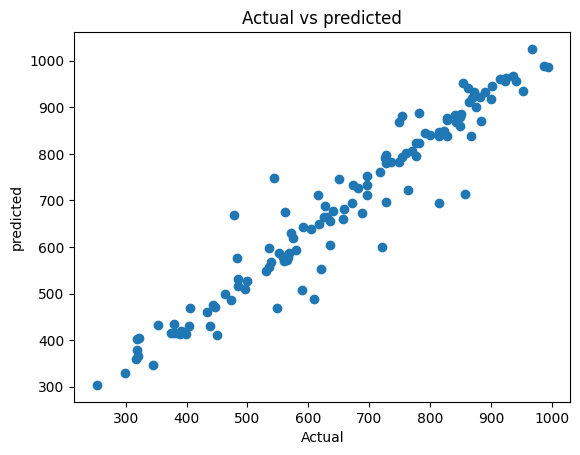

In [36]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test1, np.squeeze(model1.predict(X_test1)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test1, np.squeeze(model1.predict(X_test1)) )
mae= mean_absolute_error(Y_test1, np.squeeze(model1.predict(X_test1)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test1, np.squeeze(model1.predict(X_test1)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [37]:
prediction1 =np.squeeze(model1.predict([[80,2,2,129,prediction]]))
print("Prediction: {}".format(prediction1))

y_prd=np.squeeze(np.squeeze(model1.predict(X_test1)) )
predic_dif=pd.DataFrame({'Actual':Y_test1,'predict':y_prd,"differences":Y_test1-y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 78ms/step
Prediction: 547.6116333007812
4/4 [==============================] - 0s 2ms/step


,Actual,predict,differences
1224,651,744.881531,-93.881531
567,560,569.962463,-9.962463
768,630,663.902222,-33.902222
1315,940,955.921387,-15.921387
1041,782,824.208557,-42.208557
1038,776,823.159119,-47.159119
511,575,618.266113,-43.266113
27,299,329.170563,-30.170563
54,322,404.960419,-82.960419
905,696,732.552612,-36.552612


## RNN with Keras tuner dense

In [38]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model2=Sequential()
model2.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=64, activation='relu', return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(units=32, activation='relu', return_sequences=True))
model2.add(Dropout(0.4))
model2.add(LSTM(units=64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units=1))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 4, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_1 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 32)             12416     
                                                                 
 dropout_2 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [39]:
model2.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 6s 50ms/step - loss: 439636.7500 - mae: 637.4517 - val_loss: 181238.1406 - val_mae: 415.2024
Epoch 2/2000
22/22 [==============================] - 0s 14ms/step - loss: 100393.4375 - mae: 255.5045 - val_loss: 15945.2754 - val_mae: 90.6932
Epoch 3/2000
22/22 [==============================] - 0s 15ms/step - loss: 52808.5234 - mae: 179.2481 - val_loss: 9486.0459 - val_mae: 72.3678
Epoch 4/2000
22/22 [==============================] - 0s 15ms/step - loss: 43040.0820 - mae: 164.2139 - val_loss: 13227.2764 - val_mae: 91.9851
Epoch 5/2000
22/22 [==============================] - 0s 15ms/step - loss: 37948.3945 - mae: 155.4093 - val_loss: 19736.1250 - val_mae: 116.9289
Epoch 6/2000
22/22 [==============================] - 0s 13ms/step - loss: 38024.7891 - mae: 154.0821 - val_loss: 15931.6426 - val_mae: 104.8979
Epoch 7/2000
22/22 [==============================] - 0s 15ms/step - loss: 29866.6055 - mae: 136.9947 - val_loss: 22634.1621 - val_

22/22 [==============================] - 0s 16ms/step - loss: 21920.4844 - mae: 117.4634 - val_loss: 34926.8281 - val_mae: 160.6388
Epoch 58/2000
22/22 [==============================] - 0s 17ms/step - loss: 22455.1562 - mae: 119.8888 - val_loss: 18608.2207 - val_mae: 111.9694
Epoch 59/2000
22/22 [==============================] - 0s 15ms/step - loss: 20124.8809 - mae: 110.8917 - val_loss: 21230.2988 - val_mae: 119.0821
Epoch 60/2000
22/22 [==============================] - 0s 13ms/step - loss: 20349.2988 - mae: 111.0820 - val_loss: 31687.7422 - val_mae: 150.7294
Epoch 61/2000
22/22 [==============================] - 0s 15ms/step - loss: 21136.9883 - mae: 114.3040 - val_loss: 12097.8906 - val_mae: 90.6453
Epoch 62/2000
22/22 [==============================] - 0s 16ms/step - loss: 21978.5957 - mae: 118.9026 - val_loss: 22892.2266 - val_mae: 124.4683
Epoch 63/2000
22/22 [==============================] - 0s 15ms/step - loss: 18438.9414 - mae: 106.8470 - val_loss: 20669.1836 - val_mae: 11

22/22 [==============================] - 0s 15ms/step - loss: 16277.3057 - mae: 100.7258 - val_loss: 12383.3545 - val_mae: 87.4238
Epoch 114/2000
22/22 [==============================] - 0s 16ms/step - loss: 15821.4336 - mae: 97.4561 - val_loss: 14624.6279 - val_mae: 99.0181
Epoch 115/2000
22/22 [==============================] - 0s 14ms/step - loss: 15738.6055 - mae: 97.7763 - val_loss: 10093.0957 - val_mae: 79.2271
Epoch 116/2000
22/22 [==============================] - 0s 15ms/step - loss: 14685.9961 - mae: 94.2113 - val_loss: 12685.0146 - val_mae: 88.7711
Epoch 117/2000
22/22 [==============================] - 0s 15ms/step - loss: 15246.3701 - mae: 93.7579 - val_loss: 7610.3262 - val_mae: 67.1137
Epoch 118/2000
22/22 [==============================] - 0s 15ms/step - loss: 15003.8008 - mae: 95.1554 - val_loss: 9113.4219 - val_mae: 74.9408
Epoch 119/2000
22/22 [==============================] - 0s 14ms/step - loss: 13605.5820 - mae: 91.4928 - val_loss: 8474.8770 - val_mae: 69.5537
Ep

Epoch 170/2000
22/22 [==============================] - 0s 17ms/step - loss: 14533.4434 - mae: 94.4847 - val_loss: 5605.7979 - val_mae: 52.0913
Epoch 171/2000
22/22 [==============================] - 0s 21ms/step - loss: 13017.0400 - mae: 89.0047 - val_loss: 6730.3096 - val_mae: 62.3095
Epoch 172/2000
22/22 [==============================] - 0s 19ms/step - loss: 13638.9453 - mae: 90.7312 - val_loss: 11375.2539 - val_mae: 91.2852
Epoch 173/2000
22/22 [==============================] - 0s 19ms/step - loss: 13474.8145 - mae: 89.7683 - val_loss: 6457.5396 - val_mae: 60.0792
Epoch 174/2000
22/22 [==============================] - 0s 18ms/step - loss: 14331.5791 - mae: 92.0447 - val_loss: 8710.4521 - val_mae: 77.5332
Epoch 175/2000
22/22 [==============================] - 0s 18ms/step - loss: 14839.7490 - mae: 95.0751 - val_loss: 5314.6602 - val_mae: 53.7080
Epoch 176/2000
22/22 [==============================] - 0s 16ms/step - loss: 14433.8125 - mae: 92.7211 - val_loss: 5209.2603 - val_mae:

Epoch 227/2000
22/22 [==============================] - 0s 15ms/step - loss: 12967.1367 - mae: 88.2602 - val_loss: 5932.5195 - val_mae: 57.1104
Epoch 228/2000
22/22 [==============================] - 0s 16ms/step - loss: 13542.0127 - mae: 89.9594 - val_loss: 5398.6328 - val_mae: 52.4154
Epoch 229/2000
22/22 [==============================] - 0s 16ms/step - loss: 13041.6084 - mae: 89.9442 - val_loss: 11239.9033 - val_mae: 90.7107
Epoch 230/2000
22/22 [==============================] - 0s 16ms/step - loss: 12937.9795 - mae: 88.3681 - val_loss: 4568.7285 - val_mae: 42.9753
Epoch 231/2000
22/22 [==============================] - 0s 16ms/step - loss: 12705.0400 - mae: 86.1275 - val_loss: 8920.7832 - val_mae: 77.0415
Epoch 232/2000
22/22 [==============================] - 0s 16ms/step - loss: 13732.9189 - mae: 92.0511 - val_loss: 4739.0020 - val_mae: 45.5613
Epoch 233/2000
22/22 [==============================] - 0s 15ms/step - loss: 12338.6172 - mae: 86.1599 - val_loss: 7652.7778 - val_mae:

Epoch 284/2000
22/22 [==============================] - 0s 14ms/step - loss: 12102.4062 - mae: 85.0565 - val_loss: 6080.2583 - val_mae: 58.4202
Epoch 285/2000
22/22 [==============================] - 0s 15ms/step - loss: 14157.5479 - mae: 93.9292 - val_loss: 4663.6611 - val_mae: 47.6848
Epoch 286/2000
22/22 [==============================] - 0s 15ms/step - loss: 13542.4580 - mae: 90.4828 - val_loss: 6698.0898 - val_mae: 63.5486
Epoch 287/2000
22/22 [==============================] - 0s 14ms/step - loss: 13730.0273 - mae: 91.8659 - val_loss: 9193.4297 - val_mae: 80.7973
Epoch 288/2000
22/22 [==============================] - 0s 14ms/step - loss: 13502.8242 - mae: 90.1811 - val_loss: 4460.6011 - val_mae: 42.1377
Epoch 289/2000
22/22 [==============================] - 0s 14ms/step - loss: 12565.0732 - mae: 85.7092 - val_loss: 7031.8384 - val_mae: 64.9813
Epoch 290/2000
22/22 [==============================] - 0s 13ms/step - loss: 12952.0244 - mae: 88.2987 - val_loss: 6190.1030 - val_mae: 

Epoch 341/2000
22/22 [==============================] - 0s 16ms/step - loss: 13251.9111 - mae: 88.2677 - val_loss: 9149.0449 - val_mae: 82.1454
Epoch 342/2000
22/22 [==============================] - 0s 16ms/step - loss: 13178.5273 - mae: 88.4495 - val_loss: 4255.6812 - val_mae: 40.3394
Epoch 343/2000
22/22 [==============================] - 0s 16ms/step - loss: 12737.5312 - mae: 87.5100 - val_loss: 5590.1968 - val_mae: 58.0342
Epoch 344/2000
22/22 [==============================] - 0s 16ms/step - loss: 11589.5078 - mae: 80.6387 - val_loss: 5828.9409 - val_mae: 57.9733
Epoch 345/2000
22/22 [==============================] - 0s 16ms/step - loss: 13276.8877 - mae: 89.2707 - val_loss: 4894.2339 - val_mae: 47.8313
Epoch 346/2000
22/22 [==============================] - 0s 16ms/step - loss: 12006.1113 - mae: 85.6154 - val_loss: 11630.7930 - val_mae: 93.0342
Epoch 347/2000
22/22 [==============================] - 0s 16ms/step - loss: 13254.3936 - mae: 89.8701 - val_loss: 6279.8916 - val_mae:

Epoch 398/2000
22/22 [==============================] - 0s 15ms/step - loss: 12055.8906 - mae: 84.5942 - val_loss: 4562.0845 - val_mae: 44.3462
Epoch 399/2000
22/22 [==============================] - 0s 14ms/step - loss: 12022.8311 - mae: 84.6505 - val_loss: 5677.8491 - val_mae: 56.1232
Epoch 400/2000
22/22 [==============================] - 0s 14ms/step - loss: 12838.6729 - mae: 87.3351 - val_loss: 5380.8779 - val_mae: 52.7236
Epoch 401/2000
22/22 [==============================] - 0s 14ms/step - loss: 12115.4580 - mae: 85.3450 - val_loss: 6454.9683 - val_mae: 64.0170
Epoch 402/2000
22/22 [==============================] - 0s 15ms/step - loss: 12750.9160 - mae: 87.8999 - val_loss: 5011.3169 - val_mae: 47.3382
Epoch 403/2000
22/22 [==============================] - 0s 15ms/step - loss: 12741.8232 - mae: 87.8460 - val_loss: 5884.6138 - val_mae: 60.3029
Epoch 404/2000
22/22 [==============================] - 0s 19ms/step - loss: 13777.6602 - mae: 91.3594 - val_loss: 10429.7598 - val_mae:

Epoch 455/2000
22/22 [==============================] - 0s 18ms/step - loss: 11947.4961 - mae: 84.8403 - val_loss: 4641.3257 - val_mae: 47.1707
Epoch 456/2000
22/22 [==============================] - 0s 17ms/step - loss: 12676.6875 - mae: 87.5876 - val_loss: 6516.5698 - val_mae: 64.7400
Epoch 457/2000
22/22 [==============================] - 0s 18ms/step - loss: 13123.9932 - mae: 88.8644 - val_loss: 5774.9102 - val_mae: 59.6797
Epoch 458/2000
22/22 [==============================] - 0s 16ms/step - loss: 13196.4912 - mae: 88.8256 - val_loss: 6153.3813 - val_mae: 62.2748
Epoch 459/2000
22/22 [==============================] - 0s 18ms/step - loss: 12988.0693 - mae: 86.9739 - val_loss: 5346.4507 - val_mae: 53.9161
Epoch 460/2000
22/22 [==============================] - 0s 19ms/step - loss: 10642.5117 - mae: 80.9867 - val_loss: 4298.8291 - val_mae: 40.3258
Epoch 461/2000
22/22 [==============================] - 0s 18ms/step - loss: 13017.7402 - mae: 87.4294 - val_loss: 4467.9331 - val_mae: 

Epoch 512/2000
22/22 [==============================] - 0s 15ms/step - loss: 13035.6309 - mae: 87.6399 - val_loss: 4100.0029 - val_mae: 38.1104
Epoch 513/2000
22/22 [==============================] - 0s 13ms/step - loss: 12939.6299 - mae: 87.7589 - val_loss: 8536.6348 - val_mae: 80.1809
Epoch 514/2000
22/22 [==============================] - 0s 14ms/step - loss: 13308.7607 - mae: 89.9097 - val_loss: 6540.6338 - val_mae: 63.0860
Epoch 515/2000
22/22 [==============================] - 0s 14ms/step - loss: 12637.4180 - mae: 87.1184 - val_loss: 5259.0195 - val_mae: 49.4846
Epoch 516/2000
22/22 [==============================] - 0s 14ms/step - loss: 11289.3291 - mae: 83.1477 - val_loss: 5899.1382 - val_mae: 55.0319
Epoch 517/2000
22/22 [==============================] - 0s 13ms/step - loss: 12700.5664 - mae: 87.4331 - val_loss: 7499.6265 - val_mae: 68.2698
Epoch 518/2000
22/22 [==============================] - 0s 13ms/step - loss: 12864.7549 - mae: 87.2701 - val_loss: 5122.4956 - val_mae: 

Epoch 569/2000
22/22 [==============================] - 0s 13ms/step - loss: 12269.2949 - mae: 85.5835 - val_loss: 5389.6265 - val_mae: 51.0318
Epoch 570/2000
22/22 [==============================] - 0s 15ms/step - loss: 10719.1592 - mae: 80.9606 - val_loss: 5528.9067 - val_mae: 55.3973
Epoch 571/2000
22/22 [==============================] - 0s 13ms/step - loss: 10835.6748 - mae: 82.3019 - val_loss: 4840.9751 - val_mae: 43.1621
Epoch 572/2000
22/22 [==============================] - 0s 14ms/step - loss: 12322.4668 - mae: 86.2726 - val_loss: 7474.0820 - val_mae: 71.4763
Epoch 573/2000
22/22 [==============================] - 0s 13ms/step - loss: 11969.1133 - mae: 83.4299 - val_loss: 4539.8979 - val_mae: 43.6390
Epoch 574/2000
22/22 [==============================] - 0s 13ms/step - loss: 11245.5312 - mae: 81.4429 - val_loss: 5736.3618 - val_mae: 56.7570
Epoch 575/2000
22/22 [==============================] - 0s 13ms/step - loss: 11826.0547 - mae: 83.1317 - val_loss: 4995.4448 - val_mae: 

Epoch 626/2000
22/22 [==============================] - 0s 14ms/step - loss: 11618.2246 - mae: 84.3112 - val_loss: 5430.4600 - val_mae: 51.7354
Epoch 627/2000
22/22 [==============================] - 0s 14ms/step - loss: 12166.0977 - mae: 85.6141 - val_loss: 5987.7510 - val_mae: 60.5798
Epoch 628/2000
22/22 [==============================] - 0s 14ms/step - loss: 10807.0889 - mae: 78.8390 - val_loss: 4607.3501 - val_mae: 44.8892
Epoch 629/2000
22/22 [==============================] - 0s 16ms/step - loss: 12196.0234 - mae: 84.7464 - val_loss: 7531.8682 - val_mae: 67.1466
Epoch 630/2000
22/22 [==============================] - 0s 16ms/step - loss: 11212.1084 - mae: 80.7719 - val_loss: 4542.1904 - val_mae: 45.1309
Epoch 631/2000
22/22 [==============================] - 0s 19ms/step - loss: 12916.8281 - mae: 87.4964 - val_loss: 6023.7334 - val_mae: 56.7050
Epoch 632/2000
22/22 [==============================] - 0s 19ms/step - loss: 12340.1699 - mae: 84.0437 - val_loss: 5887.7041 - val_mae: 

Epoch 683/2000
22/22 [==============================] - 0s 18ms/step - loss: 12267.3906 - mae: 87.1446 - val_loss: 4022.1162 - val_mae: 38.1260
Epoch 684/2000
22/22 [==============================] - 0s 18ms/step - loss: 13579.6396 - mae: 90.5774 - val_loss: 7826.2524 - val_mae: 75.3917
Epoch 685/2000
22/22 [==============================] - 0s 19ms/step - loss: 12122.1758 - mae: 85.5929 - val_loss: 4890.0474 - val_mae: 48.7662
Epoch 686/2000
22/22 [==============================] - 0s 20ms/step - loss: 12618.0811 - mae: 85.5316 - val_loss: 4505.7202 - val_mae: 42.8806
Epoch 687/2000
22/22 [==============================] - 0s 19ms/step - loss: 10872.2383 - mae: 81.5453 - val_loss: 4326.6416 - val_mae: 38.8582
Epoch 688/2000
22/22 [==============================] - 0s 18ms/step - loss: 12504.8555 - mae: 84.2673 - val_loss: 6891.3862 - val_mae: 67.8880
Epoch 689/2000
22/22 [==============================] - 0s 17ms/step - loss: 11631.5742 - mae: 83.3184 - val_loss: 5282.6729 - val_mae: 

Epoch 740/2000
22/22 [==============================] - 0s 16ms/step - loss: 11694.1709 - mae: 83.6760 - val_loss: 4989.3721 - val_mae: 45.3077
Epoch 741/2000
22/22 [==============================] - 0s 16ms/step - loss: 12319.5850 - mae: 86.2446 - val_loss: 5264.0894 - val_mae: 50.0835
Epoch 742/2000
22/22 [==============================] - 0s 16ms/step - loss: 12560.3721 - mae: 87.7187 - val_loss: 4661.9004 - val_mae: 46.6885
Epoch 743/2000
22/22 [==============================] - 0s 16ms/step - loss: 11315.5820 - mae: 81.7165 - val_loss: 8184.2666 - val_mae: 75.8387
Epoch 744/2000
22/22 [==============================] - 0s 16ms/step - loss: 11242.5713 - mae: 81.8498 - val_loss: 5745.9927 - val_mae: 57.2972
Epoch 745/2000
22/22 [==============================] - 0s 16ms/step - loss: 10900.4990 - mae: 81.9192 - val_loss: 4698.3228 - val_mae: 46.2327
Epoch 746/2000
22/22 [==============================] - 0s 16ms/step - loss: 12261.0479 - mae: 86.4529 - val_loss: 6706.3672 - val_mae: 

Epoch 797/2000
22/22 [==============================] - 0s 17ms/step - loss: 11087.5361 - mae: 83.4707 - val_loss: 7256.8760 - val_mae: 69.5434
Epoch 798/2000
22/22 [==============================] - 0s 16ms/step - loss: 11760.0342 - mae: 84.8759 - val_loss: 6097.7817 - val_mae: 59.7993
Epoch 799/2000
22/22 [==============================] - 0s 16ms/step - loss: 11748.0010 - mae: 83.9184 - val_loss: 4817.6323 - val_mae: 45.5211
Epoch 800/2000
22/22 [==============================] - 0s 17ms/step - loss: 12124.8057 - mae: 85.8556 - val_loss: 4993.4922 - val_mae: 47.8188
Epoch 801/2000
22/22 [==============================] - 0s 16ms/step - loss: 11290.5938 - mae: 83.2610 - val_loss: 5751.1147 - val_mae: 56.4825
Epoch 802/2000
22/22 [==============================] - 0s 15ms/step - loss: 11326.6436 - mae: 82.9588 - val_loss: 5065.6753 - val_mae: 49.8186
Epoch 803/2000
22/22 [==============================] - 0s 15ms/step - loss: 12474.6152 - mae: 85.7976 - val_loss: 4298.1064 - val_mae: 

Epoch 854/2000
22/22 [==============================] - 0s 14ms/step - loss: 11090.8164 - mae: 81.6326 - val_loss: 5865.7915 - val_mae: 58.7757
Epoch 855/2000
22/22 [==============================] - 0s 14ms/step - loss: 12899.6963 - mae: 87.0952 - val_loss: 4437.0996 - val_mae: 39.4863
Epoch 856/2000
22/22 [==============================] - 0s 14ms/step - loss: 11250.4873 - mae: 81.0521 - val_loss: 4718.8257 - val_mae: 44.0025
Epoch 857/2000
22/22 [==============================] - 0s 15ms/step - loss: 11610.2715 - mae: 84.2008 - val_loss: 4751.9927 - val_mae: 47.5102
Epoch 858/2000
22/22 [==============================] - 0s 14ms/step - loss: 11357.3564 - mae: 83.8242 - val_loss: 5398.8916 - val_mae: 54.3656
Epoch 859/2000
22/22 [==============================] - 0s 14ms/step - loss: 11120.3887 - mae: 81.2185 - val_loss: 4591.1362 - val_mae: 44.4495
Epoch 860/2000
22/22 [==============================] - 0s 14ms/step - loss: 14305.6523 - mae: 91.2672 - val_loss: 4976.9653 - val_mae: 

Epoch 911/2000
22/22 [==============================] - 0s 15ms/step - loss: 11932.0264 - mae: 84.4793 - val_loss: 7041.8735 - val_mae: 68.3289
Epoch 912/2000
22/22 [==============================] - 0s 15ms/step - loss: 10897.0518 - mae: 80.2691 - val_loss: 5006.9854 - val_mae: 49.3682
Epoch 913/2000
22/22 [==============================] - 0s 16ms/step - loss: 10450.1348 - mae: 79.9046 - val_loss: 6348.8047 - val_mae: 60.2666
Epoch 914/2000
22/22 [==============================] - 0s 15ms/step - loss: 12328.3555 - mae: 85.0724 - val_loss: 8122.8564 - val_mae: 75.0564
Epoch 915/2000
22/22 [==============================] - 0s 15ms/step - loss: 12068.4365 - mae: 86.1779 - val_loss: 4869.7871 - val_mae: 45.7929
Epoch 916/2000
22/22 [==============================] - 0s 15ms/step - loss: 12161.2158 - mae: 86.1498 - val_loss: 8125.6812 - val_mae: 73.7401
Epoch 917/2000
22/22 [==============================] - 0s 14ms/step - loss: 12105.2969 - mae: 85.5844 - val_loss: 5686.9634 - val_mae: 

Epoch 968/2000
22/22 [==============================] - 0s 14ms/step - loss: 10547.4287 - mae: 79.2959 - val_loss: 5767.4863 - val_mae: 57.4563
Epoch 969/2000
22/22 [==============================] - 0s 14ms/step - loss: 11208.1631 - mae: 82.4718 - val_loss: 4876.0454 - val_mae: 47.8096
Epoch 970/2000
22/22 [==============================] - 0s 18ms/step - loss: 10872.5264 - mae: 80.4624 - val_loss: 4233.7812 - val_mae: 40.4076
Epoch 971/2000
22/22 [==============================] - 0s 19ms/step - loss: 11748.0039 - mae: 83.6597 - val_loss: 5434.4067 - val_mae: 52.8977
Epoch 972/2000
22/22 [==============================] - 0s 18ms/step - loss: 11085.0098 - mae: 81.2786 - val_loss: 6097.2529 - val_mae: 61.4738
Epoch 973/2000
22/22 [==============================] - 0s 20ms/step - loss: 11822.3604 - mae: 83.8761 - val_loss: 5048.8286 - val_mae: 52.1896
Epoch 974/2000
22/22 [==============================] - 0s 18ms/step - loss: 10589.7539 - mae: 78.2269 - val_loss: 5224.4224 - val_mae: 

Epoch 1025/2000
22/22 [==============================] - 0s 15ms/step - loss: 12414.7217 - mae: 85.6434 - val_loss: 5123.3550 - val_mae: 49.3595
Epoch 1026/2000
22/22 [==============================] - 0s 15ms/step - loss: 11002.6660 - mae: 80.3275 - val_loss: 5559.3472 - val_mae: 51.5860
Epoch 1027/2000
22/22 [==============================] - 0s 15ms/step - loss: 11548.2998 - mae: 82.1820 - val_loss: 5498.2158 - val_mae: 53.3308
Epoch 1028/2000
22/22 [==============================] - 0s 15ms/step - loss: 11918.9199 - mae: 83.4046 - val_loss: 6361.7632 - val_mae: 60.6933
Epoch 1029/2000
22/22 [==============================] - 0s 15ms/step - loss: 11334.3486 - mae: 82.8695 - val_loss: 4801.2695 - val_mae: 45.3417
Epoch 1030/2000
22/22 [==============================] - 0s 15ms/step - loss: 11466.9434 - mae: 83.0732 - val_loss: 6368.3384 - val_mae: 63.4033
Epoch 1031/2000
22/22 [==============================] - 0s 15ms/step - loss: 12904.1631 - mae: 86.7679 - val_loss: 4290.4009 - va

22/22 [==============================] - 0s 16ms/step - loss: 11698.6641 - mae: 85.0224 - val_loss: 5402.8438 - val_mae: 55.8209
Epoch 1082/2000
22/22 [==============================] - 0s 15ms/step - loss: 11412.6885 - mae: 81.3463 - val_loss: 8292.6875 - val_mae: 75.0706
Epoch 1083/2000
22/22 [==============================] - 0s 16ms/step - loss: 11736.1318 - mae: 83.3969 - val_loss: 6791.9243 - val_mae: 65.5510
Epoch 1084/2000
22/22 [==============================] - 0s 16ms/step - loss: 11183.3115 - mae: 80.0422 - val_loss: 4669.1284 - val_mae: 43.6995
Epoch 1085/2000
22/22 [==============================] - 0s 16ms/step - loss: 10418.8916 - mae: 79.9473 - val_loss: 5047.3945 - val_mae: 51.3397
Epoch 1086/2000
22/22 [==============================] - 0s 15ms/step - loss: 10789.6943 - mae: 81.1999 - val_loss: 5405.0684 - val_mae: 55.0555
Epoch 1087/2000
22/22 [==============================] - 0s 17ms/step - loss: 11129.8174 - mae: 81.9592 - val_loss: 4685.3701 - val_mae: 43.1357
E

22/22 [==============================] - 0s 16ms/step - loss: 13167.0215 - mae: 88.9834 - val_loss: 4401.5464 - val_mae: 42.4554
Epoch 1138/2000
22/22 [==============================] - 0s 16ms/step - loss: 11100.0146 - mae: 79.9281 - val_loss: 5632.1738 - val_mae: 53.7835
Epoch 1139/2000
22/22 [==============================] - 0s 16ms/step - loss: 12387.1514 - mae: 86.2493 - val_loss: 5964.8467 - val_mae: 57.3177
Epoch 1140/2000
22/22 [==============================] - 0s 16ms/step - loss: 11544.3086 - mae: 83.0716 - val_loss: 6297.3975 - val_mae: 60.2009
Epoch 1141/2000
22/22 [==============================] - 0s 16ms/step - loss: 11675.2793 - mae: 84.1723 - val_loss: 4944.5796 - val_mae: 49.9564
Epoch 1142/2000
22/22 [==============================] - 0s 16ms/step - loss: 10436.9072 - mae: 78.3111 - val_loss: 5541.4927 - val_mae: 51.1269
Epoch 1143/2000
22/22 [==============================] - 0s 16ms/step - loss: 10939.4316 - mae: 82.6990 - val_loss: 4242.9673 - val_mae: 38.6189
E

22/22 [==============================] - 0s 16ms/step - loss: 11509.9004 - mae: 81.7816 - val_loss: 4628.5493 - val_mae: 48.0072
Epoch 1194/2000
22/22 [==============================] - 0s 16ms/step - loss: 11340.4619 - mae: 83.8609 - val_loss: 4507.4585 - val_mae: 45.4514
Epoch 1195/2000
22/22 [==============================] - 0s 16ms/step - loss: 11854.0898 - mae: 84.1880 - val_loss: 4559.1367 - val_mae: 42.3481
Epoch 1196/2000
22/22 [==============================] - 0s 16ms/step - loss: 12059.7568 - mae: 84.3415 - val_loss: 6537.8662 - val_mae: 63.7056
Epoch 1197/2000
22/22 [==============================] - 0s 16ms/step - loss: 11882.9414 - mae: 84.3432 - val_loss: 5927.1621 - val_mae: 52.3481
Epoch 1198/2000
22/22 [==============================] - 0s 16ms/step - loss: 13382.3330 - mae: 92.5044 - val_loss: 4843.4224 - val_mae: 43.3282
Epoch 1199/2000
22/22 [==============================] - 0s 16ms/step - loss: 11375.6387 - mae: 82.6650 - val_loss: 4814.5649 - val_mae: 47.4727
E

22/22 [==============================] - 0s 16ms/step - loss: 10707.7412 - mae: 79.6883 - val_loss: 4687.8066 - val_mae: 47.3087
Epoch 1250/2000
22/22 [==============================] - 0s 16ms/step - loss: 11958.4453 - mae: 84.1320 - val_loss: 6593.6221 - val_mae: 65.8887
Epoch 1251/2000
22/22 [==============================] - 0s 16ms/step - loss: 10690.0605 - mae: 79.9593 - val_loss: 4994.6050 - val_mae: 49.1690
Epoch 1252/2000
22/22 [==============================] - 0s 16ms/step - loss: 9476.0801 - mae: 74.6547 - val_loss: 4781.4600 - val_mae: 47.3829
Epoch 1253/2000
22/22 [==============================] - 0s 16ms/step - loss: 11158.9707 - mae: 83.1987 - val_loss: 5561.6191 - val_mae: 54.4309
Epoch 1254/2000
22/22 [==============================] - 0s 16ms/step - loss: 11039.4854 - mae: 81.3726 - val_loss: 6113.7427 - val_mae: 59.6540
Epoch 1255/2000
22/22 [==============================] - 0s 16ms/step - loss: 11171.8301 - mae: 80.6096 - val_loss: 5309.9541 - val_mae: 52.9479
Ep

22/22 [==============================] - 0s 16ms/step - loss: 11443.1562 - mae: 81.5511 - val_loss: 8140.8750 - val_mae: 71.9981
Epoch 1306/2000
22/22 [==============================] - 0s 16ms/step - loss: 11343.8828 - mae: 82.8445 - val_loss: 6293.9854 - val_mae: 61.1903
Epoch 1307/2000
22/22 [==============================] - 0s 17ms/step - loss: 10805.4824 - mae: 80.4955 - val_loss: 7432.0522 - val_mae: 62.0877
Epoch 1308/2000
22/22 [==============================] - 0s 17ms/step - loss: 11604.8184 - mae: 83.5319 - val_loss: 5643.7627 - val_mae: 54.3750
Epoch 1309/2000
22/22 [==============================] - 0s 17ms/step - loss: 11307.1348 - mae: 80.3997 - val_loss: 4833.9111 - val_mae: 40.5520
Epoch 1310/2000
22/22 [==============================] - 0s 18ms/step - loss: 11833.7900 - mae: 83.1034 - val_loss: 5024.4458 - val_mae: 50.2637
Epoch 1311/2000
22/22 [==============================] - 0s 17ms/step - loss: 11515.6582 - mae: 83.5571 - val_loss: 5906.5967 - val_mae: 53.7978
E

22/22 [==============================] - 0s 15ms/step - loss: 10950.2793 - mae: 81.9446 - val_loss: 4462.6860 - val_mae: 40.2994
Epoch 1362/2000
22/22 [==============================] - 0s 15ms/step - loss: 10578.0195 - mae: 80.0039 - val_loss: 5226.4658 - val_mae: 52.1177
Epoch 1363/2000
22/22 [==============================] - 0s 15ms/step - loss: 11465.1084 - mae: 81.7557 - val_loss: 7807.2368 - val_mae: 70.5799
Epoch 1364/2000
22/22 [==============================] - 0s 15ms/step - loss: 11402.1758 - mae: 81.9851 - val_loss: 5182.6484 - val_mae: 49.5747
Epoch 1365/2000
22/22 [==============================] - 0s 15ms/step - loss: 10556.8486 - mae: 78.0152 - val_loss: 5127.3081 - val_mae: 52.1196
Epoch 1366/2000
22/22 [==============================] - 0s 15ms/step - loss: 10937.6426 - mae: 82.2017 - val_loss: 4984.2793 - val_mae: 45.6452
Epoch 1367/2000
22/22 [==============================] - 0s 16ms/step - loss: 12107.8174 - mae: 84.7576 - val_loss: 5584.6890 - val_mae: 53.0406
E

22/22 [==============================] - 0s 15ms/step - loss: 11586.6113 - mae: 83.0324 - val_loss: 5334.6567 - val_mae: 52.8439
Epoch 1418/2000
22/22 [==============================] - 0s 15ms/step - loss: 10299.5273 - mae: 78.2419 - val_loss: 5020.9844 - val_mae: 43.5061
Epoch 1419/2000
22/22 [==============================] - 0s 15ms/step - loss: 10598.6113 - mae: 79.8311 - val_loss: 5747.8848 - val_mae: 53.5032
Epoch 1420/2000
22/22 [==============================] - 0s 15ms/step - loss: 11071.3721 - mae: 81.0994 - val_loss: 6270.9370 - val_mae: 61.4959
Epoch 1421/2000
22/22 [==============================] - 0s 15ms/step - loss: 9960.7627 - mae: 79.1835 - val_loss: 5962.2930 - val_mae: 56.7522
Epoch 1422/2000
22/22 [==============================] - 0s 15ms/step - loss: 10760.3340 - mae: 81.4213 - val_loss: 5510.7095 - val_mae: 50.5406
Epoch 1423/2000
22/22 [==============================] - 0s 15ms/step - loss: 10644.5449 - mae: 79.0159 - val_loss: 5049.8833 - val_mae: 47.6727
Ep

22/22 [==============================] - 0s 15ms/step - loss: 11951.9863 - mae: 84.5184 - val_loss: 9142.5088 - val_mae: 78.0683
Epoch 1474/2000
22/22 [==============================] - 0s 15ms/step - loss: 12005.0869 - mae: 82.0685 - val_loss: 4831.3491 - val_mae: 43.3068
Epoch 1475/2000
22/22 [==============================] - 0s 15ms/step - loss: 10472.0244 - mae: 79.7191 - val_loss: 5779.1958 - val_mae: 52.4540
Epoch 1476/2000
22/22 [==============================] - 0s 15ms/step - loss: 10449.9629 - mae: 78.3916 - val_loss: 4620.7456 - val_mae: 43.2353
Epoch 1477/2000
22/22 [==============================] - 0s 15ms/step - loss: 10424.9570 - mae: 79.2443 - val_loss: 6254.0928 - val_mae: 56.6570
Epoch 1478/2000
22/22 [==============================] - 0s 15ms/step - loss: 10678.8877 - mae: 80.8252 - val_loss: 5383.5664 - val_mae: 53.4518
Epoch 1479/2000
22/22 [==============================] - 0s 15ms/step - loss: 9799.7705 - mae: 78.3883 - val_loss: 5402.8193 - val_mae: 51.7683
Ep

22/22 [==============================] - 0s 15ms/step - loss: 10943.9453 - mae: 80.9825 - val_loss: 4170.4155 - val_mae: 38.8159
Epoch 1530/2000
22/22 [==============================] - 0s 15ms/step - loss: 11949.3301 - mae: 83.8566 - val_loss: 5375.6562 - val_mae: 46.6062
Epoch 1531/2000
22/22 [==============================] - 0s 15ms/step - loss: 11182.4512 - mae: 79.6160 - val_loss: 5925.0410 - val_mae: 57.6505
Epoch 1532/2000
22/22 [==============================] - 0s 15ms/step - loss: 10805.5068 - mae: 80.0688 - val_loss: 4565.9985 - val_mae: 41.2010
Epoch 1533/2000
22/22 [==============================] - 0s 15ms/step - loss: 11474.0547 - mae: 82.4863 - val_loss: 5404.2349 - val_mae: 50.2892
Epoch 1534/2000
22/22 [==============================] - 0s 15ms/step - loss: 10830.3828 - mae: 80.0143 - val_loss: 4921.2144 - val_mae: 44.5697
Epoch 1535/2000
22/22 [==============================] - 0s 15ms/step - loss: 10920.4355 - mae: 80.0861 - val_loss: 5240.3281 - val_mae: 48.9786
E

22/22 [==============================] - 0s 15ms/step - loss: 10062.8818 - mae: 77.4165 - val_loss: 5200.2573 - val_mae: 52.2462
Epoch 1586/2000
22/22 [==============================] - 0s 15ms/step - loss: 10880.2305 - mae: 80.6730 - val_loss: 6203.1445 - val_mae: 59.7063
Epoch 1587/2000
22/22 [==============================] - 0s 15ms/step - loss: 11115.4268 - mae: 81.5621 - val_loss: 5366.5757 - val_mae: 53.2643
Epoch 1588/2000
22/22 [==============================] - 0s 15ms/step - loss: 10673.3145 - mae: 80.0857 - val_loss: 5948.3291 - val_mae: 56.4408
Epoch 1589/2000
22/22 [==============================] - 0s 16ms/step - loss: 10662.6309 - mae: 79.1087 - val_loss: 4543.4907 - val_mae: 42.0139
Epoch 1590/2000
22/22 [==============================] - 0s 15ms/step - loss: 11552.3154 - mae: 82.5909 - val_loss: 5542.4443 - val_mae: 56.0097
Epoch 1591/2000
22/22 [==============================] - 0s 15ms/step - loss: 12570.4453 - mae: 86.0065 - val_loss: 5739.6797 - val_mae: 56.5079
E

22/22 [==============================] - 0s 16ms/step - loss: 10245.0840 - mae: 80.0714 - val_loss: 4481.7866 - val_mae: 40.0267
Epoch 1642/2000
22/22 [==============================] - 0s 16ms/step - loss: 10730.1680 - mae: 81.0703 - val_loss: 4732.9341 - val_mae: 46.2111
Epoch 1643/2000
22/22 [==============================] - 0s 16ms/step - loss: 10156.3359 - mae: 78.4974 - val_loss: 6883.4507 - val_mae: 67.0609
Epoch 1644/2000
22/22 [==============================] - 0s 16ms/step - loss: 10976.7061 - mae: 79.6958 - val_loss: 4885.3330 - val_mae: 46.1501
Epoch 1645/2000
22/22 [==============================] - 0s 16ms/step - loss: 9681.8721 - mae: 75.1994 - val_loss: 4436.1812 - val_mae: 43.9983
Epoch 1646/2000
22/22 [==============================] - 0s 16ms/step - loss: 10070.0527 - mae: 79.2585 - val_loss: 6319.9180 - val_mae: 62.8623
Epoch 1647/2000
22/22 [==============================] - 0s 16ms/step - loss: 10302.4492 - mae: 79.3779 - val_loss: 5062.7363 - val_mae: 50.8499
Ep

22/22 [==============================] - 0s 16ms/step - loss: 10187.5098 - mae: 78.3257 - val_loss: 4630.5825 - val_mae: 41.2148
Epoch 1698/2000
22/22 [==============================] - 0s 16ms/step - loss: 11073.6855 - mae: 81.5369 - val_loss: 4476.5713 - val_mae: 42.8131
Epoch 1699/2000
22/22 [==============================] - 0s 16ms/step - loss: 10522.0801 - mae: 78.1641 - val_loss: 5511.6235 - val_mae: 54.6126
Epoch 1700/2000
22/22 [==============================] - 0s 16ms/step - loss: 10927.8145 - mae: 80.9014 - val_loss: 5157.5869 - val_mae: 50.7296
Epoch 1701/2000
22/22 [==============================] - 0s 16ms/step - loss: 10597.3105 - mae: 79.8283 - val_loss: 4589.3633 - val_mae: 45.3032
Epoch 1702/2000
22/22 [==============================] - 0s 16ms/step - loss: 11673.5977 - mae: 82.5247 - val_loss: 5830.1553 - val_mae: 56.3190
Epoch 1703/2000
22/22 [==============================] - 0s 16ms/step - loss: 10164.1348 - mae: 77.4862 - val_loss: 4638.7983 - val_mae: 40.5693
E

22/22 [==============================] - 0s 16ms/step - loss: 10931.8584 - mae: 80.8847 - val_loss: 4988.3564 - val_mae: 48.5503
Epoch 1754/2000
22/22 [==============================] - 0s 17ms/step - loss: 11076.8213 - mae: 82.7439 - val_loss: 6143.6152 - val_mae: 61.8620
Epoch 1755/2000
22/22 [==============================] - 0s 16ms/step - loss: 11075.6172 - mae: 81.2916 - val_loss: 4107.0747 - val_mae: 39.5522
Epoch 1756/2000
22/22 [==============================] - 0s 16ms/step - loss: 10568.8203 - mae: 79.0121 - val_loss: 4898.7222 - val_mae: 42.2251
Epoch 1757/2000
22/22 [==============================] - 0s 16ms/step - loss: 10048.1064 - mae: 76.9214 - val_loss: 7424.0938 - val_mae: 68.9907
Epoch 1758/2000
22/22 [==============================] - 0s 16ms/step - loss: 10397.3584 - mae: 78.7415 - val_loss: 6747.5410 - val_mae: 63.7125
Epoch 1759/2000
22/22 [==============================] - 0s 16ms/step - loss: 10726.3936 - mae: 79.9823 - val_loss: 5353.7275 - val_mae: 51.3439
E

22/22 [==============================] - 0s 16ms/step - loss: 10464.3369 - mae: 78.2135 - val_loss: 5449.6094 - val_mae: 52.1518
Epoch 1810/2000
22/22 [==============================] - 0s 16ms/step - loss: 10156.3057 - mae: 77.4719 - val_loss: 6444.3203 - val_mae: 61.1753
Epoch 1811/2000
22/22 [==============================] - 0s 17ms/step - loss: 10857.1777 - mae: 80.4032 - val_loss: 7306.0723 - val_mae: 66.8719
Epoch 1812/2000
22/22 [==============================] - 0s 16ms/step - loss: 10688.0557 - mae: 81.8939 - val_loss: 4850.0757 - val_mae: 44.7413
Epoch 1813/2000
22/22 [==============================] - 0s 16ms/step - loss: 11208.7598 - mae: 81.3519 - val_loss: 4560.2798 - val_mae: 40.8953
Epoch 1814/2000
22/22 [==============================] - 0s 16ms/step - loss: 11309.7793 - mae: 81.9978 - val_loss: 5077.2061 - val_mae: 46.2293
Epoch 1815/2000
22/22 [==============================] - 0s 16ms/step - loss: 10393.4502 - mae: 78.4992 - val_loss: 5787.4619 - val_mae: 54.0356
E

22/22 [==============================] - 0s 16ms/step - loss: 10368.4395 - mae: 78.6258 - val_loss: 4630.4658 - val_mae: 41.1385
Epoch 1866/2000
22/22 [==============================] - 0s 15ms/step - loss: 11108.4629 - mae: 81.5091 - val_loss: 4176.2607 - val_mae: 41.2392
Epoch 1867/2000
22/22 [==============================] - 0s 15ms/step - loss: 10430.9893 - mae: 78.3434 - val_loss: 5402.4878 - val_mae: 58.2029
Epoch 1868/2000
22/22 [==============================] - 0s 16ms/step - loss: 10754.9121 - mae: 81.2681 - val_loss: 5937.8276 - val_mae: 54.9994
Epoch 1869/2000
22/22 [==============================] - 0s 16ms/step - loss: 11074.9834 - mae: 81.3611 - val_loss: 7234.5303 - val_mae: 69.6573
Epoch 1870/2000
22/22 [==============================] - 0s 16ms/step - loss: 10419.4727 - mae: 77.6438 - val_loss: 4724.8804 - val_mae: 42.8945
Epoch 1871/2000
22/22 [==============================] - 0s 19ms/step - loss: 10901.4746 - mae: 79.1219 - val_loss: 4870.5791 - val_mae: 48.8976
E

Epoch 1922/2000
22/22 [==============================] - 0s 15ms/step - loss: 11214.0645 - mae: 82.8487 - val_loss: 5809.3154 - val_mae: 58.5334
Epoch 1923/2000
22/22 [==============================] - 0s 15ms/step - loss: 10059.1006 - mae: 77.4146 - val_loss: 5917.5146 - val_mae: 58.9788
Epoch 1924/2000
22/22 [==============================] - 0s 15ms/step - loss: 10907.9668 - mae: 79.7790 - val_loss: 4423.3184 - val_mae: 42.6176
Epoch 1925/2000
22/22 [==============================] - 0s 15ms/step - loss: 10377.3096 - mae: 78.7108 - val_loss: 5356.2441 - val_mae: 53.1821
Epoch 1926/2000
22/22 [==============================] - 0s 15ms/step - loss: 10352.8369 - mae: 77.2615 - val_loss: 5144.5283 - val_mae: 48.4074
Epoch 1927/2000
22/22 [==============================] - 0s 16ms/step - loss: 10758.1230 - mae: 81.7630 - val_loss: 7095.5293 - val_mae: 66.6740
Epoch 1928/2000
22/22 [==============================] - 0s 15ms/step - loss: 10436.2568 - mae: 79.3425 - val_loss: 6854.6318 - va

22/22 [==============================] - 0s 18ms/step - loss: 9847.0312 - mae: 77.2888 - val_loss: 4934.2695 - val_mae: 44.4485
Epoch 1979/2000
22/22 [==============================] - 0s 16ms/step - loss: 10754.1436 - mae: 79.2813 - val_loss: 5297.9165 - val_mae: 47.5455
Epoch 1980/2000
22/22 [==============================] - 0s 15ms/step - loss: 11382.7676 - mae: 81.9414 - val_loss: 4692.1021 - val_mae: 41.5392
Epoch 1981/2000
22/22 [==============================] - 0s 16ms/step - loss: 10271.0420 - mae: 78.9354 - val_loss: 4656.4287 - val_mae: 41.5220
Epoch 1982/2000
22/22 [==============================] - 0s 17ms/step - loss: 11062.7129 - mae: 81.4843 - val_loss: 4673.4951 - val_mae: 45.7159
Epoch 1983/2000
22/22 [==============================] - 0s 17ms/step - loss: 11736.3096 - mae: 84.0525 - val_loss: 4911.5312 - val_mae: 42.1379
Epoch 1984/2000
22/22 [==============================] - 0s 15ms/step - loss: 11391.5430 - mae: 80.9227 - val_loss: 4516.3110 - val_mae: 41.8661
Ep

In [40]:
prediction2 = np.squeeze(model2.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction2))

1/1 [==============================] - 1s 1s/step
Prediction: 484.5643615722656


In [41]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

14/14 [==============================] - 1s 5ms/step
      Actual     predict  differences
431      529  524.429810     4.570190
610      624  618.110046     5.889954
795      635  659.823792   -24.823792
1238     929  926.108521     2.891479
1228     890  918.049438   -28.049438
...      ...         ...          ...
103      686  534.030273   151.969727
575      543  560.641846   -17.641846
60       694  628.466736    65.533264
988      829  860.499878   -31.499878
511      575  560.831299    14.168701

[426 rows x 3 columns]


In [42]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-240.30078125
355.39385986328125
255.2244873046875
-377.8792724609375
306.47314453125
-497.819091796875
230.37164306640625
-251.45794677734375
278.88018798828125
lower bound: -211.3015237526966
upper bound: 220.86899210038035


In [43]:
A.drop(A[(A['differences'] >220)].index, inplace=True)
A.drop(A[(A['differences'] <-211)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HeatingCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X2=B.drop('Actual',axis=1)
Y2=B['Actual']
X_train2, X_test2, Y_train2, Y_test2 =train_test_split(X2,Y2, test_size=0.3, random_state = 0)

      AverageFloorArea  Year/Quarter  Property Type  \
1                   14             4              1   
2                   19             1              4   
4                   20             1              2   
5                   20             4              4   
8                   25             1              4   
...                ...           ...            ...   
1406               141             4              3   
1407               142             3              3   
1410               143             2              1   
1411               143             3              3   
1415               146             4              1   

      EnergyUseAveragePerDwelling  Actual     predict  
1                             468     187  258.744263  
2                             375     253  258.578339  
4                             366     131  258.576874  
5                             312     313  258.442200  
8                             268     345  521.778320  
...

In [44]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
import kerastuner
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [45]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

tuner.search(X_train2,Y_train2 ,epochs=100,validation_data=(X_test2,Y_test2))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model3 = tuner.hypermodel.build(best_hps)
model3.fit(X_train2, Y_train2, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
7/7 [==============================] - 1s 28ms/step - loss: 703.8027 - mean_absolute_error: 703.8027 - val_loss: 627.0587 - val_mean_absolute_error: 627.0587
Epoch 2/2000
7/7 [==============================] - 0s 10ms/step - loss: 458.8181 - mean_absolute_error: 458.8181 - val_loss: 285.6650 - val_mean_absolute_error: 285.6650
Epoch 3/2000
7/7 [==============================] - 0s 9ms/step - loss: 183.9877 - mean_absolute_error: 183.9877 - val_loss: 75.9702 - val_mean_absolute_error: 75.9702
Epoch 4/2000
7/7 [==============================] - 0s 8ms/step - loss: 97.1044 - mean_absolute_error: 97.1044 - val_loss: 145.7135 - val_mean_absolute_error: 145.7135
Epoch 5/2000
7/7 [==============================] - 0s 7ms/step - loss: 96.0143 - mean_absolute_error: 96.0143 - val_loss: 53.1827 - val_mean_ab

Epoch 49/2000
7/7 [==============================] - 0s 7ms/step - loss: 33.4775 - mean_absolute_error: 33.4775 - val_loss: 59.5945 - val_mean_absolute_error: 59.5945
Epoch 50/2000
7/7 [==============================] - 0s 7ms/step - loss: 55.2707 - mean_absolute_error: 55.2707 - val_loss: 54.8002 - val_mean_absolute_error: 54.8002
Epoch 51/2000
7/7 [==============================] - 0s 6ms/step - loss: 45.2199 - mean_absolute_error: 45.2199 - val_loss: 32.2063 - val_mean_absolute_error: 32.2063
Epoch 52/2000
7/7 [==============================] - 0s 7ms/step - loss: 35.9540 - mean_absolute_error: 35.9540 - val_loss: 57.7506 - val_mean_absolute_error: 57.7506
Epoch 53/2000
7/7 [==============================] - 0s 7ms/step - loss: 46.9279 - mean_absolute_error: 46.9279 - val_loss: 47.4388 - val_mean_absolute_error: 47.4388
Epoch 54/2000
7/7 [==============================] - 0s 7ms/step - loss: 45.3172 - mean_absolute_error: 45.3172 - val_loss: 43.3213 - val_mean_absolute_error: 43.321

7/7 [==============================] - 0s 6ms/step - loss: 32.8685 - mean_absolute_error: 32.8685 - val_loss: 33.2337 - val_mean_absolute_error: 33.2337
Epoch 99/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.5433 - mean_absolute_error: 33.5433 - val_loss: 32.2647 - val_mean_absolute_error: 32.2647
Epoch 100/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.9019 - mean_absolute_error: 32.9019 - val_loss: 42.1933 - val_mean_absolute_error: 42.1933
Epoch 101/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.0581 - mean_absolute_error: 38.0581 - val_loss: 40.3107 - val_mean_absolute_error: 40.3107
Epoch 102/2000
7/7 [==============================] - 0s 5ms/step - loss: 36.1950 - mean_absolute_error: 36.1950 - val_loss: 42.0554 - val_mean_absolute_error: 42.0554
Epoch 103/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.4415 - mean_absolute_error: 36.4415 - val_loss: 35.5812 - val_mean_absolute_error: 35.5812
Epoch 10

Epoch 147/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.6497 - mean_absolute_error: 34.6497 - val_loss: 33.4298 - val_mean_absolute_error: 33.4298
Epoch 148/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.1664 - mean_absolute_error: 34.1664 - val_loss: 34.0220 - val_mean_absolute_error: 34.0220
Epoch 149/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.3393 - mean_absolute_error: 38.3393 - val_loss: 34.5343 - val_mean_absolute_error: 34.5343
Epoch 150/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.1380 - mean_absolute_error: 39.1380 - val_loss: 47.7202 - val_mean_absolute_error: 47.7202
Epoch 151/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.7750 - mean_absolute_error: 38.7750 - val_loss: 46.4151 - val_mean_absolute_error: 46.4151
Epoch 152/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.9816 - mean_absolute_error: 38.9816 - val_loss: 35.1703 - val_mean_absolute_error: 

Epoch 196/2000
7/7 [==============================] - 0s 5ms/step - loss: 33.9939 - mean_absolute_error: 33.9939 - val_loss: 32.9724 - val_mean_absolute_error: 32.9724
Epoch 197/2000
7/7 [==============================] - 0s 5ms/step - loss: 36.0555 - mean_absolute_error: 36.0555 - val_loss: 45.0837 - val_mean_absolute_error: 45.0837
Epoch 198/2000
7/7 [==============================] - 0s 5ms/step - loss: 41.8255 - mean_absolute_error: 41.8255 - val_loss: 42.2339 - val_mean_absolute_error: 42.2339
Epoch 199/2000
7/7 [==============================] - 0s 9ms/step - loss: 38.5404 - mean_absolute_error: 38.5404 - val_loss: 33.8435 - val_mean_absolute_error: 33.8435
Epoch 200/2000
7/7 [==============================] - 0s 7ms/step - loss: 36.8708 - mean_absolute_error: 36.8708 - val_loss: 33.6386 - val_mean_absolute_error: 33.6386
Epoch 201/2000
7/7 [==============================] - 0s 6ms/step - loss: 40.1543 - mean_absolute_error: 40.1543 - val_loss: 41.6603 - val_mean_absolute_error: 

Epoch 245/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.3638 - mean_absolute_error: 38.3638 - val_loss: 38.6567 - val_mean_absolute_error: 38.6567
Epoch 246/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.8846 - mean_absolute_error: 38.8846 - val_loss: 49.9182 - val_mean_absolute_error: 49.9182
Epoch 247/2000
7/7 [==============================] - 0s 6ms/step - loss: 45.6357 - mean_absolute_error: 45.6357 - val_loss: 56.9732 - val_mean_absolute_error: 56.9732
Epoch 248/2000
7/7 [==============================] - 0s 7ms/step - loss: 56.3409 - mean_absolute_error: 56.3409 - val_loss: 32.3270 - val_mean_absolute_error: 32.3270
Epoch 249/2000
7/7 [==============================] - 0s 6ms/step - loss: 41.1056 - mean_absolute_error: 41.1056 - val_loss: 33.7820 - val_mean_absolute_error: 33.7820
Epoch 250/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.1263 - mean_absolute_error: 33.1263 - val_loss: 33.6826 - val_mean_absolute_error: 

Epoch 294/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.5843 - mean_absolute_error: 34.5843 - val_loss: 33.1833 - val_mean_absolute_error: 33.1833
Epoch 295/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.6778 - mean_absolute_error: 33.6778 - val_loss: 40.5049 - val_mean_absolute_error: 40.5049
Epoch 296/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.2888 - mean_absolute_error: 36.2888 - val_loss: 37.6781 - val_mean_absolute_error: 37.6781
Epoch 297/2000
7/7 [==============================] - 0s 6ms/step - loss: 40.2542 - mean_absolute_error: 40.2542 - val_loss: 39.9334 - val_mean_absolute_error: 39.9334
Epoch 298/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.3206 - mean_absolute_error: 36.3206 - val_loss: 46.7126 - val_mean_absolute_error: 46.7126
Epoch 299/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.1271 - mean_absolute_error: 36.1271 - val_loss: 32.4497 - val_mean_absolute_error: 

Epoch 343/2000
7/7 [==============================] - 0s 6ms/step - loss: 44.1744 - mean_absolute_error: 44.1744 - val_loss: 32.5732 - val_mean_absolute_error: 32.5732
Epoch 344/2000
7/7 [==============================] - 0s 6ms/step - loss: 41.7723 - mean_absolute_error: 41.7723 - val_loss: 33.4191 - val_mean_absolute_error: 33.4191
Epoch 345/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.0405 - mean_absolute_error: 38.0405 - val_loss: 36.0612 - val_mean_absolute_error: 36.0612
Epoch 346/2000
7/7 [==============================] - 0s 6ms/step - loss: 40.6094 - mean_absolute_error: 40.6094 - val_loss: 32.6333 - val_mean_absolute_error: 32.6333
Epoch 347/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.5524 - mean_absolute_error: 36.5524 - val_loss: 41.9711 - val_mean_absolute_error: 41.9711
Epoch 348/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.3568 - mean_absolute_error: 38.3568 - val_loss: 42.5510 - val_mean_absolute_error: 

Epoch 392/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.9431 - mean_absolute_error: 32.9431 - val_loss: 38.9993 - val_mean_absolute_error: 38.9993
Epoch 393/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.3790 - mean_absolute_error: 35.3790 - val_loss: 32.7897 - val_mean_absolute_error: 32.7897
Epoch 394/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.6515 - mean_absolute_error: 36.6515 - val_loss: 32.9053 - val_mean_absolute_error: 32.9053
Epoch 395/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.7598 - mean_absolute_error: 39.7598 - val_loss: 35.7344 - val_mean_absolute_error: 35.7344
Epoch 396/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.9367 - mean_absolute_error: 38.9367 - val_loss: 41.8361 - val_mean_absolute_error: 41.8361
Epoch 397/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.2330 - mean_absolute_error: 39.2330 - val_loss: 32.4038 - val_mean_absolute_error: 

Epoch 441/2000
7/7 [==============================] - 0s 6ms/step - loss: 37.3010 - mean_absolute_error: 37.3010 - val_loss: 33.1382 - val_mean_absolute_error: 33.1382
Epoch 442/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.3715 - mean_absolute_error: 39.3715 - val_loss: 36.7261 - val_mean_absolute_error: 36.7261
Epoch 443/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.6090 - mean_absolute_error: 34.6090 - val_loss: 32.4843 - val_mean_absolute_error: 32.4843
Epoch 444/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.9074 - mean_absolute_error: 32.9074 - val_loss: 34.1305 - val_mean_absolute_error: 34.1305
Epoch 445/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.7469 - mean_absolute_error: 34.7469 - val_loss: 36.7091 - val_mean_absolute_error: 36.7091
Epoch 446/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.9074 - mean_absolute_error: 36.9074 - val_loss: 36.8125 - val_mean_absolute_error: 

Epoch 490/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.6338 - mean_absolute_error: 33.6338 - val_loss: 32.5551 - val_mean_absolute_error: 32.5551
Epoch 491/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.2534 - mean_absolute_error: 35.2534 - val_loss: 34.7611 - val_mean_absolute_error: 34.7611
Epoch 492/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.1845 - mean_absolute_error: 34.1845 - val_loss: 43.2003 - val_mean_absolute_error: 43.2003
Epoch 493/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.1053 - mean_absolute_error: 38.1053 - val_loss: 34.5505 - val_mean_absolute_error: 34.5505
Epoch 494/2000
7/7 [==============================] - 0s 7ms/step - loss: 37.1962 - mean_absolute_error: 37.1962 - val_loss: 33.0744 - val_mean_absolute_error: 33.0744
Epoch 495/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.6667 - mean_absolute_error: 36.6667 - val_loss: 35.2004 - val_mean_absolute_error: 

Epoch 539/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.9492 - mean_absolute_error: 39.9492 - val_loss: 38.2095 - val_mean_absolute_error: 38.2095
Epoch 540/2000
7/7 [==============================] - 0s 6ms/step - loss: 40.8440 - mean_absolute_error: 40.8440 - val_loss: 33.2515 - val_mean_absolute_error: 33.2515
Epoch 541/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.6654 - mean_absolute_error: 33.6654 - val_loss: 35.8580 - val_mean_absolute_error: 35.8580
Epoch 542/2000
7/7 [==============================] - 0s 7ms/step - loss: 35.0970 - mean_absolute_error: 35.0970 - val_loss: 50.9387 - val_mean_absolute_error: 50.9387
Epoch 543/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.5829 - mean_absolute_error: 39.5829 - val_loss: 32.5537 - val_mean_absolute_error: 32.5537
Epoch 544/2000
7/7 [==============================] - 0s 5ms/step - loss: 34.1702 - mean_absolute_error: 34.1702 - val_loss: 47.9220 - val_mean_absolute_error: 

Epoch 588/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.1827 - mean_absolute_error: 36.1827 - val_loss: 35.0501 - val_mean_absolute_error: 35.0501
Epoch 589/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.4274 - mean_absolute_error: 36.4274 - val_loss: 32.7781 - val_mean_absolute_error: 32.7781
Epoch 590/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.3719 - mean_absolute_error: 33.3719 - val_loss: 35.1389 - val_mean_absolute_error: 35.1389
Epoch 591/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.5355 - mean_absolute_error: 33.5355 - val_loss: 35.0980 - val_mean_absolute_error: 35.0980
Epoch 592/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.3826 - mean_absolute_error: 34.3826 - val_loss: 33.9503 - val_mean_absolute_error: 33.9503
Epoch 593/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.8396 - mean_absolute_error: 34.8396 - val_loss: 32.6722 - val_mean_absolute_error: 

Epoch 637/2000
7/7 [==============================] - 0s 8ms/step - loss: 32.7813 - mean_absolute_error: 32.7813 - val_loss: 32.3749 - val_mean_absolute_error: 32.3749
Epoch 638/2000
7/7 [==============================] - 0s 9ms/step - loss: 33.4166 - mean_absolute_error: 33.4166 - val_loss: 32.8100 - val_mean_absolute_error: 32.8100
Epoch 639/2000
7/7 [==============================] - 0s 8ms/step - loss: 33.1681 - mean_absolute_error: 33.1681 - val_loss: 34.4277 - val_mean_absolute_error: 34.4277
Epoch 640/2000
7/7 [==============================] - 0s 7ms/step - loss: 33.6681 - mean_absolute_error: 33.6681 - val_loss: 34.3147 - val_mean_absolute_error: 34.3147
Epoch 641/2000
7/7 [==============================] - 0s 7ms/step - loss: 33.2507 - mean_absolute_error: 33.2507 - val_loss: 32.3517 - val_mean_absolute_error: 32.3517
Epoch 642/2000
7/7 [==============================] - 0s 7ms/step - loss: 32.8610 - mean_absolute_error: 32.8610 - val_loss: 34.9883 - val_mean_absolute_error: 

Epoch 686/2000
7/7 [==============================] - 0s 8ms/step - loss: 32.9618 - mean_absolute_error: 32.9618 - val_loss: 35.4961 - val_mean_absolute_error: 35.4961
Epoch 687/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.4580 - mean_absolute_error: 34.4580 - val_loss: 38.5537 - val_mean_absolute_error: 38.5537
Epoch 688/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.5624 - mean_absolute_error: 34.5624 - val_loss: 33.6911 - val_mean_absolute_error: 33.6911
Epoch 689/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.1107 - mean_absolute_error: 34.1107 - val_loss: 42.1557 - val_mean_absolute_error: 42.1557
Epoch 690/2000
7/7 [==============================] - 0s 8ms/step - loss: 40.1803 - mean_absolute_error: 40.1803 - val_loss: 39.8954 - val_mean_absolute_error: 39.8954
Epoch 691/2000
7/7 [==============================] - 0s 8ms/step - loss: 35.0855 - mean_absolute_error: 35.0855 - val_loss: 32.5520 - val_mean_absolute_error: 

Epoch 735/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.3675 - mean_absolute_error: 35.3675 - val_loss: 42.4906 - val_mean_absolute_error: 42.4906
Epoch 736/2000
7/7 [==============================] - 0s 6ms/step - loss: 43.6758 - mean_absolute_error: 43.6758 - val_loss: 61.5024 - val_mean_absolute_error: 61.5024
Epoch 737/2000
7/7 [==============================] - 0s 6ms/step - loss: 49.0791 - mean_absolute_error: 49.0791 - val_loss: 42.8368 - val_mean_absolute_error: 42.8368
Epoch 738/2000
7/7 [==============================] - 0s 6ms/step - loss: 41.3563 - mean_absolute_error: 41.3563 - val_loss: 52.1647 - val_mean_absolute_error: 52.1647
Epoch 739/2000
7/7 [==============================] - 0s 6ms/step - loss: 44.2747 - mean_absolute_error: 44.2747 - val_loss: 50.1003 - val_mean_absolute_error: 50.1003
Epoch 740/2000
7/7 [==============================] - 0s 6ms/step - loss: 42.5263 - mean_absolute_error: 42.5263 - val_loss: 33.0364 - val_mean_absolute_error: 

Epoch 784/2000
7/7 [==============================] - 0s 6ms/step - loss: 37.7505 - mean_absolute_error: 37.7505 - val_loss: 44.7798 - val_mean_absolute_error: 44.7798
Epoch 785/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.0673 - mean_absolute_error: 38.0673 - val_loss: 41.9299 - val_mean_absolute_error: 41.9299
Epoch 786/2000
7/7 [==============================] - 0s 7ms/step - loss: 35.1916 - mean_absolute_error: 35.1916 - val_loss: 32.4967 - val_mean_absolute_error: 32.4967
Epoch 787/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.8924 - mean_absolute_error: 33.8924 - val_loss: 33.0499 - val_mean_absolute_error: 33.0499
Epoch 788/2000
7/7 [==============================] - 0s 7ms/step - loss: 32.4279 - mean_absolute_error: 32.4279 - val_loss: 36.8450 - val_mean_absolute_error: 36.8450
Epoch 789/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.5336 - mean_absolute_error: 33.5336 - val_loss: 32.7674 - val_mean_absolute_error: 

Epoch 833/2000
7/7 [==============================] - 0s 6ms/step - loss: 44.8286 - mean_absolute_error: 44.8286 - val_loss: 60.6767 - val_mean_absolute_error: 60.6767
Epoch 834/2000
7/7 [==============================] - 0s 6ms/step - loss: 43.8703 - mean_absolute_error: 43.8703 - val_loss: 38.5166 - val_mean_absolute_error: 38.5166
Epoch 835/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.0775 - mean_absolute_error: 36.0775 - val_loss: 33.3855 - val_mean_absolute_error: 33.3855
Epoch 836/2000
7/7 [==============================] - 0s 6ms/step - loss: 37.2862 - mean_absolute_error: 37.2862 - val_loss: 34.8719 - val_mean_absolute_error: 34.8719
Epoch 837/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.0703 - mean_absolute_error: 34.0703 - val_loss: 32.5355 - val_mean_absolute_error: 32.5355
Epoch 838/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.8186 - mean_absolute_error: 35.8186 - val_loss: 40.1648 - val_mean_absolute_error: 

Epoch 882/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.2524 - mean_absolute_error: 33.2524 - val_loss: 33.9051 - val_mean_absolute_error: 33.9051
Epoch 883/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.5163 - mean_absolute_error: 33.5163 - val_loss: 34.2362 - val_mean_absolute_error: 34.2362
Epoch 884/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.3038 - mean_absolute_error: 35.3038 - val_loss: 36.3770 - val_mean_absolute_error: 36.3770
Epoch 885/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.6003 - mean_absolute_error: 36.6003 - val_loss: 47.0558 - val_mean_absolute_error: 47.0558
Epoch 886/2000
7/7 [==============================] - 0s 6ms/step - loss: 42.4350 - mean_absolute_error: 42.4350 - val_loss: 42.2397 - val_mean_absolute_error: 42.2397
Epoch 887/2000
7/7 [==============================] - 0s 6ms/step - loss: 40.3940 - mean_absolute_error: 40.3940 - val_loss: 35.8709 - val_mean_absolute_error: 

Epoch 931/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.2329 - mean_absolute_error: 35.2329 - val_loss: 33.0013 - val_mean_absolute_error: 33.0013
Epoch 932/2000
7/7 [==============================] - 0s 7ms/step - loss: 35.5892 - mean_absolute_error: 35.5892 - val_loss: 37.2695 - val_mean_absolute_error: 37.2695
Epoch 933/2000
7/7 [==============================] - 0s 6ms/step - loss: 41.6407 - mean_absolute_error: 41.6407 - val_loss: 34.7125 - val_mean_absolute_error: 34.7125
Epoch 934/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.4292 - mean_absolute_error: 32.4292 - val_loss: 32.9107 - val_mean_absolute_error: 32.9107
Epoch 935/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.6461 - mean_absolute_error: 34.6461 - val_loss: 42.0231 - val_mean_absolute_error: 42.0231
Epoch 936/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.7348 - mean_absolute_error: 35.7348 - val_loss: 36.6741 - val_mean_absolute_error: 

Epoch 980/2000
7/7 [==============================] - 0s 7ms/step - loss: 35.3583 - mean_absolute_error: 35.3583 - val_loss: 40.4934 - val_mean_absolute_error: 40.4934
Epoch 981/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.8743 - mean_absolute_error: 35.8743 - val_loss: 37.6461 - val_mean_absolute_error: 37.6461
Epoch 982/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.8055 - mean_absolute_error: 35.8055 - val_loss: 34.6076 - val_mean_absolute_error: 34.6076
Epoch 983/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.6387 - mean_absolute_error: 35.6387 - val_loss: 40.4501 - val_mean_absolute_error: 40.4501
Epoch 984/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.0539 - mean_absolute_error: 36.0539 - val_loss: 38.5645 - val_mean_absolute_error: 38.5645
Epoch 985/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.0744 - mean_absolute_error: 33.0744 - val_loss: 32.7316 - val_mean_absolute_error: 

7/7 [==============================] - 0s 6ms/step - loss: 35.4456 - mean_absolute_error: 35.4456 - val_loss: 34.3118 - val_mean_absolute_error: 34.3118
Epoch 1029/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.7644 - mean_absolute_error: 32.7644 - val_loss: 32.3983 - val_mean_absolute_error: 32.3983
Epoch 1030/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.3941 - mean_absolute_error: 35.3941 - val_loss: 34.9040 - val_mean_absolute_error: 34.9040
Epoch 1031/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.7215 - mean_absolute_error: 35.7215 - val_loss: 52.6983 - val_mean_absolute_error: 52.6983
Epoch 1032/2000
7/7 [==============================] - 0s 7ms/step - loss: 45.8222 - mean_absolute_error: 45.8222 - val_loss: 56.8474 - val_mean_absolute_error: 56.8474
Epoch 1033/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.3325 - mean_absolute_error: 39.3325 - val_loss: 33.5058 - val_mean_absolute_error: 33.5058
Ep

7/7 [==============================] - 0s 6ms/step - loss: 37.0681 - mean_absolute_error: 37.0681 - val_loss: 43.5530 - val_mean_absolute_error: 43.5530
Epoch 1077/2000
7/7 [==============================] - 0s 7ms/step - loss: 41.5914 - mean_absolute_error: 41.5914 - val_loss: 37.4222 - val_mean_absolute_error: 37.4222
Epoch 1078/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.8649 - mean_absolute_error: 33.8649 - val_loss: 34.7547 - val_mean_absolute_error: 34.7547
Epoch 1079/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.4719 - mean_absolute_error: 33.4719 - val_loss: 34.9528 - val_mean_absolute_error: 34.9528
Epoch 1080/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.4787 - mean_absolute_error: 35.4787 - val_loss: 39.0423 - val_mean_absolute_error: 39.0423
Epoch 1081/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.6285 - mean_absolute_error: 34.6285 - val_loss: 38.6366 - val_mean_absolute_error: 38.6366
Ep

7/7 [==============================] - 0s 6ms/step - loss: 33.6053 - mean_absolute_error: 33.6053 - val_loss: 34.0458 - val_mean_absolute_error: 34.0458
Epoch 1125/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.8269 - mean_absolute_error: 34.8269 - val_loss: 32.3392 - val_mean_absolute_error: 32.3392
Epoch 1126/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.8735 - mean_absolute_error: 32.8735 - val_loss: 32.3524 - val_mean_absolute_error: 32.3524
Epoch 1127/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.0219 - mean_absolute_error: 33.0219 - val_loss: 34.1667 - val_mean_absolute_error: 34.1667
Epoch 1128/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.0511 - mean_absolute_error: 35.0511 - val_loss: 32.4774 - val_mean_absolute_error: 32.4774
Epoch 1129/2000
7/7 [==============================] - 0s 7ms/step - loss: 37.2238 - mean_absolute_error: 37.2238 - val_loss: 43.1287 - val_mean_absolute_error: 43.1287
Ep

7/7 [==============================] - 0s 6ms/step - loss: 34.4384 - mean_absolute_error: 34.4384 - val_loss: 32.3938 - val_mean_absolute_error: 32.3938
Epoch 1173/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.9609 - mean_absolute_error: 36.9609 - val_loss: 33.4452 - val_mean_absolute_error: 33.4452
Epoch 1174/2000
7/7 [==============================] - 0s 7ms/step - loss: 33.7166 - mean_absolute_error: 33.7166 - val_loss: 44.7851 - val_mean_absolute_error: 44.7851
Epoch 1175/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.5816 - mean_absolute_error: 38.5816 - val_loss: 37.4928 - val_mean_absolute_error: 37.4928
Epoch 1176/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.7498 - mean_absolute_error: 38.7498 - val_loss: 32.8245 - val_mean_absolute_error: 32.8245
Epoch 1177/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.9650 - mean_absolute_error: 34.9650 - val_loss: 34.5968 - val_mean_absolute_error: 34.5968
Ep

7/7 [==============================] - 0s 7ms/step - loss: 42.6745 - mean_absolute_error: 42.6745 - val_loss: 40.4507 - val_mean_absolute_error: 40.4507
Epoch 1221/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.4543 - mean_absolute_error: 35.4543 - val_loss: 33.0634 - val_mean_absolute_error: 33.0634
Epoch 1222/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.7219 - mean_absolute_error: 32.7219 - val_loss: 36.1503 - val_mean_absolute_error: 36.1503
Epoch 1223/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.8121 - mean_absolute_error: 34.8121 - val_loss: 33.7479 - val_mean_absolute_error: 33.7479
Epoch 1224/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.8735 - mean_absolute_error: 34.8735 - val_loss: 33.3446 - val_mean_absolute_error: 33.3446
Epoch 1225/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.5321 - mean_absolute_error: 36.5321 - val_loss: 32.5918 - val_mean_absolute_error: 32.5918
Ep

7/7 [==============================] - 0s 6ms/step - loss: 40.3746 - mean_absolute_error: 40.3746 - val_loss: 34.2023 - val_mean_absolute_error: 34.2023
Epoch 1269/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.1731 - mean_absolute_error: 33.1731 - val_loss: 32.4632 - val_mean_absolute_error: 32.4632
Epoch 1270/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.0909 - mean_absolute_error: 33.0909 - val_loss: 41.3783 - val_mean_absolute_error: 41.3783
Epoch 1271/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.1083 - mean_absolute_error: 39.1083 - val_loss: 42.8985 - val_mean_absolute_error: 42.8985
Epoch 1272/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.7064 - mean_absolute_error: 36.7064 - val_loss: 44.4060 - val_mean_absolute_error: 44.4060
Epoch 1273/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.7950 - mean_absolute_error: 38.7950 - val_loss: 43.1972 - val_mean_absolute_error: 43.1972
Ep

7/7 [==============================] - 0s 6ms/step - loss: 39.3445 - mean_absolute_error: 39.3445 - val_loss: 34.5815 - val_mean_absolute_error: 34.5815
Epoch 1317/2000
7/7 [==============================] - 0s 7ms/step - loss: 42.1273 - mean_absolute_error: 42.1273 - val_loss: 33.2262 - val_mean_absolute_error: 33.2262
Epoch 1318/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.5740 - mean_absolute_error: 33.5740 - val_loss: 33.1801 - val_mean_absolute_error: 33.1801
Epoch 1319/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.4420 - mean_absolute_error: 32.4420 - val_loss: 32.7298 - val_mean_absolute_error: 32.7298
Epoch 1320/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.2089 - mean_absolute_error: 32.2089 - val_loss: 32.4195 - val_mean_absolute_error: 32.4195
Epoch 1321/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.3101 - mean_absolute_error: 33.3101 - val_loss: 35.0666 - val_mean_absolute_error: 35.0666
Ep

7/7 [==============================] - 0s 7ms/step - loss: 41.5853 - mean_absolute_error: 41.5853 - val_loss: 53.6314 - val_mean_absolute_error: 53.6314
Epoch 1365/2000
7/7 [==============================] - 0s 7ms/step - loss: 50.2804 - mean_absolute_error: 50.2804 - val_loss: 43.8506 - val_mean_absolute_error: 43.8506
Epoch 1366/2000
7/7 [==============================] - 0s 7ms/step - loss: 41.4671 - mean_absolute_error: 41.4671 - val_loss: 39.2221 - val_mean_absolute_error: 39.2221
Epoch 1367/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.5826 - mean_absolute_error: 33.5826 - val_loss: 32.3322 - val_mean_absolute_error: 32.3322
Epoch 1368/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.3713 - mean_absolute_error: 32.3713 - val_loss: 35.4892 - val_mean_absolute_error: 35.4892
Epoch 1369/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.4579 - mean_absolute_error: 35.4579 - val_loss: 32.4110 - val_mean_absolute_error: 32.4110
Ep

7/7 [==============================] - 0s 6ms/step - loss: 33.4454 - mean_absolute_error: 33.4454 - val_loss: 37.4731 - val_mean_absolute_error: 37.4731
Epoch 1413/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.9637 - mean_absolute_error: 34.9637 - val_loss: 35.6266 - val_mean_absolute_error: 35.6266
Epoch 1414/2000
7/7 [==============================] - 0s 6ms/step - loss: 37.3538 - mean_absolute_error: 37.3538 - val_loss: 34.3750 - val_mean_absolute_error: 34.3750
Epoch 1415/2000
7/7 [==============================] - 0s 6ms/step - loss: 37.3588 - mean_absolute_error: 37.3588 - val_loss: 32.4938 - val_mean_absolute_error: 32.4938
Epoch 1416/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.8723 - mean_absolute_error: 32.8723 - val_loss: 33.1061 - val_mean_absolute_error: 33.1061
Epoch 1417/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.7556 - mean_absolute_error: 34.7556 - val_loss: 38.6370 - val_mean_absolute_error: 38.6370
Ep

7/7 [==============================] - 0s 6ms/step - loss: 38.9033 - mean_absolute_error: 38.9033 - val_loss: 35.0293 - val_mean_absolute_error: 35.0293
Epoch 1461/2000
7/7 [==============================] - 0s 7ms/step - loss: 39.3011 - mean_absolute_error: 39.3011 - val_loss: 33.8721 - val_mean_absolute_error: 33.8721
Epoch 1462/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.4721 - mean_absolute_error: 36.4721 - val_loss: 34.0615 - val_mean_absolute_error: 34.0615
Epoch 1463/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.9388 - mean_absolute_error: 33.9388 - val_loss: 32.3916 - val_mean_absolute_error: 32.3916
Epoch 1464/2000
7/7 [==============================] - 0s 7ms/step - loss: 42.5840 - mean_absolute_error: 42.5840 - val_loss: 32.8907 - val_mean_absolute_error: 32.8907
Epoch 1465/2000
7/7 [==============================] - 0s 6ms/step - loss: 45.5723 - mean_absolute_error: 45.5723 - val_loss: 32.3309 - val_mean_absolute_error: 32.3309
Ep

7/7 [==============================] - 0s 6ms/step - loss: 32.8146 - mean_absolute_error: 32.8146 - val_loss: 34.7236 - val_mean_absolute_error: 34.7236
Epoch 1509/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.7477 - mean_absolute_error: 34.7477 - val_loss: 33.0307 - val_mean_absolute_error: 33.0307
Epoch 1510/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.1087 - mean_absolute_error: 35.1087 - val_loss: 32.5938 - val_mean_absolute_error: 32.5938
Epoch 1511/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.5945 - mean_absolute_error: 32.5945 - val_loss: 32.9531 - val_mean_absolute_error: 32.9531
Epoch 1512/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.6146 - mean_absolute_error: 34.6146 - val_loss: 35.0135 - val_mean_absolute_error: 35.0135
Epoch 1513/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.5495 - mean_absolute_error: 35.5495 - val_loss: 32.6180 - val_mean_absolute_error: 32.6180
Ep

7/7 [==============================] - 0s 6ms/step - loss: 34.4559 - mean_absolute_error: 34.4559 - val_loss: 35.9103 - val_mean_absolute_error: 35.9103
Epoch 1557/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.6070 - mean_absolute_error: 34.6070 - val_loss: 33.3564 - val_mean_absolute_error: 33.3564
Epoch 1558/2000
7/7 [==============================] - 0s 7ms/step - loss: 33.6255 - mean_absolute_error: 33.6255 - val_loss: 32.6891 - val_mean_absolute_error: 32.6891
Epoch 1559/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.0507 - mean_absolute_error: 35.0507 - val_loss: 42.3639 - val_mean_absolute_error: 42.3639
Epoch 1560/2000
7/7 [==============================] - 0s 7ms/step - loss: 38.6207 - mean_absolute_error: 38.6207 - val_loss: 32.7835 - val_mean_absolute_error: 32.7835
Epoch 1561/2000
7/7 [==============================] - 0s 6ms/step - loss: 52.9786 - mean_absolute_error: 52.9786 - val_loss: 42.6392 - val_mean_absolute_error: 42.6392
Ep

7/7 [==============================] - 0s 7ms/step - loss: 34.3307 - mean_absolute_error: 34.3307 - val_loss: 34.0205 - val_mean_absolute_error: 34.0205
Epoch 1605/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.6207 - mean_absolute_error: 34.6207 - val_loss: 33.7928 - val_mean_absolute_error: 33.7928
Epoch 1606/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.7938 - mean_absolute_error: 32.7938 - val_loss: 32.4842 - val_mean_absolute_error: 32.4842
Epoch 1607/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.1339 - mean_absolute_error: 34.1339 - val_loss: 40.3269 - val_mean_absolute_error: 40.3269
Epoch 1608/2000
7/7 [==============================] - 0s 6ms/step - loss: 37.9742 - mean_absolute_error: 37.9742 - val_loss: 32.4099 - val_mean_absolute_error: 32.4099
Epoch 1609/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.2999 - mean_absolute_error: 38.2999 - val_loss: 36.2598 - val_mean_absolute_error: 36.2598
Ep

7/7 [==============================] - 0s 6ms/step - loss: 35.1818 - mean_absolute_error: 35.1818 - val_loss: 41.0883 - val_mean_absolute_error: 41.0883
Epoch 1653/2000
7/7 [==============================] - 0s 6ms/step - loss: 42.0438 - mean_absolute_error: 42.0438 - val_loss: 64.8071 - val_mean_absolute_error: 64.8071
Epoch 1654/2000
7/7 [==============================] - 0s 6ms/step - loss: 51.3616 - mean_absolute_error: 51.3616 - val_loss: 41.5512 - val_mean_absolute_error: 41.5512
Epoch 1655/2000
7/7 [==============================] - 0s 6ms/step - loss: 44.8091 - mean_absolute_error: 44.8091 - val_loss: 36.1239 - val_mean_absolute_error: 36.1239
Epoch 1656/2000
7/7 [==============================] - 0s 6ms/step - loss: 40.4736 - mean_absolute_error: 40.4736 - val_loss: 32.9927 - val_mean_absolute_error: 32.9927
Epoch 1657/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.0160 - mean_absolute_error: 35.0160 - val_loss: 32.8908 - val_mean_absolute_error: 32.8908
Ep

7/7 [==============================] - 0s 7ms/step - loss: 36.7136 - mean_absolute_error: 36.7136 - val_loss: 44.2860 - val_mean_absolute_error: 44.2860
Epoch 1701/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.0492 - mean_absolute_error: 39.0492 - val_loss: 40.5394 - val_mean_absolute_error: 40.5394
Epoch 1702/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.3266 - mean_absolute_error: 38.3266 - val_loss: 44.8881 - val_mean_absolute_error: 44.8881
Epoch 1703/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.1180 - mean_absolute_error: 39.1180 - val_loss: 48.9292 - val_mean_absolute_error: 48.9292
Epoch 1704/2000
7/7 [==============================] - 0s 6ms/step - loss: 38.0486 - mean_absolute_error: 38.0486 - val_loss: 32.3765 - val_mean_absolute_error: 32.3765
Epoch 1705/2000
7/7 [==============================] - 0s 6ms/step - loss: 40.6607 - mean_absolute_error: 40.6607 - val_loss: 34.5877 - val_mean_absolute_error: 34.5877
Ep

7/7 [==============================] - 0s 7ms/step - loss: 32.7736 - mean_absolute_error: 32.7736 - val_loss: 35.3044 - val_mean_absolute_error: 35.3044
Epoch 1749/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.7835 - mean_absolute_error: 33.7835 - val_loss: 34.3352 - val_mean_absolute_error: 34.3352
Epoch 1750/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.1057 - mean_absolute_error: 34.1057 - val_loss: 33.2063 - val_mean_absolute_error: 33.2063
Epoch 1751/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.5560 - mean_absolute_error: 32.5560 - val_loss: 32.4093 - val_mean_absolute_error: 32.4093
Epoch 1752/2000
7/7 [==============================] - 0s 6ms/step - loss: 32.1709 - mean_absolute_error: 32.1709 - val_loss: 34.5230 - val_mean_absolute_error: 34.5230
Epoch 1753/2000
7/7 [==============================] - 0s 7ms/step - loss: 32.8008 - mean_absolute_error: 32.8008 - val_loss: 35.0012 - val_mean_absolute_error: 35.0012
Ep

7/7 [==============================] - 0s 6ms/step - loss: 46.1401 - mean_absolute_error: 46.1401 - val_loss: 32.8474 - val_mean_absolute_error: 32.8474
Epoch 1797/2000
7/7 [==============================] - 0s 7ms/step - loss: 40.0972 - mean_absolute_error: 40.0972 - val_loss: 33.9329 - val_mean_absolute_error: 33.9329
Epoch 1798/2000
7/7 [==============================] - 0s 6ms/step - loss: 35.9314 - mean_absolute_error: 35.9314 - val_loss: 35.1567 - val_mean_absolute_error: 35.1567
Epoch 1799/2000
7/7 [==============================] - 0s 7ms/step - loss: 35.9770 - mean_absolute_error: 35.9770 - val_loss: 33.6937 - val_mean_absolute_error: 33.6937
Epoch 1800/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.8554 - mean_absolute_error: 33.8554 - val_loss: 37.4562 - val_mean_absolute_error: 37.4562
Epoch 1801/2000
7/7 [==============================] - 0s 7ms/step - loss: 37.5889 - mean_absolute_error: 37.5889 - val_loss: 33.5720 - val_mean_absolute_error: 33.5720
Ep

7/7 [==============================] - 0s 6ms/step - loss: 35.7619 - mean_absolute_error: 35.7619 - val_loss: 32.6408 - val_mean_absolute_error: 32.6408
Epoch 1845/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.5532 - mean_absolute_error: 33.5532 - val_loss: 41.5961 - val_mean_absolute_error: 41.5961
Epoch 1846/2000
7/7 [==============================] - 0s 7ms/step - loss: 38.2623 - mean_absolute_error: 38.2623 - val_loss: 42.7577 - val_mean_absolute_error: 42.7577
Epoch 1847/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.8857 - mean_absolute_error: 34.8857 - val_loss: 38.0127 - val_mean_absolute_error: 38.0127
Epoch 1848/2000
7/7 [==============================] - 0s 6ms/step - loss: 37.5219 - mean_absolute_error: 37.5219 - val_loss: 46.0825 - val_mean_absolute_error: 46.0825
Epoch 1849/2000
7/7 [==============================] - 0s 7ms/step - loss: 41.2645 - mean_absolute_error: 41.2645 - val_loss: 59.6214 - val_mean_absolute_error: 59.6214
Ep

7/7 [==============================] - 0s 6ms/step - loss: 42.3721 - mean_absolute_error: 42.3721 - val_loss: 40.6447 - val_mean_absolute_error: 40.6447
Epoch 1893/2000
7/7 [==============================] - 0s 7ms/step - loss: 38.6646 - mean_absolute_error: 38.6646 - val_loss: 32.5811 - val_mean_absolute_error: 32.5811
Epoch 1894/2000
7/7 [==============================] - 0s 6ms/step - loss: 39.0850 - mean_absolute_error: 39.0850 - val_loss: 32.6891 - val_mean_absolute_error: 32.6891
Epoch 1895/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.3278 - mean_absolute_error: 33.3278 - val_loss: 37.5004 - val_mean_absolute_error: 37.5004
Epoch 1896/2000
7/7 [==============================] - 0s 7ms/step - loss: 35.0196 - mean_absolute_error: 35.0196 - val_loss: 33.1454 - val_mean_absolute_error: 33.1454
Epoch 1897/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.7415 - mean_absolute_error: 34.7415 - val_loss: 37.7327 - val_mean_absolute_error: 37.7327
Ep

7/7 [==============================] - 0s 6ms/step - loss: 37.1219 - mean_absolute_error: 37.1219 - val_loss: 34.2479 - val_mean_absolute_error: 34.2479
Epoch 1941/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.1139 - mean_absolute_error: 34.1139 - val_loss: 39.6769 - val_mean_absolute_error: 39.6769
Epoch 1942/2000
7/7 [==============================] - 0s 7ms/step - loss: 38.6077 - mean_absolute_error: 38.6077 - val_loss: 61.0807 - val_mean_absolute_error: 61.0807
Epoch 1943/2000
7/7 [==============================] - 0s 6ms/step - loss: 46.1668 - mean_absolute_error: 46.1668 - val_loss: 34.3833 - val_mean_absolute_error: 34.3833
Epoch 1944/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.3494 - mean_absolute_error: 34.3494 - val_loss: 39.4742 - val_mean_absolute_error: 39.4742
Epoch 1945/2000
7/7 [==============================] - 0s 7ms/step - loss: 34.7643 - mean_absolute_error: 34.7643 - val_loss: 34.7154 - val_mean_absolute_error: 34.7154
Ep

7/7 [==============================] - 0s 6ms/step - loss: 34.8397 - mean_absolute_error: 34.8397 - val_loss: 32.9861 - val_mean_absolute_error: 32.9861
Epoch 1989/2000
7/7 [==============================] - 0s 7ms/step - loss: 32.6672 - mean_absolute_error: 32.6672 - val_loss: 34.9699 - val_mean_absolute_error: 34.9699
Epoch 1990/2000
7/7 [==============================] - 0s 7ms/step - loss: 38.0498 - mean_absolute_error: 38.0498 - val_loss: 33.6081 - val_mean_absolute_error: 33.6081
Epoch 1991/2000
7/7 [==============================] - 0s 6ms/step - loss: 33.0368 - mean_absolute_error: 33.0368 - val_loss: 33.2299 - val_mean_absolute_error: 33.2299
Epoch 1992/2000
7/7 [==============================] - 0s 6ms/step - loss: 34.1393 - mean_absolute_error: 34.1393 - val_loss: 33.0066 - val_mean_absolute_error: 33.0066
Epoch 1993/2000
7/7 [==============================] - 0s 6ms/step - loss: 36.7897 - mean_absolute_error: 36.7897 - val_loss: 46.7907 - val_mean_absolute_error: 46.7907
Ep

4/4 [==============================] - 0s 2ms/step
r2_score: 0.8951883996419269
4/4 [==============================] - 0s 2ms/step
mean squired error: 3708.3695481463396
mean absolute error: 41.4529542468843
4/4 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

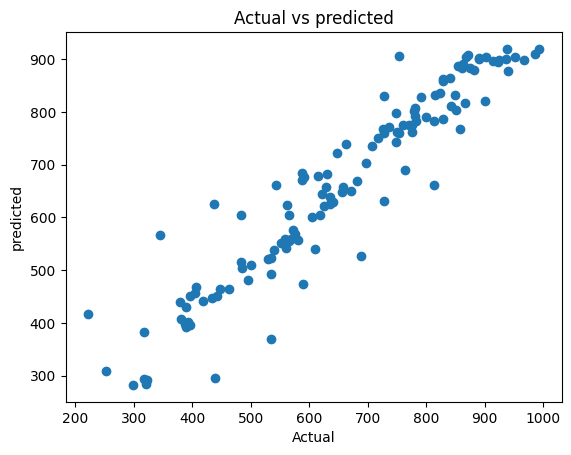

In [46]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test2, np.squeeze(model3.predict(X_test2)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test2, np.squeeze(model3.predict(X_test2)) )
mae= mean_absolute_error(Y_test2, np.squeeze(model3.predict(X_test2)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test2, np.squeeze(model3.predict(X_test2)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [47]:
prediction3 =np.squeeze(model3.predict([[80,2,2,129,prediction1]]))
print("Prediction: {}".format(prediction3))

y_prd=np.squeeze(np.squeeze(model3.predict(X_test2)) )
predic_dif=pd.DataFrame({'Actual':Y_test2,'predict':y_prd,"differences":Y_test2-y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 64ms/step
Prediction: 530.4234619140625
4/4 [==============================] - 0s 2ms/step


,Actual,predict,differences
1387,986,909.681702,76.318298
567,560,541.443970,18.556030
768,630,682.734985,-52.734985
1315,940,877.108398,62.891602
1041,782,783.624390,-1.624390
1038,776,776.139404,-0.139404
511,575,569.245850,5.754150
27,299,282.535095,16.464905
54,322,291.129211,30.870789
911,780,806.957947,-26.957947


## Random forest with keras tuner RNN

In [48]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)

RandomForestRegressor(n_estimators=200, random_state=30)

In [49]:
prediction4 = np.squeeze(RF.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction4))

Prediction: 526.485


In [51]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

14/14 [==============================] - 0s 5ms/step
      Actual     predict  differences
431      529  524.429810     4.570190
610      624  618.110046     5.889954
795      635  659.823792   -24.823792
1238     929  926.108521     2.891479
1228     890  918.049438   -28.049438
...      ...         ...          ...
103      686  534.030273   151.969727
575      543  560.641846   -17.641846
60       694  628.466736    65.533264
988      829  860.499878   -31.499878
511      575  560.831299    14.168701

[426 rows x 3 columns]


In [52]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-240.30078125
355.39385986328125
255.2244873046875
-377.8792724609375
306.47314453125
-497.819091796875
230.37164306640625
-251.45794677734375
278.88018798828125
lower bound: -211.3015237526966
upper bound: 220.86899210038035


In [53]:
A.drop(A[(A['differences'] >220)].index, inplace=True)
A.drop(A[(A['differences'] <-210)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HeatingCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X3=B.drop('Actual',axis=1)
Y3=B['Actual']
X_train3, X_test3, Y_train3, Y_test3 =train_test_split(X3,Y3, test_size=0.3, random_state = 0)

      AverageFloorArea  Year/Quarter  Property Type  \
1                   14             4              1   
2                   19             1              4   
4                   20             1              2   
5                   20             4              4   
8                   25             1              4   
...                ...           ...            ...   
1406               141             4              3   
1407               142             3              3   
1410               143             2              1   
1411               143             3              3   
1415               146             4              1   

      EnergyUseAveragePerDwelling  Actual     predict  
1                             468     187  258.744263  
2                             375     253  258.578339  
4                             366     131  258.576874  
5                             312     313  258.442200  
8                             268     345  521.778320  
...

In [54]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train3.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [55]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train3,Y_train3 ,epochs=100,validation_data=(X_test3,Y_test3))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model4 = tuner.hypermodel.build(best_hps)

model4.fit(X_train3, Y_train3, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
7/7 [==============================] - 2s 71ms/step - loss: 391.6216 - mean_absolute_error: 391.6216 - val_loss: 121.3101 - val_mean_absolute_error: 121.3101
Epoch 2/2000
7/7 [==============================] - 0s 28ms/step - loss: 150.1661 - mean_absolute_error: 150.1661 - val_loss: 114.0514 - val_mean_absolute_error: 114.0514
Epoch 3/2000
7/7 [==============================] - 0s 29ms/step - loss: 99.5391 - mean_absolute_error: 99.5391 - val_loss: 77.9859 - val_mean_absolute_error: 77.9859
Epoch 4/2000
7/7 [==============================] - 0s 30ms/step - loss: 65.1165 - mean_absolute_error: 65.1165 - val_loss: 63.7629 - val_mean_absolute_error: 63.7629
Epoch 5/2000
7/7 [==============================] - 0s 29ms/step - loss: 65.1628 - mean_absolute_error: 65.1628 - val_loss: 54.9013 - val_mean_abs

Epoch 49/2000
7/7 [==============================] - 0s 26ms/step - loss: 41.8933 - mean_absolute_error: 41.8933 - val_loss: 41.2076 - val_mean_absolute_error: 41.2076
Epoch 50/2000
7/7 [==============================] - 0s 27ms/step - loss: 34.5392 - mean_absolute_error: 34.5392 - val_loss: 33.4752 - val_mean_absolute_error: 33.4752
Epoch 51/2000
7/7 [==============================] - 0s 26ms/step - loss: 34.6105 - mean_absolute_error: 34.6105 - val_loss: 33.7418 - val_mean_absolute_error: 33.7418
Epoch 52/2000
7/7 [==============================] - 0s 26ms/step - loss: 35.0559 - mean_absolute_error: 35.0559 - val_loss: 32.4840 - val_mean_absolute_error: 32.4840
Epoch 53/2000
7/7 [==============================] - 0s 26ms/step - loss: 34.9535 - mean_absolute_error: 34.9535 - val_loss: 42.8867 - val_mean_absolute_error: 42.8867
Epoch 54/2000
7/7 [==============================] - 0s 26ms/step - loss: 42.7655 - mean_absolute_error: 42.7655 - val_loss: 33.3978 - val_mean_absolute_error: 

Epoch 98/2000
7/7 [==============================] - 0s 32ms/step - loss: 39.5868 - mean_absolute_error: 39.5868 - val_loss: 37.4298 - val_mean_absolute_error: 37.4298
Epoch 99/2000
7/7 [==============================] - 0s 32ms/step - loss: 45.3042 - mean_absolute_error: 45.3042 - val_loss: 48.5417 - val_mean_absolute_error: 48.5417
Epoch 100/2000
7/7 [==============================] - 0s 32ms/step - loss: 36.6542 - mean_absolute_error: 36.6542 - val_loss: 38.5697 - val_mean_absolute_error: 38.5697
Epoch 101/2000
7/7 [==============================] - 0s 31ms/step - loss: 34.6337 - mean_absolute_error: 34.6337 - val_loss: 35.1742 - val_mean_absolute_error: 35.1742
Epoch 102/2000
7/7 [==============================] - 0s 33ms/step - loss: 33.1768 - mean_absolute_error: 33.1768 - val_loss: 33.6473 - val_mean_absolute_error: 33.6473
Epoch 103/2000
7/7 [==============================] - 0s 32ms/step - loss: 32.8394 - mean_absolute_error: 32.8394 - val_loss: 34.4545 - val_mean_absolute_err

7/7 [==============================] - 0s 28ms/step - loss: 38.9209 - mean_absolute_error: 38.9209 - val_loss: 41.3242 - val_mean_absolute_error: 41.3242
Epoch 147/2000
7/7 [==============================] - 0s 30ms/step - loss: 40.6757 - mean_absolute_error: 40.6757 - val_loss: 36.4414 - val_mean_absolute_error: 36.4414
Epoch 148/2000
7/7 [==============================] - 0s 31ms/step - loss: 35.8814 - mean_absolute_error: 35.8814 - val_loss: 35.8716 - val_mean_absolute_error: 35.8716
Epoch 149/2000
7/7 [==============================] - 0s 27ms/step - loss: 36.1464 - mean_absolute_error: 36.1464 - val_loss: 41.4270 - val_mean_absolute_error: 41.4270
Epoch 150/2000
7/7 [==============================] - 0s 31ms/step - loss: 39.0600 - mean_absolute_error: 39.0600 - val_loss: 35.3902 - val_mean_absolute_error: 35.3902
Epoch 151/2000
7/7 [==============================] - 0s 33ms/step - loss: 34.1271 - mean_absolute_error: 34.1271 - val_loss: 34.4393 - val_mean_absolute_error: 34.4393
E

7/7 [==============================] - 0s 26ms/step - loss: 36.4265 - mean_absolute_error: 36.4265 - val_loss: 45.2445 - val_mean_absolute_error: 45.2445
Epoch 195/2000
7/7 [==============================] - 0s 26ms/step - loss: 40.2553 - mean_absolute_error: 40.2553 - val_loss: 49.7061 - val_mean_absolute_error: 49.7061
Epoch 196/2000
7/7 [==============================] - 0s 26ms/step - loss: 45.1335 - mean_absolute_error: 45.1335 - val_loss: 43.3195 - val_mean_absolute_error: 43.3195
Epoch 197/2000
7/7 [==============================] - 0s 26ms/step - loss: 45.6841 - mean_absolute_error: 45.6841 - val_loss: 50.2004 - val_mean_absolute_error: 50.2004
Epoch 198/2000
7/7 [==============================] - 0s 26ms/step - loss: 41.7309 - mean_absolute_error: 41.7309 - val_loss: 33.4132 - val_mean_absolute_error: 33.4132
Epoch 199/2000
7/7 [==============================] - 0s 26ms/step - loss: 34.3995 - mean_absolute_error: 34.3995 - val_loss: 34.6056 - val_mean_absolute_error: 34.6056
E

7/7 [==============================] - 0s 26ms/step - loss: 36.1139 - mean_absolute_error: 36.1139 - val_loss: 35.9076 - val_mean_absolute_error: 35.9076
Epoch 243/2000
7/7 [==============================] - 0s 26ms/step - loss: 33.1919 - mean_absolute_error: 33.1919 - val_loss: 32.8639 - val_mean_absolute_error: 32.8639
Epoch 244/2000
7/7 [==============================] - 0s 26ms/step - loss: 32.5597 - mean_absolute_error: 32.5597 - val_loss: 36.1112 - val_mean_absolute_error: 36.1112
Epoch 245/2000
7/7 [==============================] - 0s 25ms/step - loss: 34.2780 - mean_absolute_error: 34.2780 - val_loss: 42.5198 - val_mean_absolute_error: 42.5198
Epoch 246/2000
7/7 [==============================] - 0s 26ms/step - loss: 37.5292 - mean_absolute_error: 37.5292 - val_loss: 34.3528 - val_mean_absolute_error: 34.3528
Epoch 247/2000
7/7 [==============================] - 0s 27ms/step - loss: 36.4748 - mean_absolute_error: 36.4748 - val_loss: 41.4241 - val_mean_absolute_error: 41.4241
E

7/7 [==============================] - 0s 29ms/step - loss: 35.4185 - mean_absolute_error: 35.4185 - val_loss: 44.9989 - val_mean_absolute_error: 44.9989
Epoch 291/2000
7/7 [==============================] - 0s 29ms/step - loss: 37.0919 - mean_absolute_error: 37.0919 - val_loss: 32.6911 - val_mean_absolute_error: 32.6911
Epoch 292/2000
7/7 [==============================] - 0s 28ms/step - loss: 33.2520 - mean_absolute_error: 33.2520 - val_loss: 35.0104 - val_mean_absolute_error: 35.0104
Epoch 293/2000
7/7 [==============================] - 0s 29ms/step - loss: 33.1328 - mean_absolute_error: 33.1328 - val_loss: 33.6861 - val_mean_absolute_error: 33.6861
Epoch 294/2000
7/7 [==============================] - 0s 29ms/step - loss: 32.8690 - mean_absolute_error: 32.8690 - val_loss: 32.3338 - val_mean_absolute_error: 32.3338
Epoch 295/2000
7/7 [==============================] - 0s 28ms/step - loss: 32.5448 - mean_absolute_error: 32.5448 - val_loss: 35.1403 - val_mean_absolute_error: 35.1403
E

7/7 [==============================] - 0s 32ms/step - loss: 34.5521 - mean_absolute_error: 34.5521 - val_loss: 36.3433 - val_mean_absolute_error: 36.3433
Epoch 339/2000
7/7 [==============================] - 0s 30ms/step - loss: 33.9311 - mean_absolute_error: 33.9311 - val_loss: 42.3532 - val_mean_absolute_error: 42.3532
Epoch 340/2000
7/7 [==============================] - 0s 28ms/step - loss: 39.8981 - mean_absolute_error: 39.8981 - val_loss: 43.7741 - val_mean_absolute_error: 43.7741
Epoch 341/2000
7/7 [==============================] - 0s 29ms/step - loss: 35.5136 - mean_absolute_error: 35.5136 - val_loss: 34.5031 - val_mean_absolute_error: 34.5031
Epoch 342/2000
7/7 [==============================] - 0s 29ms/step - loss: 32.8178 - mean_absolute_error: 32.8178 - val_loss: 34.6975 - val_mean_absolute_error: 34.6975
Epoch 343/2000
7/7 [==============================] - 0s 29ms/step - loss: 34.5063 - mean_absolute_error: 34.5063 - val_loss: 33.8551 - val_mean_absolute_error: 33.8551
E

7/7 [==============================] - 0s 29ms/step - loss: 33.7479 - mean_absolute_error: 33.7479 - val_loss: 48.2415 - val_mean_absolute_error: 48.2415
Epoch 387/2000
7/7 [==============================] - 0s 28ms/step - loss: 41.7901 - mean_absolute_error: 41.7901 - val_loss: 35.2097 - val_mean_absolute_error: 35.2097
Epoch 388/2000
7/7 [==============================] - 0s 29ms/step - loss: 39.4416 - mean_absolute_error: 39.4416 - val_loss: 46.3847 - val_mean_absolute_error: 46.3847
Epoch 389/2000
7/7 [==============================] - 0s 29ms/step - loss: 35.7139 - mean_absolute_error: 35.7139 - val_loss: 34.0396 - val_mean_absolute_error: 34.0396
Epoch 390/2000
7/7 [==============================] - 0s 29ms/step - loss: 32.4974 - mean_absolute_error: 32.4974 - val_loss: 34.6692 - val_mean_absolute_error: 34.6692
Epoch 391/2000
7/7 [==============================] - 0s 30ms/step - loss: 31.6453 - mean_absolute_error: 31.6453 - val_loss: 33.9081 - val_mean_absolute_error: 33.9081
E

7/7 [==============================] - 0s 32ms/step - loss: 31.6574 - mean_absolute_error: 31.6574 - val_loss: 36.3053 - val_mean_absolute_error: 36.3053
Epoch 435/2000
7/7 [==============================] - 0s 30ms/step - loss: 31.9964 - mean_absolute_error: 31.9964 - val_loss: 34.8172 - val_mean_absolute_error: 34.8172
Epoch 436/2000
7/7 [==============================] - 0s 31ms/step - loss: 31.8135 - mean_absolute_error: 31.8135 - val_loss: 36.9298 - val_mean_absolute_error: 36.9298
Epoch 437/2000
7/7 [==============================] - 0s 30ms/step - loss: 33.0985 - mean_absolute_error: 33.0985 - val_loss: 33.6712 - val_mean_absolute_error: 33.6712
Epoch 438/2000
7/7 [==============================] - 0s 29ms/step - loss: 33.5110 - mean_absolute_error: 33.5110 - val_loss: 37.9028 - val_mean_absolute_error: 37.9028
Epoch 439/2000
7/7 [==============================] - 0s 29ms/step - loss: 31.9106 - mean_absolute_error: 31.9106 - val_loss: 35.4514 - val_mean_absolute_error: 35.4514
E

7/7 [==============================] - 0s 29ms/step - loss: 31.6845 - mean_absolute_error: 31.6845 - val_loss: 34.9048 - val_mean_absolute_error: 34.9048
Epoch 483/2000
7/7 [==============================] - 0s 28ms/step - loss: 32.6630 - mean_absolute_error: 32.6630 - val_loss: 41.3834 - val_mean_absolute_error: 41.3834
Epoch 484/2000
7/7 [==============================] - 0s 30ms/step - loss: 35.0889 - mean_absolute_error: 35.0889 - val_loss: 34.1777 - val_mean_absolute_error: 34.1777
Epoch 485/2000
7/7 [==============================] - 0s 30ms/step - loss: 35.3952 - mean_absolute_error: 35.3952 - val_loss: 34.5965 - val_mean_absolute_error: 34.5965
Epoch 486/2000
7/7 [==============================] - 0s 29ms/step - loss: 33.2878 - mean_absolute_error: 33.2878 - val_loss: 35.3657 - val_mean_absolute_error: 35.3657
Epoch 487/2000
7/7 [==============================] - 0s 30ms/step - loss: 31.9684 - mean_absolute_error: 31.9684 - val_loss: 35.4415 - val_mean_absolute_error: 35.4415
E

7/7 [==============================] - 0s 29ms/step - loss: 31.8013 - mean_absolute_error: 31.8013 - val_loss: 37.4154 - val_mean_absolute_error: 37.4154
Epoch 531/2000
7/7 [==============================] - 0s 30ms/step - loss: 34.7734 - mean_absolute_error: 34.7734 - val_loss: 35.2151 - val_mean_absolute_error: 35.2151
Epoch 532/2000
7/7 [==============================] - 0s 31ms/step - loss: 35.3503 - mean_absolute_error: 35.3503 - val_loss: 37.1252 - val_mean_absolute_error: 37.1252
Epoch 533/2000
7/7 [==============================] - 0s 29ms/step - loss: 31.7119 - mean_absolute_error: 31.7119 - val_loss: 33.9983 - val_mean_absolute_error: 33.9983
Epoch 534/2000
7/7 [==============================] - 0s 29ms/step - loss: 32.4156 - mean_absolute_error: 32.4156 - val_loss: 34.2182 - val_mean_absolute_error: 34.2182
Epoch 535/2000
7/7 [==============================] - 0s 28ms/step - loss: 32.7798 - mean_absolute_error: 32.7798 - val_loss: 35.8214 - val_mean_absolute_error: 35.8214
E

7/7 [==============================] - 0s 30ms/step - loss: 31.5743 - mean_absolute_error: 31.5743 - val_loss: 42.2950 - val_mean_absolute_error: 42.2950
Epoch 579/2000
7/7 [==============================] - 0s 27ms/step - loss: 35.5296 - mean_absolute_error: 35.5296 - val_loss: 37.1796 - val_mean_absolute_error: 37.1796
Epoch 580/2000
7/7 [==============================] - 0s 30ms/step - loss: 32.5416 - mean_absolute_error: 32.5416 - val_loss: 33.3385 - val_mean_absolute_error: 33.3385
Epoch 581/2000
7/7 [==============================] - 0s 28ms/step - loss: 32.2412 - mean_absolute_error: 32.2412 - val_loss: 34.0660 - val_mean_absolute_error: 34.0660
Epoch 582/2000
7/7 [==============================] - 0s 31ms/step - loss: 31.6003 - mean_absolute_error: 31.6003 - val_loss: 34.4136 - val_mean_absolute_error: 34.4136
Epoch 583/2000
7/7 [==============================] - 0s 28ms/step - loss: 32.0490 - mean_absolute_error: 32.0490 - val_loss: 34.4762 - val_mean_absolute_error: 34.4762
E

7/7 [==============================] - 0s 32ms/step - loss: 32.7013 - mean_absolute_error: 32.7013 - val_loss: 37.9633 - val_mean_absolute_error: 37.9633
Epoch 627/2000
7/7 [==============================] - 0s 31ms/step - loss: 33.5013 - mean_absolute_error: 33.5013 - val_loss: 33.5574 - val_mean_absolute_error: 33.5574
Epoch 628/2000
7/7 [==============================] - 0s 32ms/step - loss: 31.7962 - mean_absolute_error: 31.7962 - val_loss: 35.9177 - val_mean_absolute_error: 35.9177
Epoch 629/2000
7/7 [==============================] - 0s 32ms/step - loss: 32.3000 - mean_absolute_error: 32.3000 - val_loss: 37.1738 - val_mean_absolute_error: 37.1738
Epoch 630/2000
7/7 [==============================] - 0s 34ms/step - loss: 31.9246 - mean_absolute_error: 31.9246 - val_loss: 34.2338 - val_mean_absolute_error: 34.2338
Epoch 631/2000
7/7 [==============================] - 0s 31ms/step - loss: 31.0252 - mean_absolute_error: 31.0252 - val_loss: 35.5560 - val_mean_absolute_error: 35.5560
E

7/7 [==============================] - 0s 27ms/step - loss: 33.7535 - mean_absolute_error: 33.7535 - val_loss: 33.8652 - val_mean_absolute_error: 33.8652
Epoch 675/2000
7/7 [==============================] - 0s 26ms/step - loss: 31.1913 - mean_absolute_error: 31.1913 - val_loss: 33.6410 - val_mean_absolute_error: 33.6410
Epoch 676/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.0939 - mean_absolute_error: 31.0939 - val_loss: 33.1083 - val_mean_absolute_error: 33.1083
Epoch 677/2000
7/7 [==============================] - 0s 26ms/step - loss: 31.5076 - mean_absolute_error: 31.5076 - val_loss: 33.3098 - val_mean_absolute_error: 33.3098
Epoch 678/2000
7/7 [==============================] - 0s 26ms/step - loss: 30.8458 - mean_absolute_error: 30.8458 - val_loss: 33.6942 - val_mean_absolute_error: 33.6942
Epoch 679/2000
7/7 [==============================] - 0s 26ms/step - loss: 30.3112 - mean_absolute_error: 30.3112 - val_loss: 40.7973 - val_mean_absolute_error: 40.7973
E

7/7 [==============================] - 0s 27ms/step - loss: 34.2020 - mean_absolute_error: 34.2020 - val_loss: 34.4730 - val_mean_absolute_error: 34.4730
Epoch 723/2000
7/7 [==============================] - 0s 26ms/step - loss: 31.5149 - mean_absolute_error: 31.5149 - val_loss: 33.1654 - val_mean_absolute_error: 33.1654
Epoch 724/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.6767 - mean_absolute_error: 31.6767 - val_loss: 37.2239 - val_mean_absolute_error: 37.2239
Epoch 725/2000
7/7 [==============================] - 0s 26ms/step - loss: 32.4202 - mean_absolute_error: 32.4202 - val_loss: 38.7399 - val_mean_absolute_error: 38.7399
Epoch 726/2000
7/7 [==============================] - 0s 29ms/step - loss: 37.0089 - mean_absolute_error: 37.0089 - val_loss: 49.3959 - val_mean_absolute_error: 49.3959
Epoch 727/2000
7/7 [==============================] - 0s 30ms/step - loss: 38.4289 - mean_absolute_error: 38.4289 - val_loss: 37.3691 - val_mean_absolute_error: 37.3691
E

7/7 [==============================] - 0s 30ms/step - loss: 32.8034 - mean_absolute_error: 32.8034 - val_loss: 33.7559 - val_mean_absolute_error: 33.7559
Epoch 771/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.3575 - mean_absolute_error: 31.3575 - val_loss: 37.7518 - val_mean_absolute_error: 37.7518
Epoch 772/2000
7/7 [==============================] - 0s 26ms/step - loss: 33.0268 - mean_absolute_error: 33.0268 - val_loss: 33.4893 - val_mean_absolute_error: 33.4893
Epoch 773/2000
7/7 [==============================] - 0s 26ms/step - loss: 31.5559 - mean_absolute_error: 31.5559 - val_loss: 36.5922 - val_mean_absolute_error: 36.5922
Epoch 774/2000
7/7 [==============================] - 0s 26ms/step - loss: 30.8754 - mean_absolute_error: 30.8754 - val_loss: 34.2788 - val_mean_absolute_error: 34.2788
Epoch 775/2000
7/7 [==============================] - 0s 27ms/step - loss: 32.0348 - mean_absolute_error: 32.0348 - val_loss: 33.4944 - val_mean_absolute_error: 33.4944
E

7/7 [==============================] - 0s 27ms/step - loss: 31.8556 - mean_absolute_error: 31.8556 - val_loss: 38.5635 - val_mean_absolute_error: 38.5635
Epoch 819/2000
7/7 [==============================] - 0s 27ms/step - loss: 34.1542 - mean_absolute_error: 34.1542 - val_loss: 37.0995 - val_mean_absolute_error: 37.0995
Epoch 820/2000
7/7 [==============================] - 0s 26ms/step - loss: 31.8798 - mean_absolute_error: 31.8798 - val_loss: 32.1337 - val_mean_absolute_error: 32.1337
Epoch 821/2000
7/7 [==============================] - 0s 26ms/step - loss: 32.3780 - mean_absolute_error: 32.3780 - val_loss: 34.6480 - val_mean_absolute_error: 34.6480
Epoch 822/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.3975 - mean_absolute_error: 31.3975 - val_loss: 36.1287 - val_mean_absolute_error: 36.1287
Epoch 823/2000
7/7 [==============================] - 0s 26ms/step - loss: 32.7608 - mean_absolute_error: 32.7608 - val_loss: 34.3499 - val_mean_absolute_error: 34.3499
E

7/7 [==============================] - 0s 32ms/step - loss: 30.8527 - mean_absolute_error: 30.8527 - val_loss: 35.6024 - val_mean_absolute_error: 35.6024
Epoch 867/2000
7/7 [==============================] - 0s 31ms/step - loss: 33.0668 - mean_absolute_error: 33.0668 - val_loss: 37.4132 - val_mean_absolute_error: 37.4132
Epoch 868/2000
7/7 [==============================] - 0s 32ms/step - loss: 34.5506 - mean_absolute_error: 34.5506 - val_loss: 42.2413 - val_mean_absolute_error: 42.2413
Epoch 869/2000
7/7 [==============================] - 0s 31ms/step - loss: 36.7748 - mean_absolute_error: 36.7748 - val_loss: 33.4120 - val_mean_absolute_error: 33.4120
Epoch 870/2000
7/7 [==============================] - 0s 32ms/step - loss: 31.8306 - mean_absolute_error: 31.8306 - val_loss: 35.6391 - val_mean_absolute_error: 35.6391
Epoch 871/2000
7/7 [==============================] - 0s 31ms/step - loss: 32.6845 - mean_absolute_error: 32.6845 - val_loss: 37.0942 - val_mean_absolute_error: 37.0942
E

7/7 [==============================] - 0s 26ms/step - loss: 31.4588 - mean_absolute_error: 31.4588 - val_loss: 34.9011 - val_mean_absolute_error: 34.9011
Epoch 915/2000
7/7 [==============================] - 0s 26ms/step - loss: 31.4796 - mean_absolute_error: 31.4796 - val_loss: 32.7310 - val_mean_absolute_error: 32.7310
Epoch 916/2000
7/7 [==============================] - 0s 27ms/step - loss: 30.8982 - mean_absolute_error: 30.8982 - val_loss: 36.5764 - val_mean_absolute_error: 36.5764
Epoch 917/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.3649 - mean_absolute_error: 31.3649 - val_loss: 34.7388 - val_mean_absolute_error: 34.7388
Epoch 918/2000
7/7 [==============================] - 0s 26ms/step - loss: 33.3396 - mean_absolute_error: 33.3396 - val_loss: 36.2540 - val_mean_absolute_error: 36.2540
Epoch 919/2000
7/7 [==============================] - 0s 26ms/step - loss: 32.6682 - mean_absolute_error: 32.6682 - val_loss: 33.6520 - val_mean_absolute_error: 33.6520
E

7/7 [==============================] - 0s 26ms/step - loss: 31.2424 - mean_absolute_error: 31.2424 - val_loss: 33.0464 - val_mean_absolute_error: 33.0464
Epoch 963/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.1104 - mean_absolute_error: 31.1104 - val_loss: 36.1204 - val_mean_absolute_error: 36.1204
Epoch 964/2000
7/7 [==============================] - 0s 28ms/step - loss: 32.6860 - mean_absolute_error: 32.6860 - val_loss: 33.7552 - val_mean_absolute_error: 33.7552
Epoch 965/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.6313 - mean_absolute_error: 31.6313 - val_loss: 33.9742 - val_mean_absolute_error: 33.9742
Epoch 966/2000
7/7 [==============================] - 0s 26ms/step - loss: 32.4077 - mean_absolute_error: 32.4077 - val_loss: 34.4990 - val_mean_absolute_error: 34.4990
Epoch 967/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.4966 - mean_absolute_error: 31.4966 - val_loss: 34.8195 - val_mean_absolute_error: 34.8195
E

7/7 [==============================] - 0s 28ms/step - loss: 31.8537 - mean_absolute_error: 31.8537 - val_loss: 34.3120 - val_mean_absolute_error: 34.3120
Epoch 1011/2000
7/7 [==============================] - 0s 26ms/step - loss: 32.0411 - mean_absolute_error: 32.0411 - val_loss: 33.9181 - val_mean_absolute_error: 33.9181
Epoch 1012/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.0890 - mean_absolute_error: 31.0890 - val_loss: 36.5959 - val_mean_absolute_error: 36.5959
Epoch 1013/2000
7/7 [==============================] - 0s 29ms/step - loss: 32.4730 - mean_absolute_error: 32.4730 - val_loss: 40.7087 - val_mean_absolute_error: 40.7087
Epoch 1014/2000
7/7 [==============================] - 0s 27ms/step - loss: 33.8201 - mean_absolute_error: 33.8201 - val_loss: 39.7984 - val_mean_absolute_error: 39.7984
Epoch 1015/2000
7/7 [==============================] - 0s 27ms/step - loss: 35.5283 - mean_absolute_error: 35.5283 - val_loss: 34.3789 - val_mean_absolute_error: 34.3

7/7 [==============================] - 0s 35ms/step - loss: 32.3291 - mean_absolute_error: 32.3291 - val_loss: 33.7670 - val_mean_absolute_error: 33.7670
Epoch 1059/2000
7/7 [==============================] - 0s 35ms/step - loss: 31.3418 - mean_absolute_error: 31.3418 - val_loss: 34.3099 - val_mean_absolute_error: 34.3099
Epoch 1060/2000
7/7 [==============================] - 0s 32ms/step - loss: 33.4166 - mean_absolute_error: 33.4166 - val_loss: 33.6261 - val_mean_absolute_error: 33.6261
Epoch 1061/2000
7/7 [==============================] - 0s 34ms/step - loss: 31.8347 - mean_absolute_error: 31.8347 - val_loss: 37.4939 - val_mean_absolute_error: 37.4939
Epoch 1062/2000
7/7 [==============================] - 0s 29ms/step - loss: 31.6133 - mean_absolute_error: 31.6133 - val_loss: 33.2457 - val_mean_absolute_error: 33.2457
Epoch 1063/2000
7/7 [==============================] - 0s 31ms/step - loss: 30.3509 - mean_absolute_error: 30.3509 - val_loss: 33.7572 - val_mean_absolute_error: 33.7

7/7 [==============================] - 0s 33ms/step - loss: 31.1757 - mean_absolute_error: 31.1757 - val_loss: 32.1731 - val_mean_absolute_error: 32.1731
Epoch 1107/2000
7/7 [==============================] - 0s 32ms/step - loss: 30.5432 - mean_absolute_error: 30.5432 - val_loss: 32.8015 - val_mean_absolute_error: 32.8015
Epoch 1108/2000
7/7 [==============================] - 0s 34ms/step - loss: 29.0179 - mean_absolute_error: 29.0179 - val_loss: 31.2879 - val_mean_absolute_error: 31.2879
Epoch 1109/2000
7/7 [==============================] - 0s 28ms/step - loss: 29.3439 - mean_absolute_error: 29.3439 - val_loss: 31.0251 - val_mean_absolute_error: 31.0251
Epoch 1110/2000
7/7 [==============================] - 0s 33ms/step - loss: 30.2685 - mean_absolute_error: 30.2685 - val_loss: 35.3787 - val_mean_absolute_error: 35.3787
Epoch 1111/2000
7/7 [==============================] - 0s 30ms/step - loss: 29.7754 - mean_absolute_error: 29.7754 - val_loss: 31.5722 - val_mean_absolute_error: 31.5

7/7 [==============================] - 0s 32ms/step - loss: 29.2297 - mean_absolute_error: 29.2297 - val_loss: 32.4025 - val_mean_absolute_error: 32.4025
Epoch 1155/2000
7/7 [==============================] - 0s 32ms/step - loss: 29.3632 - mean_absolute_error: 29.3632 - val_loss: 37.6461 - val_mean_absolute_error: 37.6461
Epoch 1156/2000
7/7 [==============================] - 0s 31ms/step - loss: 29.6180 - mean_absolute_error: 29.6180 - val_loss: 33.7733 - val_mean_absolute_error: 33.7733
Epoch 1157/2000
7/7 [==============================] - 0s 31ms/step - loss: 32.1260 - mean_absolute_error: 32.1260 - val_loss: 32.8889 - val_mean_absolute_error: 32.8889
Epoch 1158/2000
7/7 [==============================] - 0s 31ms/step - loss: 32.3517 - mean_absolute_error: 32.3517 - val_loss: 37.1217 - val_mean_absolute_error: 37.1217
Epoch 1159/2000
7/7 [==============================] - 0s 30ms/step - loss: 34.1518 - mean_absolute_error: 34.1518 - val_loss: 36.6146 - val_mean_absolute_error: 36.6

7/7 [==============================] - 0s 33ms/step - loss: 29.0259 - mean_absolute_error: 29.0259 - val_loss: 33.8040 - val_mean_absolute_error: 33.8040
Epoch 1203/2000
7/7 [==============================] - 0s 36ms/step - loss: 29.1504 - mean_absolute_error: 29.1504 - val_loss: 32.5491 - val_mean_absolute_error: 32.5491
Epoch 1204/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.7797 - mean_absolute_error: 28.7797 - val_loss: 32.5433 - val_mean_absolute_error: 32.5433
Epoch 1205/2000
7/7 [==============================] - 0s 31ms/step - loss: 28.8864 - mean_absolute_error: 28.8864 - val_loss: 31.9606 - val_mean_absolute_error: 31.9606
Epoch 1206/2000
7/7 [==============================] - 0s 35ms/step - loss: 28.8447 - mean_absolute_error: 28.8447 - val_loss: 32.8611 - val_mean_absolute_error: 32.8611
Epoch 1207/2000
7/7 [==============================] - 0s 35ms/step - loss: 29.5532 - mean_absolute_error: 29.5532 - val_loss: 32.0434 - val_mean_absolute_error: 32.0

7/7 [==============================] - 0s 27ms/step - loss: 29.3497 - mean_absolute_error: 29.3497 - val_loss: 32.9430 - val_mean_absolute_error: 32.9430
Epoch 1251/2000
7/7 [==============================] - 0s 27ms/step - loss: 29.1246 - mean_absolute_error: 29.1246 - val_loss: 31.7741 - val_mean_absolute_error: 31.7741
Epoch 1252/2000
7/7 [==============================] - 0s 27ms/step - loss: 29.2907 - mean_absolute_error: 29.2907 - val_loss: 31.7111 - val_mean_absolute_error: 31.7111
Epoch 1253/2000
7/7 [==============================] - 0s 26ms/step - loss: 31.0404 - mean_absolute_error: 31.0404 - val_loss: 33.8647 - val_mean_absolute_error: 33.8647
Epoch 1254/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.1256 - mean_absolute_error: 31.1256 - val_loss: 37.4646 - val_mean_absolute_error: 37.4646
Epoch 1255/2000
7/7 [==============================] - 0s 27ms/step - loss: 29.6148 - mean_absolute_error: 29.6148 - val_loss: 32.6631 - val_mean_absolute_error: 32.6

7/7 [==============================] - 0s 33ms/step - loss: 29.7130 - mean_absolute_error: 29.7130 - val_loss: 35.2113 - val_mean_absolute_error: 35.2113
Epoch 1299/2000
7/7 [==============================] - 0s 33ms/step - loss: 31.9822 - mean_absolute_error: 31.9822 - val_loss: 32.8351 - val_mean_absolute_error: 32.8351
Epoch 1300/2000
7/7 [==============================] - 0s 32ms/step - loss: 30.2345 - mean_absolute_error: 30.2345 - val_loss: 31.3934 - val_mean_absolute_error: 31.3934
Epoch 1301/2000
7/7 [==============================] - 0s 32ms/step - loss: 35.2674 - mean_absolute_error: 35.2674 - val_loss: 36.3857 - val_mean_absolute_error: 36.3857
Epoch 1302/2000
7/7 [==============================] - 0s 32ms/step - loss: 34.2680 - mean_absolute_error: 34.2680 - val_loss: 37.5127 - val_mean_absolute_error: 37.5127
Epoch 1303/2000
7/7 [==============================] - 0s 33ms/step - loss: 34.1841 - mean_absolute_error: 34.1841 - val_loss: 41.8471 - val_mean_absolute_error: 41.8

7/7 [==============================] - 0s 38ms/step - loss: 32.0066 - mean_absolute_error: 32.0066 - val_loss: 31.3820 - val_mean_absolute_error: 31.3820
Epoch 1347/2000
7/7 [==============================] - 0s 33ms/step - loss: 30.0057 - mean_absolute_error: 30.0057 - val_loss: 31.5581 - val_mean_absolute_error: 31.5581
Epoch 1348/2000
7/7 [==============================] - 0s 33ms/step - loss: 30.1995 - mean_absolute_error: 30.1995 - val_loss: 34.6355 - val_mean_absolute_error: 34.6355
Epoch 1349/2000
7/7 [==============================] - 0s 31ms/step - loss: 30.4578 - mean_absolute_error: 30.4578 - val_loss: 31.5358 - val_mean_absolute_error: 31.5358
Epoch 1350/2000
7/7 [==============================] - 0s 33ms/step - loss: 29.8821 - mean_absolute_error: 29.8821 - val_loss: 31.7492 - val_mean_absolute_error: 31.7492
Epoch 1351/2000
7/7 [==============================] - 0s 34ms/step - loss: 30.3199 - mean_absolute_error: 30.3199 - val_loss: 33.8666 - val_mean_absolute_error: 33.8

7/7 [==============================] - 0s 34ms/step - loss: 29.3021 - mean_absolute_error: 29.3021 - val_loss: 31.4350 - val_mean_absolute_error: 31.4350
Epoch 1395/2000
7/7 [==============================] - 0s 32ms/step - loss: 29.2917 - mean_absolute_error: 29.2917 - val_loss: 31.1753 - val_mean_absolute_error: 31.1753
Epoch 1396/2000
7/7 [==============================] - 0s 34ms/step - loss: 29.8020 - mean_absolute_error: 29.8020 - val_loss: 34.9373 - val_mean_absolute_error: 34.9373
Epoch 1397/2000
7/7 [==============================] - 0s 35ms/step - loss: 30.7928 - mean_absolute_error: 30.7928 - val_loss: 31.1490 - val_mean_absolute_error: 31.1490
Epoch 1398/2000
7/7 [==============================] - 0s 35ms/step - loss: 31.0281 - mean_absolute_error: 31.0281 - val_loss: 31.5975 - val_mean_absolute_error: 31.5975
Epoch 1399/2000
7/7 [==============================] - 0s 35ms/step - loss: 30.0902 - mean_absolute_error: 30.0902 - val_loss: 31.6044 - val_mean_absolute_error: 31.6

7/7 [==============================] - 0s 33ms/step - loss: 29.0506 - mean_absolute_error: 29.0506 - val_loss: 31.6313 - val_mean_absolute_error: 31.6313
Epoch 1443/2000
7/7 [==============================] - 0s 33ms/step - loss: 28.9655 - mean_absolute_error: 28.9655 - val_loss: 35.0065 - val_mean_absolute_error: 35.0065
Epoch 1444/2000
7/7 [==============================] - 0s 34ms/step - loss: 31.4418 - mean_absolute_error: 31.4418 - val_loss: 31.2699 - val_mean_absolute_error: 31.2699
Epoch 1445/2000
7/7 [==============================] - 0s 34ms/step - loss: 29.3414 - mean_absolute_error: 29.3414 - val_loss: 32.3860 - val_mean_absolute_error: 32.3860
Epoch 1446/2000
7/7 [==============================] - 0s 39ms/step - loss: 30.4955 - mean_absolute_error: 30.4955 - val_loss: 34.2599 - val_mean_absolute_error: 34.2599
Epoch 1447/2000
7/7 [==============================] - 0s 38ms/step - loss: 29.7684 - mean_absolute_error: 29.7684 - val_loss: 31.7625 - val_mean_absolute_error: 31.7

7/7 [==============================] - 0s 30ms/step - loss: 29.8074 - mean_absolute_error: 29.8074 - val_loss: 31.7835 - val_mean_absolute_error: 31.7835
Epoch 1491/2000
7/7 [==============================] - 0s 36ms/step - loss: 29.8179 - mean_absolute_error: 29.8179 - val_loss: 37.4706 - val_mean_absolute_error: 37.4706
Epoch 1492/2000
7/7 [==============================] - 0s 34ms/step - loss: 30.1888 - mean_absolute_error: 30.1888 - val_loss: 31.3996 - val_mean_absolute_error: 31.3996
Epoch 1493/2000
7/7 [==============================] - 0s 32ms/step - loss: 28.7807 - mean_absolute_error: 28.7807 - val_loss: 31.7412 - val_mean_absolute_error: 31.7412
Epoch 1494/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.0011 - mean_absolute_error: 29.0011 - val_loss: 32.2115 - val_mean_absolute_error: 32.2115
Epoch 1495/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.5875 - mean_absolute_error: 28.5875 - val_loss: 31.2303 - val_mean_absolute_error: 31.2

7/7 [==============================] - 0s 33ms/step - loss: 28.3466 - mean_absolute_error: 28.3466 - val_loss: 31.2753 - val_mean_absolute_error: 31.2753
Epoch 1539/2000
7/7 [==============================] - 0s 31ms/step - loss: 28.5051 - mean_absolute_error: 28.5051 - val_loss: 31.1266 - val_mean_absolute_error: 31.1266
Epoch 1540/2000
7/7 [==============================] - 0s 33ms/step - loss: 28.7514 - mean_absolute_error: 28.7514 - val_loss: 31.4427 - val_mean_absolute_error: 31.4427
Epoch 1541/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.8595 - mean_absolute_error: 28.8595 - val_loss: 31.1737 - val_mean_absolute_error: 31.1737
Epoch 1542/2000
7/7 [==============================] - 0s 34ms/step - loss: 29.8114 - mean_absolute_error: 29.8114 - val_loss: 34.9159 - val_mean_absolute_error: 34.9159
Epoch 1543/2000
7/7 [==============================] - 0s 32ms/step - loss: 29.8766 - mean_absolute_error: 29.8766 - val_loss: 31.6678 - val_mean_absolute_error: 31.6

7/7 [==============================] - 0s 41ms/step - loss: 31.9944 - mean_absolute_error: 31.9944 - val_loss: 32.2155 - val_mean_absolute_error: 32.2155
Epoch 1587/2000
7/7 [==============================] - 0s 37ms/step - loss: 32.1063 - mean_absolute_error: 32.1063 - val_loss: 38.6136 - val_mean_absolute_error: 38.6136
Epoch 1588/2000
7/7 [==============================] - 0s 33ms/step - loss: 30.5225 - mean_absolute_error: 30.5225 - val_loss: 31.2597 - val_mean_absolute_error: 31.2597
Epoch 1589/2000
7/7 [==============================] - 0s 38ms/step - loss: 28.7854 - mean_absolute_error: 28.7854 - val_loss: 34.0566 - val_mean_absolute_error: 34.0566
Epoch 1590/2000
7/7 [==============================] - 0s 37ms/step - loss: 28.9162 - mean_absolute_error: 28.9162 - val_loss: 32.0176 - val_mean_absolute_error: 32.0176
Epoch 1591/2000
7/7 [==============================] - 0s 38ms/step - loss: 29.1133 - mean_absolute_error: 29.1133 - val_loss: 32.3240 - val_mean_absolute_error: 32.3

7/7 [==============================] - 0s 28ms/step - loss: 29.1236 - mean_absolute_error: 29.1236 - val_loss: 29.0374 - val_mean_absolute_error: 29.0374
Epoch 1635/2000
7/7 [==============================] - 0s 27ms/step - loss: 29.4500 - mean_absolute_error: 29.4500 - val_loss: 33.5345 - val_mean_absolute_error: 33.5345
Epoch 1636/2000
7/7 [==============================] - 0s 31ms/step - loss: 30.1487 - mean_absolute_error: 30.1487 - val_loss: 30.7227 - val_mean_absolute_error: 30.7227
Epoch 1637/2000
7/7 [==============================] - 0s 32ms/step - loss: 30.9141 - mean_absolute_error: 30.9141 - val_loss: 32.4890 - val_mean_absolute_error: 32.4890
Epoch 1638/2000
7/7 [==============================] - 0s 28ms/step - loss: 31.2123 - mean_absolute_error: 31.2123 - val_loss: 30.8903 - val_mean_absolute_error: 30.8903
Epoch 1639/2000
7/7 [==============================] - 0s 27ms/step - loss: 30.2876 - mean_absolute_error: 30.2876 - val_loss: 30.7261 - val_mean_absolute_error: 30.7

7/7 [==============================] - 0s 29ms/step - loss: 32.2584 - mean_absolute_error: 32.2584 - val_loss: 30.9603 - val_mean_absolute_error: 30.9603
Epoch 1683/2000
7/7 [==============================] - 0s 25ms/step - loss: 30.4600 - mean_absolute_error: 30.4600 - val_loss: 30.6727 - val_mean_absolute_error: 30.6727
Epoch 1684/2000
7/7 [==============================] - 0s 28ms/step - loss: 31.4753 - mean_absolute_error: 31.4753 - val_loss: 31.2494 - val_mean_absolute_error: 31.2494
Epoch 1685/2000
7/7 [==============================] - 0s 30ms/step - loss: 30.8243 - mean_absolute_error: 30.8243 - val_loss: 34.5413 - val_mean_absolute_error: 34.5413
Epoch 1686/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.4153 - mean_absolute_error: 29.4153 - val_loss: 30.6728 - val_mean_absolute_error: 30.6728
Epoch 1687/2000
7/7 [==============================] - 0s 31ms/step - loss: 29.8159 - mean_absolute_error: 29.8159 - val_loss: 32.1334 - val_mean_absolute_error: 32.1

7/7 [==============================] - 0s 24ms/step - loss: 29.3776 - mean_absolute_error: 29.3776 - val_loss: 30.7870 - val_mean_absolute_error: 30.7870
Epoch 1731/2000
7/7 [==============================] - 0s 25ms/step - loss: 29.5308 - mean_absolute_error: 29.5308 - val_loss: 31.3799 - val_mean_absolute_error: 31.3799
Epoch 1732/2000
7/7 [==============================] - 0s 24ms/step - loss: 30.4330 - mean_absolute_error: 30.4330 - val_loss: 31.9160 - val_mean_absolute_error: 31.9160
Epoch 1733/2000
7/7 [==============================] - 0s 25ms/step - loss: 28.9157 - mean_absolute_error: 28.9157 - val_loss: 32.2916 - val_mean_absolute_error: 32.2916
Epoch 1734/2000
7/7 [==============================] - 0s 25ms/step - loss: 30.0335 - mean_absolute_error: 30.0335 - val_loss: 31.8676 - val_mean_absolute_error: 31.8676
Epoch 1735/2000
7/7 [==============================] - 0s 25ms/step - loss: 29.4654 - mean_absolute_error: 29.4654 - val_loss: 31.3658 - val_mean_absolute_error: 31.3

7/7 [==============================] - 0s 26ms/step - loss: 29.8858 - mean_absolute_error: 29.8858 - val_loss: 33.3371 - val_mean_absolute_error: 33.3371
Epoch 1779/2000
7/7 [==============================] - 0s 28ms/step - loss: 30.7868 - mean_absolute_error: 30.7868 - val_loss: 33.7033 - val_mean_absolute_error: 33.7033
Epoch 1780/2000
7/7 [==============================] - 0s 26ms/step - loss: 29.1541 - mean_absolute_error: 29.1541 - val_loss: 30.1341 - val_mean_absolute_error: 30.1341
Epoch 1781/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.4303 - mean_absolute_error: 28.4303 - val_loss: 30.3681 - val_mean_absolute_error: 30.3681
Epoch 1782/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.3785 - mean_absolute_error: 28.3785 - val_loss: 30.3123 - val_mean_absolute_error: 30.3123
Epoch 1783/2000
7/7 [==============================] - 0s 26ms/step - loss: 28.5426 - mean_absolute_error: 28.5426 - val_loss: 33.9295 - val_mean_absolute_error: 33.9

7/7 [==============================] - 0s 25ms/step - loss: 29.1991 - mean_absolute_error: 29.1991 - val_loss: 29.9152 - val_mean_absolute_error: 29.9152
Epoch 1827/2000
7/7 [==============================] - 0s 25ms/step - loss: 27.9299 - mean_absolute_error: 27.9299 - val_loss: 31.5435 - val_mean_absolute_error: 31.5435
Epoch 1828/2000
7/7 [==============================] - 0s 26ms/step - loss: 28.4201 - mean_absolute_error: 28.4201 - val_loss: 31.2916 - val_mean_absolute_error: 31.2916
Epoch 1829/2000
7/7 [==============================] - 0s 25ms/step - loss: 27.5729 - mean_absolute_error: 27.5729 - val_loss: 30.6137 - val_mean_absolute_error: 30.6137
Epoch 1830/2000
7/7 [==============================] - 0s 24ms/step - loss: 27.7982 - mean_absolute_error: 27.7982 - val_loss: 33.8193 - val_mean_absolute_error: 33.8193
Epoch 1831/2000
7/7 [==============================] - 0s 24ms/step - loss: 28.7558 - mean_absolute_error: 28.7558 - val_loss: 30.5643 - val_mean_absolute_error: 30.5

7/7 [==============================] - 0s 26ms/step - loss: 29.9816 - mean_absolute_error: 29.9816 - val_loss: 30.4250 - val_mean_absolute_error: 30.4250
Epoch 1875/2000
7/7 [==============================] - 0s 26ms/step - loss: 28.1459 - mean_absolute_error: 28.1459 - val_loss: 31.2599 - val_mean_absolute_error: 31.2599
Epoch 1876/2000
7/7 [==============================] - 0s 25ms/step - loss: 27.7637 - mean_absolute_error: 27.7637 - val_loss: 31.3385 - val_mean_absolute_error: 31.3385
Epoch 1877/2000
7/7 [==============================] - 0s 24ms/step - loss: 27.5722 - mean_absolute_error: 27.5722 - val_loss: 29.4158 - val_mean_absolute_error: 29.4158
Epoch 1878/2000
7/7 [==============================] - 0s 25ms/step - loss: 28.8094 - mean_absolute_error: 28.8094 - val_loss: 32.3043 - val_mean_absolute_error: 32.3043
Epoch 1879/2000
7/7 [==============================] - 0s 24ms/step - loss: 27.9153 - mean_absolute_error: 27.9153 - val_loss: 30.3665 - val_mean_absolute_error: 30.3

7/7 [==============================] - 0s 24ms/step - loss: 27.9304 - mean_absolute_error: 27.9304 - val_loss: 29.9305 - val_mean_absolute_error: 29.9305
Epoch 1923/2000
7/7 [==============================] - 0s 24ms/step - loss: 28.6501 - mean_absolute_error: 28.6501 - val_loss: 36.4423 - val_mean_absolute_error: 36.4423
Epoch 1924/2000
7/7 [==============================] - 0s 25ms/step - loss: 28.5339 - mean_absolute_error: 28.5339 - val_loss: 30.2041 - val_mean_absolute_error: 30.2040
Epoch 1925/2000
7/7 [==============================] - 0s 25ms/step - loss: 29.0297 - mean_absolute_error: 29.0297 - val_loss: 32.0274 - val_mean_absolute_error: 32.0274
Epoch 1926/2000
7/7 [==============================] - 0s 25ms/step - loss: 29.1723 - mean_absolute_error: 29.1723 - val_loss: 36.4720 - val_mean_absolute_error: 36.4720
Epoch 1927/2000
7/7 [==============================] - 0s 25ms/step - loss: 28.9657 - mean_absolute_error: 28.9657 - val_loss: 29.4596 - val_mean_absolute_error: 29.4

7/7 [==============================] - 0s 25ms/step - loss: 27.7258 - mean_absolute_error: 27.7258 - val_loss: 30.8568 - val_mean_absolute_error: 30.8568
Epoch 1971/2000
7/7 [==============================] - 0s 26ms/step - loss: 27.1702 - mean_absolute_error: 27.1702 - val_loss: 30.1199 - val_mean_absolute_error: 30.1199
Epoch 1972/2000
7/7 [==============================] - 0s 25ms/step - loss: 26.7211 - mean_absolute_error: 26.7211 - val_loss: 29.1726 - val_mean_absolute_error: 29.1726
Epoch 1973/2000
7/7 [==============================] - 0s 24ms/step - loss: 27.4267 - mean_absolute_error: 27.4267 - val_loss: 29.5462 - val_mean_absolute_error: 29.5462
Epoch 1974/2000
7/7 [==============================] - 0s 24ms/step - loss: 27.6416 - mean_absolute_error: 27.6416 - val_loss: 31.6146 - val_mean_absolute_error: 31.6146
Epoch 1975/2000
7/7 [==============================] - 0s 25ms/step - loss: 28.7582 - mean_absolute_error: 28.7582 - val_loss: 34.5950 - val_mean_absolute_error: 34.5

4/4 [==============================] - 0s 9ms/step
r2_score: 0.8591506013739201
4/4 [==============================] - 0s 9ms/step
mean squired error: 4983.433312297933
mean absolute error: 46.23100880214146
4/4 [==============================] - 0s 8ms/step


Text(0.5, 1.0, 'Actual vs predicted')

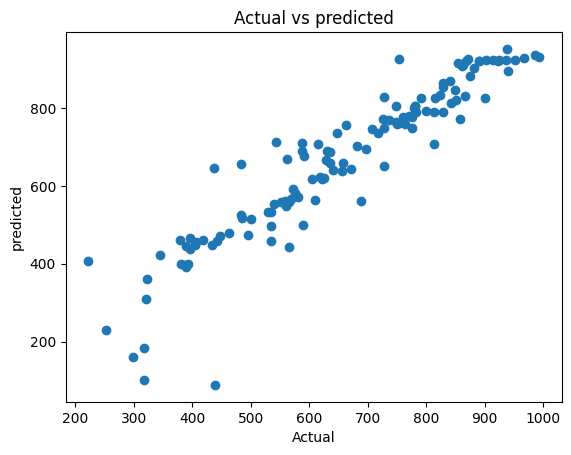

In [56]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test3, np.squeeze(model4.predict(X_test3)) )
r2_score=print('r2_score:', r2_score)


from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test3, np.squeeze(model4.predict(X_test3)) )
mae= mean_absolute_error(Y_test3, np.squeeze(model4.predict(X_test3)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test3, np.squeeze(model4.predict(X_test3)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [57]:
prediction5 =np.squeeze(model4.predict([[80,2,2,129,prediction4]]))
print("Prediction: {}".format(prediction5))

y_prd=np.squeeze(np.squeeze(model4.predict(X_test3)) )
predic_dif=pd.DataFrame({'Actual':Y_test3,'predict':y_prd,"differences":Y_test3-y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 172ms/step
Prediction: 518.2843017578125
4/4 [==============================] - 0s 8ms/step


,Actual,predict,differences
1387,986,936.539246,49.460754
567,560,548.779968,11.220032
768,630,688.801270,-58.801270
1315,940,894.017334,45.982666
1041,782,790.730896,-8.730896
1038,776,776.867798,-0.867798
511,575,581.831665,-6.831665
27,299,161.266144,137.733856
54,322,360.462067,-38.462067
911,780,806.011597,-26.011597


## Dense with keras tuner RNN

In [58]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model5=Sequential()
model5.add(Dense(128, input_dim=4, activation='relu'))
model5.add(Dense(64,activation='relu'))
model5.add(Dense(1,activation='linear'))
model5.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               640       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [59]:
model5.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 1s 9ms/step - loss: 389632.3125 - mae: 592.2184 - val_loss: 254914.2031 - val_mae: 468.3418
Epoch 2/2000
22/22 [==============================] - 0s 3ms/step - loss: 160888.6875 - mae: 348.9043 - val_loss: 77342.0547 - val_mae: 231.3958
Epoch 3/2000
22/22 [==============================] - 0s 3ms/step - loss: 51921.2930 - mae: 191.9797 - val_loss: 39939.7812 - val_mae: 165.3160
Epoch 4/2000
22/22 [==============================] - 0s 3ms/step - loss: 39219.2266 - mae: 164.8530 - val_loss: 35204.8984 - val_mae: 155.8528
Epoch 5/2000
22/22 [==============================] - 0s 3ms/step - loss: 33976.8945 - mae: 154.9528 - val_loss: 30802.3691 - val_mae: 146.6520
Epoch 6/2000
22/22 [==============================] - 0s 3ms/step - loss: 29174.5039 - mae: 143.9479 - val_loss: 25660.0332 - val_mae: 133.5957
Epoch 7/2000
22/22 [==============================] - 0s 4ms/step - loss: 23811.1680 - mae: 129.7284 - val_loss: 20941.1836 - val_mae

Epoch 59/2000
22/22 [==============================] - 0s 4ms/step - loss: 6814.4800 - mae: 59.8805 - val_loss: 7188.2725 - val_mae: 62.9043
Epoch 60/2000
22/22 [==============================] - 0s 3ms/step - loss: 6807.4292 - mae: 60.1821 - val_loss: 7273.2783 - val_mae: 63.2345
Epoch 61/2000
22/22 [==============================] - 0s 4ms/step - loss: 6842.4194 - mae: 59.9189 - val_loss: 7206.3877 - val_mae: 62.9889
Epoch 62/2000
22/22 [==============================] - 0s 4ms/step - loss: 6723.0488 - mae: 59.2717 - val_loss: 7356.2969 - val_mae: 64.1631
Epoch 63/2000
22/22 [==============================] - 0s 4ms/step - loss: 6819.1240 - mae: 60.3359 - val_loss: 7248.7568 - val_mae: 63.8469
Epoch 64/2000
22/22 [==============================] - 0s 4ms/step - loss: 6681.3442 - mae: 59.6779 - val_loss: 7314.9746 - val_mae: 63.4531
Epoch 65/2000
22/22 [==============================] - 0s 3ms/step - loss: 6810.3926 - mae: 60.2014 - val_loss: 7150.2383 - val_mae: 62.9250
Epoch 66/2000

Epoch 117/2000
22/22 [==============================] - 0s 4ms/step - loss: 6899.8589 - mae: 61.5559 - val_loss: 6997.8311 - val_mae: 63.5083
Epoch 118/2000
22/22 [==============================] - 0s 4ms/step - loss: 6710.3140 - mae: 61.0386 - val_loss: 7110.3911 - val_mae: 63.9429
Epoch 119/2000
22/22 [==============================] - 0s 4ms/step - loss: 6668.3228 - mae: 60.7075 - val_loss: 6989.8003 - val_mae: 63.4270
Epoch 120/2000
22/22 [==============================] - 0s 4ms/step - loss: 6631.8379 - mae: 60.6448 - val_loss: 7055.1895 - val_mae: 63.0384
Epoch 121/2000
22/22 [==============================] - 0s 4ms/step - loss: 6589.9707 - mae: 59.9632 - val_loss: 6985.1929 - val_mae: 63.1593
Epoch 122/2000
22/22 [==============================] - 0s 3ms/step - loss: 6538.7637 - mae: 60.4580 - val_loss: 7118.3857 - val_mae: 63.5382
Epoch 123/2000
22/22 [==============================] - 0s 3ms/step - loss: 6611.7197 - mae: 60.3196 - val_loss: 6995.2671 - val_mae: 63.3295
Epoch 

Epoch 175/2000
22/22 [==============================] - 0s 4ms/step - loss: 6459.5210 - mae: 60.8987 - val_loss: 6861.5972 - val_mae: 62.6885
Epoch 176/2000
22/22 [==============================] - 0s 4ms/step - loss: 6461.6641 - mae: 60.2594 - val_loss: 6840.0723 - val_mae: 62.4036
Epoch 177/2000
22/22 [==============================] - 0s 4ms/step - loss: 6501.3633 - mae: 61.0331 - val_loss: 6836.9897 - val_mae: 62.4285
Epoch 178/2000
22/22 [==============================] - 0s 4ms/step - loss: 6602.4307 - mae: 60.6316 - val_loss: 6835.1440 - val_mae: 62.5853
Epoch 179/2000
22/22 [==============================] - 0s 4ms/step - loss: 6507.6616 - mae: 60.3428 - val_loss: 6881.0063 - val_mae: 62.8818
Epoch 180/2000
22/22 [==============================] - 0s 4ms/step - loss: 6636.9565 - mae: 61.4537 - val_loss: 6987.9463 - val_mae: 63.3826
Epoch 181/2000
22/22 [==============================] - 0s 3ms/step - loss: 6605.0713 - mae: 60.7127 - val_loss: 7171.7217 - val_mae: 64.1920
Epoch 

Epoch 233/2000
22/22 [==============================] - 0s 4ms/step - loss: 6203.8535 - mae: 58.4910 - val_loss: 6696.0420 - val_mae: 61.0010
Epoch 234/2000
22/22 [==============================] - 0s 4ms/step - loss: 6235.9277 - mae: 59.1739 - val_loss: 6631.4604 - val_mae: 60.9368
Epoch 235/2000
22/22 [==============================] - 0s 4ms/step - loss: 6225.6616 - mae: 58.6085 - val_loss: 6867.3486 - val_mae: 61.7171
Epoch 236/2000
22/22 [==============================] - 0s 4ms/step - loss: 6251.9741 - mae: 58.8019 - val_loss: 6708.5093 - val_mae: 61.3462
Epoch 237/2000
22/22 [==============================] - 0s 3ms/step - loss: 6235.1182 - mae: 59.3707 - val_loss: 6665.0557 - val_mae: 60.9739
Epoch 238/2000
22/22 [==============================] - 0s 4ms/step - loss: 6266.8086 - mae: 59.1589 - val_loss: 6681.5728 - val_mae: 60.6897
Epoch 239/2000
22/22 [==============================] - 0s 4ms/step - loss: 6340.9956 - mae: 59.4770 - val_loss: 6714.6997 - val_mae: 61.0893
Epoch 

Epoch 291/2000
22/22 [==============================] - 0s 4ms/step - loss: 5984.7349 - mae: 57.8100 - val_loss: 6627.2915 - val_mae: 60.3154
Epoch 292/2000
22/22 [==============================] - 0s 5ms/step - loss: 6068.5742 - mae: 57.2005 - val_loss: 6895.3857 - val_mae: 61.1329
Epoch 293/2000
22/22 [==============================] - 0s 4ms/step - loss: 6073.9487 - mae: 57.9134 - val_loss: 6506.1978 - val_mae: 59.0635
Epoch 294/2000
22/22 [==============================] - 0s 5ms/step - loss: 5940.6914 - mae: 57.3395 - val_loss: 6446.9956 - val_mae: 58.7513
Epoch 295/2000
22/22 [==============================] - 0s 5ms/step - loss: 5932.6665 - mae: 56.6867 - val_loss: 6477.0991 - val_mae: 59.4753
Epoch 296/2000
22/22 [==============================] - 0s 5ms/step - loss: 6128.4404 - mae: 58.1155 - val_loss: 6685.1943 - val_mae: 60.6761
Epoch 297/2000
22/22 [==============================] - 0s 4ms/step - loss: 6172.5283 - mae: 58.1115 - val_loss: 6389.6465 - val_mae: 58.5060
Epoch 

Epoch 349/2000
22/22 [==============================] - 0s 3ms/step - loss: 5559.9692 - mae: 54.2693 - val_loss: 6689.6147 - val_mae: 58.4688
Epoch 350/2000
22/22 [==============================] - 0s 3ms/step - loss: 5709.3467 - mae: 55.7774 - val_loss: 6489.1235 - val_mae: 58.3753
Epoch 351/2000
22/22 [==============================] - 0s 3ms/step - loss: 5522.0308 - mae: 54.7540 - val_loss: 6133.9199 - val_mae: 57.3141
Epoch 352/2000
22/22 [==============================] - 0s 3ms/step - loss: 5523.7041 - mae: 54.2948 - val_loss: 6057.3291 - val_mae: 55.9163
Epoch 353/2000
22/22 [==============================] - 0s 3ms/step - loss: 5493.0376 - mae: 54.2534 - val_loss: 6069.9683 - val_mae: 55.3773
Epoch 354/2000
22/22 [==============================] - 0s 3ms/step - loss: 5624.9526 - mae: 54.4163 - val_loss: 6018.1235 - val_mae: 55.5875
Epoch 355/2000
22/22 [==============================] - 0s 3ms/step - loss: 5650.8467 - mae: 55.3995 - val_loss: 6457.0386 - val_mae: 57.6914
Epoch 

Epoch 407/2000
22/22 [==============================] - 0s 4ms/step - loss: 5281.2368 - mae: 51.8284 - val_loss: 5726.7520 - val_mae: 53.0938
Epoch 408/2000
22/22 [==============================] - 0s 4ms/step - loss: 5286.9336 - mae: 51.5258 - val_loss: 5795.4287 - val_mae: 53.0374
Epoch 409/2000
22/22 [==============================] - 0s 4ms/step - loss: 5132.2344 - mae: 50.6833 - val_loss: 5870.3350 - val_mae: 52.9449
Epoch 410/2000
22/22 [==============================] - 0s 4ms/step - loss: 5131.3291 - mae: 50.7089 - val_loss: 5796.9980 - val_mae: 52.5236
Epoch 411/2000
22/22 [==============================] - 0s 4ms/step - loss: 5144.5195 - mae: 50.6846 - val_loss: 5708.6553 - val_mae: 52.4010
Epoch 412/2000
22/22 [==============================] - 0s 3ms/step - loss: 5106.2856 - mae: 50.1979 - val_loss: 5939.2959 - val_mae: 53.2805
Epoch 413/2000
22/22 [==============================] - 0s 4ms/step - loss: 5254.2866 - mae: 50.9442 - val_loss: 6002.8799 - val_mae: 53.7240
Epoch 

Epoch 465/2000
22/22 [==============================] - 0s 3ms/step - loss: 4924.1230 - mae: 49.4093 - val_loss: 5445.2900 - val_mae: 49.8067
Epoch 466/2000
22/22 [==============================] - 0s 3ms/step - loss: 4767.0972 - mae: 47.1030 - val_loss: 5457.3931 - val_mae: 49.3619
Epoch 467/2000
22/22 [==============================] - 0s 3ms/step - loss: 4802.5820 - mae: 47.8907 - val_loss: 5589.1870 - val_mae: 51.5219
Epoch 468/2000
22/22 [==============================] - 0s 3ms/step - loss: 4866.3462 - mae: 48.6218 - val_loss: 5395.4668 - val_mae: 49.2371
Epoch 469/2000
22/22 [==============================] - 0s 3ms/step - loss: 4738.1836 - mae: 47.0990 - val_loss: 5476.1782 - val_mae: 49.6303
Epoch 470/2000
22/22 [==============================] - 0s 3ms/step - loss: 4753.6157 - mae: 47.4400 - val_loss: 5458.8550 - val_mae: 49.3476
Epoch 471/2000
22/22 [==============================] - 0s 3ms/step - loss: 4676.2900 - mae: 46.5891 - val_loss: 5502.1084 - val_mae: 50.0452
Epoch 

Epoch 523/2000
22/22 [==============================] - 0s 3ms/step - loss: 4545.0210 - mae: 45.3120 - val_loss: 5190.9341 - val_mae: 47.7726
Epoch 524/2000
22/22 [==============================] - 0s 3ms/step - loss: 4540.9238 - mae: 45.1685 - val_loss: 5197.8726 - val_mae: 47.3235
Epoch 525/2000
22/22 [==============================] - 0s 3ms/step - loss: 4504.6187 - mae: 45.5392 - val_loss: 5435.2056 - val_mae: 47.8536
Epoch 526/2000
22/22 [==============================] - 0s 3ms/step - loss: 4618.8896 - mae: 44.1545 - val_loss: 5400.1318 - val_mae: 48.9459
Epoch 527/2000
22/22 [==============================] - 0s 3ms/step - loss: 4720.3960 - mae: 46.4920 - val_loss: 5714.0293 - val_mae: 51.8955
Epoch 528/2000
22/22 [==============================] - 0s 3ms/step - loss: 5112.8154 - mae: 50.2053 - val_loss: 6139.0156 - val_mae: 55.9356
Epoch 529/2000
22/22 [==============================] - 0s 3ms/step - loss: 5245.5996 - mae: 51.0299 - val_loss: 5482.3081 - val_mae: 49.5462
Epoch 

Epoch 581/2000
22/22 [==============================] - 0s 3ms/step - loss: 4328.7520 - mae: 42.5021 - val_loss: 5057.9507 - val_mae: 45.5737
Epoch 582/2000
22/22 [==============================] - 0s 3ms/step - loss: 4406.6792 - mae: 43.6031 - val_loss: 5097.6147 - val_mae: 45.7991
Epoch 583/2000
22/22 [==============================] - 0s 3ms/step - loss: 4453.2910 - mae: 44.4013 - val_loss: 4981.8745 - val_mae: 45.3544
Epoch 584/2000
22/22 [==============================] - 0s 4ms/step - loss: 4474.0947 - mae: 45.1189 - val_loss: 4991.8345 - val_mae: 46.1747
Epoch 585/2000
22/22 [==============================] - 0s 3ms/step - loss: 4347.4380 - mae: 42.7237 - val_loss: 5126.9541 - val_mae: 46.6030
Epoch 586/2000
22/22 [==============================] - 0s 3ms/step - loss: 4339.1997 - mae: 44.5997 - val_loss: 5214.5522 - val_mae: 46.8800
Epoch 587/2000
22/22 [==============================] - 0s 3ms/step - loss: 4455.6284 - mae: 44.6213 - val_loss: 4935.4478 - val_mae: 45.0500
Epoch 

Epoch 639/2000
22/22 [==============================] - 0s 3ms/step - loss: 4224.2837 - mae: 41.5342 - val_loss: 4850.1934 - val_mae: 44.5439
Epoch 640/2000
22/22 [==============================] - 0s 3ms/step - loss: 4286.3931 - mae: 42.1736 - val_loss: 4956.1421 - val_mae: 44.8504
Epoch 641/2000
22/22 [==============================] - 0s 3ms/step - loss: 4213.8955 - mae: 41.7553 - val_loss: 4928.4692 - val_mae: 45.6731
Epoch 642/2000
22/22 [==============================] - 0s 3ms/step - loss: 4391.1387 - mae: 44.1814 - val_loss: 5269.3208 - val_mae: 47.5424
Epoch 643/2000
22/22 [==============================] - 0s 3ms/step - loss: 4387.5059 - mae: 44.0335 - val_loss: 4889.5088 - val_mae: 44.4798
Epoch 644/2000
22/22 [==============================] - 0s 3ms/step - loss: 4204.4155 - mae: 42.7675 - val_loss: 4936.9268 - val_mae: 43.8989
Epoch 645/2000
22/22 [==============================] - 0s 3ms/step - loss: 4286.7539 - mae: 41.6734 - val_loss: 4938.9878 - val_mae: 44.5504
Epoch 

Epoch 697/2000
22/22 [==============================] - 0s 3ms/step - loss: 4332.6914 - mae: 42.7212 - val_loss: 4892.2188 - val_mae: 43.9609
Epoch 698/2000
22/22 [==============================] - 0s 3ms/step - loss: 4316.9126 - mae: 42.3334 - val_loss: 4956.8027 - val_mae: 44.7262
Epoch 699/2000
22/22 [==============================] - 0s 3ms/step - loss: 4423.1235 - mae: 43.9548 - val_loss: 4993.4985 - val_mae: 46.8503
Epoch 700/2000
22/22 [==============================] - 0s 3ms/step - loss: 4324.6147 - mae: 42.4473 - val_loss: 4784.7861 - val_mae: 43.6856
Epoch 701/2000
22/22 [==============================] - 0s 3ms/step - loss: 4117.8687 - mae: 41.4379 - val_loss: 4860.2261 - val_mae: 43.1060
Epoch 702/2000
22/22 [==============================] - 0s 3ms/step - loss: 4239.6470 - mae: 41.6702 - val_loss: 4786.0278 - val_mae: 43.2285
Epoch 703/2000
22/22 [==============================] - 0s 3ms/step - loss: 4224.9346 - mae: 41.7455 - val_loss: 4918.3867 - val_mae: 43.1637
Epoch 

Epoch 755/2000
22/22 [==============================] - 0s 4ms/step - loss: 4215.1133 - mae: 41.8438 - val_loss: 4799.9985 - val_mae: 42.4347
Epoch 756/2000
22/22 [==============================] - 0s 4ms/step - loss: 4335.4731 - mae: 43.6333 - val_loss: 4819.5688 - val_mae: 43.4771
Epoch 757/2000
22/22 [==============================] - 0s 4ms/step - loss: 4284.8247 - mae: 42.8079 - val_loss: 4697.4429 - val_mae: 43.1245
Epoch 758/2000
22/22 [==============================] - 0s 4ms/step - loss: 4079.5085 - mae: 40.5135 - val_loss: 4880.0654 - val_mae: 43.4987
Epoch 759/2000
22/22 [==============================] - 0s 3ms/step - loss: 4157.2271 - mae: 41.6308 - val_loss: 4883.4893 - val_mae: 44.0552
Epoch 760/2000
22/22 [==============================] - 0s 4ms/step - loss: 4151.4663 - mae: 41.6060 - val_loss: 5307.8691 - val_mae: 48.4596
Epoch 761/2000
22/22 [==============================] - 0s 4ms/step - loss: 4127.0869 - mae: 42.3314 - val_loss: 4931.9326 - val_mae: 44.3074
Epoch 

Epoch 813/2000
22/22 [==============================] - 0s 3ms/step - loss: 4133.8042 - mae: 41.2967 - val_loss: 4820.6294 - val_mae: 42.4027
Epoch 814/2000
22/22 [==============================] - 0s 3ms/step - loss: 4258.1807 - mae: 42.8229 - val_loss: 4649.3545 - val_mae: 42.5039
Epoch 815/2000
22/22 [==============================] - 0s 3ms/step - loss: 4033.0964 - mae: 40.8597 - val_loss: 4661.3130 - val_mae: 42.1766
Epoch 816/2000
22/22 [==============================] - 0s 3ms/step - loss: 4037.4734 - mae: 40.0292 - val_loss: 4910.6748 - val_mae: 44.3518
Epoch 817/2000
22/22 [==============================] - 0s 3ms/step - loss: 3983.9199 - mae: 39.5523 - val_loss: 4719.5581 - val_mae: 41.5957
Epoch 818/2000
22/22 [==============================] - 0s 3ms/step - loss: 3955.7468 - mae: 39.6548 - val_loss: 4636.5889 - val_mae: 42.4577
Epoch 819/2000
22/22 [==============================] - 0s 3ms/step - loss: 4194.8906 - mae: 41.6841 - val_loss: 4678.6851 - val_mae: 42.4254
Epoch 

Epoch 871/2000
22/22 [==============================] - 0s 3ms/step - loss: 3947.0879 - mae: 40.5734 - val_loss: 4767.2515 - val_mae: 41.5274
Epoch 872/2000
22/22 [==============================] - 0s 3ms/step - loss: 4000.1838 - mae: 41.2257 - val_loss: 4604.7549 - val_mae: 41.4315
Epoch 873/2000
22/22 [==============================] - 0s 3ms/step - loss: 4012.5303 - mae: 40.5781 - val_loss: 4713.3779 - val_mae: 45.7814
Epoch 874/2000
22/22 [==============================] - 0s 3ms/step - loss: 4225.5273 - mae: 43.7107 - val_loss: 4857.6851 - val_mae: 44.2934
Epoch 875/2000
22/22 [==============================] - 0s 3ms/step - loss: 3960.2251 - mae: 39.6155 - val_loss: 4706.8022 - val_mae: 41.3371
Epoch 876/2000
22/22 [==============================] - 0s 3ms/step - loss: 3989.7861 - mae: 40.3318 - val_loss: 4763.2622 - val_mae: 43.1098
Epoch 877/2000
22/22 [==============================] - 0s 3ms/step - loss: 3933.3660 - mae: 39.7112 - val_loss: 4756.1172 - val_mae: 42.2666
Epoch 

Epoch 929/2000
22/22 [==============================] - 0s 3ms/step - loss: 3927.2190 - mae: 40.0322 - val_loss: 4594.3105 - val_mae: 42.4179
Epoch 930/2000
22/22 [==============================] - 0s 3ms/step - loss: 4009.0015 - mae: 40.8219 - val_loss: 4615.4126 - val_mae: 41.0040
Epoch 931/2000
22/22 [==============================] - 0s 3ms/step - loss: 3947.2969 - mae: 40.3380 - val_loss: 5139.7993 - val_mae: 47.5346
Epoch 932/2000
22/22 [==============================] - 0s 3ms/step - loss: 4041.4714 - mae: 41.6469 - val_loss: 4725.8882 - val_mae: 42.4127
Epoch 933/2000
22/22 [==============================] - 0s 3ms/step - loss: 3922.3081 - mae: 39.1938 - val_loss: 4538.7832 - val_mae: 42.4367
Epoch 934/2000
22/22 [==============================] - 0s 3ms/step - loss: 3981.8328 - mae: 40.5915 - val_loss: 4581.9419 - val_mae: 40.9241
Epoch 935/2000
22/22 [==============================] - 0s 3ms/step - loss: 3807.8372 - mae: 38.4613 - val_loss: 4583.8838 - val_mae: 41.7202
Epoch 

Epoch 987/2000
22/22 [==============================] - 0s 3ms/step - loss: 3794.6531 - mae: 38.5081 - val_loss: 5239.8584 - val_mae: 48.4343
Epoch 988/2000
22/22 [==============================] - 0s 3ms/step - loss: 4098.7656 - mae: 42.3666 - val_loss: 4691.0610 - val_mae: 42.2714
Epoch 989/2000
22/22 [==============================] - 0s 3ms/step - loss: 3847.7498 - mae: 38.9724 - val_loss: 4575.9297 - val_mae: 41.4428
Epoch 990/2000
22/22 [==============================] - 0s 3ms/step - loss: 3812.4622 - mae: 39.1597 - val_loss: 4714.5522 - val_mae: 42.7466
Epoch 991/2000
22/22 [==============================] - 0s 3ms/step - loss: 3852.9053 - mae: 39.5889 - val_loss: 4682.4937 - val_mae: 42.3954
Epoch 992/2000
22/22 [==============================] - 0s 3ms/step - loss: 3866.1130 - mae: 39.4754 - val_loss: 4757.4688 - val_mae: 41.5974
Epoch 993/2000
22/22 [==============================] - 0s 3ms/step - loss: 3808.2942 - mae: 38.3967 - val_loss: 4602.4180 - val_mae: 41.1587
Epoch 

22/22 [==============================] - 0s 3ms/step - loss: 3715.4893 - mae: 37.9746 - val_loss: 4436.7583 - val_mae: 40.2537
Epoch 1045/2000
22/22 [==============================] - 0s 3ms/step - loss: 3775.1902 - mae: 39.8336 - val_loss: 4520.7827 - val_mae: 39.5170
Epoch 1046/2000
22/22 [==============================] - 0s 3ms/step - loss: 3713.3970 - mae: 38.4085 - val_loss: 4647.4272 - val_mae: 40.4286
Epoch 1047/2000
22/22 [==============================] - 0s 3ms/step - loss: 3704.5652 - mae: 37.0514 - val_loss: 4465.7344 - val_mae: 40.0155
Epoch 1048/2000
22/22 [==============================] - 0s 3ms/step - loss: 3751.8794 - mae: 37.9511 - val_loss: 4758.1255 - val_mae: 43.3963
Epoch 1049/2000
22/22 [==============================] - 0s 3ms/step - loss: 3705.5627 - mae: 39.0852 - val_loss: 4884.1504 - val_mae: 46.0228
Epoch 1050/2000
22/22 [==============================] - 0s 3ms/step - loss: 3835.5037 - mae: 40.4247 - val_loss: 4426.3467 - val_mae: 40.5917
Epoch 1051/2000

22/22 [==============================] - 0s 5ms/step - loss: 3648.4583 - mae: 37.7168 - val_loss: 4602.1592 - val_mae: 41.5578
Epoch 1102/2000
22/22 [==============================] - 0s 4ms/step - loss: 3687.9431 - mae: 38.2029 - val_loss: 4574.5342 - val_mae: 41.3212
Epoch 1103/2000
22/22 [==============================] - 0s 4ms/step - loss: 3568.4954 - mae: 36.9296 - val_loss: 4532.3413 - val_mae: 39.3573
Epoch 1104/2000
22/22 [==============================] - 0s 4ms/step - loss: 3680.1062 - mae: 37.6062 - val_loss: 4608.3042 - val_mae: 42.7990
Epoch 1105/2000
22/22 [==============================] - 0s 4ms/step - loss: 3741.5059 - mae: 38.2668 - val_loss: 5084.0083 - val_mae: 47.1105
Epoch 1106/2000
22/22 [==============================] - 0s 4ms/step - loss: 3927.7212 - mae: 40.8512 - val_loss: 4443.3442 - val_mae: 39.5690
Epoch 1107/2000
22/22 [==============================] - 0s 4ms/step - loss: 3973.7690 - mae: 42.8810 - val_loss: 5089.3257 - val_mae: 47.4266
Epoch 1108/2000

22/22 [==============================] - 0s 3ms/step - loss: 3723.3162 - mae: 39.2638 - val_loss: 4588.0649 - val_mae: 39.3221
Epoch 1159/2000
22/22 [==============================] - 0s 3ms/step - loss: 3830.3069 - mae: 40.1289 - val_loss: 4579.8579 - val_mae: 42.7456
Epoch 1160/2000
22/22 [==============================] - 0s 3ms/step - loss: 3707.8149 - mae: 38.4666 - val_loss: 4395.3726 - val_mae: 40.8251
Epoch 1161/2000
22/22 [==============================] - 0s 3ms/step - loss: 3563.1165 - mae: 37.7434 - val_loss: 4540.3340 - val_mae: 39.8130
Epoch 1162/2000
22/22 [==============================] - 0s 3ms/step - loss: 3657.2158 - mae: 39.1699 - val_loss: 4710.2754 - val_mae: 42.7244
Epoch 1163/2000
22/22 [==============================] - 0s 3ms/step - loss: 3885.2939 - mae: 40.6838 - val_loss: 4603.4883 - val_mae: 42.6638
Epoch 1164/2000
22/22 [==============================] - 0s 3ms/step - loss: 3781.9810 - mae: 40.8786 - val_loss: 4556.1392 - val_mae: 39.5861
Epoch 1165/2000

22/22 [==============================] - 0s 3ms/step - loss: 3726.3477 - mae: 38.4230 - val_loss: 4473.9253 - val_mae: 39.7587
Epoch 1216/2000
22/22 [==============================] - 0s 3ms/step - loss: 3479.1768 - mae: 37.0835 - val_loss: 4598.9717 - val_mae: 41.6539
Epoch 1217/2000
22/22 [==============================] - 0s 3ms/step - loss: 3448.1553 - mae: 36.8900 - val_loss: 4774.4634 - val_mae: 44.1242
Epoch 1218/2000
22/22 [==============================] - 0s 3ms/step - loss: 3555.3259 - mae: 37.9299 - val_loss: 4326.4629 - val_mae: 40.0248
Epoch 1219/2000
22/22 [==============================] - 0s 3ms/step - loss: 3562.7151 - mae: 37.4475 - val_loss: 5351.9512 - val_mae: 50.7575
Epoch 1220/2000
22/22 [==============================] - 0s 4ms/step - loss: 3979.2068 - mae: 42.6891 - val_loss: 4412.5566 - val_mae: 39.4924
Epoch 1221/2000
22/22 [==============================] - 0s 3ms/step - loss: 3516.3733 - mae: 37.0579 - val_loss: 4407.0903 - val_mae: 39.4349
Epoch 1222/2000

22/22 [==============================] - 0s 3ms/step - loss: 3496.8000 - mae: 37.8906 - val_loss: 4708.9888 - val_mae: 43.2447
Epoch 1273/2000
22/22 [==============================] - 0s 3ms/step - loss: 3599.8916 - mae: 38.1712 - val_loss: 4346.3633 - val_mae: 38.8062
Epoch 1274/2000
22/22 [==============================] - 0s 3ms/step - loss: 3592.5886 - mae: 38.4143 - val_loss: 4322.4443 - val_mae: 38.7147
Epoch 1275/2000
22/22 [==============================] - 0s 3ms/step - loss: 3508.2346 - mae: 38.8377 - val_loss: 4333.0278 - val_mae: 38.4592
Epoch 1276/2000
22/22 [==============================] - 0s 3ms/step - loss: 3562.1431 - mae: 38.0202 - val_loss: 4386.5132 - val_mae: 38.7789
Epoch 1277/2000
22/22 [==============================] - 0s 3ms/step - loss: 3491.9182 - mae: 38.1240 - val_loss: 4511.0601 - val_mae: 38.5280
Epoch 1278/2000
22/22 [==============================] - 0s 3ms/step - loss: 3408.5210 - mae: 36.1699 - val_loss: 4413.1123 - val_mae: 39.9775
Epoch 1279/2000

22/22 [==============================] - 0s 3ms/step - loss: 3335.1729 - mae: 36.0546 - val_loss: 4455.9868 - val_mae: 41.6412
Epoch 1330/2000
22/22 [==============================] - 0s 3ms/step - loss: 3414.1099 - mae: 37.2013 - val_loss: 4342.9438 - val_mae: 38.0859
Epoch 1331/2000
22/22 [==============================] - 0s 3ms/step - loss: 3580.2922 - mae: 38.5545 - val_loss: 4307.5562 - val_mae: 38.7868
Epoch 1332/2000
22/22 [==============================] - 0s 3ms/step - loss: 3415.2476 - mae: 37.2277 - val_loss: 4320.8745 - val_mae: 38.4657
Epoch 1333/2000
22/22 [==============================] - 0s 3ms/step - loss: 3321.6233 - mae: 35.1541 - val_loss: 4300.4658 - val_mae: 39.8480
Epoch 1334/2000
22/22 [==============================] - 0s 4ms/step - loss: 3515.2131 - mae: 38.3460 - val_loss: 4421.8848 - val_mae: 38.6308
Epoch 1335/2000
22/22 [==============================] - 0s 3ms/step - loss: 3459.8787 - mae: 37.9028 - val_loss: 4380.0210 - val_mae: 40.2127
Epoch 1336/2000

22/22 [==============================] - 0s 3ms/step - loss: 3783.5220 - mae: 40.3771 - val_loss: 4763.3906 - val_mae: 44.1595
Epoch 1387/2000
22/22 [==============================] - 0s 3ms/step - loss: 3600.9888 - mae: 39.5492 - val_loss: 5085.1240 - val_mae: 48.0091
Epoch 1388/2000
22/22 [==============================] - 0s 3ms/step - loss: 3655.1174 - mae: 39.7774 - val_loss: 4962.7046 - val_mae: 46.8973
Epoch 1389/2000
22/22 [==============================] - 0s 3ms/step - loss: 3303.5076 - mae: 35.7630 - val_loss: 4339.9893 - val_mae: 40.4415
Epoch 1390/2000
22/22 [==============================] - 0s 3ms/step - loss: 3401.7144 - mae: 37.0639 - val_loss: 4602.6919 - val_mae: 43.9239
Epoch 1391/2000
22/22 [==============================] - 0s 3ms/step - loss: 3337.5725 - mae: 35.9552 - val_loss: 4321.3887 - val_mae: 38.5612
Epoch 1392/2000
22/22 [==============================] - 0s 3ms/step - loss: 3349.0010 - mae: 35.9681 - val_loss: 4284.4741 - val_mae: 38.6737
Epoch 1393/2000

22/22 [==============================] - 0s 3ms/step - loss: 3175.5479 - mae: 34.6115 - val_loss: 4406.9092 - val_mae: 38.1525
Epoch 1444/2000
22/22 [==============================] - 0s 3ms/step - loss: 3323.1726 - mae: 36.2883 - val_loss: 4249.6147 - val_mae: 38.2222
Epoch 1445/2000
22/22 [==============================] - 0s 3ms/step - loss: 3231.3213 - mae: 35.0503 - val_loss: 4285.4883 - val_mae: 38.8379
Epoch 1446/2000
22/22 [==============================] - 0s 3ms/step - loss: 3250.4236 - mae: 36.0025 - val_loss: 4407.7622 - val_mae: 37.8806
Epoch 1447/2000
22/22 [==============================] - 0s 3ms/step - loss: 3190.8804 - mae: 34.3818 - val_loss: 4252.9165 - val_mae: 38.1144
Epoch 1448/2000
22/22 [==============================] - 0s 4ms/step - loss: 3326.1013 - mae: 35.8624 - val_loss: 4514.6899 - val_mae: 41.7495
Epoch 1449/2000
22/22 [==============================] - 0s 4ms/step - loss: 3242.5771 - mae: 34.8606 - val_loss: 4342.7959 - val_mae: 38.5872
Epoch 1450/2000

22/22 [==============================] - 0s 3ms/step - loss: 3143.1692 - mae: 34.0961 - val_loss: 4248.7007 - val_mae: 37.9059
Epoch 1501/2000
22/22 [==============================] - 0s 3ms/step - loss: 3218.9468 - mae: 35.1791 - val_loss: 4315.3223 - val_mae: 37.4344
Epoch 1502/2000
22/22 [==============================] - 0s 3ms/step - loss: 3135.3123 - mae: 34.1623 - val_loss: 4411.0703 - val_mae: 40.4443
Epoch 1503/2000
22/22 [==============================] - 0s 3ms/step - loss: 3337.0947 - mae: 37.2469 - val_loss: 4604.6538 - val_mae: 40.5602
Epoch 1504/2000
22/22 [==============================] - 0s 3ms/step - loss: 3299.6721 - mae: 36.1408 - val_loss: 4257.7485 - val_mae: 37.2160
Epoch 1505/2000
22/22 [==============================] - 0s 3ms/step - loss: 3311.3782 - mae: 37.3796 - val_loss: 4247.9570 - val_mae: 38.2536
Epoch 1506/2000
22/22 [==============================] - 0s 3ms/step - loss: 3201.2939 - mae: 34.5782 - val_loss: 4416.8853 - val_mae: 42.9168
Epoch 1507/2000

22/22 [==============================] - 0s 3ms/step - loss: 3154.9795 - mae: 34.6680 - val_loss: 4288.9092 - val_mae: 37.6555
Epoch 1558/2000
22/22 [==============================] - 0s 3ms/step - loss: 3045.2266 - mae: 33.5915 - val_loss: 4328.8315 - val_mae: 38.5715
Epoch 1559/2000
22/22 [==============================] - 0s 3ms/step - loss: 3151.6089 - mae: 34.6614 - val_loss: 4237.2163 - val_mae: 38.4762
Epoch 1560/2000
22/22 [==============================] - 0s 3ms/step - loss: 3630.2461 - mae: 40.4795 - val_loss: 4472.9180 - val_mae: 42.2263
Epoch 1561/2000
22/22 [==============================] - 0s 3ms/step - loss: 3190.4280 - mae: 34.7573 - val_loss: 4359.8335 - val_mae: 38.2272
Epoch 1562/2000
22/22 [==============================] - 0s 3ms/step - loss: 3086.3386 - mae: 34.3212 - val_loss: 4389.7129 - val_mae: 38.9454
Epoch 1563/2000
22/22 [==============================] - 0s 3ms/step - loss: 3246.0947 - mae: 35.9467 - val_loss: 4573.4922 - val_mae: 41.7219
Epoch 1564/2000

22/22 [==============================] - 0s 3ms/step - loss: 3255.9941 - mae: 37.5217 - val_loss: 4730.3564 - val_mae: 43.6752
Epoch 1615/2000
22/22 [==============================] - 0s 3ms/step - loss: 3199.7737 - mae: 36.7968 - val_loss: 4371.4941 - val_mae: 38.7671
Epoch 1616/2000
22/22 [==============================] - 0s 3ms/step - loss: 3140.6577 - mae: 34.2370 - val_loss: 4313.8262 - val_mae: 37.8892
Epoch 1617/2000
22/22 [==============================] - 0s 3ms/step - loss: 3024.4434 - mae: 33.8683 - val_loss: 4794.2563 - val_mae: 47.1429
Epoch 1618/2000
22/22 [==============================] - 0s 3ms/step - loss: 3378.9199 - mae: 38.2767 - val_loss: 4298.7812 - val_mae: 39.0369
Epoch 1619/2000
22/22 [==============================] - 0s 3ms/step - loss: 3015.7131 - mae: 33.7101 - val_loss: 4679.5693 - val_mae: 43.9731
Epoch 1620/2000
22/22 [==============================] - 0s 3ms/step - loss: 3424.4749 - mae: 38.5449 - val_loss: 4327.1533 - val_mae: 37.8895
Epoch 1621/2000

22/22 [==============================] - 0s 3ms/step - loss: 3277.6294 - mae: 36.4427 - val_loss: 4300.4448 - val_mae: 40.3332
Epoch 1672/2000
22/22 [==============================] - 0s 4ms/step - loss: 3057.9192 - mae: 34.9782 - val_loss: 4469.7021 - val_mae: 38.4059
Epoch 1673/2000
22/22 [==============================] - 0s 3ms/step - loss: 3139.9680 - mae: 36.2694 - val_loss: 4357.5093 - val_mae: 38.5474
Epoch 1674/2000
22/22 [==============================] - 0s 3ms/step - loss: 3091.3945 - mae: 34.4896 - val_loss: 4312.2534 - val_mae: 38.5623
Epoch 1675/2000
22/22 [==============================] - 0s 3ms/step - loss: 3074.6335 - mae: 34.5720 - val_loss: 4501.2256 - val_mae: 39.1471
Epoch 1676/2000
22/22 [==============================] - 0s 3ms/step - loss: 3009.6653 - mae: 33.4435 - val_loss: 4412.0757 - val_mae: 40.0917
Epoch 1677/2000
22/22 [==============================] - 0s 3ms/step - loss: 3130.0107 - mae: 34.5732 - val_loss: 4265.3140 - val_mae: 38.4299
Epoch 1678/2000

22/22 [==============================] - 0s 3ms/step - loss: 3118.5559 - mae: 35.4024 - val_loss: 4262.5928 - val_mae: 38.3196
Epoch 1729/2000
22/22 [==============================] - 0s 4ms/step - loss: 2910.3328 - mae: 32.8823 - val_loss: 4690.7725 - val_mae: 42.9117
Epoch 1730/2000
22/22 [==============================] - 0s 4ms/step - loss: 3171.7349 - mae: 35.6836 - val_loss: 4376.0146 - val_mae: 40.7362
Epoch 1731/2000
22/22 [==============================] - 0s 4ms/step - loss: 3249.2615 - mae: 36.2010 - val_loss: 4332.1123 - val_mae: 39.0815
Epoch 1732/2000
22/22 [==============================] - 0s 4ms/step - loss: 3158.1499 - mae: 35.6074 - val_loss: 4560.8955 - val_mae: 41.2067
Epoch 1733/2000
22/22 [==============================] - 0s 4ms/step - loss: 3144.5718 - mae: 35.3617 - val_loss: 4674.3955 - val_mae: 42.7535
Epoch 1734/2000
22/22 [==============================] - 0s 4ms/step - loss: 3249.2258 - mae: 38.3647 - val_loss: 4367.6948 - val_mae: 39.4638
Epoch 1735/2000

22/22 [==============================] - 0s 3ms/step - loss: 2960.9158 - mae: 33.5228 - val_loss: 4398.9355 - val_mae: 38.7537
Epoch 1786/2000
22/22 [==============================] - 0s 3ms/step - loss: 3010.2378 - mae: 34.3406 - val_loss: 4324.1680 - val_mae: 39.6458
Epoch 1787/2000
22/22 [==============================] - 0s 3ms/step - loss: 2962.2654 - mae: 33.2083 - val_loss: 4244.0361 - val_mae: 38.4953
Epoch 1788/2000
22/22 [==============================] - 0s 3ms/step - loss: 3153.8191 - mae: 37.4462 - val_loss: 4709.3433 - val_mae: 43.0597
Epoch 1789/2000
22/22 [==============================] - 0s 3ms/step - loss: 3259.8721 - mae: 37.1307 - val_loss: 4293.7603 - val_mae: 38.0929
Epoch 1790/2000
22/22 [==============================] - 0s 3ms/step - loss: 3011.1816 - mae: 34.3277 - val_loss: 4321.7842 - val_mae: 39.0048
Epoch 1791/2000
22/22 [==============================] - 0s 3ms/step - loss: 3056.3743 - mae: 35.3322 - val_loss: 4443.5439 - val_mae: 40.3380
Epoch 1792/2000

22/22 [==============================] - 0s 3ms/step - loss: 3188.9363 - mae: 36.4486 - val_loss: 4296.2217 - val_mae: 38.1229
Epoch 1843/2000
22/22 [==============================] - 0s 3ms/step - loss: 3038.8599 - mae: 35.8456 - val_loss: 4782.4585 - val_mae: 44.0117
Epoch 1844/2000
22/22 [==============================] - 0s 3ms/step - loss: 3045.2573 - mae: 34.6993 - val_loss: 4263.1040 - val_mae: 38.3671
Epoch 1845/2000
22/22 [==============================] - 0s 3ms/step - loss: 2948.5452 - mae: 34.4412 - val_loss: 4307.3457 - val_mae: 38.0713
Epoch 1846/2000
22/22 [==============================] - 0s 3ms/step - loss: 2952.2607 - mae: 33.4892 - val_loss: 4461.0342 - val_mae: 41.7388
Epoch 1847/2000
22/22 [==============================] - 0s 3ms/step - loss: 2929.8330 - mae: 33.7487 - val_loss: 4470.8101 - val_mae: 39.0271
Epoch 1848/2000
22/22 [==============================] - 0s 3ms/step - loss: 2962.8740 - mae: 33.8645 - val_loss: 4387.8438 - val_mae: 39.9636
Epoch 1849/2000

22/22 [==============================] - 0s 3ms/step - loss: 2959.7468 - mae: 33.6366 - val_loss: 4349.3794 - val_mae: 39.2502
Epoch 1900/2000
22/22 [==============================] - 0s 3ms/step - loss: 3130.3225 - mae: 37.0726 - val_loss: 4539.5117 - val_mae: 43.5061
Epoch 1901/2000
22/22 [==============================] - 0s 3ms/step - loss: 3241.1907 - mae: 36.7923 - val_loss: 4296.0708 - val_mae: 38.8784
Epoch 1902/2000
22/22 [==============================] - 0s 3ms/step - loss: 2906.3599 - mae: 33.0703 - val_loss: 4275.9019 - val_mae: 37.7698
Epoch 1903/2000
22/22 [==============================] - 0s 3ms/step - loss: 2902.3623 - mae: 32.7326 - val_loss: 4373.8647 - val_mae: 37.9166
Epoch 1904/2000
22/22 [==============================] - 0s 3ms/step - loss: 2892.7131 - mae: 33.1767 - val_loss: 4297.5820 - val_mae: 38.7212
Epoch 1905/2000
22/22 [==============================] - 0s 3ms/step - loss: 2890.4597 - mae: 33.1636 - val_loss: 4293.3359 - val_mae: 38.7328
Epoch 1906/2000

22/22 [==============================] - 0s 3ms/step - loss: 2907.7551 - mae: 33.6810 - val_loss: 4294.3809 - val_mae: 38.5204
Epoch 1957/2000
22/22 [==============================] - 0s 3ms/step - loss: 3002.0886 - mae: 35.0443 - val_loss: 4401.6895 - val_mae: 38.4518
Epoch 1958/2000
22/22 [==============================] - 0s 3ms/step - loss: 3029.2803 - mae: 34.7225 - val_loss: 4402.2676 - val_mae: 39.7336
Epoch 1959/2000
22/22 [==============================] - 0s 3ms/step - loss: 3029.9551 - mae: 35.7252 - val_loss: 4341.4629 - val_mae: 38.9124
Epoch 1960/2000
22/22 [==============================] - 0s 3ms/step - loss: 2932.3726 - mae: 33.8532 - val_loss: 4313.8940 - val_mae: 38.2025
Epoch 1961/2000
22/22 [==============================] - 0s 3ms/step - loss: 3287.5732 - mae: 37.6822 - val_loss: 5335.9751 - val_mae: 49.0957
Epoch 1962/2000
22/22 [==============================] - 0s 3ms/step - loss: 3140.3320 - mae: 37.0938 - val_loss: 4472.9160 - val_mae: 40.1156
Epoch 1963/2000

In [60]:
prediction6 = np.squeeze(model5.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction6))

1/1 [==============================] - 0s 63ms/step
Prediction: 420.8331604003906


In [61]:
y_prd=np.squeeze(np.squeeze(model5.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

14/14 [==============================] - 0s 1ms/step
      Actual     predict  differences
431      529  566.317322   -37.317322
610      624  643.682495   -19.682495
795      635  674.770264   -39.770264
1238     929  915.987549    13.012451
1228     890  883.223267     6.776733
...      ...         ...          ...
103      686  563.983765   122.016235
575      543  598.141724   -55.141724
60       694  619.727051    74.272949
988      829  848.384644   -19.384644
511      575  612.108521   -37.108521

[426 rows x 3 columns]


In [62]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-271.8040771484375
294.4434814453125
-332.0850830078125
260.85357666015625
-565.4035034179688
215.3468017578125
-302.412353515625
252.884033203125
182.6661376953125
lower bound: -221.01255184334696
upper bound: 177.4659097368833


In [63]:
A.drop(A[(A['differences'] >177)].index, inplace=True)
A.drop(A[(A['differences'] <-221)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HeatingCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X4=B.drop('Actual',axis=1)
Y4=B['Actual']
X_train4, X_test4, Y_train4, Y_test4 =train_test_split(X4,Y4, test_size=0.3, random_state = 0)

      AverageFloorArea  Year/Quarter  Property Type  \
1                   14             4              1   
2                   19             1              4   
4                   20             1              2   
5                   20             4              4   
8                   25             1              4   
...                ...           ...            ...   
1406               141             4              3   
1407               142             3              3   
1410               143             2              1   
1411               143             3              3   
1415               146             4              1   

      EnergyUseAveragePerDwelling  Actual      predict  
1                             468     187   304.533997  
2                             375     253   334.356689  
4                             366     131   216.029617  
5                             312     313   378.193787  
8                             268     345   328.251648

In [64]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train4.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [65]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train4,Y_train4 ,epochs=100,validation_data=(X_test4,Y_test4))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model6 = tuner.hypermodel.build(best_hps)

model6.fit(X_train4, Y_train4, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
7/7 [==============================] - 2s 67ms/step - loss: 434.9326 - mean_absolute_error: 434.9326 - val_loss: 382.9550 - val_mean_absolute_error: 382.9550
Epoch 2/2000
7/7 [==============================] - 0s 28ms/step - loss: 185.4122 - mean_absolute_error: 185.4122 - val_loss: 50.8230 - val_mean_absolute_error: 50.8230
Epoch 3/2000
7/7 [==============================] - 0s 27ms/step - loss: 52.3021 - mean_absolute_error: 52.3021 - val_loss: 56.7377 - val_mean_absolute_error: 56.7377
Epoch 4/2000
7/7 [==============================] - 0s 29ms/step - loss: 47.8998 - mean_absolute_error: 47.8998 - val_loss: 55.6821 - val_mean_absolute_error: 55.6821
Epoch 5/2000
7/7 [==============================] - 0s 29ms/step - loss: 44.4878 - mean_absolute_error: 44.4878 - val_loss: 64.5687 - val_mean_absol

Epoch 49/2000
7/7 [==============================] - 0s 25ms/step - loss: 34.6370 - mean_absolute_error: 34.6370 - val_loss: 39.0061 - val_mean_absolute_error: 39.0061
Epoch 50/2000
7/7 [==============================] - 0s 25ms/step - loss: 37.4424 - mean_absolute_error: 37.4424 - val_loss: 51.4647 - val_mean_absolute_error: 51.4647
Epoch 51/2000
7/7 [==============================] - 0s 24ms/step - loss: 47.1800 - mean_absolute_error: 47.1800 - val_loss: 41.4946 - val_mean_absolute_error: 41.4946
Epoch 52/2000
7/7 [==============================] - 0s 24ms/step - loss: 30.9671 - mean_absolute_error: 30.9671 - val_loss: 40.9747 - val_mean_absolute_error: 40.9747
Epoch 53/2000
7/7 [==============================] - 0s 24ms/step - loss: 29.1126 - mean_absolute_error: 29.1126 - val_loss: 38.4317 - val_mean_absolute_error: 38.4317
Epoch 54/2000
7/7 [==============================] - 0s 24ms/step - loss: 30.5253 - mean_absolute_error: 30.5253 - val_loss: 40.1492 - val_mean_absolute_error: 

Epoch 98/2000
7/7 [==============================] - 0s 24ms/step - loss: 30.6080 - mean_absolute_error: 30.6080 - val_loss: 41.9156 - val_mean_absolute_error: 41.9156
Epoch 99/2000
7/7 [==============================] - 0s 24ms/step - loss: 30.8948 - mean_absolute_error: 30.8948 - val_loss: 38.3852 - val_mean_absolute_error: 38.3852
Epoch 100/2000
7/7 [==============================] - 0s 23ms/step - loss: 33.1139 - mean_absolute_error: 33.1139 - val_loss: 45.3563 - val_mean_absolute_error: 45.3563
Epoch 101/2000
7/7 [==============================] - 0s 24ms/step - loss: 32.3996 - mean_absolute_error: 32.3996 - val_loss: 39.9486 - val_mean_absolute_error: 39.9486
Epoch 102/2000
7/7 [==============================] - 0s 24ms/step - loss: 31.8012 - mean_absolute_error: 31.8012 - val_loss: 40.2764 - val_mean_absolute_error: 40.2764
Epoch 103/2000
7/7 [==============================] - 0s 24ms/step - loss: 31.2060 - mean_absolute_error: 31.2060 - val_loss: 38.5775 - val_mean_absolute_err

7/7 [==============================] - 0s 24ms/step - loss: 31.4528 - mean_absolute_error: 31.4528 - val_loss: 43.6640 - val_mean_absolute_error: 43.6640
Epoch 147/2000
7/7 [==============================] - 0s 24ms/step - loss: 32.1169 - mean_absolute_error: 32.1169 - val_loss: 38.6129 - val_mean_absolute_error: 38.6129
Epoch 148/2000
7/7 [==============================] - 0s 24ms/step - loss: 30.5821 - mean_absolute_error: 30.5821 - val_loss: 42.5595 - val_mean_absolute_error: 42.5595
Epoch 149/2000
7/7 [==============================] - 0s 24ms/step - loss: 32.5957 - mean_absolute_error: 32.5957 - val_loss: 39.2267 - val_mean_absolute_error: 39.2267
Epoch 150/2000
7/7 [==============================] - 0s 24ms/step - loss: 31.0946 - mean_absolute_error: 31.0946 - val_loss: 44.8028 - val_mean_absolute_error: 44.8028
Epoch 151/2000
7/7 [==============================] - 0s 26ms/step - loss: 40.0793 - mean_absolute_error: 40.0793 - val_loss: 48.1562 - val_mean_absolute_error: 48.1562
E

7/7 [==============================] - 0s 35ms/step - loss: 32.6439 - mean_absolute_error: 32.6439 - val_loss: 40.5272 - val_mean_absolute_error: 40.5272
Epoch 195/2000
7/7 [==============================] - 0s 35ms/step - loss: 32.4621 - mean_absolute_error: 32.4621 - val_loss: 38.6290 - val_mean_absolute_error: 38.6290
Epoch 196/2000
7/7 [==============================] - 0s 33ms/step - loss: 30.6550 - mean_absolute_error: 30.6550 - val_loss: 38.1894 - val_mean_absolute_error: 38.1894
Epoch 197/2000
7/7 [==============================] - 0s 35ms/step - loss: 29.5384 - mean_absolute_error: 29.5384 - val_loss: 37.7239 - val_mean_absolute_error: 37.7239
Epoch 198/2000
7/7 [==============================] - 0s 31ms/step - loss: 30.4015 - mean_absolute_error: 30.4015 - val_loss: 37.6168 - val_mean_absolute_error: 37.6168
Epoch 199/2000
7/7 [==============================] - 0s 35ms/step - loss: 31.4070 - mean_absolute_error: 31.4070 - val_loss: 40.3215 - val_mean_absolute_error: 40.3215
E

7/7 [==============================] - 0s 28ms/step - loss: 32.1080 - mean_absolute_error: 32.1080 - val_loss: 42.7138 - val_mean_absolute_error: 42.7138
Epoch 243/2000
7/7 [==============================] - 0s 27ms/step - loss: 32.1190 - mean_absolute_error: 32.1190 - val_loss: 40.0414 - val_mean_absolute_error: 40.0414
Epoch 244/2000
7/7 [==============================] - 0s 26ms/step - loss: 28.5834 - mean_absolute_error: 28.5834 - val_loss: 40.4993 - val_mean_absolute_error: 40.4993
Epoch 245/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.0363 - mean_absolute_error: 31.0363 - val_loss: 38.7950 - val_mean_absolute_error: 38.7950
Epoch 246/2000
7/7 [==============================] - 0s 26ms/step - loss: 29.6407 - mean_absolute_error: 29.6407 - val_loss: 38.3495 - val_mean_absolute_error: 38.3495
Epoch 247/2000
7/7 [==============================] - 0s 29ms/step - loss: 27.8045 - mean_absolute_error: 27.8045 - val_loss: 44.1514 - val_mean_absolute_error: 44.1514
E

7/7 [==============================] - 0s 27ms/step - loss: 28.2845 - mean_absolute_error: 28.2845 - val_loss: 38.1702 - val_mean_absolute_error: 38.1702
Epoch 291/2000
7/7 [==============================] - 0s 28ms/step - loss: 29.2814 - mean_absolute_error: 29.2814 - val_loss: 38.4499 - val_mean_absolute_error: 38.4499
Epoch 292/2000
7/7 [==============================] - 0s 26ms/step - loss: 28.4895 - mean_absolute_error: 28.4895 - val_loss: 44.3560 - val_mean_absolute_error: 44.3560
Epoch 293/2000
7/7 [==============================] - 0s 26ms/step - loss: 32.4318 - mean_absolute_error: 32.4318 - val_loss: 48.0047 - val_mean_absolute_error: 48.0047
Epoch 294/2000
7/7 [==============================] - 0s 26ms/step - loss: 33.3935 - mean_absolute_error: 33.3935 - val_loss: 43.6985 - val_mean_absolute_error: 43.6985
Epoch 295/2000
7/7 [==============================] - 0s 28ms/step - loss: 36.3646 - mean_absolute_error: 36.3646 - val_loss: 39.7491 - val_mean_absolute_error: 39.7491
E

7/7 [==============================] - 0s 28ms/step - loss: 28.4079 - mean_absolute_error: 28.4079 - val_loss: 43.0434 - val_mean_absolute_error: 43.0434
Epoch 339/2000
7/7 [==============================] - 0s 28ms/step - loss: 33.5576 - mean_absolute_error: 33.5576 - val_loss: 40.3256 - val_mean_absolute_error: 40.3256
Epoch 340/2000
7/7 [==============================] - 0s 26ms/step - loss: 32.2691 - mean_absolute_error: 32.2691 - val_loss: 38.4987 - val_mean_absolute_error: 38.4987
Epoch 341/2000
7/7 [==============================] - 0s 26ms/step - loss: 28.1617 - mean_absolute_error: 28.1617 - val_loss: 39.3446 - val_mean_absolute_error: 39.3446
Epoch 342/2000
7/7 [==============================] - 0s 26ms/step - loss: 29.6858 - mean_absolute_error: 29.6858 - val_loss: 47.3415 - val_mean_absolute_error: 47.3415
Epoch 343/2000
7/7 [==============================] - 0s 28ms/step - loss: 35.5572 - mean_absolute_error: 35.5572 - val_loss: 39.2871 - val_mean_absolute_error: 39.2871
E

7/7 [==============================] - 0s 28ms/step - loss: 30.5820 - mean_absolute_error: 30.5820 - val_loss: 41.7059 - val_mean_absolute_error: 41.7059
Epoch 387/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.8322 - mean_absolute_error: 29.8322 - val_loss: 38.2239 - val_mean_absolute_error: 38.2239
Epoch 388/2000
7/7 [==============================] - 0s 28ms/step - loss: 29.1308 - mean_absolute_error: 29.1308 - val_loss: 37.9202 - val_mean_absolute_error: 37.9202
Epoch 389/2000
7/7 [==============================] - 0s 30ms/step - loss: 32.0661 - mean_absolute_error: 32.0661 - val_loss: 38.7188 - val_mean_absolute_error: 38.7188
Epoch 390/2000
7/7 [==============================] - 0s 31ms/step - loss: 28.2813 - mean_absolute_error: 28.2813 - val_loss: 41.3826 - val_mean_absolute_error: 41.3826
Epoch 391/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.3502 - mean_absolute_error: 28.3502 - val_loss: 40.7469 - val_mean_absolute_error: 40.7469
E

7/7 [==============================] - 0s 27ms/step - loss: 35.6850 - mean_absolute_error: 35.6850 - val_loss: 39.5354 - val_mean_absolute_error: 39.5354
Epoch 435/2000
7/7 [==============================] - 0s 26ms/step - loss: 35.4515 - mean_absolute_error: 35.4515 - val_loss: 40.8834 - val_mean_absolute_error: 40.8834
Epoch 436/2000
7/7 [==============================] - 0s 27ms/step - loss: 36.6758 - mean_absolute_error: 36.6758 - val_loss: 47.8812 - val_mean_absolute_error: 47.8812
Epoch 437/2000
7/7 [==============================] - 0s 27ms/step - loss: 34.3130 - mean_absolute_error: 34.3130 - val_loss: 53.3764 - val_mean_absolute_error: 53.3764
Epoch 438/2000
7/7 [==============================] - 0s 28ms/step - loss: 36.5647 - mean_absolute_error: 36.5647 - val_loss: 44.8018 - val_mean_absolute_error: 44.8018
Epoch 439/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.8845 - mean_absolute_error: 31.8845 - val_loss: 40.9363 - val_mean_absolute_error: 40.9363
E

7/7 [==============================] - 0s 32ms/step - loss: 34.3383 - mean_absolute_error: 34.3383 - val_loss: 45.7380 - val_mean_absolute_error: 45.7380
Epoch 483/2000
7/7 [==============================] - 0s 34ms/step - loss: 34.2845 - mean_absolute_error: 34.2845 - val_loss: 40.3869 - val_mean_absolute_error: 40.3869
Epoch 484/2000
7/7 [==============================] - 0s 36ms/step - loss: 31.0138 - mean_absolute_error: 31.0138 - val_loss: 38.5778 - val_mean_absolute_error: 38.5778
Epoch 485/2000
7/7 [==============================] - 0s 31ms/step - loss: 32.7721 - mean_absolute_error: 32.7721 - val_loss: 39.1949 - val_mean_absolute_error: 39.1949
Epoch 486/2000
7/7 [==============================] - 0s 35ms/step - loss: 31.8181 - mean_absolute_error: 31.8181 - val_loss: 39.5660 - val_mean_absolute_error: 39.5660
Epoch 487/2000
7/7 [==============================] - 0s 33ms/step - loss: 31.1722 - mean_absolute_error: 31.1722 - val_loss: 38.3379 - val_mean_absolute_error: 38.3379
E

7/7 [==============================] - 0s 33ms/step - loss: 31.5158 - mean_absolute_error: 31.5158 - val_loss: 37.6419 - val_mean_absolute_error: 37.6419
Epoch 531/2000
7/7 [==============================] - 0s 33ms/step - loss: 33.9360 - mean_absolute_error: 33.9360 - val_loss: 38.4479 - val_mean_absolute_error: 38.4479
Epoch 532/2000
7/7 [==============================] - 0s 31ms/step - loss: 32.7899 - mean_absolute_error: 32.7899 - val_loss: 54.7208 - val_mean_absolute_error: 54.7208
Epoch 533/2000
7/7 [==============================] - 0s 32ms/step - loss: 38.3969 - mean_absolute_error: 38.3969 - val_loss: 41.2889 - val_mean_absolute_error: 41.2889
Epoch 534/2000
7/7 [==============================] - 0s 32ms/step - loss: 33.9687 - mean_absolute_error: 33.9687 - val_loss: 40.7033 - val_mean_absolute_error: 40.7033
Epoch 535/2000
7/7 [==============================] - 0s 31ms/step - loss: 31.4123 - mean_absolute_error: 31.4123 - val_loss: 39.3534 - val_mean_absolute_error: 39.3534
E

7/7 [==============================] - 0s 28ms/step - loss: 30.5682 - mean_absolute_error: 30.5682 - val_loss: 38.5102 - val_mean_absolute_error: 38.5102
Epoch 579/2000
7/7 [==============================] - 0s 28ms/step - loss: 31.5912 - mean_absolute_error: 31.5912 - val_loss: 38.1390 - val_mean_absolute_error: 38.1390
Epoch 580/2000
7/7 [==============================] - 0s 26ms/step - loss: 31.0184 - mean_absolute_error: 31.0184 - val_loss: 45.8773 - val_mean_absolute_error: 45.8773
Epoch 581/2000
7/7 [==============================] - 0s 28ms/step - loss: 31.3800 - mean_absolute_error: 31.3800 - val_loss: 37.4979 - val_mean_absolute_error: 37.4979
Epoch 582/2000
7/7 [==============================] - 0s 26ms/step - loss: 29.4578 - mean_absolute_error: 29.4578 - val_loss: 37.6390 - val_mean_absolute_error: 37.6390
Epoch 583/2000
7/7 [==============================] - 0s 27ms/step - loss: 28.9779 - mean_absolute_error: 28.9779 - val_loss: 37.2882 - val_mean_absolute_error: 37.2882
E

7/7 [==============================] - 0s 27ms/step - loss: 29.1378 - mean_absolute_error: 29.1378 - val_loss: 38.6839 - val_mean_absolute_error: 38.6839
Epoch 627/2000
7/7 [==============================] - 0s 26ms/step - loss: 29.7996 - mean_absolute_error: 29.7996 - val_loss: 43.6325 - val_mean_absolute_error: 43.6325
Epoch 628/2000
7/7 [==============================] - 0s 27ms/step - loss: 31.4883 - mean_absolute_error: 31.4883 - val_loss: 41.5339 - val_mean_absolute_error: 41.5339
Epoch 629/2000
7/7 [==============================] - 0s 27ms/step - loss: 29.3698 - mean_absolute_error: 29.3698 - val_loss: 41.3004 - val_mean_absolute_error: 41.3004
Epoch 630/2000
7/7 [==============================] - 0s 28ms/step - loss: 29.3271 - mean_absolute_error: 29.3271 - val_loss: 40.3298 - val_mean_absolute_error: 40.3298
Epoch 631/2000
7/7 [==============================] - 0s 26ms/step - loss: 30.8723 - mean_absolute_error: 30.8723 - val_loss: 37.7432 - val_mean_absolute_error: 37.7432
E

7/7 [==============================] - 0s 32ms/step - loss: 29.4621 - mean_absolute_error: 29.4621 - val_loss: 37.8176 - val_mean_absolute_error: 37.8176
Epoch 675/2000
7/7 [==============================] - 0s 32ms/step - loss: 28.4669 - mean_absolute_error: 28.4669 - val_loss: 40.6752 - val_mean_absolute_error: 40.6752
Epoch 676/2000
7/7 [==============================] - 0s 33ms/step - loss: 29.2049 - mean_absolute_error: 29.2049 - val_loss: 37.6891 - val_mean_absolute_error: 37.6891
Epoch 677/2000
7/7 [==============================] - 0s 33ms/step - loss: 28.3435 - mean_absolute_error: 28.3435 - val_loss: 41.1742 - val_mean_absolute_error: 41.1742
Epoch 678/2000
7/7 [==============================] - 0s 32ms/step - loss: 30.2328 - mean_absolute_error: 30.2328 - val_loss: 39.0500 - val_mean_absolute_error: 39.0500
Epoch 679/2000
7/7 [==============================] - 0s 32ms/step - loss: 28.6781 - mean_absolute_error: 28.6781 - val_loss: 43.4356 - val_mean_absolute_error: 43.4356
E

7/7 [==============================] - 0s 30ms/step - loss: 29.1132 - mean_absolute_error: 29.1132 - val_loss: 38.0103 - val_mean_absolute_error: 38.0103
Epoch 723/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.0172 - mean_absolute_error: 29.0172 - val_loss: 39.7415 - val_mean_absolute_error: 39.7415
Epoch 724/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.3413 - mean_absolute_error: 28.3413 - val_loss: 38.3039 - val_mean_absolute_error: 38.3039
Epoch 725/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.3320 - mean_absolute_error: 29.3320 - val_loss: 46.4440 - val_mean_absolute_error: 46.4440
Epoch 726/2000
7/7 [==============================] - 0s 29ms/step - loss: 38.0167 - mean_absolute_error: 38.0167 - val_loss: 41.8654 - val_mean_absolute_error: 41.8654
Epoch 727/2000
7/7 [==============================] - 0s 29ms/step - loss: 35.2052 - mean_absolute_error: 35.2052 - val_loss: 50.3783 - val_mean_absolute_error: 50.3783
E

7/7 [==============================] - 0s 30ms/step - loss: 28.6151 - mean_absolute_error: 28.6151 - val_loss: 42.8753 - val_mean_absolute_error: 42.8753
Epoch 771/2000
7/7 [==============================] - 0s 28ms/step - loss: 29.6873 - mean_absolute_error: 29.6873 - val_loss: 37.8959 - val_mean_absolute_error: 37.8959
Epoch 772/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.2989 - mean_absolute_error: 29.2989 - val_loss: 38.2252 - val_mean_absolute_error: 38.2252
Epoch 773/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.9440 - mean_absolute_error: 28.9440 - val_loss: 38.6943 - val_mean_absolute_error: 38.6943
Epoch 774/2000
7/7 [==============================] - 0s 30ms/step - loss: 30.3740 - mean_absolute_error: 30.3740 - val_loss: 38.8381 - val_mean_absolute_error: 38.8381
Epoch 775/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.9894 - mean_absolute_error: 28.9894 - val_loss: 37.7171 - val_mean_absolute_error: 37.7171
E

7/7 [==============================] - 0s 30ms/step - loss: 32.4407 - mean_absolute_error: 32.4407 - val_loss: 38.1608 - val_mean_absolute_error: 38.1608
Epoch 819/2000
7/7 [==============================] - 0s 30ms/step - loss: 29.6103 - mean_absolute_error: 29.6103 - val_loss: 39.2160 - val_mean_absolute_error: 39.2160
Epoch 820/2000
7/7 [==============================] - 0s 29ms/step - loss: 30.2559 - mean_absolute_error: 30.2559 - val_loss: 38.9421 - val_mean_absolute_error: 38.9421
Epoch 821/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.7315 - mean_absolute_error: 28.7315 - val_loss: 40.4501 - val_mean_absolute_error: 40.4501
Epoch 822/2000
7/7 [==============================] - 0s 27ms/step - loss: 28.8982 - mean_absolute_error: 28.8982 - val_loss: 37.9728 - val_mean_absolute_error: 37.9728
Epoch 823/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.2819 - mean_absolute_error: 29.2819 - val_loss: 40.1490 - val_mean_absolute_error: 40.1490
E

7/7 [==============================] - 0s 29ms/step - loss: 29.1413 - mean_absolute_error: 29.1413 - val_loss: 38.7441 - val_mean_absolute_error: 38.7441
Epoch 867/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.9881 - mean_absolute_error: 28.9881 - val_loss: 37.8246 - val_mean_absolute_error: 37.8246
Epoch 868/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.3002 - mean_absolute_error: 28.3002 - val_loss: 38.1179 - val_mean_absolute_error: 38.1179
Epoch 869/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.2085 - mean_absolute_error: 28.2085 - val_loss: 37.6725 - val_mean_absolute_error: 37.6725
Epoch 870/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.2138 - mean_absolute_error: 28.2138 - val_loss: 38.1652 - val_mean_absolute_error: 38.1652
Epoch 871/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.1023 - mean_absolute_error: 28.1023 - val_loss: 38.7286 - val_mean_absolute_error: 38.7286
E

7/7 [==============================] - 0s 30ms/step - loss: 28.4531 - mean_absolute_error: 28.4531 - val_loss: 37.8298 - val_mean_absolute_error: 37.8298
Epoch 915/2000
7/7 [==============================] - 0s 32ms/step - loss: 28.1719 - mean_absolute_error: 28.1719 - val_loss: 42.5481 - val_mean_absolute_error: 42.5481
Epoch 916/2000
7/7 [==============================] - 0s 32ms/step - loss: 28.6005 - mean_absolute_error: 28.6005 - val_loss: 37.8509 - val_mean_absolute_error: 37.8509
Epoch 917/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.5637 - mean_absolute_error: 29.5637 - val_loss: 38.3152 - val_mean_absolute_error: 38.3152
Epoch 918/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.9330 - mean_absolute_error: 28.9330 - val_loss: 39.2991 - val_mean_absolute_error: 39.2991
Epoch 919/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.9588 - mean_absolute_error: 28.9588 - val_loss: 41.2657 - val_mean_absolute_error: 41.2657
E

7/7 [==============================] - 0s 29ms/step - loss: 28.3804 - mean_absolute_error: 28.3804 - val_loss: 40.0458 - val_mean_absolute_error: 40.0458
Epoch 963/2000
7/7 [==============================] - 0s 37ms/step - loss: 29.3349 - mean_absolute_error: 29.3349 - val_loss: 39.2130 - val_mean_absolute_error: 39.2130
Epoch 964/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.6859 - mean_absolute_error: 27.6859 - val_loss: 39.2195 - val_mean_absolute_error: 39.2195
Epoch 965/2000
7/7 [==============================] - 0s 30ms/step - loss: 27.6125 - mean_absolute_error: 27.6125 - val_loss: 37.2747 - val_mean_absolute_error: 37.2747
Epoch 966/2000
7/7 [==============================] - 0s 34ms/step - loss: 28.6015 - mean_absolute_error: 28.6015 - val_loss: 37.3397 - val_mean_absolute_error: 37.3397
Epoch 967/2000
7/7 [==============================] - 0s 34ms/step - loss: 27.7929 - mean_absolute_error: 27.7929 - val_loss: 38.9879 - val_mean_absolute_error: 38.9879
E

7/7 [==============================] - 0s 27ms/step - loss: 27.6100 - mean_absolute_error: 27.6100 - val_loss: 39.9602 - val_mean_absolute_error: 39.9602
Epoch 1011/2000
7/7 [==============================] - 0s 26ms/step - loss: 28.5291 - mean_absolute_error: 28.5291 - val_loss: 37.0077 - val_mean_absolute_error: 37.0077
Epoch 1012/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.7196 - mean_absolute_error: 27.7196 - val_loss: 37.2570 - val_mean_absolute_error: 37.2570
Epoch 1013/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.9319 - mean_absolute_error: 27.9319 - val_loss: 37.8339 - val_mean_absolute_error: 37.8339
Epoch 1014/2000
7/7 [==============================] - 0s 26ms/step - loss: 27.3608 - mean_absolute_error: 27.3608 - val_loss: 37.0001 - val_mean_absolute_error: 37.0001
Epoch 1015/2000
7/7 [==============================] - 0s 26ms/step - loss: 27.7176 - mean_absolute_error: 27.7176 - val_loss: 37.2507 - val_mean_absolute_error: 37.2

7/7 [==============================] - 0s 28ms/step - loss: 27.3059 - mean_absolute_error: 27.3059 - val_loss: 38.7166 - val_mean_absolute_error: 38.7166
Epoch 1059/2000
7/7 [==============================] - 0s 31ms/step - loss: 27.8668 - mean_absolute_error: 27.8668 - val_loss: 37.4459 - val_mean_absolute_error: 37.4459
Epoch 1060/2000
7/7 [==============================] - 0s 31ms/step - loss: 27.7374 - mean_absolute_error: 27.7374 - val_loss: 37.4189 - val_mean_absolute_error: 37.4189
Epoch 1061/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.2048 - mean_absolute_error: 28.2048 - val_loss: 38.3944 - val_mean_absolute_error: 38.3944
Epoch 1062/2000
7/7 [==============================] - 0s 30ms/step - loss: 27.5393 - mean_absolute_error: 27.5393 - val_loss: 38.2653 - val_mean_absolute_error: 38.2653
Epoch 1063/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.0790 - mean_absolute_error: 28.0790 - val_loss: 39.5808 - val_mean_absolute_error: 39.5

7/7 [==============================] - 0s 32ms/step - loss: 34.7453 - mean_absolute_error: 34.7453 - val_loss: 39.0048 - val_mean_absolute_error: 39.0048
Epoch 1107/2000
7/7 [==============================] - 0s 31ms/step - loss: 31.4761 - mean_absolute_error: 31.4761 - val_loss: 43.3972 - val_mean_absolute_error: 43.3972
Epoch 1108/2000
7/7 [==============================] - 0s 29ms/step - loss: 34.6978 - mean_absolute_error: 34.6978 - val_loss: 46.5248 - val_mean_absolute_error: 46.5248
Epoch 1109/2000
7/7 [==============================] - 0s 30ms/step - loss: 31.1657 - mean_absolute_error: 31.1657 - val_loss: 38.7308 - val_mean_absolute_error: 38.7308
Epoch 1110/2000
7/7 [==============================] - 0s 29ms/step - loss: 31.6909 - mean_absolute_error: 31.6909 - val_loss: 38.0586 - val_mean_absolute_error: 38.0586
Epoch 1111/2000
7/7 [==============================] - 0s 31ms/step - loss: 28.9680 - mean_absolute_error: 28.9680 - val_loss: 37.6410 - val_mean_absolute_error: 37.6

7/7 [==============================] - 0s 33ms/step - loss: 29.6173 - mean_absolute_error: 29.6173 - val_loss: 48.8820 - val_mean_absolute_error: 48.8820
Epoch 1155/2000
7/7 [==============================] - 0s 29ms/step - loss: 32.7098 - mean_absolute_error: 32.7098 - val_loss: 37.0655 - val_mean_absolute_error: 37.0655
Epoch 1156/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.5352 - mean_absolute_error: 28.5352 - val_loss: 38.8997 - val_mean_absolute_error: 38.8997
Epoch 1157/2000
7/7 [==============================] - 0s 30ms/step - loss: 30.3282 - mean_absolute_error: 30.3282 - val_loss: 37.5583 - val_mean_absolute_error: 37.5583
Epoch 1158/2000
7/7 [==============================] - 0s 29ms/step - loss: 27.9973 - mean_absolute_error: 27.9973 - val_loss: 37.4149 - val_mean_absolute_error: 37.4149
Epoch 1159/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.7255 - mean_absolute_error: 28.7255 - val_loss: 39.9795 - val_mean_absolute_error: 39.9

7/7 [==============================] - 0s 31ms/step - loss: 29.8676 - mean_absolute_error: 29.8676 - val_loss: 37.8264 - val_mean_absolute_error: 37.8264
Epoch 1203/2000
7/7 [==============================] - 0s 30ms/step - loss: 29.7883 - mean_absolute_error: 29.7883 - val_loss: 37.4880 - val_mean_absolute_error: 37.4880
Epoch 1204/2000
7/7 [==============================] - 0s 28ms/step - loss: 29.2810 - mean_absolute_error: 29.2810 - val_loss: 38.6145 - val_mean_absolute_error: 38.6145
Epoch 1205/2000
7/7 [==============================] - 0s 28ms/step - loss: 30.0249 - mean_absolute_error: 30.0249 - val_loss: 39.0976 - val_mean_absolute_error: 39.0976
Epoch 1206/2000
7/7 [==============================] - 0s 31ms/step - loss: 30.4270 - mean_absolute_error: 30.4270 - val_loss: 48.4228 - val_mean_absolute_error: 48.4228
Epoch 1207/2000
7/7 [==============================] - 0s 29ms/step - loss: 33.3912 - mean_absolute_error: 33.3912 - val_loss: 38.8991 - val_mean_absolute_error: 38.8

7/7 [==============================] - 0s 30ms/step - loss: 28.8409 - mean_absolute_error: 28.8409 - val_loss: 41.0027 - val_mean_absolute_error: 41.0027
Epoch 1251/2000
7/7 [==============================] - 0s 31ms/step - loss: 29.0929 - mean_absolute_error: 29.0929 - val_loss: 38.2236 - val_mean_absolute_error: 38.2236
Epoch 1252/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.9738 - mean_absolute_error: 28.9738 - val_loss: 37.7317 - val_mean_absolute_error: 37.7317
Epoch 1253/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.1787 - mean_absolute_error: 28.1787 - val_loss: 37.8125 - val_mean_absolute_error: 37.8125
Epoch 1254/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.6474 - mean_absolute_error: 27.6474 - val_loss: 38.3397 - val_mean_absolute_error: 38.3397
Epoch 1255/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.8422 - mean_absolute_error: 27.8422 - val_loss: 37.8614 - val_mean_absolute_error: 37.8

7/7 [==============================] - 0s 30ms/step - loss: 29.1857 - mean_absolute_error: 29.1857 - val_loss: 37.1902 - val_mean_absolute_error: 37.1902
Epoch 1299/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.8737 - mean_absolute_error: 28.8737 - val_loss: 37.4292 - val_mean_absolute_error: 37.4292
Epoch 1300/2000
7/7 [==============================] - 0s 28ms/step - loss: 29.3918 - mean_absolute_error: 29.3918 - val_loss: 37.3466 - val_mean_absolute_error: 37.3466
Epoch 1301/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.2797 - mean_absolute_error: 28.2797 - val_loss: 38.0993 - val_mean_absolute_error: 38.0993
Epoch 1302/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.0252 - mean_absolute_error: 28.0252 - val_loss: 43.1602 - val_mean_absolute_error: 43.1602
Epoch 1303/2000
7/7 [==============================] - 0s 29ms/step - loss: 30.4304 - mean_absolute_error: 30.4304 - val_loss: 37.4276 - val_mean_absolute_error: 37.4

7/7 [==============================] - 0s 33ms/step - loss: 27.7711 - mean_absolute_error: 27.7711 - val_loss: 37.2258 - val_mean_absolute_error: 37.2258
Epoch 1347/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.4950 - mean_absolute_error: 28.4950 - val_loss: 37.3645 - val_mean_absolute_error: 37.3645
Epoch 1348/2000
7/7 [==============================] - 0s 31ms/step - loss: 28.3487 - mean_absolute_error: 28.3487 - val_loss: 37.3487 - val_mean_absolute_error: 37.3487
Epoch 1349/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.8208 - mean_absolute_error: 28.8208 - val_loss: 39.4549 - val_mean_absolute_error: 39.4549
Epoch 1350/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.4359 - mean_absolute_error: 28.4359 - val_loss: 37.7955 - val_mean_absolute_error: 37.7955
Epoch 1351/2000
7/7 [==============================] - 0s 30ms/step - loss: 29.3650 - mean_absolute_error: 29.3650 - val_loss: 38.2495 - val_mean_absolute_error: 38.2

7/7 [==============================] - 0s 36ms/step - loss: 29.6753 - mean_absolute_error: 29.6753 - val_loss: 39.7852 - val_mean_absolute_error: 39.7852
Epoch 1395/2000
7/7 [==============================] - 0s 37ms/step - loss: 28.5412 - mean_absolute_error: 28.5412 - val_loss: 40.0146 - val_mean_absolute_error: 40.0146
Epoch 1396/2000
7/7 [==============================] - 0s 33ms/step - loss: 29.4504 - mean_absolute_error: 29.4504 - val_loss: 37.7160 - val_mean_absolute_error: 37.7160
Epoch 1397/2000
7/7 [==============================] - 0s 32ms/step - loss: 30.0158 - mean_absolute_error: 30.0158 - val_loss: 39.4413 - val_mean_absolute_error: 39.4413
Epoch 1398/2000
7/7 [==============================] - 0s 40ms/step - loss: 29.1048 - mean_absolute_error: 29.1048 - val_loss: 38.8087 - val_mean_absolute_error: 38.8087
Epoch 1399/2000
7/7 [==============================] - 0s 39ms/step - loss: 27.9153 - mean_absolute_error: 27.9153 - val_loss: 41.1173 - val_mean_absolute_error: 41.1

7/7 [==============================] - 0s 28ms/step - loss: 29.4683 - mean_absolute_error: 29.4683 - val_loss: 41.4602 - val_mean_absolute_error: 41.4602
Epoch 1443/2000
7/7 [==============================] - 0s 26ms/step - loss: 28.7412 - mean_absolute_error: 28.7412 - val_loss: 37.5168 - val_mean_absolute_error: 37.5168
Epoch 1444/2000
7/7 [==============================] - 0s 26ms/step - loss: 28.2770 - mean_absolute_error: 28.2770 - val_loss: 37.7769 - val_mean_absolute_error: 37.7769
Epoch 1445/2000
7/7 [==============================] - 0s 26ms/step - loss: 27.7712 - mean_absolute_error: 27.7712 - val_loss: 37.5193 - val_mean_absolute_error: 37.5193
Epoch 1446/2000
7/7 [==============================] - 0s 27ms/step - loss: 28.2055 - mean_absolute_error: 28.2055 - val_loss: 38.9401 - val_mean_absolute_error: 38.9401
Epoch 1447/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.5877 - mean_absolute_error: 28.5877 - val_loss: 41.4663 - val_mean_absolute_error: 41.4

7/7 [==============================] - 0s 26ms/step - loss: 27.7466 - mean_absolute_error: 27.7466 - val_loss: 42.5455 - val_mean_absolute_error: 42.5455
Epoch 1491/2000
7/7 [==============================] - 0s 26ms/step - loss: 29.4351 - mean_absolute_error: 29.4351 - val_loss: 37.8216 - val_mean_absolute_error: 37.8216
Epoch 1492/2000
7/7 [==============================] - 0s 31ms/step - loss: 28.5618 - mean_absolute_error: 28.5618 - val_loss: 37.7076 - val_mean_absolute_error: 37.7076
Epoch 1493/2000
7/7 [==============================] - 0s 31ms/step - loss: 28.6357 - mean_absolute_error: 28.6357 - val_loss: 37.7134 - val_mean_absolute_error: 37.7134
Epoch 1494/2000
7/7 [==============================] - 0s 31ms/step - loss: 28.5960 - mean_absolute_error: 28.5960 - val_loss: 40.9344 - val_mean_absolute_error: 40.9344
Epoch 1495/2000
7/7 [==============================] - 0s 33ms/step - loss: 28.9348 - mean_absolute_error: 28.9348 - val_loss: 42.6681 - val_mean_absolute_error: 42.6

7/7 [==============================] - 0s 26ms/step - loss: 28.7941 - mean_absolute_error: 28.7941 - val_loss: 42.6399 - val_mean_absolute_error: 42.6399
Epoch 1539/2000
7/7 [==============================] - 0s 27ms/step - loss: 28.1290 - mean_absolute_error: 28.1290 - val_loss: 37.7355 - val_mean_absolute_error: 37.7355
Epoch 1540/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.1553 - mean_absolute_error: 28.1553 - val_loss: 38.2580 - val_mean_absolute_error: 38.2580
Epoch 1541/2000
7/7 [==============================] - 0s 34ms/step - loss: 27.4523 - mean_absolute_error: 27.4523 - val_loss: 37.7721 - val_mean_absolute_error: 37.7721
Epoch 1542/2000
7/7 [==============================] - 0s 27ms/step - loss: 28.5059 - mean_absolute_error: 28.5059 - val_loss: 39.8875 - val_mean_absolute_error: 39.8875
Epoch 1543/2000
7/7 [==============================] - 0s 28ms/step - loss: 30.4048 - mean_absolute_error: 30.4048 - val_loss: 39.4361 - val_mean_absolute_error: 39.4

7/7 [==============================] - 0s 29ms/step - loss: 29.3691 - mean_absolute_error: 29.3691 - val_loss: 40.8178 - val_mean_absolute_error: 40.8178
Epoch 1587/2000
7/7 [==============================] - 0s 26ms/step - loss: 31.3867 - mean_absolute_error: 31.3867 - val_loss: 50.4818 - val_mean_absolute_error: 50.4818
Epoch 1588/2000
7/7 [==============================] - 0s 26ms/step - loss: 34.9933 - mean_absolute_error: 34.9933 - val_loss: 41.5482 - val_mean_absolute_error: 41.5482
Epoch 1589/2000
7/7 [==============================] - 0s 28ms/step - loss: 31.0047 - mean_absolute_error: 31.0047 - val_loss: 38.3102 - val_mean_absolute_error: 38.3102
Epoch 1590/2000
7/7 [==============================] - 0s 27ms/step - loss: 29.8920 - mean_absolute_error: 29.8920 - val_loss: 41.7187 - val_mean_absolute_error: 41.7187
Epoch 1591/2000
7/7 [==============================] - 0s 27ms/step - loss: 28.3070 - mean_absolute_error: 28.3070 - val_loss: 37.5827 - val_mean_absolute_error: 37.5

7/7 [==============================] - 0s 26ms/step - loss: 27.8086 - mean_absolute_error: 27.8086 - val_loss: 38.1345 - val_mean_absolute_error: 38.1345
Epoch 1635/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.4889 - mean_absolute_error: 27.4889 - val_loss: 37.9545 - val_mean_absolute_error: 37.9545
Epoch 1636/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.8724 - mean_absolute_error: 27.8724 - val_loss: 36.9405 - val_mean_absolute_error: 36.9405
Epoch 1637/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.6285 - mean_absolute_error: 27.6285 - val_loss: 37.9854 - val_mean_absolute_error: 37.9854
Epoch 1638/2000
7/7 [==============================] - 0s 37ms/step - loss: 27.5694 - mean_absolute_error: 27.5694 - val_loss: 38.5079 - val_mean_absolute_error: 38.5079
Epoch 1639/2000
7/7 [==============================] - 0s 34ms/step - loss: 27.8589 - mean_absolute_error: 27.8589 - val_loss: 40.2598 - val_mean_absolute_error: 40.2

7/7 [==============================] - 0s 26ms/step - loss: 30.0257 - mean_absolute_error: 30.0257 - val_loss: 38.9809 - val_mean_absolute_error: 38.9809
Epoch 1683/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.0082 - mean_absolute_error: 29.0082 - val_loss: 37.7991 - val_mean_absolute_error: 37.7991
Epoch 1684/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.4972 - mean_absolute_error: 27.4972 - val_loss: 37.8496 - val_mean_absolute_error: 37.8496
Epoch 1685/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.9857 - mean_absolute_error: 27.9857 - val_loss: 39.2440 - val_mean_absolute_error: 39.2440
Epoch 1686/2000
7/7 [==============================] - 0s 25ms/step - loss: 28.1091 - mean_absolute_error: 28.1091 - val_loss: 37.5495 - val_mean_absolute_error: 37.5495
Epoch 1687/2000
7/7 [==============================] - 0s 25ms/step - loss: 28.3615 - mean_absolute_error: 28.3615 - val_loss: 37.9912 - val_mean_absolute_error: 37.9

7/7 [==============================] - 0s 28ms/step - loss: 27.4153 - mean_absolute_error: 27.4153 - val_loss: 40.5392 - val_mean_absolute_error: 40.5392
Epoch 1731/2000
7/7 [==============================] - 0s 27ms/step - loss: 30.9598 - mean_absolute_error: 30.9598 - val_loss: 40.0017 - val_mean_absolute_error: 40.0017
Epoch 1732/2000
7/7 [==============================] - 0s 27ms/step - loss: 33.8516 - mean_absolute_error: 33.8516 - val_loss: 96.5989 - val_mean_absolute_error: 96.5989
Epoch 1733/2000
7/7 [==============================] - 0s 26ms/step - loss: 51.5888 - mean_absolute_error: 51.5888 - val_loss: 46.3411 - val_mean_absolute_error: 46.3411
Epoch 1734/2000
7/7 [==============================] - 0s 26ms/step - loss: 44.0874 - mean_absolute_error: 44.0874 - val_loss: 49.5804 - val_mean_absolute_error: 49.5804
Epoch 1735/2000
7/7 [==============================] - 0s 26ms/step - loss: 38.8112 - mean_absolute_error: 38.8112 - val_loss: 42.4717 - val_mean_absolute_error: 42.4

7/7 [==============================] - 0s 27ms/step - loss: 27.5282 - mean_absolute_error: 27.5282 - val_loss: 37.8279 - val_mean_absolute_error: 37.8279
Epoch 1779/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.8070 - mean_absolute_error: 27.8070 - val_loss: 41.3804 - val_mean_absolute_error: 41.3804
Epoch 1780/2000
7/7 [==============================] - 0s 27ms/step - loss: 28.3771 - mean_absolute_error: 28.3771 - val_loss: 38.0397 - val_mean_absolute_error: 38.0397
Epoch 1781/2000
7/7 [==============================] - 0s 25ms/step - loss: 28.5589 - mean_absolute_error: 28.5589 - val_loss: 38.4670 - val_mean_absolute_error: 38.4670
Epoch 1782/2000
7/7 [==============================] - 0s 26ms/step - loss: 27.7532 - mean_absolute_error: 27.7532 - val_loss: 37.5874 - val_mean_absolute_error: 37.5874
Epoch 1783/2000
7/7 [==============================] - 0s 26ms/step - loss: 27.8684 - mean_absolute_error: 27.8684 - val_loss: 37.4879 - val_mean_absolute_error: 37.4

7/7 [==============================] - 0s 26ms/step - loss: 29.8511 - mean_absolute_error: 29.8511 - val_loss: 38.3000 - val_mean_absolute_error: 38.3000
Epoch 1827/2000
7/7 [==============================] - 0s 26ms/step - loss: 29.1819 - mean_absolute_error: 29.1819 - val_loss: 37.5153 - val_mean_absolute_error: 37.5153
Epoch 1828/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.3032 - mean_absolute_error: 27.3032 - val_loss: 39.5563 - val_mean_absolute_error: 39.5563
Epoch 1829/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.8895 - mean_absolute_error: 27.8895 - val_loss: 38.1917 - val_mean_absolute_error: 38.1917
Epoch 1830/2000
7/7 [==============================] - 0s 27ms/step - loss: 28.5948 - mean_absolute_error: 28.5948 - val_loss: 39.3050 - val_mean_absolute_error: 39.3050
Epoch 1831/2000
7/7 [==============================] - 0s 26ms/step - loss: 27.4336 - mean_absolute_error: 27.4336 - val_loss: 38.6251 - val_mean_absolute_error: 38.6

7/7 [==============================] - 0s 27ms/step - loss: 27.5181 - mean_absolute_error: 27.5181 - val_loss: 39.3997 - val_mean_absolute_error: 39.3997
Epoch 1875/2000
7/7 [==============================] - 0s 26ms/step - loss: 28.5968 - mean_absolute_error: 28.5968 - val_loss: 37.6044 - val_mean_absolute_error: 37.6044
Epoch 1876/2000
7/7 [==============================] - 0s 29ms/step - loss: 27.8957 - mean_absolute_error: 27.8957 - val_loss: 38.3605 - val_mean_absolute_error: 38.3605
Epoch 1877/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.3792 - mean_absolute_error: 27.3792 - val_loss: 37.8212 - val_mean_absolute_error: 37.8212
Epoch 1878/2000
7/7 [==============================] - 0s 26ms/step - loss: 27.9721 - mean_absolute_error: 27.9721 - val_loss: 37.4532 - val_mean_absolute_error: 37.4532
Epoch 1879/2000
7/7 [==============================] - 0s 25ms/step - loss: 27.8590 - mean_absolute_error: 27.8590 - val_loss: 38.0350 - val_mean_absolute_error: 38.0

7/7 [==============================] - 0s 30ms/step - loss: 27.7048 - mean_absolute_error: 27.7048 - val_loss: 39.5755 - val_mean_absolute_error: 39.5755
Epoch 1923/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.7795 - mean_absolute_error: 27.7795 - val_loss: 38.4412 - val_mean_absolute_error: 38.4412
Epoch 1924/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.2121 - mean_absolute_error: 27.2121 - val_loss: 37.2851 - val_mean_absolute_error: 37.2851
Epoch 1925/2000
7/7 [==============================] - 0s 29ms/step - loss: 27.6073 - mean_absolute_error: 27.6073 - val_loss: 38.3337 - val_mean_absolute_error: 38.3337
Epoch 1926/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.3025 - mean_absolute_error: 27.3025 - val_loss: 37.4128 - val_mean_absolute_error: 37.4128
Epoch 1927/2000
7/7 [==============================] - 0s 29ms/step - loss: 27.0130 - mean_absolute_error: 27.0130 - val_loss: 39.0909 - val_mean_absolute_error: 39.0

7/7 [==============================] - 0s 30ms/step - loss: 28.3602 - mean_absolute_error: 28.3602 - val_loss: 40.4043 - val_mean_absolute_error: 40.4043
Epoch 1971/2000
7/7 [==============================] - 0s 29ms/step - loss: 27.5471 - mean_absolute_error: 27.5471 - val_loss: 37.9227 - val_mean_absolute_error: 37.9227
Epoch 1972/2000
7/7 [==============================] - 0s 30ms/step - loss: 27.4576 - mean_absolute_error: 27.4576 - val_loss: 37.6234 - val_mean_absolute_error: 37.6234
Epoch 1973/2000
7/7 [==============================] - 0s 30ms/step - loss: 29.3865 - mean_absolute_error: 29.3865 - val_loss: 37.6075 - val_mean_absolute_error: 37.6075
Epoch 1974/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.8721 - mean_absolute_error: 28.8721 - val_loss: 37.3408 - val_mean_absolute_error: 37.3408
Epoch 1975/2000
7/7 [==============================] - 0s 30ms/step - loss: 27.5719 - mean_absolute_error: 27.5719 - val_loss: 37.1812 - val_mean_absolute_error: 37.1

4/4 [==============================] - 0s 12ms/step
r2_score: 0.9457518195139356
4/4 [==============================] - 0s 10ms/step
mean squired error: 2058.2436548551445
mean absolute error: 29.736856975252667
4/4 [==============================] - 0s 10ms/step


Text(0.5, 1.0, 'Actual vs predicted')

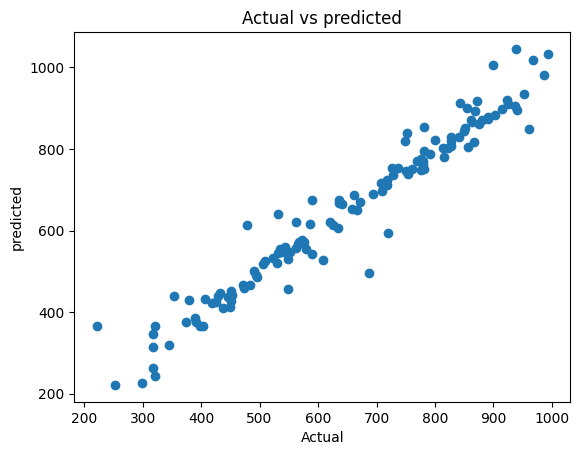

In [66]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test4, np.squeeze(model6.predict(X_test4)) )
print('r2_score:', r2_score)


from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test4, np.squeeze(model6.predict(X_test4)) )
mae= mean_absolute_error(Y_test4, np.squeeze(model6.predict(X_test4)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test4, np.squeeze(model6.predict(X_test4)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [67]:
prediction7 =np.squeeze(model6.predict([[80,2,2,129,prediction6]]))
print("Prediction: {}".format(prediction7))

y_prd=np.squeeze(np.squeeze(model6.predict(X_test4)) )
predic_dif=pd.DataFrame({'Actual':Y_test4,'predict':y_prd,"differences":Y_test4  -y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 203ms/step
Prediction: 355.53131103515625
4/4 [==============================] - 0s 9ms/step


,Actual,predict,differences
1387,986,981.415955,4.584045
563,531,545.497375,-14.497375
764,961,849.500000,111.500000
1315,940,895.696289,44.303711
1041,782,794.762329,-12.762329
1038,776,775.215698,0.784302
506,641,666.012207,-25.012207
27,299,226.207184,72.792816
54,322,364.845123,-42.845123
911,780,764.457764,15.542236


## dense and RNN

In [68]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model7=Sequential()
model7.add(Dense(128, input_dim=4, activation='relu'))
model7.add(Dense(64,activation='relu'))
model7.add(Dense(1,activation='linear'))
model7.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               640       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [69]:
model7.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 1s 9ms/step - loss: 277413.7188 - mae: 481.6771 - val_loss: 141694.2500 - val_mae: 321.8483
Epoch 2/2000
22/22 [==============================] - 0s 4ms/step - loss: 79640.5547 - mae: 234.7661 - val_loss: 46860.2500 - val_mae: 180.4507
Epoch 3/2000
22/22 [==============================] - 0s 4ms/step - loss: 47247.5547 - mae: 181.0465 - val_loss: 40408.3711 - val_mae: 167.1624
Epoch 4/2000
22/22 [==============================] - 0s 3ms/step - loss: 38511.5312 - mae: 165.4033 - val_loss: 33869.4531 - val_mae: 153.4875
Epoch 5/2000
22/22 [==============================] - 0s 4ms/step - loss: 31913.1699 - mae: 149.9141 - val_loss: 27868.6348 - val_mae: 139.1511
Epoch 6/2000
22/22 [==============================] - 0s 5ms/step - loss: 25737.9023 - mae: 135.7236 - val_loss: 22474.8398 - val_mae: 124.9278
Epoch 7/2000
22/22 [==============================] - 0s 4ms/step - loss: 20288.8438 - mae: 119.6402 - val_loss: 17368.8574 - val_mae:

Epoch 59/2000
22/22 [==============================] - 0s 3ms/step - loss: 7184.9526 - mae: 62.6416 - val_loss: 7639.1157 - val_mae: 64.9640
Epoch 60/2000
22/22 [==============================] - 0s 3ms/step - loss: 7104.0957 - mae: 61.6503 - val_loss: 7333.2944 - val_mae: 63.5979
Epoch 61/2000
22/22 [==============================] - 0s 3ms/step - loss: 6955.8804 - mae: 60.8681 - val_loss: 7212.0610 - val_mae: 63.1004
Epoch 62/2000
22/22 [==============================] - 0s 4ms/step - loss: 6866.3496 - mae: 60.4053 - val_loss: 7231.4746 - val_mae: 63.4275
Epoch 63/2000
22/22 [==============================] - 0s 4ms/step - loss: 6857.9106 - mae: 60.0800 - val_loss: 7278.4312 - val_mae: 64.0201
Epoch 64/2000
22/22 [==============================] - 0s 4ms/step - loss: 6876.0317 - mae: 60.7503 - val_loss: 7210.9463 - val_mae: 63.6028
Epoch 65/2000
22/22 [==============================] - 0s 4ms/step - loss: 7002.1426 - mae: 61.2769 - val_loss: 7186.6626 - val_mae: 63.3847
Epoch 66/2000

Epoch 117/2000
22/22 [==============================] - 0s 3ms/step - loss: 6597.4194 - mae: 60.3315 - val_loss: 6927.8032 - val_mae: 62.8145
Epoch 118/2000
22/22 [==============================] - 0s 3ms/step - loss: 6572.6035 - mae: 60.1748 - val_loss: 6939.7896 - val_mae: 62.9209
Epoch 119/2000
22/22 [==============================] - 0s 3ms/step - loss: 6543.5532 - mae: 60.3829 - val_loss: 6947.6982 - val_mae: 63.1939
Epoch 120/2000
22/22 [==============================] - 0s 3ms/step - loss: 6523.5850 - mae: 59.8271 - val_loss: 6952.3491 - val_mae: 63.1357
Epoch 121/2000
22/22 [==============================] - 0s 3ms/step - loss: 6547.0513 - mae: 60.3087 - val_loss: 7016.0342 - val_mae: 63.2508
Epoch 122/2000
22/22 [==============================] - 0s 3ms/step - loss: 6579.0708 - mae: 60.3995 - val_loss: 6933.3047 - val_mae: 63.1083
Epoch 123/2000
22/22 [==============================] - 0s 3ms/step - loss: 6539.2832 - mae: 60.2436 - val_loss: 6927.9897 - val_mae: 62.9300
Epoch 

Epoch 175/2000
22/22 [==============================] - 0s 3ms/step - loss: 6407.5391 - mae: 59.8300 - val_loss: 6796.0811 - val_mae: 62.1484
Epoch 176/2000
22/22 [==============================] - 0s 3ms/step - loss: 6446.4619 - mae: 59.9159 - val_loss: 7000.3135 - val_mae: 63.2125
Epoch 177/2000
22/22 [==============================] - 0s 3ms/step - loss: 6664.6382 - mae: 61.7203 - val_loss: 6793.2144 - val_mae: 62.4762
Epoch 178/2000
22/22 [==============================] - 0s 3ms/step - loss: 6467.0439 - mae: 60.3252 - val_loss: 7216.2534 - val_mae: 64.2187
Epoch 179/2000
22/22 [==============================] - 0s 3ms/step - loss: 6501.3179 - mae: 60.1175 - val_loss: 6771.8848 - val_mae: 62.2504
Epoch 180/2000
22/22 [==============================] - 0s 3ms/step - loss: 6652.4336 - mae: 60.8922 - val_loss: 6749.3955 - val_mae: 61.9636
Epoch 181/2000
22/22 [==============================] - 0s 3ms/step - loss: 6469.9756 - mae: 59.6451 - val_loss: 6849.7012 - val_mae: 62.2293
Epoch 

Epoch 233/2000
22/22 [==============================] - 0s 3ms/step - loss: 6168.6987 - mae: 58.3038 - val_loss: 6530.7817 - val_mae: 60.0238
Epoch 234/2000
22/22 [==============================] - 0s 3ms/step - loss: 6141.9878 - mae: 58.6005 - val_loss: 6810.1221 - val_mae: 61.6778
Epoch 235/2000
22/22 [==============================] - 0s 3ms/step - loss: 6220.4453 - mae: 58.9285 - val_loss: 6963.6133 - val_mae: 62.7749
Epoch 236/2000
22/22 [==============================] - 0s 3ms/step - loss: 6196.9414 - mae: 58.3138 - val_loss: 6585.2207 - val_mae: 59.8541
Epoch 237/2000
22/22 [==============================] - 0s 3ms/step - loss: 6209.4019 - mae: 58.3586 - val_loss: 6567.2988 - val_mae: 60.5837
Epoch 238/2000
22/22 [==============================] - 0s 3ms/step - loss: 6160.1641 - mae: 58.5606 - val_loss: 6508.0674 - val_mae: 59.6577
Epoch 239/2000
22/22 [==============================] - 0s 3ms/step - loss: 6241.8745 - mae: 59.3793 - val_loss: 6752.0786 - val_mae: 61.4060
Epoch 

Epoch 291/2000
22/22 [==============================] - 0s 4ms/step - loss: 5826.7876 - mae: 56.1373 - val_loss: 6729.0391 - val_mae: 59.0472
Epoch 292/2000
22/22 [==============================] - 0s 3ms/step - loss: 5924.2402 - mae: 56.6589 - val_loss: 6390.8672 - val_mae: 57.7505
Epoch 293/2000
22/22 [==============================] - 0s 3ms/step - loss: 5947.3711 - mae: 56.4918 - val_loss: 6529.6133 - val_mae: 59.4429
Epoch 294/2000
22/22 [==============================] - 0s 3ms/step - loss: 5865.3633 - mae: 56.0501 - val_loss: 6458.0527 - val_mae: 58.8100
Epoch 295/2000
22/22 [==============================] - 0s 4ms/step - loss: 5859.4502 - mae: 55.9702 - val_loss: 6319.7646 - val_mae: 57.7796
Epoch 296/2000
22/22 [==============================] - 0s 3ms/step - loss: 5832.5791 - mae: 55.7522 - val_loss: 6693.4575 - val_mae: 58.8892
Epoch 297/2000
22/22 [==============================] - 0s 3ms/step - loss: 5890.4946 - mae: 56.6634 - val_loss: 6342.0269 - val_mae: 57.6264
Epoch 

Epoch 349/2000
22/22 [==============================] - 0s 3ms/step - loss: 5593.7480 - mae: 54.1621 - val_loss: 6381.7363 - val_mae: 56.7120
Epoch 350/2000
22/22 [==============================] - 0s 3ms/step - loss: 5632.8491 - mae: 54.7951 - val_loss: 6269.0942 - val_mae: 56.2874
Epoch 351/2000
22/22 [==============================] - 0s 3ms/step - loss: 5574.6133 - mae: 54.0863 - val_loss: 6659.0376 - val_mae: 59.3740
Epoch 352/2000
22/22 [==============================] - 0s 3ms/step - loss: 5783.6621 - mae: 55.0591 - val_loss: 6796.5034 - val_mae: 58.3668
Epoch 353/2000
22/22 [==============================] - 0s 3ms/step - loss: 5769.8999 - mae: 55.4661 - val_loss: 6327.9995 - val_mae: 56.8823
Epoch 354/2000
22/22 [==============================] - 0s 3ms/step - loss: 5683.5923 - mae: 54.6325 - val_loss: 6239.5806 - val_mae: 56.8880
Epoch 355/2000
22/22 [==============================] - 0s 3ms/step - loss: 5751.6880 - mae: 55.7972 - val_loss: 6348.2632 - val_mae: 56.4694
Epoch 

Epoch 407/2000
22/22 [==============================] - 0s 3ms/step - loss: 5272.4277 - mae: 51.0200 - val_loss: 5828.3228 - val_mae: 53.8829
Epoch 408/2000
22/22 [==============================] - 0s 3ms/step - loss: 5380.6138 - mae: 52.7834 - val_loss: 6018.4048 - val_mae: 53.4202
Epoch 409/2000
22/22 [==============================] - 0s 3ms/step - loss: 5298.9277 - mae: 51.6121 - val_loss: 5954.5757 - val_mae: 53.2666
Epoch 410/2000
22/22 [==============================] - 0s 3ms/step - loss: 5406.0322 - mae: 52.2691 - val_loss: 5940.2397 - val_mae: 53.9708
Epoch 411/2000
22/22 [==============================] - 0s 3ms/step - loss: 5688.4771 - mae: 53.6432 - val_loss: 6440.6787 - val_mae: 56.0858
Epoch 412/2000
22/22 [==============================] - 0s 3ms/step - loss: 5315.9609 - mae: 51.7532 - val_loss: 5953.4321 - val_mae: 53.5525
Epoch 413/2000
22/22 [==============================] - 0s 4ms/step - loss: 5387.1846 - mae: 52.7605 - val_loss: 6276.9629 - val_mae: 54.9905
Epoch 

Epoch 465/2000
22/22 [==============================] - 0s 3ms/step - loss: 4735.2793 - mae: 46.8820 - val_loss: 5466.5879 - val_mae: 48.9885
Epoch 466/2000
22/22 [==============================] - 0s 3ms/step - loss: 4710.9746 - mae: 46.3320 - val_loss: 5318.4150 - val_mae: 47.8402
Epoch 467/2000
22/22 [==============================] - 0s 3ms/step - loss: 4750.8042 - mae: 46.4982 - val_loss: 5387.0884 - val_mae: 47.9769
Epoch 468/2000
22/22 [==============================] - 0s 3ms/step - loss: 4918.7925 - mae: 48.5657 - val_loss: 5921.1704 - val_mae: 53.0722
Epoch 469/2000
22/22 [==============================] - 0s 3ms/step - loss: 4728.0410 - mae: 46.9397 - val_loss: 5456.7725 - val_mae: 48.2440
Epoch 470/2000
22/22 [==============================] - 0s 3ms/step - loss: 4691.4668 - mae: 45.8062 - val_loss: 5328.9932 - val_mae: 47.9060
Epoch 471/2000
22/22 [==============================] - 0s 3ms/step - loss: 4715.0513 - mae: 46.6211 - val_loss: 5299.6626 - val_mae: 47.9498
Epoch 

Epoch 523/2000
22/22 [==============================] - 0s 3ms/step - loss: 4361.1567 - mae: 43.4392 - val_loss: 5542.8730 - val_mae: 49.0415
Epoch 524/2000
22/22 [==============================] - 0s 3ms/step - loss: 4653.4722 - mae: 45.4526 - val_loss: 5020.2275 - val_mae: 45.5369
Epoch 525/2000
22/22 [==============================] - 0s 3ms/step - loss: 4485.1147 - mae: 44.6651 - val_loss: 5018.1040 - val_mae: 45.1806
Epoch 526/2000
22/22 [==============================] - 0s 3ms/step - loss: 4515.2559 - mae: 44.9018 - val_loss: 5124.6709 - val_mae: 45.7918
Epoch 527/2000
22/22 [==============================] - 0s 3ms/step - loss: 4455.6709 - mae: 44.1717 - val_loss: 5382.3589 - val_mae: 48.4060
Epoch 528/2000
22/22 [==============================] - 0s 3ms/step - loss: 4383.4688 - mae: 43.9777 - val_loss: 5134.3745 - val_mae: 47.3237
Epoch 529/2000
22/22 [==============================] - 0s 3ms/step - loss: 4570.0137 - mae: 45.3047 - val_loss: 5361.5542 - val_mae: 48.7513
Epoch 

Epoch 581/2000
22/22 [==============================] - 0s 3ms/step - loss: 4213.7788 - mae: 41.1584 - val_loss: 4791.7593 - val_mae: 46.0726
Epoch 582/2000
22/22 [==============================] - 0s 3ms/step - loss: 4249.5957 - mae: 42.3678 - val_loss: 4852.6045 - val_mae: 43.4975
Epoch 583/2000
22/22 [==============================] - 0s 3ms/step - loss: 4506.5542 - mae: 44.0073 - val_loss: 6105.8647 - val_mae: 56.3707
Epoch 584/2000
22/22 [==============================] - 0s 3ms/step - loss: 4512.1294 - mae: 45.9539 - val_loss: 5051.0962 - val_mae: 45.1333
Epoch 585/2000
22/22 [==============================] - 0s 3ms/step - loss: 4387.7544 - mae: 43.8865 - val_loss: 5176.8252 - val_mae: 48.2457
Epoch 586/2000
22/22 [==============================] - 0s 3ms/step - loss: 4381.9399 - mae: 43.0419 - val_loss: 4818.6216 - val_mae: 43.6727
Epoch 587/2000
22/22 [==============================] - 0s 3ms/step - loss: 4190.1260 - mae: 41.9885 - val_loss: 4853.2524 - val_mae: 43.3338
Epoch 

Epoch 639/2000
22/22 [==============================] - 0s 3ms/step - loss: 4095.2690 - mae: 40.3647 - val_loss: 4784.6001 - val_mae: 41.9868
Epoch 640/2000
22/22 [==============================] - 0s 3ms/step - loss: 4168.3188 - mae: 42.1672 - val_loss: 4695.5522 - val_mae: 42.1080
Epoch 641/2000
22/22 [==============================] - 0s 3ms/step - loss: 4064.9426 - mae: 40.2656 - val_loss: 4754.5879 - val_mae: 42.6260
Epoch 642/2000
22/22 [==============================] - 0s 3ms/step - loss: 4075.8191 - mae: 41.0363 - val_loss: 4696.9355 - val_mae: 42.1018
Epoch 643/2000
22/22 [==============================] - 0s 3ms/step - loss: 4044.5007 - mae: 40.2856 - val_loss: 4673.0464 - val_mae: 42.5139
Epoch 644/2000
22/22 [==============================] - 0s 3ms/step - loss: 4056.4805 - mae: 40.4478 - val_loss: 4976.4463 - val_mae: 45.5095
Epoch 645/2000
22/22 [==============================] - 0s 3ms/step - loss: 4342.3369 - mae: 43.0617 - val_loss: 5204.8438 - val_mae: 47.8420
Epoch 

Epoch 697/2000
22/22 [==============================] - 0s 3ms/step - loss: 3952.6575 - mae: 40.7185 - val_loss: 4728.7954 - val_mae: 42.6897
Epoch 698/2000
22/22 [==============================] - 0s 3ms/step - loss: 4143.4897 - mae: 41.5877 - val_loss: 5193.4243 - val_mae: 49.6216
Epoch 699/2000
22/22 [==============================] - 0s 3ms/step - loss: 4173.2808 - mae: 42.2556 - val_loss: 4799.3105 - val_mae: 43.7108
Epoch 700/2000
22/22 [==============================] - 0s 3ms/step - loss: 4031.0576 - mae: 40.7991 - val_loss: 4720.4746 - val_mae: 43.8835
Epoch 701/2000
22/22 [==============================] - 0s 3ms/step - loss: 4176.0806 - mae: 41.7755 - val_loss: 4770.4810 - val_mae: 43.4079
Epoch 702/2000
22/22 [==============================] - 0s 3ms/step - loss: 4236.7275 - mae: 43.2968 - val_loss: 4881.4536 - val_mae: 41.7796
Epoch 703/2000
22/22 [==============================] - 0s 3ms/step - loss: 4071.9446 - mae: 40.2612 - val_loss: 4852.4912 - val_mae: 44.5810
Epoch 

Epoch 755/2000
22/22 [==============================] - 0s 3ms/step - loss: 3912.4604 - mae: 40.2925 - val_loss: 4650.7246 - val_mae: 42.6198
Epoch 756/2000
22/22 [==============================] - 0s 3ms/step - loss: 3978.1960 - mae: 40.4692 - val_loss: 4887.6509 - val_mae: 45.9412
Epoch 757/2000
22/22 [==============================] - 0s 3ms/step - loss: 4076.9751 - mae: 42.0585 - val_loss: 4941.7100 - val_mae: 45.2422
Epoch 758/2000
22/22 [==============================] - 0s 3ms/step - loss: 4157.8418 - mae: 41.8813 - val_loss: 5323.3130 - val_mae: 50.9274
Epoch 759/2000
22/22 [==============================] - 0s 3ms/step - loss: 3950.5369 - mae: 39.7030 - val_loss: 4671.4331 - val_mae: 43.0032
Epoch 760/2000
22/22 [==============================] - 0s 3ms/step - loss: 3905.4233 - mae: 39.2690 - val_loss: 4774.4868 - val_mae: 43.7876
Epoch 761/2000
22/22 [==============================] - 0s 3ms/step - loss: 4028.5605 - mae: 40.8847 - val_loss: 4557.2700 - val_mae: 42.8702
Epoch 

Epoch 813/2000
22/22 [==============================] - 0s 3ms/step - loss: 3811.5530 - mae: 38.0628 - val_loss: 4653.4482 - val_mae: 42.6620
Epoch 814/2000
22/22 [==============================] - 0s 3ms/step - loss: 3820.9773 - mae: 39.2383 - val_loss: 4942.0093 - val_mae: 45.5714
Epoch 815/2000
22/22 [==============================] - 0s 3ms/step - loss: 3854.8684 - mae: 38.9365 - val_loss: 4587.6230 - val_mae: 41.8909
Epoch 816/2000
22/22 [==============================] - 0s 3ms/step - loss: 3830.7070 - mae: 38.7957 - val_loss: 4509.7603 - val_mae: 40.5118
Epoch 817/2000
22/22 [==============================] - 0s 3ms/step - loss: 3761.7764 - mae: 38.5235 - val_loss: 4915.8540 - val_mae: 44.8762
Epoch 818/2000
22/22 [==============================] - 0s 3ms/step - loss: 4068.5984 - mae: 42.1136 - val_loss: 4586.4902 - val_mae: 40.4925
Epoch 819/2000
22/22 [==============================] - 0s 3ms/step - loss: 3823.3047 - mae: 38.4493 - val_loss: 4560.8628 - val_mae: 41.5454
Epoch 

Epoch 871/2000
22/22 [==============================] - 0s 3ms/step - loss: 3956.2751 - mae: 41.0258 - val_loss: 4569.6611 - val_mae: 41.6253
Epoch 872/2000
22/22 [==============================] - 0s 3ms/step - loss: 3932.5354 - mae: 40.2188 - val_loss: 4610.8599 - val_mae: 42.4455
Epoch 873/2000
22/22 [==============================] - 0s 3ms/step - loss: 4093.1128 - mae: 41.7156 - val_loss: 4796.6860 - val_mae: 44.1942
Epoch 874/2000
22/22 [==============================] - 0s 3ms/step - loss: 4276.6060 - mae: 44.1500 - val_loss: 5905.2930 - val_mae: 56.1122
Epoch 875/2000
22/22 [==============================] - 0s 3ms/step - loss: 4169.3496 - mae: 43.2453 - val_loss: 4648.7373 - val_mae: 44.3827
Epoch 876/2000
22/22 [==============================] - 0s 3ms/step - loss: 3820.1492 - mae: 39.0784 - val_loss: 4476.3496 - val_mae: 40.8324
Epoch 877/2000
22/22 [==============================] - 0s 3ms/step - loss: 3730.5134 - mae: 38.8954 - val_loss: 4678.1738 - val_mae: 41.2341
Epoch 

Epoch 929/2000
22/22 [==============================] - 0s 3ms/step - loss: 3693.3433 - mae: 38.4898 - val_loss: 4627.1309 - val_mae: 39.9932
Epoch 930/2000
22/22 [==============================] - 0s 3ms/step - loss: 3798.5222 - mae: 39.9359 - val_loss: 4382.1948 - val_mae: 40.5136
Epoch 931/2000
22/22 [==============================] - 0s 3ms/step - loss: 3745.1340 - mae: 38.6106 - val_loss: 4570.7300 - val_mae: 39.9170
Epoch 932/2000
22/22 [==============================] - 0s 3ms/step - loss: 3754.2415 - mae: 39.2511 - val_loss: 4490.0186 - val_mae: 41.9020
Epoch 933/2000
22/22 [==============================] - 0s 3ms/step - loss: 3849.2832 - mae: 38.9699 - val_loss: 4509.3320 - val_mae: 40.9030
Epoch 934/2000
22/22 [==============================] - 0s 3ms/step - loss: 3624.3052 - mae: 37.2963 - val_loss: 4453.0073 - val_mae: 39.5419
Epoch 935/2000
22/22 [==============================] - 0s 3ms/step - loss: 3682.5710 - mae: 38.3520 - val_loss: 4461.1021 - val_mae: 39.2708
Epoch 

Epoch 987/2000
22/22 [==============================] - 0s 3ms/step - loss: 3608.1704 - mae: 37.6781 - val_loss: 4412.1709 - val_mae: 40.5900
Epoch 988/2000
22/22 [==============================] - 0s 4ms/step - loss: 3723.1919 - mae: 38.6481 - val_loss: 4546.1592 - val_mae: 43.8187
Epoch 989/2000
22/22 [==============================] - 0s 3ms/step - loss: 3700.4915 - mae: 38.9837 - val_loss: 4615.8555 - val_mae: 40.2905
Epoch 990/2000
22/22 [==============================] - 0s 4ms/step - loss: 3698.9866 - mae: 38.9511 - val_loss: 4425.6050 - val_mae: 40.1193
Epoch 991/2000
22/22 [==============================] - 0s 3ms/step - loss: 3778.4309 - mae: 39.1604 - val_loss: 4490.8081 - val_mae: 40.1761
Epoch 992/2000
22/22 [==============================] - 0s 4ms/step - loss: 3638.2083 - mae: 36.8715 - val_loss: 4474.2046 - val_mae: 41.2882
Epoch 993/2000
22/22 [==============================] - 0s 4ms/step - loss: 3718.7910 - mae: 39.4513 - val_loss: 4404.9160 - val_mae: 39.7849
Epoch 

22/22 [==============================] - 0s 4ms/step - loss: 3617.7373 - mae: 37.6666 - val_loss: 4352.5371 - val_mae: 40.2905
Epoch 1045/2000
22/22 [==============================] - 0s 3ms/step - loss: 3589.0342 - mae: 37.7655 - val_loss: 4397.8145 - val_mae: 40.6577
Epoch 1046/2000
22/22 [==============================] - 0s 3ms/step - loss: 3697.3743 - mae: 38.6795 - val_loss: 4789.7515 - val_mae: 45.8336
Epoch 1047/2000
22/22 [==============================] - 0s 4ms/step - loss: 3856.2432 - mae: 39.4173 - val_loss: 4380.1558 - val_mae: 38.9262
Epoch 1048/2000
22/22 [==============================] - 0s 4ms/step - loss: 3994.4558 - mae: 41.7134 - val_loss: 4349.8472 - val_mae: 39.7109
Epoch 1049/2000
22/22 [==============================] - 0s 4ms/step - loss: 3558.0994 - mae: 37.5077 - val_loss: 4630.8657 - val_mae: 41.2942
Epoch 1050/2000
22/22 [==============================] - 0s 4ms/step - loss: 3682.8547 - mae: 39.1526 - val_loss: 4376.4951 - val_mae: 39.4204
Epoch 1051/2000

22/22 [==============================] - 0s 4ms/step - loss: 3629.7676 - mae: 38.7559 - val_loss: 4482.2422 - val_mae: 39.9260
Epoch 1102/2000
22/22 [==============================] - 0s 4ms/step - loss: 3475.1567 - mae: 36.0892 - val_loss: 4286.3936 - val_mae: 39.5731
Epoch 1103/2000
22/22 [==============================] - 0s 3ms/step - loss: 3742.5242 - mae: 40.4553 - val_loss: 4873.1885 - val_mae: 46.0358
Epoch 1104/2000
22/22 [==============================] - 0s 4ms/step - loss: 3816.3691 - mae: 39.7893 - val_loss: 4298.1055 - val_mae: 40.0143
Epoch 1105/2000
22/22 [==============================] - 0s 4ms/step - loss: 3670.2922 - mae: 38.5822 - val_loss: 4388.5259 - val_mae: 40.3411
Epoch 1106/2000
22/22 [==============================] - 0s 4ms/step - loss: 3549.8054 - mae: 37.3509 - val_loss: 4404.9873 - val_mae: 39.7372
Epoch 1107/2000
22/22 [==============================] - 0s 3ms/step - loss: 3647.2642 - mae: 37.1960 - val_loss: 4758.9922 - val_mae: 44.6726
Epoch 1108/2000

22/22 [==============================] - 0s 4ms/step - loss: 3598.7483 - mae: 36.9552 - val_loss: 4938.6270 - val_mae: 47.1240
Epoch 1159/2000
22/22 [==============================] - 0s 4ms/step - loss: 3564.0745 - mae: 37.0790 - val_loss: 4488.3867 - val_mae: 39.8985
Epoch 1160/2000
22/22 [==============================] - 0s 4ms/step - loss: 3564.0522 - mae: 38.1744 - val_loss: 4485.5986 - val_mae: 40.9863
Epoch 1161/2000
22/22 [==============================] - 0s 4ms/step - loss: 3500.8408 - mae: 37.9258 - val_loss: 4281.5317 - val_mae: 38.6091
Epoch 1162/2000
22/22 [==============================] - 0s 4ms/step - loss: 3531.0513 - mae: 36.7665 - val_loss: 4341.3887 - val_mae: 38.9344
Epoch 1163/2000
22/22 [==============================] - 0s 4ms/step - loss: 3403.5710 - mae: 35.6598 - val_loss: 4470.8794 - val_mae: 40.4481
Epoch 1164/2000
22/22 [==============================] - 0s 3ms/step - loss: 3504.3569 - mae: 36.3033 - val_loss: 4313.1206 - val_mae: 41.2245
Epoch 1165/2000

22/22 [==============================] - 0s 4ms/step - loss: 3588.8135 - mae: 38.7678 - val_loss: 4365.7261 - val_mae: 38.6667
Epoch 1216/2000
22/22 [==============================] - 0s 4ms/step - loss: 3562.4053 - mae: 38.0530 - val_loss: 4406.2769 - val_mae: 38.7468
Epoch 1217/2000
22/22 [==============================] - 0s 4ms/step - loss: 3446.2319 - mae: 37.7177 - val_loss: 4206.8984 - val_mae: 38.2611
Epoch 1218/2000
22/22 [==============================] - 0s 3ms/step - loss: 3669.7727 - mae: 39.7943 - val_loss: 4461.6982 - val_mae: 41.0675
Epoch 1219/2000
22/22 [==============================] - 0s 4ms/step - loss: 3662.5698 - mae: 39.3089 - val_loss: 4458.3687 - val_mae: 40.8351
Epoch 1220/2000
22/22 [==============================] - 0s 4ms/step - loss: 3596.1294 - mae: 37.9358 - val_loss: 4187.5908 - val_mae: 38.4834
Epoch 1221/2000
22/22 [==============================] - 0s 3ms/step - loss: 3566.8108 - mae: 37.9905 - val_loss: 4303.8213 - val_mae: 39.1710
Epoch 1222/2000

22/22 [==============================] - 0s 4ms/step - loss: 3290.7590 - mae: 36.0421 - val_loss: 4558.3042 - val_mae: 40.7663
Epoch 1273/2000
22/22 [==============================] - 0s 4ms/step - loss: 3693.1597 - mae: 39.3699 - val_loss: 4401.2754 - val_mae: 39.3240
Epoch 1274/2000
22/22 [==============================] - 0s 3ms/step - loss: 3694.7332 - mae: 40.3375 - val_loss: 4437.6655 - val_mae: 40.1008
Epoch 1275/2000
22/22 [==============================] - 0s 3ms/step - loss: 4165.8467 - mae: 45.1623 - val_loss: 4246.3105 - val_mae: 38.2177
Epoch 1276/2000
22/22 [==============================] - 0s 4ms/step - loss: 3527.4187 - mae: 38.5101 - val_loss: 4526.9927 - val_mae: 41.5522
Epoch 1277/2000
22/22 [==============================] - 0s 4ms/step - loss: 3370.4290 - mae: 35.5650 - val_loss: 4391.1699 - val_mae: 40.9257
Epoch 1278/2000
22/22 [==============================] - 0s 4ms/step - loss: 3427.9666 - mae: 37.3431 - val_loss: 4301.4219 - val_mae: 40.1424
Epoch 1279/2000

22/22 [==============================] - 0s 4ms/step - loss: 3251.5911 - mae: 34.8464 - val_loss: 4317.8203 - val_mae: 40.6046
Epoch 1330/2000
22/22 [==============================] - 0s 4ms/step - loss: 3429.2710 - mae: 36.6788 - val_loss: 4379.0264 - val_mae: 37.9391
Epoch 1331/2000
22/22 [==============================] - 0s 4ms/step - loss: 3378.8992 - mae: 36.4486 - val_loss: 4480.7515 - val_mae: 40.9108
Epoch 1332/2000
22/22 [==============================] - 0s 3ms/step - loss: 3445.8872 - mae: 36.8781 - val_loss: 4294.4004 - val_mae: 38.3780
Epoch 1333/2000
22/22 [==============================] - 0s 3ms/step - loss: 3323.2517 - mae: 34.9441 - val_loss: 4220.6016 - val_mae: 37.4091
Epoch 1334/2000
22/22 [==============================] - 0s 4ms/step - loss: 3325.8696 - mae: 35.2270 - val_loss: 4234.1724 - val_mae: 37.4597
Epoch 1335/2000
22/22 [==============================] - 0s 3ms/step - loss: 3357.7122 - mae: 35.7439 - val_loss: 4586.9287 - val_mae: 40.9140
Epoch 1336/2000

22/22 [==============================] - 0s 4ms/step - loss: 3626.3630 - mae: 39.9849 - val_loss: 4215.8784 - val_mae: 37.7199
Epoch 1387/2000
22/22 [==============================] - 0s 4ms/step - loss: 3364.2214 - mae: 37.1835 - val_loss: 4310.3652 - val_mae: 37.5015
Epoch 1388/2000
22/22 [==============================] - 0s 4ms/step - loss: 3377.7576 - mae: 36.8513 - val_loss: 4216.5015 - val_mae: 38.8565
Epoch 1389/2000
22/22 [==============================] - 0s 3ms/step - loss: 3457.9402 - mae: 37.0703 - val_loss: 4661.9746 - val_mae: 44.3077
Epoch 1390/2000
22/22 [==============================] - 0s 3ms/step - loss: 3492.0945 - mae: 38.3959 - val_loss: 4686.4121 - val_mae: 44.6088
Epoch 1391/2000
22/22 [==============================] - 0s 3ms/step - loss: 3471.4570 - mae: 37.6959 - val_loss: 4358.3496 - val_mae: 37.6950
Epoch 1392/2000
22/22 [==============================] - 0s 3ms/step - loss: 3325.4956 - mae: 36.1513 - val_loss: 4407.7402 - val_mae: 40.7667
Epoch 1393/2000

22/22 [==============================] - 0s 3ms/step - loss: 3289.0767 - mae: 35.4650 - val_loss: 4471.3691 - val_mae: 41.0412
Epoch 1444/2000
22/22 [==============================] - 0s 3ms/step - loss: 3362.7886 - mae: 36.7895 - val_loss: 4130.2100 - val_mae: 38.0462
Epoch 1445/2000
22/22 [==============================] - 0s 3ms/step - loss: 3447.9802 - mae: 36.8827 - val_loss: 5172.3481 - val_mae: 52.7577
Epoch 1446/2000
22/22 [==============================] - 0s 3ms/step - loss: 3796.8149 - mae: 42.2122 - val_loss: 4762.5967 - val_mae: 43.9555
Epoch 1447/2000
22/22 [==============================] - 0s 3ms/step - loss: 3506.8809 - mae: 39.1801 - val_loss: 4615.0864 - val_mae: 42.9446
Epoch 1448/2000
22/22 [==============================] - 0s 3ms/step - loss: 3711.4021 - mae: 40.5581 - val_loss: 4836.9619 - val_mae: 46.5253
Epoch 1449/2000
22/22 [==============================] - 0s 3ms/step - loss: 3413.0361 - mae: 38.1977 - val_loss: 4219.5913 - val_mae: 37.2112
Epoch 1450/2000

22/22 [==============================] - 0s 3ms/step - loss: 3242.3245 - mae: 35.5052 - val_loss: 4410.9619 - val_mae: 41.7312
Epoch 1501/2000
22/22 [==============================] - 0s 3ms/step - loss: 3321.9619 - mae: 36.5135 - val_loss: 4160.8555 - val_mae: 37.5624
Epoch 1502/2000
22/22 [==============================] - 0s 3ms/step - loss: 3177.7051 - mae: 34.6482 - val_loss: 4205.8560 - val_mae: 37.4494
Epoch 1503/2000
22/22 [==============================] - 0s 4ms/step - loss: 3277.8472 - mae: 35.6772 - val_loss: 4412.9507 - val_mae: 38.5870
Epoch 1504/2000
22/22 [==============================] - 0s 4ms/step - loss: 3377.3760 - mae: 36.6740 - val_loss: 4460.5352 - val_mae: 40.7694
Epoch 1505/2000
22/22 [==============================] - 0s 3ms/step - loss: 3405.7915 - mae: 36.9281 - val_loss: 4321.6475 - val_mae: 39.7979
Epoch 1506/2000
22/22 [==============================] - 0s 4ms/step - loss: 3294.4272 - mae: 36.3277 - val_loss: 4226.6860 - val_mae: 38.9142
Epoch 1507/2000

22/22 [==============================] - 0s 3ms/step - loss: 3325.8464 - mae: 35.8036 - val_loss: 4282.1870 - val_mae: 37.5756
Epoch 1558/2000
22/22 [==============================] - 0s 3ms/step - loss: 3343.4839 - mae: 36.7363 - val_loss: 4166.5337 - val_mae: 38.1663
Epoch 1559/2000
22/22 [==============================] - 0s 3ms/step - loss: 3203.5469 - mae: 34.9583 - val_loss: 4232.3965 - val_mae: 39.1567
Epoch 1560/2000
22/22 [==============================] - 0s 3ms/step - loss: 3141.2573 - mae: 34.6857 - val_loss: 4132.6782 - val_mae: 37.3994
Epoch 1561/2000
22/22 [==============================] - 0s 3ms/step - loss: 3204.7947 - mae: 34.6204 - val_loss: 4136.9897 - val_mae: 36.8929
Epoch 1562/2000
22/22 [==============================] - 0s 3ms/step - loss: 3239.8599 - mae: 35.2454 - val_loss: 4220.2500 - val_mae: 39.4967
Epoch 1563/2000
22/22 [==============================] - 0s 3ms/step - loss: 3179.0127 - mae: 34.4288 - val_loss: 4400.7090 - val_mae: 41.1319
Epoch 1564/2000

22/22 [==============================] - 0s 3ms/step - loss: 3259.4312 - mae: 35.4543 - val_loss: 4189.4106 - val_mae: 37.4942
Epoch 1615/2000
22/22 [==============================] - 0s 3ms/step - loss: 3104.4048 - mae: 34.0854 - val_loss: 4305.7310 - val_mae: 39.0557
Epoch 1616/2000
22/22 [==============================] - 0s 3ms/step - loss: 3304.1392 - mae: 36.2999 - val_loss: 4733.3481 - val_mae: 46.3409
Epoch 1617/2000
22/22 [==============================] - 0s 3ms/step - loss: 3473.3660 - mae: 38.8539 - val_loss: 4309.8286 - val_mae: 40.6783
Epoch 1618/2000
22/22 [==============================] - 0s 3ms/step - loss: 3167.7051 - mae: 34.5929 - val_loss: 4202.1797 - val_mae: 39.4240
Epoch 1619/2000
22/22 [==============================] - 0s 3ms/step - loss: 3068.4158 - mae: 33.5499 - val_loss: 4152.6733 - val_mae: 38.2508
Epoch 1620/2000
22/22 [==============================] - 0s 3ms/step - loss: 3157.8892 - mae: 35.1900 - val_loss: 4979.0635 - val_mae: 47.6740
Epoch 1621/2000

22/22 [==============================] - 0s 3ms/step - loss: 3102.7317 - mae: 34.1161 - val_loss: 4186.1543 - val_mae: 37.5663
Epoch 1672/2000
22/22 [==============================] - 0s 3ms/step - loss: 3242.5483 - mae: 36.1338 - val_loss: 4302.2461 - val_mae: 39.7203
Epoch 1673/2000
22/22 [==============================] - 0s 3ms/step - loss: 3486.9714 - mae: 38.7695 - val_loss: 4386.7979 - val_mae: 40.9464
Epoch 1674/2000
22/22 [==============================] - 0s 3ms/step - loss: 3366.0437 - mae: 37.6091 - val_loss: 4297.8188 - val_mae: 39.3978
Epoch 1675/2000
22/22 [==============================] - 0s 3ms/step - loss: 3043.5203 - mae: 33.6040 - val_loss: 4378.7871 - val_mae: 40.3547
Epoch 1676/2000
22/22 [==============================] - 0s 3ms/step - loss: 3121.3672 - mae: 34.3752 - val_loss: 4154.2925 - val_mae: 39.7371
Epoch 1677/2000
22/22 [==============================] - 0s 3ms/step - loss: 3080.9998 - mae: 33.4450 - val_loss: 4178.9277 - val_mae: 39.2340
Epoch 1678/2000

22/22 [==============================] - 0s 3ms/step - loss: 3221.3628 - mae: 35.8842 - val_loss: 4427.5830 - val_mae: 40.7217
Epoch 1729/2000
22/22 [==============================] - 0s 3ms/step - loss: 3201.9351 - mae: 34.8083 - val_loss: 4296.3584 - val_mae: 38.4543
Epoch 1730/2000
22/22 [==============================] - 0s 4ms/step - loss: 3170.6279 - mae: 35.0692 - val_loss: 4163.1680 - val_mae: 37.1997
Epoch 1731/2000
22/22 [==============================] - 0s 3ms/step - loss: 3164.3674 - mae: 35.5439 - val_loss: 4118.2788 - val_mae: 36.7668
Epoch 1732/2000
22/22 [==============================] - 0s 3ms/step - loss: 3596.6038 - mae: 39.9723 - val_loss: 4878.6294 - val_mae: 48.7923
Epoch 1733/2000
22/22 [==============================] - 0s 3ms/step - loss: 3755.3303 - mae: 42.9579 - val_loss: 4265.6821 - val_mae: 39.3540
Epoch 1734/2000
22/22 [==============================] - 0s 3ms/step - loss: 3101.4758 - mae: 34.8719 - val_loss: 4145.8584 - val_mae: 38.0708
Epoch 1735/2000

22/22 [==============================] - 0s 3ms/step - loss: 3061.7078 - mae: 33.6044 - val_loss: 4210.6143 - val_mae: 39.5354
Epoch 1786/2000
22/22 [==============================] - 0s 3ms/step - loss: 3273.8718 - mae: 36.3824 - val_loss: 4203.2090 - val_mae: 40.9071
Epoch 1787/2000
22/22 [==============================] - 0s 3ms/step - loss: 3232.5850 - mae: 36.6166 - val_loss: 4113.6826 - val_mae: 37.0957
Epoch 1788/2000
22/22 [==============================] - 0s 3ms/step - loss: 3033.9683 - mae: 34.4003 - val_loss: 4202.4834 - val_mae: 39.7686
Epoch 1789/2000
22/22 [==============================] - 0s 3ms/step - loss: 3064.6116 - mae: 34.0866 - val_loss: 4081.3774 - val_mae: 36.4782
Epoch 1790/2000
22/22 [==============================] - 0s 3ms/step - loss: 3067.4683 - mae: 33.9207 - val_loss: 4165.4775 - val_mae: 38.0299
Epoch 1791/2000
22/22 [==============================] - 0s 3ms/step - loss: 3041.5750 - mae: 34.8057 - val_loss: 4426.5405 - val_mae: 41.0169
Epoch 1792/2000

22/22 [==============================] - 0s 3ms/step - loss: 2984.4854 - mae: 33.4359 - val_loss: 4317.4468 - val_mae: 39.4635
Epoch 1843/2000
22/22 [==============================] - 0s 3ms/step - loss: 3042.1831 - mae: 34.6266 - val_loss: 4202.3389 - val_mae: 38.0890
Epoch 1844/2000
22/22 [==============================] - 0s 3ms/step - loss: 3183.1145 - mae: 35.4582 - val_loss: 4677.5449 - val_mae: 43.4779
Epoch 1845/2000
22/22 [==============================] - 0s 3ms/step - loss: 3021.7202 - mae: 34.1401 - val_loss: 4442.6416 - val_mae: 41.4583
Epoch 1846/2000
22/22 [==============================] - 0s 3ms/step - loss: 3222.0908 - mae: 35.4682 - val_loss: 4143.7129 - val_mae: 38.7581
Epoch 1847/2000
22/22 [==============================] - 0s 3ms/step - loss: 3137.0295 - mae: 34.8929 - val_loss: 4254.6685 - val_mae: 38.7778
Epoch 1848/2000
22/22 [==============================] - 0s 3ms/step - loss: 3164.7454 - mae: 35.5653 - val_loss: 4264.0103 - val_mae: 38.5049
Epoch 1849/2000

22/22 [==============================] - 0s 3ms/step - loss: 3056.1472 - mae: 33.4806 - val_loss: 4206.6763 - val_mae: 39.9607
Epoch 1900/2000
22/22 [==============================] - 0s 4ms/step - loss: 3102.4976 - mae: 34.7007 - val_loss: 4157.8940 - val_mae: 37.3768
Epoch 1901/2000
22/22 [==============================] - 0s 4ms/step - loss: 3332.5327 - mae: 37.4418 - val_loss: 4445.8481 - val_mae: 41.2245
Epoch 1902/2000
22/22 [==============================] - 0s 3ms/step - loss: 3198.6316 - mae: 35.5617 - val_loss: 4111.9658 - val_mae: 36.9311
Epoch 1903/2000
22/22 [==============================] - 0s 4ms/step - loss: 3134.6084 - mae: 37.6215 - val_loss: 4276.4033 - val_mae: 36.8783
Epoch 1904/2000
22/22 [==============================] - 0s 4ms/step - loss: 3100.1870 - mae: 34.8803 - val_loss: 4115.8291 - val_mae: 36.7920
Epoch 1905/2000
22/22 [==============================] - 0s 4ms/step - loss: 3153.0198 - mae: 36.1071 - val_loss: 5078.8105 - val_mae: 47.4309
Epoch 1906/2000

22/22 [==============================] - 0s 3ms/step - loss: 2949.1990 - mae: 33.4007 - val_loss: 4262.6060 - val_mae: 36.5168
Epoch 1957/2000
22/22 [==============================] - 0s 3ms/step - loss: 2984.6597 - mae: 33.1227 - val_loss: 4135.6138 - val_mae: 38.2640
Epoch 1958/2000
22/22 [==============================] - 0s 3ms/step - loss: 2987.2170 - mae: 33.6849 - val_loss: 4288.8647 - val_mae: 40.8570
Epoch 1959/2000
22/22 [==============================] - 0s 3ms/step - loss: 3043.9907 - mae: 34.4753 - val_loss: 4469.5459 - val_mae: 41.1578
Epoch 1960/2000
22/22 [==============================] - 0s 3ms/step - loss: 3084.9558 - mae: 34.6943 - val_loss: 4343.7734 - val_mae: 39.8519
Epoch 1961/2000
22/22 [==============================] - 0s 3ms/step - loss: 3165.5173 - mae: 35.3779 - val_loss: 4154.8779 - val_mae: 37.5780
Epoch 1962/2000
22/22 [==============================] - 0s 3ms/step - loss: 2968.5930 - mae: 33.3081 - val_loss: 4451.3188 - val_mae: 41.0340
Epoch 1963/2000

In [70]:
prediction8 = np.squeeze(model7.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction8))

1/1 [==============================] - 0s 64ms/step
Prediction: 430.1443786621094


In [71]:
y_prd=np.squeeze(np.squeeze(model7.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

14/14 [==============================] - 0s 2ms/step
      Actual     predict  differences
431      529  572.177795   -43.177795
610      624  652.969421   -28.969421
795      635  665.793030   -30.793030
1238     929  917.543945    11.456055
1228     890  889.525146     0.474854
...      ...         ...          ...
103      686  574.738281   111.261719
575      543  585.296204   -42.296204
60       694  610.270447    83.729553
988      829  853.286926   -24.286926
511      575  620.812256   -45.812256

[426 rows x 3 columns]


In [72]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-270.83795166015625
249.55169677734375
-335.2469482421875
267.71026611328125
-561.1773681640625
225.68963623046875
-297.99139404296875
201.01190185546875
lower bound: -214.63180013852568
upper bound: 171.81741628699527


In [73]:
A.drop(A[(A['differences'] >171)].index, inplace=True)
A.drop(A[(A['differences'] <-214)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HeatingCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X5=B.drop('Actual',axis=1)
Y5=B['Actual']
X_train5, X_test5, Y_train5, Y_test5 =train_test_split(X5,Y5, test_size=0.3, random_state = 0)

      AverageFloorArea  Year/Quarter  Property Type  \
1                   14             4              1   
2                   19             1              4   
4                   20             1              2   
5                   20             4              4   
8                   25             1              4   
...                ...           ...            ...   
1406               141             4              3   
1407               142             3              3   
1410               143             2              1   
1411               143             3              3   
1415               146             4              1   

      EnergyUseAveragePerDwelling  Actual      predict  
1                             468     187   318.272888  
2                             375     253   369.188507  
4                             366     131   249.123138  
5                             312     313   355.126984  
8                             268     345   337.105804

In [74]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model8=Sequential()
model8.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train5.shape[1],1)))
model8.add(Dropout(0.2))
model8.add(LSTM(units=64, activation='relu', return_sequences=True))
model8.add(Dropout(0.3))
model8.add(LSTM(units=32, activation='relu', return_sequences=True))
model8.add(Dropout(0.4))
model8.add(LSTM(units=64, activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(units=1))
model8.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 128)            66560     
                                                                 
 dropout_4 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_9 (LSTM)               (None, 5, 64)             49408     
                                                                 
 dropout_5 (Dropout)         (None, 5, 64)             0         
                                                                 
 lstm_10 (LSTM)              (None, 5, 32)             12416     
                                                                 
 dropout_6 (Dropout)         (None, 5, 32)             0         
                                                                 
 lstm_11 (LSTM)              (None, 64)              

In [78]:
model8.fit(X_train5,Y_train5 ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
7/7 [==============================] - 0s 24ms/step - loss: 9790.8906 - mae: 77.3521 - val_loss: 5880.9624 - val_mae: 55.5048
Epoch 2/2000
7/7 [==============================] - 0s 19ms/step - loss: 9675.8203 - mae: 79.0567 - val_loss: 6160.8218 - val_mae: 60.3303
Epoch 3/2000
7/7 [==============================] - 0s 21ms/step - loss: 9826.0352 - mae: 78.5921 - val_loss: 6974.5391 - val_mae: 68.0200
Epoch 4/2000
7/7 [==============================] - 0s 22ms/step - loss: 9919.3408 - mae: 77.9795 - val_loss: 5494.6519 - val_mae: 52.4626
Epoch 5/2000
7/7 [==============================] - 0s 22ms/step - loss: 12328.7881 - mae: 84.4702 - val_loss: 5370.8276 - val_mae: 47.1907
Epoch 6/2000
7/7 [==============================] - 0s 24ms/step - loss: 8881.0898 - mae: 74.6547 - val_loss: 7872.3457 - val_mae: 69.9776
Epoch 7/2000
7/7 [==============================] - 0s 22ms/step - loss: 11555.7168 - mae: 83.6089 - val_loss: 5742.0498 - val_mae: 48.9187
Epoch 8/2000
7/7 [=======

7/7 [==============================] - 0s 20ms/step - loss: 11218.6201 - mae: 87.0277 - val_loss: 5684.5776 - val_mae: 44.5571
Epoch 60/2000
7/7 [==============================] - 0s 20ms/step - loss: 12665.5195 - mae: 87.1804 - val_loss: 11744.1992 - val_mae: 95.9723
Epoch 61/2000
7/7 [==============================] - 0s 19ms/step - loss: 12036.8262 - mae: 87.2483 - val_loss: 5816.3022 - val_mae: 43.7240
Epoch 62/2000
7/7 [==============================] - 0s 18ms/step - loss: 13504.5205 - mae: 91.6118 - val_loss: 7858.4673 - val_mae: 71.2802
Epoch 63/2000
7/7 [==============================] - 0s 19ms/step - loss: 9213.9961 - mae: 74.1258 - val_loss: 6386.8765 - val_mae: 47.9885
Epoch 64/2000
7/7 [==============================] - 0s 19ms/step - loss: 11244.6738 - mae: 80.7337 - val_loss: 8466.8623 - val_mae: 76.0068
Epoch 65/2000
7/7 [==============================] - 0s 22ms/step - loss: 10358.0479 - mae: 81.6051 - val_loss: 5935.5400 - val_mae: 54.8084
Epoch 66/2000
7/7 [========

7/7 [==============================] - 0s 20ms/step - loss: 11230.3555 - mae: 81.7168 - val_loss: 5792.7935 - val_mae: 47.7780
Epoch 118/2000
7/7 [==============================] - 0s 20ms/step - loss: 12189.4814 - mae: 85.8543 - val_loss: 8361.0342 - val_mae: 74.6838
Epoch 119/2000
7/7 [==============================] - 0s 20ms/step - loss: 10686.8496 - mae: 80.4702 - val_loss: 5376.0059 - val_mae: 44.3103
Epoch 120/2000
7/7 [==============================] - 0s 19ms/step - loss: 10563.0957 - mae: 80.0696 - val_loss: 8968.2158 - val_mae: 79.3249
Epoch 121/2000
7/7 [==============================] - 0s 20ms/step - loss: 9973.1221 - mae: 75.7664 - val_loss: 5538.0220 - val_mae: 47.5168
Epoch 122/2000
7/7 [==============================] - 0s 19ms/step - loss: 11209.9414 - mae: 82.8292 - val_loss: 8500.5898 - val_mae: 76.5169
Epoch 123/2000
7/7 [==============================] - 0s 21ms/step - loss: 8731.4414 - mae: 74.1340 - val_loss: 5783.7607 - val_mae: 48.7615
Epoch 124/2000
7/7 [===

Epoch 175/2000
7/7 [==============================] - 0s 18ms/step - loss: 10614.1211 - mae: 82.4132 - val_loss: 6640.3140 - val_mae: 58.0369
Epoch 176/2000
7/7 [==============================] - 0s 17ms/step - loss: 9172.0361 - mae: 75.0174 - val_loss: 7199.7188 - val_mae: 63.7594
Epoch 177/2000
7/7 [==============================] - 0s 17ms/step - loss: 13066.4326 - mae: 85.8144 - val_loss: 6169.3359 - val_mae: 51.8563
Epoch 178/2000
7/7 [==============================] - 0s 17ms/step - loss: 8487.6299 - mae: 73.0705 - val_loss: 6759.0688 - val_mae: 55.6614
Epoch 179/2000
7/7 [==============================] - 0s 18ms/step - loss: 11091.5000 - mae: 81.7152 - val_loss: 7366.5610 - val_mae: 65.6745
Epoch 180/2000
7/7 [==============================] - 0s 18ms/step - loss: 11079.0918 - mae: 81.9548 - val_loss: 6453.6392 - val_mae: 57.4516
Epoch 181/2000
7/7 [==============================] - 0s 17ms/step - loss: 10304.2227 - mae: 80.8880 - val_loss: 6082.3862 - val_mae: 52.3053
Epoch 18

Epoch 233/2000
7/7 [==============================] - 0s 17ms/step - loss: 10344.7031 - mae: 79.3031 - val_loss: 7510.6816 - val_mae: 69.1143
Epoch 234/2000
7/7 [==============================] - 0s 17ms/step - loss: 8713.6045 - mae: 76.3374 - val_loss: 6363.3833 - val_mae: 57.7055
Epoch 235/2000
7/7 [==============================] - 0s 17ms/step - loss: 9690.0137 - mae: 77.1945 - val_loss: 5530.5469 - val_mae: 42.8181
Epoch 236/2000
7/7 [==============================] - 0s 17ms/step - loss: 10515.4131 - mae: 79.3334 - val_loss: 6250.0361 - val_mae: 53.5714
Epoch 237/2000
7/7 [==============================] - 0s 17ms/step - loss: 10742.9893 - mae: 79.5307 - val_loss: 7834.7046 - val_mae: 71.8217
Epoch 238/2000
7/7 [==============================] - 0s 21ms/step - loss: 9022.9414 - mae: 74.2214 - val_loss: 5961.9839 - val_mae: 51.9478
Epoch 239/2000
7/7 [==============================] - 0s 18ms/step - loss: 7475.8486 - mae: 67.4303 - val_loss: 6165.1143 - val_mae: 50.1884
Epoch 240/

Epoch 291/2000
7/7 [==============================] - 0s 17ms/step - loss: 9108.6357 - mae: 74.9088 - val_loss: 5226.1733 - val_mae: 44.5991
Epoch 292/2000
7/7 [==============================] - 0s 17ms/step - loss: 12476.0752 - mae: 87.1682 - val_loss: 7459.8667 - val_mae: 66.9916
Epoch 293/2000
7/7 [==============================] - 0s 17ms/step - loss: 10089.9727 - mae: 78.0755 - val_loss: 6212.7363 - val_mae: 49.3588
Epoch 294/2000
7/7 [==============================] - 0s 17ms/step - loss: 9669.9814 - mae: 77.5604 - val_loss: 9230.9189 - val_mae: 78.6597
Epoch 295/2000
7/7 [==============================] - 0s 18ms/step - loss: 9827.7197 - mae: 77.2203 - val_loss: 6193.4966 - val_mae: 46.3003
Epoch 296/2000
7/7 [==============================] - 0s 17ms/step - loss: 11622.1055 - mae: 87.1812 - val_loss: 7930.4800 - val_mae: 67.0386
Epoch 297/2000
7/7 [==============================] - 0s 17ms/step - loss: 11924.1006 - mae: 82.4289 - val_loss: 5730.4922 - val_mae: 50.7711
Epoch 298

Epoch 349/2000
7/7 [==============================] - 0s 19ms/step - loss: 11605.0918 - mae: 85.2592 - val_loss: 6979.6699 - val_mae: 66.2815
Epoch 350/2000
7/7 [==============================] - 0s 17ms/step - loss: 9349.4189 - mae: 75.1660 - val_loss: 5464.3374 - val_mae: 52.2183
Epoch 351/2000
7/7 [==============================] - 0s 18ms/step - loss: 9243.8037 - mae: 74.4629 - val_loss: 6519.9028 - val_mae: 62.6815
Epoch 352/2000
7/7 [==============================] - 0s 17ms/step - loss: 9943.1992 - mae: 79.3228 - val_loss: 5374.0410 - val_mae: 49.2028
Epoch 353/2000
7/7 [==============================] - 0s 18ms/step - loss: 9405.4463 - mae: 73.6589 - val_loss: 5285.5269 - val_mae: 46.5991
Epoch 354/2000
7/7 [==============================] - 0s 17ms/step - loss: 10582.0664 - mae: 78.8513 - val_loss: 6855.5142 - val_mae: 65.7543
Epoch 355/2000
7/7 [==============================] - 0s 17ms/step - loss: 9770.0098 - mae: 76.8327 - val_loss: 6353.1504 - val_mae: 58.7531
Epoch 356/2

Epoch 407/2000
7/7 [==============================] - 0s 18ms/step - loss: 12130.3428 - mae: 85.7198 - val_loss: 5793.5884 - val_mae: 47.5984
Epoch 408/2000
7/7 [==============================] - 0s 17ms/step - loss: 11201.4326 - mae: 79.8762 - val_loss: 10717.9785 - val_mae: 88.1190
Epoch 409/2000
7/7 [==============================] - 0s 17ms/step - loss: 10848.2275 - mae: 77.9530 - val_loss: 6340.2573 - val_mae: 52.4492
Epoch 410/2000
7/7 [==============================] - 0s 18ms/step - loss: 11955.6689 - mae: 88.1418 - val_loss: 6173.6519 - val_mae: 54.5432
Epoch 411/2000
7/7 [==============================] - 0s 17ms/step - loss: 9573.1670 - mae: 74.4533 - val_loss: 7825.8145 - val_mae: 69.1384
Epoch 412/2000
7/7 [==============================] - 0s 17ms/step - loss: 10777.1074 - mae: 80.4615 - val_loss: 6079.5298 - val_mae: 50.9892
Epoch 413/2000
7/7 [==============================] - 0s 17ms/step - loss: 9699.8359 - mae: 73.1530 - val_loss: 7098.5205 - val_mae: 62.2853
Epoch 4

Epoch 465/2000
7/7 [==============================] - 0s 23ms/step - loss: 10663.1025 - mae: 82.4021 - val_loss: 7322.8184 - val_mae: 65.9446
Epoch 466/2000
7/7 [==============================] - 0s 24ms/step - loss: 10656.1670 - mae: 82.9768 - val_loss: 7515.3438 - val_mae: 67.1354
Epoch 467/2000
7/7 [==============================] - 0s 24ms/step - loss: 8787.2002 - mae: 74.1802 - val_loss: 6023.7905 - val_mae: 50.9605
Epoch 468/2000
7/7 [==============================] - 0s 23ms/step - loss: 9904.0186 - mae: 79.8182 - val_loss: 6792.8750 - val_mae: 62.2286
Epoch 469/2000
7/7 [==============================] - 0s 24ms/step - loss: 10152.9854 - mae: 77.6671 - val_loss: 5681.7065 - val_mae: 50.7746
Epoch 470/2000
7/7 [==============================] - 0s 24ms/step - loss: 9808.6553 - mae: 74.7113 - val_loss: 7067.5825 - val_mae: 67.1547
Epoch 471/2000
7/7 [==============================] - 0s 22ms/step - loss: 11143.4824 - mae: 81.0275 - val_loss: 4819.0708 - val_mae: 40.5069
Epoch 472

Epoch 523/2000
7/7 [==============================] - 0s 21ms/step - loss: 11328.3408 - mae: 83.2408 - val_loss: 5845.4468 - val_mae: 56.6746
Epoch 524/2000
7/7 [==============================] - 0s 21ms/step - loss: 10690.6836 - mae: 82.2052 - val_loss: 6543.7534 - val_mae: 59.4653
Epoch 525/2000
7/7 [==============================] - 0s 22ms/step - loss: 9452.6465 - mae: 76.1708 - val_loss: 6321.5156 - val_mae: 50.7645
Epoch 526/2000
7/7 [==============================] - 0s 20ms/step - loss: 10842.6865 - mae: 82.3522 - val_loss: 6371.8252 - val_mae: 47.5782
Epoch 527/2000
7/7 [==============================] - 0s 20ms/step - loss: 10633.1719 - mae: 79.0264 - val_loss: 7906.9629 - val_mae: 70.9014
Epoch 528/2000
7/7 [==============================] - 0s 21ms/step - loss: 8956.7441 - mae: 74.5092 - val_loss: 6147.1562 - val_mae: 54.3600
Epoch 529/2000
7/7 [==============================] - 0s 19ms/step - loss: 11064.2168 - mae: 81.3990 - val_loss: 6423.7485 - val_mae: 59.2581
Epoch 53

Epoch 581/2000
7/7 [==============================] - 0s 21ms/step - loss: 12889.6768 - mae: 90.1903 - val_loss: 7027.7642 - val_mae: 63.9870
Epoch 582/2000
7/7 [==============================] - 0s 22ms/step - loss: 10207.7363 - mae: 79.6017 - val_loss: 5089.2271 - val_mae: 39.5016
Epoch 583/2000
7/7 [==============================] - 0s 21ms/step - loss: 10738.9424 - mae: 81.8722 - val_loss: 8327.1133 - val_mae: 76.0910
Epoch 584/2000
7/7 [==============================] - 0s 21ms/step - loss: 10496.4902 - mae: 78.7243 - val_loss: 5768.8516 - val_mae: 47.7789
Epoch 585/2000
7/7 [==============================] - 0s 21ms/step - loss: 9694.8330 - mae: 78.0725 - val_loss: 6643.6470 - val_mae: 64.6983
Epoch 586/2000
7/7 [==============================] - 0s 22ms/step - loss: 11079.2920 - mae: 81.4683 - val_loss: 4969.8525 - val_mae: 43.3436
Epoch 587/2000
7/7 [==============================] - 0s 21ms/step - loss: 14137.7588 - mae: 90.7056 - val_loss: 5894.6411 - val_mae: 57.0677
Epoch 5

Epoch 639/2000
7/7 [==============================] - 0s 20ms/step - loss: 9205.7402 - mae: 75.2507 - val_loss: 6132.7612 - val_mae: 54.4473
Epoch 640/2000
7/7 [==============================] - 0s 21ms/step - loss: 9119.2393 - mae: 74.0864 - val_loss: 5596.7114 - val_mae: 45.6185
Epoch 641/2000
7/7 [==============================] - 0s 21ms/step - loss: 9822.6387 - mae: 76.2927 - val_loss: 9270.6133 - val_mae: 79.4616
Epoch 642/2000
7/7 [==============================] - 0s 21ms/step - loss: 10836.7441 - mae: 78.3050 - val_loss: 5403.9487 - val_mae: 47.7818
Epoch 643/2000
7/7 [==============================] - 0s 21ms/step - loss: 11297.6553 - mae: 84.3694 - val_loss: 5721.9614 - val_mae: 53.1531
Epoch 644/2000
7/7 [==============================] - 0s 20ms/step - loss: 11957.4941 - mae: 86.3011 - val_loss: 6204.3345 - val_mae: 59.2141
Epoch 645/2000
7/7 [==============================] - 0s 21ms/step - loss: 8795.8926 - mae: 72.7855 - val_loss: 6161.3535 - val_mae: 56.2851
Epoch 646/

Epoch 697/2000
7/7 [==============================] - 0s 28ms/step - loss: 9553.7637 - mae: 75.0579 - val_loss: 6077.0762 - val_mae: 53.1312
Epoch 698/2000
7/7 [==============================] - 0s 22ms/step - loss: 11186.2822 - mae: 81.2038 - val_loss: 5419.4219 - val_mae: 48.4009
Epoch 699/2000
7/7 [==============================] - 0s 21ms/step - loss: 9828.9775 - mae: 78.8074 - val_loss: 6313.1094 - val_mae: 61.0499
Epoch 700/2000
7/7 [==============================] - 0s 21ms/step - loss: 9175.2900 - mae: 72.8602 - val_loss: 6021.5752 - val_mae: 56.7786
Epoch 701/2000
7/7 [==============================] - 0s 22ms/step - loss: 13101.2324 - mae: 89.8407 - val_loss: 7525.0327 - val_mae: 65.6432
Epoch 702/2000
7/7 [==============================] - 0s 20ms/step - loss: 11713.9922 - mae: 84.6451 - val_loss: 7032.7842 - val_mae: 56.8751
Epoch 703/2000
7/7 [==============================] - 0s 21ms/step - loss: 10347.7734 - mae: 79.3288 - val_loss: 9377.9980 - val_mae: 75.2947
Epoch 704

Epoch 755/2000
7/7 [==============================] - 0s 20ms/step - loss: 10412.6533 - mae: 76.1557 - val_loss: 9753.4121 - val_mae: 82.2454
Epoch 756/2000
7/7 [==============================] - 0s 19ms/step - loss: 11715.3115 - mae: 84.6331 - val_loss: 4892.1167 - val_mae: 44.7096
Epoch 757/2000
7/7 [==============================] - 0s 21ms/step - loss: 11815.0332 - mae: 85.2434 - val_loss: 7065.0547 - val_mae: 66.7780
Epoch 758/2000
7/7 [==============================] - 0s 19ms/step - loss: 10820.1631 - mae: 77.5765 - val_loss: 6055.4341 - val_mae: 55.0098
Epoch 759/2000
7/7 [==============================] - 0s 20ms/step - loss: 10906.4766 - mae: 80.8281 - val_loss: 8122.3169 - val_mae: 75.5529
Epoch 760/2000
7/7 [==============================] - 0s 20ms/step - loss: 10036.2959 - mae: 77.7513 - val_loss: 6632.3423 - val_mae: 58.6162
Epoch 761/2000
7/7 [==============================] - 0s 20ms/step - loss: 10096.8984 - mae: 77.8858 - val_loss: 8112.9434 - val_mae: 69.7919
Epoch 

Epoch 813/2000
7/7 [==============================] - 0s 20ms/step - loss: 13255.8701 - mae: 88.8721 - val_loss: 5880.0566 - val_mae: 53.5356
Epoch 814/2000
7/7 [==============================] - 0s 21ms/step - loss: 9568.4951 - mae: 77.3335 - val_loss: 6337.5527 - val_mae: 59.7378
Epoch 815/2000
7/7 [==============================] - 0s 19ms/step - loss: 8607.8154 - mae: 72.3236 - val_loss: 6006.7578 - val_mae: 48.7996
Epoch 816/2000
7/7 [==============================] - 0s 19ms/step - loss: 10250.6162 - mae: 81.0026 - val_loss: 7101.0527 - val_mae: 66.6802
Epoch 817/2000
7/7 [==============================] - 0s 21ms/step - loss: 10442.1074 - mae: 77.1952 - val_loss: 5864.9092 - val_mae: 52.5119
Epoch 818/2000
7/7 [==============================] - 0s 20ms/step - loss: 10966.8701 - mae: 80.6491 - val_loss: 7517.1392 - val_mae: 69.8106
Epoch 819/2000
7/7 [==============================] - 0s 19ms/step - loss: 11259.5371 - mae: 84.9612 - val_loss: 6251.5254 - val_mae: 54.1157
Epoch 82

Epoch 871/2000
7/7 [==============================] - 0s 21ms/step - loss: 11291.0957 - mae: 81.6671 - val_loss: 6915.9390 - val_mae: 58.6273
Epoch 872/2000
7/7 [==============================] - 0s 21ms/step - loss: 11089.5029 - mae: 81.9444 - val_loss: 7787.2842 - val_mae: 66.9824
Epoch 873/2000
7/7 [==============================] - 0s 22ms/step - loss: 7831.5913 - mae: 69.7647 - val_loss: 7274.9692 - val_mae: 51.9367
Epoch 874/2000
7/7 [==============================] - 0s 21ms/step - loss: 11368.5098 - mae: 81.8718 - val_loss: 8333.1396 - val_mae: 67.1510
Epoch 875/2000
7/7 [==============================] - 0s 22ms/step - loss: 12209.6484 - mae: 85.0622 - val_loss: 7620.9502 - val_mae: 54.5033
Epoch 876/2000
7/7 [==============================] - 0s 21ms/step - loss: 10317.4004 - mae: 77.4898 - val_loss: 7972.0171 - val_mae: 68.9765
Epoch 877/2000
7/7 [==============================] - 0s 21ms/step - loss: 12515.5830 - mae: 87.2827 - val_loss: 5461.0635 - val_mae: 45.7569
Epoch 8

Epoch 929/2000
7/7 [==============================] - 0s 17ms/step - loss: 11817.7754 - mae: 82.9403 - val_loss: 8383.8623 - val_mae: 74.7532
Epoch 930/2000
7/7 [==============================] - 0s 18ms/step - loss: 13255.4727 - mae: 92.2524 - val_loss: 6562.1504 - val_mae: 59.6207
Epoch 931/2000
7/7 [==============================] - 0s 17ms/step - loss: 9179.3770 - mae: 74.6194 - val_loss: 5946.1343 - val_mae: 50.2032
Epoch 932/2000
7/7 [==============================] - 0s 17ms/step - loss: 9878.3809 - mae: 76.8901 - val_loss: 6280.3813 - val_mae: 56.0685
Epoch 933/2000
7/7 [==============================] - 0s 18ms/step - loss: 9824.9648 - mae: 77.5034 - val_loss: 6717.5396 - val_mae: 54.6814
Epoch 934/2000
7/7 [==============================] - 0s 19ms/step - loss: 10404.9570 - mae: 80.2839 - val_loss: 6585.2344 - val_mae: 51.2563
Epoch 935/2000
7/7 [==============================] - 0s 17ms/step - loss: 9729.3770 - mae: 76.9728 - val_loss: 7409.9746 - val_mae: 63.6867
Epoch 936/

Epoch 987/2000
7/7 [==============================] - 0s 18ms/step - loss: 11866.3828 - mae: 84.0783 - val_loss: 6305.4736 - val_mae: 50.6615
Epoch 988/2000
7/7 [==============================] - 0s 18ms/step - loss: 11308.1699 - mae: 81.6245 - val_loss: 8981.9756 - val_mae: 78.8233
Epoch 989/2000
7/7 [==============================] - 0s 17ms/step - loss: 9993.7627 - mae: 78.4111 - val_loss: 5448.9824 - val_mae: 45.4925
Epoch 990/2000
7/7 [==============================] - 0s 18ms/step - loss: 9359.8984 - mae: 75.2003 - val_loss: 7600.6841 - val_mae: 65.7666
Epoch 991/2000
7/7 [==============================] - 0s 18ms/step - loss: 10012.2246 - mae: 73.4568 - val_loss: 5401.5747 - val_mae: 43.6919
Epoch 992/2000
7/7 [==============================] - 0s 17ms/step - loss: 10570.7754 - mae: 79.7796 - val_loss: 9522.1162 - val_mae: 83.6570
Epoch 993/2000
7/7 [==============================] - 0s 17ms/step - loss: 12578.8750 - mae: 86.1087 - val_loss: 5267.4609 - val_mae: 43.6349
Epoch 99

7/7 [==============================] - 0s 18ms/step - loss: 9202.9307 - mae: 76.3088 - val_loss: 6827.4922 - val_mae: 62.3776
Epoch 1045/2000
7/7 [==============================] - 0s 18ms/step - loss: 10355.9766 - mae: 79.5715 - val_loss: 6110.4858 - val_mae: 54.6649
Epoch 1046/2000
7/7 [==============================] - 0s 17ms/step - loss: 9863.6104 - mae: 80.1428 - val_loss: 5738.9688 - val_mae: 48.4748
Epoch 1047/2000
7/7 [==============================] - 0s 17ms/step - loss: 10921.5088 - mae: 83.1896 - val_loss: 7203.9746 - val_mae: 63.8932
Epoch 1048/2000
7/7 [==============================] - 0s 18ms/step - loss: 9614.0645 - mae: 75.5167 - val_loss: 6885.6479 - val_mae: 57.8222
Epoch 1049/2000
7/7 [==============================] - 0s 18ms/step - loss: 8756.7256 - mae: 73.9573 - val_loss: 8878.6084 - val_mae: 75.7378
Epoch 1050/2000
7/7 [==============================] - 0s 17ms/step - loss: 11889.6006 - mae: 86.7625 - val_loss: 6287.2466 - val_mae: 50.2184
Epoch 1051/2000
7/7

7/7 [==============================] - 0s 18ms/step - loss: 9974.7021 - mae: 80.3154 - val_loss: 5834.4424 - val_mae: 56.6598
Epoch 1102/2000
7/7 [==============================] - 0s 19ms/step - loss: 12514.7920 - mae: 84.3102 - val_loss: 4796.0664 - val_mae: 47.5599
Epoch 1103/2000
7/7 [==============================] - 0s 18ms/step - loss: 10078.6621 - mae: 80.4723 - val_loss: 4634.6411 - val_mae: 44.2014
Epoch 1104/2000
7/7 [==============================] - 0s 18ms/step - loss: 12188.7100 - mae: 86.3202 - val_loss: 8237.0176 - val_mae: 75.7674
Epoch 1105/2000
7/7 [==============================] - 0s 17ms/step - loss: 11492.5703 - mae: 82.4482 - val_loss: 6274.7920 - val_mae: 54.4739
Epoch 1106/2000
7/7 [==============================] - 0s 17ms/step - loss: 9788.1201 - mae: 75.2965 - val_loss: 6352.1157 - val_mae: 58.8176
Epoch 1107/2000
7/7 [==============================] - 0s 18ms/step - loss: 10602.6289 - mae: 81.3662 - val_loss: 5752.5044 - val_mae: 51.2388
Epoch 1108/2000
7

7/7 [==============================] - 0s 18ms/step - loss: 9475.8164 - mae: 74.9337 - val_loss: 5912.8354 - val_mae: 48.4845
Epoch 1159/2000
7/7 [==============================] - 0s 18ms/step - loss: 9342.9561 - mae: 76.7669 - val_loss: 9719.6338 - val_mae: 83.4674
Epoch 1160/2000
7/7 [==============================] - 0s 18ms/step - loss: 11790.8945 - mae: 84.2360 - val_loss: 5843.7651 - val_mae: 48.5188
Epoch 1161/2000
7/7 [==============================] - 0s 19ms/step - loss: 11174.7754 - mae: 84.6538 - val_loss: 8015.9453 - val_mae: 71.5855
Epoch 1162/2000
7/7 [==============================] - 0s 17ms/step - loss: 10728.1865 - mae: 83.7953 - val_loss: 6248.1812 - val_mae: 56.0925
Epoch 1163/2000
7/7 [==============================] - 0s 17ms/step - loss: 10688.7061 - mae: 78.2973 - val_loss: 7351.6738 - val_mae: 66.8900
Epoch 1164/2000
7/7 [==============================] - 0s 17ms/step - loss: 9162.5957 - mae: 74.6618 - val_loss: 6248.8066 - val_mae: 54.7359
Epoch 1165/2000
7/

7/7 [==============================] - 0s 18ms/step - loss: 11097.2178 - mae: 81.7179 - val_loss: 9265.0879 - val_mae: 80.9187
Epoch 1216/2000
7/7 [==============================] - 0s 18ms/step - loss: 9510.1758 - mae: 75.6471 - val_loss: 5879.6343 - val_mae: 46.9628
Epoch 1217/2000
7/7 [==============================] - 0s 18ms/step - loss: 10570.3281 - mae: 74.7882 - val_loss: 6964.0308 - val_mae: 60.5902
Epoch 1218/2000
7/7 [==============================] - 0s 17ms/step - loss: 10837.6504 - mae: 79.9111 - val_loss: 6158.9536 - val_mae: 56.7513
Epoch 1219/2000
7/7 [==============================] - 0s 18ms/step - loss: 9544.8906 - mae: 78.7962 - val_loss: 5013.9541 - val_mae: 45.0128
Epoch 1220/2000
7/7 [==============================] - 0s 18ms/step - loss: 11542.1445 - mae: 82.2365 - val_loss: 6418.6484 - val_mae: 58.2799
Epoch 1221/2000
7/7 [==============================] - 0s 17ms/step - loss: 10214.8848 - mae: 79.4017 - val_loss: 5547.4268 - val_mae: 49.0400
Epoch 1222/2000
7

7/7 [==============================] - 0s 18ms/step - loss: 10636.2549 - mae: 79.7418 - val_loss: 8297.7305 - val_mae: 70.5715
Epoch 1273/2000
7/7 [==============================] - 0s 18ms/step - loss: 9799.8760 - mae: 77.8122 - val_loss: 5711.2422 - val_mae: 45.0377
Epoch 1274/2000
7/7 [==============================] - 0s 18ms/step - loss: 10786.7217 - mae: 79.6523 - val_loss: 7243.2983 - val_mae: 66.8876
Epoch 1275/2000
7/7 [==============================] - 0s 18ms/step - loss: 10961.0049 - mae: 81.0990 - val_loss: 5322.0356 - val_mae: 41.2934
Epoch 1276/2000
7/7 [==============================] - 0s 19ms/step - loss: 10834.0469 - mae: 80.1507 - val_loss: 6833.5645 - val_mae: 62.3909
Epoch 1277/2000
7/7 [==============================] - 0s 17ms/step - loss: 10371.0674 - mae: 80.5214 - val_loss: 8167.2202 - val_mae: 68.7642
Epoch 1278/2000
7/7 [==============================] - 0s 18ms/step - loss: 9040.3457 - mae: 75.4480 - val_loss: 7006.4800 - val_mae: 57.2216
Epoch 1279/2000
7

7/7 [==============================] - 0s 19ms/step - loss: 8329.9219 - mae: 71.7335 - val_loss: 5863.3286 - val_mae: 44.4828
Epoch 1330/2000
7/7 [==============================] - 0s 21ms/step - loss: 10259.8145 - mae: 80.3367 - val_loss: 8166.4077 - val_mae: 71.3944
Epoch 1331/2000
7/7 [==============================] - 0s 19ms/step - loss: 9466.1924 - mae: 76.2221 - val_loss: 5237.6895 - val_mae: 44.1401
Epoch 1332/2000
7/7 [==============================] - 0s 20ms/step - loss: 11472.4170 - mae: 83.2074 - val_loss: 7651.9780 - val_mae: 69.7425
Epoch 1333/2000
7/7 [==============================] - 0s 20ms/step - loss: 10282.2207 - mae: 78.5478 - val_loss: 5777.9995 - val_mae: 53.8664
Epoch 1334/2000
7/7 [==============================] - 0s 19ms/step - loss: 10437.3516 - mae: 80.0909 - val_loss: 6824.8232 - val_mae: 62.1426
Epoch 1335/2000
7/7 [==============================] - 0s 20ms/step - loss: 9577.5928 - mae: 77.9393 - val_loss: 5896.5337 - val_mae: 49.4447
Epoch 1336/2000
7/

7/7 [==============================] - 0s 21ms/step - loss: 8864.2686 - mae: 74.2149 - val_loss: 5304.4199 - val_mae: 46.2241
Epoch 1387/2000
7/7 [==============================] - 0s 21ms/step - loss: 10438.4697 - mae: 78.9006 - val_loss: 6994.7222 - val_mae: 62.7780
Epoch 1388/2000
7/7 [==============================] - 0s 19ms/step - loss: 10709.6982 - mae: 81.2574 - val_loss: 6408.9424 - val_mae: 48.0049
Epoch 1389/2000
7/7 [==============================] - 0s 19ms/step - loss: 9856.5703 - mae: 78.8593 - val_loss: 8884.1104 - val_mae: 75.7154
Epoch 1390/2000
7/7 [==============================] - 0s 20ms/step - loss: 12459.9502 - mae: 89.3368 - val_loss: 6049.3833 - val_mae: 46.1832
Epoch 1391/2000
7/7 [==============================] - 0s 21ms/step - loss: 11673.9004 - mae: 84.0560 - val_loss: 7241.4331 - val_mae: 64.3727
Epoch 1392/2000
7/7 [==============================] - 0s 20ms/step - loss: 9479.8047 - mae: 73.9781 - val_loss: 5559.5576 - val_mae: 47.7148
Epoch 1393/2000
7/

7/7 [==============================] - 0s 21ms/step - loss: 8949.0254 - mae: 75.2854 - val_loss: 5364.1299 - val_mae: 48.9074
Epoch 1444/2000
7/7 [==============================] - 0s 20ms/step - loss: 10972.4648 - mae: 80.9324 - val_loss: 5539.8008 - val_mae: 47.4442
Epoch 1445/2000
7/7 [==============================] - 0s 20ms/step - loss: 8800.8779 - mae: 71.5488 - val_loss: 10070.8994 - val_mae: 82.6735
Epoch 1446/2000
7/7 [==============================] - 0s 20ms/step - loss: 10428.0723 - mae: 80.6685 - val_loss: 4994.0674 - val_mae: 42.7029
Epoch 1447/2000
7/7 [==============================] - 0s 20ms/step - loss: 12181.0000 - mae: 88.6915 - val_loss: 9549.4912 - val_mae: 78.8615
Epoch 1448/2000
7/7 [==============================] - 0s 19ms/step - loss: 10922.3740 - mae: 82.2039 - val_loss: 5229.7153 - val_mae: 47.8187
Epoch 1449/2000
7/7 [==============================] - 0s 23ms/step - loss: 10926.7422 - mae: 81.9396 - val_loss: 6938.2793 - val_mae: 66.8150
Epoch 1450/2000


7/7 [==============================] - 0s 20ms/step - loss: 11213.8750 - mae: 81.2565 - val_loss: 5436.1152 - val_mae: 44.8799
Epoch 1501/2000
7/7 [==============================] - 0s 19ms/step - loss: 8908.9258 - mae: 71.9355 - val_loss: 8033.5776 - val_mae: 71.3118
Epoch 1502/2000
7/7 [==============================] - 0s 20ms/step - loss: 11872.0967 - mae: 82.4534 - val_loss: 5870.9321 - val_mae: 51.7183
Epoch 1503/2000
7/7 [==============================] - 0s 19ms/step - loss: 11682.0352 - mae: 81.7795 - val_loss: 7285.9487 - val_mae: 64.3966
Epoch 1504/2000
7/7 [==============================] - 0s 22ms/step - loss: 9287.3467 - mae: 76.1200 - val_loss: 5924.8032 - val_mae: 52.8050
Epoch 1505/2000
7/7 [==============================] - 0s 19ms/step - loss: 11386.0684 - mae: 83.0772 - val_loss: 5235.9326 - val_mae: 50.0973
Epoch 1506/2000
7/7 [==============================] - 0s 20ms/step - loss: 12329.3945 - mae: 85.5183 - val_loss: 7729.4595 - val_mae: 66.4839
Epoch 1507/2000
7

7/7 [==============================] - 0s 20ms/step - loss: 8940.0908 - mae: 72.9269 - val_loss: 4950.1221 - val_mae: 43.9628
Epoch 1558/2000
7/7 [==============================] - 0s 20ms/step - loss: 9699.5107 - mae: 77.0390 - val_loss: 6083.6958 - val_mae: 54.7571
Epoch 1559/2000
7/7 [==============================] - 0s 19ms/step - loss: 10452.8594 - mae: 78.4905 - val_loss: 8033.8364 - val_mae: 68.8564
Epoch 1560/2000
7/7 [==============================] - 0s 20ms/step - loss: 13451.9658 - mae: 87.5749 - val_loss: 6519.6235 - val_mae: 53.8922
Epoch 1561/2000
7/7 [==============================] - 0s 20ms/step - loss: 7948.6006 - mae: 69.4614 - val_loss: 6422.8813 - val_mae: 52.4062
Epoch 1562/2000
7/7 [==============================] - 0s 19ms/step - loss: 10351.6162 - mae: 81.2986 - val_loss: 5726.6855 - val_mae: 46.8964
Epoch 1563/2000
7/7 [==============================] - 0s 21ms/step - loss: 10011.9072 - mae: 78.6817 - val_loss: 7052.6733 - val_mae: 63.7208
Epoch 1564/2000
7/

7/7 [==============================] - 0s 19ms/step - loss: 9681.0088 - mae: 78.4640 - val_loss: 6261.0547 - val_mae: 57.2472
Epoch 1615/2000
7/7 [==============================] - 0s 20ms/step - loss: 10385.0566 - mae: 73.8225 - val_loss: 7001.9146 - val_mae: 64.0880
Epoch 1616/2000
7/7 [==============================] - 0s 21ms/step - loss: 10290.4941 - mae: 78.9452 - val_loss: 6103.6562 - val_mae: 52.5050
Epoch 1617/2000
7/7 [==============================] - 0s 19ms/step - loss: 10281.7451 - mae: 79.0951 - val_loss: 6002.6826 - val_mae: 52.7380
Epoch 1618/2000
7/7 [==============================] - 0s 19ms/step - loss: 9476.3730 - mae: 78.8462 - val_loss: 5595.5410 - val_mae: 49.5908
Epoch 1619/2000
7/7 [==============================] - 0s 19ms/step - loss: 9345.3350 - mae: 75.5258 - val_loss: 5452.6763 - val_mae: 48.6126
Epoch 1620/2000
7/7 [==============================] - 0s 20ms/step - loss: 9363.0977 - mae: 74.3573 - val_loss: 6758.5283 - val_mae: 60.8686
Epoch 1621/2000
7/7

7/7 [==============================] - 0s 21ms/step - loss: 9665.4170 - mae: 76.9372 - val_loss: 6469.2607 - val_mae: 60.7075
Epoch 1672/2000
7/7 [==============================] - 0s 19ms/step - loss: 12871.2803 - mae: 87.9284 - val_loss: 6594.9082 - val_mae: 53.8960
Epoch 1673/2000
7/7 [==============================] - 0s 19ms/step - loss: 8354.5596 - mae: 73.8253 - val_loss: 6769.1558 - val_mae: 56.1325
Epoch 1674/2000
7/7 [==============================] - 0s 21ms/step - loss: 10018.1621 - mae: 74.9198 - val_loss: 7224.0278 - val_mae: 63.6891
Epoch 1675/2000
7/7 [==============================] - 0s 21ms/step - loss: 9321.5225 - mae: 76.1679 - val_loss: 5416.8394 - val_mae: 45.7373
Epoch 1676/2000
7/7 [==============================] - 0s 19ms/step - loss: 12309.7227 - mae: 84.9806 - val_loss: 6129.2886 - val_mae: 56.3615
Epoch 1677/2000
7/7 [==============================] - 0s 19ms/step - loss: 13152.2744 - mae: 89.0713 - val_loss: 5607.5645 - val_mae: 52.0204
Epoch 1678/2000
7/

7/7 [==============================] - 0s 21ms/step - loss: 10052.0234 - mae: 77.6483 - val_loss: 7606.4292 - val_mae: 66.3478
Epoch 1729/2000
7/7 [==============================] - 0s 23ms/step - loss: 10017.3828 - mae: 74.9849 - val_loss: 5185.1562 - val_mae: 46.6466
Epoch 1730/2000
7/7 [==============================] - 0s 21ms/step - loss: 11253.3262 - mae: 85.6010 - val_loss: 6261.4858 - val_mae: 59.5426
Epoch 1731/2000
7/7 [==============================] - 0s 21ms/step - loss: 10669.1152 - mae: 79.9960 - val_loss: 4863.6338 - val_mae: 41.3373
Epoch 1732/2000
7/7 [==============================] - 0s 21ms/step - loss: 9520.4297 - mae: 75.3978 - val_loss: 6372.0684 - val_mae: 59.3646
Epoch 1733/2000
7/7 [==============================] - 0s 21ms/step - loss: 8513.4551 - mae: 71.6619 - val_loss: 5695.8579 - val_mae: 50.3593
Epoch 1734/2000
7/7 [==============================] - 0s 20ms/step - loss: 11186.4482 - mae: 83.5725 - val_loss: 6788.9214 - val_mae: 58.0799
Epoch 1735/2000
7

7/7 [==============================] - 0s 18ms/step - loss: 10309.3359 - mae: 79.0481 - val_loss: 6778.3745 - val_mae: 59.0591
Epoch 1786/2000
7/7 [==============================] - 0s 18ms/step - loss: 8813.3428 - mae: 72.9739 - val_loss: 6693.6543 - val_mae: 55.9326
Epoch 1787/2000
7/7 [==============================] - 0s 18ms/step - loss: 8086.2612 - mae: 70.8053 - val_loss: 6154.8550 - val_mae: 51.6488
Epoch 1788/2000
7/7 [==============================] - 0s 17ms/step - loss: 9343.2334 - mae: 75.0203 - val_loss: 5070.5767 - val_mae: 43.2144
Epoch 1789/2000
7/7 [==============================] - 0s 18ms/step - loss: 12553.8516 - mae: 85.9618 - val_loss: 7471.8130 - val_mae: 68.5181
Epoch 1790/2000
7/7 [==============================] - 0s 18ms/step - loss: 9086.1963 - mae: 72.3842 - val_loss: 5033.4170 - val_mae: 47.3335
Epoch 1791/2000
7/7 [==============================] - 0s 17ms/step - loss: 9401.4697 - mae: 74.6820 - val_loss: 5652.8770 - val_mae: 53.2788
Epoch 1792/2000
7/7 

7/7 [==============================] - 0s 18ms/step - loss: 10735.4629 - mae: 79.6157 - val_loss: 6459.4160 - val_mae: 56.0473
Epoch 1843/2000
7/7 [==============================] - 0s 18ms/step - loss: 10155.3721 - mae: 79.0468 - val_loss: 6696.8579 - val_mae: 54.0140
Epoch 1844/2000
7/7 [==============================] - 0s 18ms/step - loss: 11047.5234 - mae: 79.6318 - val_loss: 6266.0654 - val_mae: 53.8131
Epoch 1845/2000
7/7 [==============================] - 0s 18ms/step - loss: 9025.9648 - mae: 74.7790 - val_loss: 7024.3701 - val_mae: 61.9278
Epoch 1846/2000
7/7 [==============================] - 0s 17ms/step - loss: 11877.6426 - mae: 84.6518 - val_loss: 5528.4873 - val_mae: 49.2768
Epoch 1847/2000
7/7 [==============================] - 0s 18ms/step - loss: 10893.4199 - mae: 83.2333 - val_loss: 5921.5107 - val_mae: 58.5438
Epoch 1848/2000
7/7 [==============================] - 0s 17ms/step - loss: 9040.2080 - mae: 72.8260 - val_loss: 5159.8950 - val_mae: 50.1157
Epoch 1849/2000
7

7/7 [==============================] - 0s 21ms/step - loss: 8438.9824 - mae: 69.0551 - val_loss: 6678.6021 - val_mae: 60.3960
Epoch 1900/2000
7/7 [==============================] - 0s 18ms/step - loss: 9925.3896 - mae: 77.6736 - val_loss: 5957.5137 - val_mae: 50.6544
Epoch 1901/2000
7/7 [==============================] - 0s 18ms/step - loss: 8799.7539 - mae: 72.3086 - val_loss: 8232.1445 - val_mae: 71.7525
Epoch 1902/2000
7/7 [==============================] - 0s 18ms/step - loss: 11466.0205 - mae: 82.2335 - val_loss: 4841.0996 - val_mae: 41.5371
Epoch 1903/2000
7/7 [==============================] - 0s 18ms/step - loss: 11685.2549 - mae: 84.2248 - val_loss: 4992.1230 - val_mae: 45.5381
Epoch 1904/2000
7/7 [==============================] - 0s 18ms/step - loss: 10848.0615 - mae: 80.7570 - val_loss: 5964.6812 - val_mae: 55.4758
Epoch 1905/2000
7/7 [==============================] - 0s 18ms/step - loss: 10828.6602 - mae: 81.5872 - val_loss: 5552.2236 - val_mae: 48.2902
Epoch 1906/2000
7/

7/7 [==============================] - 0s 18ms/step - loss: 8500.9092 - mae: 72.2555 - val_loss: 6072.6079 - val_mae: 52.3343
Epoch 1957/2000
7/7 [==============================] - 0s 18ms/step - loss: 8635.9932 - mae: 73.7663 - val_loss: 6674.9146 - val_mae: 59.3496
Epoch 1958/2000
7/7 [==============================] - 0s 17ms/step - loss: 11372.5127 - mae: 85.2096 - val_loss: 5696.8950 - val_mae: 49.0027
Epoch 1959/2000
7/7 [==============================] - 0s 17ms/step - loss: 10160.9570 - mae: 78.8331 - val_loss: 6749.3955 - val_mae: 61.1530
Epoch 1960/2000
7/7 [==============================] - 0s 17ms/step - loss: 9650.0566 - mae: 78.3293 - val_loss: 5405.0132 - val_mae: 44.4625
Epoch 1961/2000
7/7 [==============================] - 0s 18ms/step - loss: 10822.3066 - mae: 81.7817 - val_loss: 5330.6245 - val_mae: 46.2279
Epoch 1962/2000
7/7 [==============================] - 0s 17ms/step - loss: 9727.1299 - mae: 75.4648 - val_loss: 5899.9380 - val_mae: 56.6005
Epoch 1963/2000
7/7

4/4 [==============================] - 0s 6ms/step
r2_score: 0.8308619269004577
4/4 [==============================] - 0s 6ms/step
mean squired error: 6103.337577050625
mean absolute error: 56.81207517593626
4/4 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Actual vs predicted')

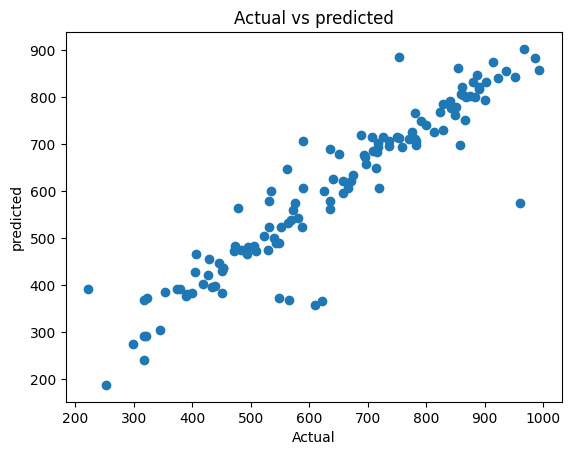

In [88]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test5, np.squeeze(model8.predict(X_test5)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test5, np.squeeze(model8.predict(X_test5)) )
mae= mean_absolute_error(Y_test5, np.squeeze(model8.predict(X_test5)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test5, np.squeeze(model8.predict(X_test5)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [89]:
prediction9 =np.squeeze(model8.predict([[80,2,2,129,prediction8]]))
print("Prediction: {}".format(prediction9))

y_prd=np.squeeze(np.squeeze(model8.predict(X_test5)) )
predic_dif=pd.DataFrame({'Actual':Y_test5,'predict':y_prd,"differences":Y_test5  -y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 43ms/step
Prediction: 593.4287109375
4/4 [==============================] - 0s 5ms/step


,Actual,predict,differences
1224,651,678.797852,-27.797852
563,531,522.737366,8.262634
764,961,574.144287,386.855713
1222,886,848.283386,37.716614
1041,782,707.380676,74.619324
1038,776,725.420288,50.579712
506,641,625.457153,15.542847
27,299,274.061493,24.938507
54,322,373.225189,-51.225189
905,696,671.631165,24.368835


## keras tuner with dense and keras tuner with RNN

In [90]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [91]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model9 = tuner.hypermodel.build(best_hps)

model9.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
22/22 [==============================] - 1s 9ms/step - loss: 260.5821 - mean_absolute_error: 260.5821 - val_loss: 180.0378 - val_mean_absolute_error: 180.0378
Epoch 2/2000
22/22 [==============================] - 0s 3ms/step - loss: 137.0472 - mean_absolute_error: 137.0472 - val_loss: 119.2536 - val_mean_absolute_error: 119.2536
Epoch 3/2000
22/22 [==============================] - 0s 3ms/step - loss: 86.4814 - mean_absolute_error: 86.4814 - val_loss: 69.0593 - val_mean_absolute_error: 69.0593
Epoch 4/2000
22/22 [==============================] - 0s 4ms/step - loss: 64.3482 - mean_absolute_error: 64.3482 - val_loss: 64.5946 - val_mean_absolute_error: 64.5946
Epoch 5/2000
22/22 [==============================] - 0s 3ms/step - loss: 63.4289 - mean_absolute_error: 63.4289 - val_loss: 64.2595 - val_mea

22/22 [==============================] - 0s 3ms/step - loss: 56.5798 - mean_absolute_error: 56.5798 - val_loss: 59.2969 - val_mean_absolute_error: 59.2969
Epoch 49/2000
22/22 [==============================] - 0s 4ms/step - loss: 56.0110 - mean_absolute_error: 56.0110 - val_loss: 58.1640 - val_mean_absolute_error: 58.1640
Epoch 50/2000
22/22 [==============================] - 0s 4ms/step - loss: 56.8063 - mean_absolute_error: 56.8063 - val_loss: 68.4337 - val_mean_absolute_error: 68.4337
Epoch 51/2000
22/22 [==============================] - 0s 4ms/step - loss: 65.6453 - mean_absolute_error: 65.6453 - val_loss: 61.1730 - val_mean_absolute_error: 61.1730
Epoch 52/2000
22/22 [==============================] - 0s 4ms/step - loss: 59.4757 - mean_absolute_error: 59.4757 - val_loss: 70.5223 - val_mean_absolute_error: 70.5223
Epoch 53/2000
22/22 [==============================] - 0s 4ms/step - loss: 59.1711 - mean_absolute_error: 59.1711 - val_loss: 60.2399 - val_mean_absolute_error: 60.2399


22/22 [==============================] - 0s 4ms/step - loss: 54.2796 - mean_absolute_error: 54.2796 - val_loss: 55.2824 - val_mean_absolute_error: 55.2824
Epoch 97/2000
22/22 [==============================] - 0s 3ms/step - loss: 52.3542 - mean_absolute_error: 52.3542 - val_loss: 60.3681 - val_mean_absolute_error: 60.3681
Epoch 98/2000
22/22 [==============================] - 0s 3ms/step - loss: 58.0570 - mean_absolute_error: 58.0570 - val_loss: 62.8665 - val_mean_absolute_error: 62.8665
Epoch 99/2000
22/22 [==============================] - 0s 3ms/step - loss: 54.1936 - mean_absolute_error: 54.1936 - val_loss: 56.7515 - val_mean_absolute_error: 56.7515
Epoch 100/2000
22/22 [==============================] - 0s 4ms/step - loss: 50.7923 - mean_absolute_error: 50.7923 - val_loss: 59.5754 - val_mean_absolute_error: 59.5754
Epoch 101/2000
22/22 [==============================] - 0s 3ms/step - loss: 51.7279 - mean_absolute_error: 51.7279 - val_loss: 56.4772 - val_mean_absolute_error: 56.477

22/22 [==============================] - 0s 3ms/step - loss: 51.7677 - mean_absolute_error: 51.7677 - val_loss: 52.6008 - val_mean_absolute_error: 52.6008
Epoch 145/2000
22/22 [==============================] - 0s 3ms/step - loss: 51.9608 - mean_absolute_error: 51.9608 - val_loss: 56.7150 - val_mean_absolute_error: 56.7150
Epoch 146/2000
22/22 [==============================] - 0s 3ms/step - loss: 50.1511 - mean_absolute_error: 50.1511 - val_loss: 53.0011 - val_mean_absolute_error: 53.0011
Epoch 147/2000
22/22 [==============================] - 0s 3ms/step - loss: 48.7976 - mean_absolute_error: 48.7976 - val_loss: 52.4121 - val_mean_absolute_error: 52.4121
Epoch 148/2000
22/22 [==============================] - 0s 4ms/step - loss: 49.0499 - mean_absolute_error: 49.0499 - val_loss: 54.8843 - val_mean_absolute_error: 54.8843
Epoch 149/2000
22/22 [==============================] - 0s 4ms/step - loss: 51.6229 - mean_absolute_error: 51.6229 - val_loss: 54.3728 - val_mean_absolute_error: 54.

22/22 [==============================] - 0s 3ms/step - loss: 47.0969 - mean_absolute_error: 47.0969 - val_loss: 58.1113 - val_mean_absolute_error: 58.1113
Epoch 193/2000
22/22 [==============================] - 0s 3ms/step - loss: 50.2660 - mean_absolute_error: 50.2660 - val_loss: 50.3001 - val_mean_absolute_error: 50.3001
Epoch 194/2000
22/22 [==============================] - 0s 3ms/step - loss: 49.9695 - mean_absolute_error: 49.9695 - val_loss: 52.1542 - val_mean_absolute_error: 52.1542
Epoch 195/2000
22/22 [==============================] - 0s 3ms/step - loss: 48.1437 - mean_absolute_error: 48.1437 - val_loss: 51.0289 - val_mean_absolute_error: 51.0289
Epoch 196/2000
22/22 [==============================] - 0s 4ms/step - loss: 48.0078 - mean_absolute_error: 48.0078 - val_loss: 54.2663 - val_mean_absolute_error: 54.2663
Epoch 197/2000
22/22 [==============================] - 0s 5ms/step - loss: 49.4417 - mean_absolute_error: 49.4417 - val_loss: 49.9757 - val_mean_absolute_error: 49.

22/22 [==============================] - 0s 3ms/step - loss: 46.4284 - mean_absolute_error: 46.4284 - val_loss: 49.0725 - val_mean_absolute_error: 49.0725
Epoch 241/2000
22/22 [==============================] - 0s 3ms/step - loss: 47.1484 - mean_absolute_error: 47.1484 - val_loss: 48.7424 - val_mean_absolute_error: 48.7424
Epoch 242/2000
22/22 [==============================] - 0s 3ms/step - loss: 47.5285 - mean_absolute_error: 47.5285 - val_loss: 49.7409 - val_mean_absolute_error: 49.7409
Epoch 243/2000
22/22 [==============================] - 0s 3ms/step - loss: 44.5714 - mean_absolute_error: 44.5714 - val_loss: 49.0758 - val_mean_absolute_error: 49.0758
Epoch 244/2000
22/22 [==============================] - 0s 3ms/step - loss: 47.0772 - mean_absolute_error: 47.0772 - val_loss: 48.0503 - val_mean_absolute_error: 48.0503
Epoch 245/2000
22/22 [==============================] - 0s 3ms/step - loss: 46.8357 - mean_absolute_error: 46.8357 - val_loss: 49.9479 - val_mean_absolute_error: 49.

22/22 [==============================] - 0s 3ms/step - loss: 49.9892 - mean_absolute_error: 49.9892 - val_loss: 49.9150 - val_mean_absolute_error: 49.9150
Epoch 289/2000
22/22 [==============================] - 0s 3ms/step - loss: 50.3528 - mean_absolute_error: 50.3528 - val_loss: 44.7785 - val_mean_absolute_error: 44.7785
Epoch 290/2000
22/22 [==============================] - 0s 3ms/step - loss: 43.9625 - mean_absolute_error: 43.9625 - val_loss: 42.6449 - val_mean_absolute_error: 42.6449
Epoch 291/2000
22/22 [==============================] - 0s 3ms/step - loss: 42.3311 - mean_absolute_error: 42.3311 - val_loss: 44.8134 - val_mean_absolute_error: 44.8134
Epoch 292/2000
22/22 [==============================] - 0s 3ms/step - loss: 43.7886 - mean_absolute_error: 43.7886 - val_loss: 47.2800 - val_mean_absolute_error: 47.2800
Epoch 293/2000
22/22 [==============================] - 0s 3ms/step - loss: 50.7234 - mean_absolute_error: 50.7234 - val_loss: 48.8221 - val_mean_absolute_error: 48.

22/22 [==============================] - 0s 3ms/step - loss: 39.6091 - mean_absolute_error: 39.6091 - val_loss: 53.9709 - val_mean_absolute_error: 53.9709
Epoch 337/2000
22/22 [==============================] - 0s 3ms/step - loss: 42.5492 - mean_absolute_error: 42.5492 - val_loss: 43.2088 - val_mean_absolute_error: 43.2088
Epoch 338/2000
22/22 [==============================] - 0s 3ms/step - loss: 40.9639 - mean_absolute_error: 40.9639 - val_loss: 40.4533 - val_mean_absolute_error: 40.4533
Epoch 339/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.6726 - mean_absolute_error: 39.6726 - val_loss: 42.0860 - val_mean_absolute_error: 42.0860
Epoch 340/2000
22/22 [==============================] - 0s 3ms/step - loss: 43.4529 - mean_absolute_error: 43.4529 - val_loss: 41.7504 - val_mean_absolute_error: 41.7504
Epoch 341/2000
22/22 [==============================] - 0s 3ms/step - loss: 41.0103 - mean_absolute_error: 41.0103 - val_loss: 43.0202 - val_mean_absolute_error: 43.

22/22 [==============================] - 0s 3ms/step - loss: 42.7944 - mean_absolute_error: 42.7944 - val_loss: 38.8796 - val_mean_absolute_error: 38.8796
Epoch 385/2000
22/22 [==============================] - 0s 3ms/step - loss: 42.3565 - mean_absolute_error: 42.3565 - val_loss: 39.9384 - val_mean_absolute_error: 39.9384
Epoch 386/2000
22/22 [==============================] - 0s 3ms/step - loss: 40.4787 - mean_absolute_error: 40.4787 - val_loss: 39.3248 - val_mean_absolute_error: 39.3248
Epoch 387/2000
22/22 [==============================] - 0s 3ms/step - loss: 40.7214 - mean_absolute_error: 40.7214 - val_loss: 40.5865 - val_mean_absolute_error: 40.5865
Epoch 388/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.5835 - mean_absolute_error: 39.5835 - val_loss: 43.1045 - val_mean_absolute_error: 43.1045
Epoch 389/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.2671 - mean_absolute_error: 39.2671 - val_loss: 51.0133 - val_mean_absolute_error: 51.

22/22 [==============================] - 0s 3ms/step - loss: 39.5425 - mean_absolute_error: 39.5425 - val_loss: 40.7329 - val_mean_absolute_error: 40.7329
Epoch 433/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.7758 - mean_absolute_error: 38.7758 - val_loss: 39.7472 - val_mean_absolute_error: 39.7472
Epoch 434/2000
22/22 [==============================] - 0s 3ms/step - loss: 41.2047 - mean_absolute_error: 41.2047 - val_loss: 42.8871 - val_mean_absolute_error: 42.8871
Epoch 435/2000
22/22 [==============================] - 0s 3ms/step - loss: 40.3068 - mean_absolute_error: 40.3068 - val_loss: 40.8170 - val_mean_absolute_error: 40.8170
Epoch 436/2000
22/22 [==============================] - 0s 3ms/step - loss: 41.7365 - mean_absolute_error: 41.7365 - val_loss: 40.3698 - val_mean_absolute_error: 40.3698
Epoch 437/2000
22/22 [==============================] - 0s 3ms/step - loss: 43.3286 - mean_absolute_error: 43.3286 - val_loss: 43.7468 - val_mean_absolute_error: 43.

22/22 [==============================] - 0s 3ms/step - loss: 41.3750 - mean_absolute_error: 41.3750 - val_loss: 39.3807 - val_mean_absolute_error: 39.3807
Epoch 481/2000
22/22 [==============================] - 0s 3ms/step - loss: 40.9239 - mean_absolute_error: 40.9239 - val_loss: 45.0988 - val_mean_absolute_error: 45.0988
Epoch 482/2000
22/22 [==============================] - 0s 3ms/step - loss: 42.2096 - mean_absolute_error: 42.2096 - val_loss: 48.3057 - val_mean_absolute_error: 48.3057
Epoch 483/2000
22/22 [==============================] - 0s 3ms/step - loss: 40.6010 - mean_absolute_error: 40.6010 - val_loss: 49.6937 - val_mean_absolute_error: 49.6937
Epoch 484/2000
22/22 [==============================] - 0s 3ms/step - loss: 43.6301 - mean_absolute_error: 43.6301 - val_loss: 39.3363 - val_mean_absolute_error: 39.3363
Epoch 485/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.9565 - mean_absolute_error: 38.9565 - val_loss: 38.9806 - val_mean_absolute_error: 38.

22/22 [==============================] - 0s 3ms/step - loss: 43.3796 - mean_absolute_error: 43.3796 - val_loss: 56.0236 - val_mean_absolute_error: 56.0236
Epoch 529/2000
22/22 [==============================] - 0s 3ms/step - loss: 44.1102 - mean_absolute_error: 44.1102 - val_loss: 41.5881 - val_mean_absolute_error: 41.5881
Epoch 530/2000
22/22 [==============================] - 0s 3ms/step - loss: 41.2037 - mean_absolute_error: 41.2037 - val_loss: 41.4606 - val_mean_absolute_error: 41.4606
Epoch 531/2000
22/22 [==============================] - 0s 3ms/step - loss: 41.6766 - mean_absolute_error: 41.6766 - val_loss: 38.9158 - val_mean_absolute_error: 38.9158
Epoch 532/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.9527 - mean_absolute_error: 38.9527 - val_loss: 39.2789 - val_mean_absolute_error: 39.2789
Epoch 533/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.5640 - mean_absolute_error: 38.5640 - val_loss: 39.7295 - val_mean_absolute_error: 39.

22/22 [==============================] - 0s 3ms/step - loss: 42.9623 - mean_absolute_error: 42.9623 - val_loss: 48.0501 - val_mean_absolute_error: 48.0501
Epoch 577/2000
22/22 [==============================] - 0s 3ms/step - loss: 44.4253 - mean_absolute_error: 44.4253 - val_loss: 49.0571 - val_mean_absolute_error: 49.0571
Epoch 578/2000
22/22 [==============================] - 0s 3ms/step - loss: 44.6268 - mean_absolute_error: 44.6268 - val_loss: 41.5265 - val_mean_absolute_error: 41.5265
Epoch 579/2000
22/22 [==============================] - 0s 3ms/step - loss: 43.6754 - mean_absolute_error: 43.6754 - val_loss: 45.1296 - val_mean_absolute_error: 45.1296
Epoch 580/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.7733 - mean_absolute_error: 39.7733 - val_loss: 45.7113 - val_mean_absolute_error: 45.7113
Epoch 581/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.0786 - mean_absolute_error: 39.0786 - val_loss: 38.6262 - val_mean_absolute_error: 38.

22/22 [==============================] - 0s 3ms/step - loss: 38.7566 - mean_absolute_error: 38.7566 - val_loss: 39.5956 - val_mean_absolute_error: 39.5956
Epoch 625/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.0340 - mean_absolute_error: 39.0340 - val_loss: 39.1932 - val_mean_absolute_error: 39.1932
Epoch 626/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.0713 - mean_absolute_error: 38.0713 - val_loss: 40.2987 - val_mean_absolute_error: 40.2987
Epoch 627/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.2226 - mean_absolute_error: 38.2226 - val_loss: 38.4966 - val_mean_absolute_error: 38.4966
Epoch 628/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.2505 - mean_absolute_error: 39.2505 - val_loss: 39.2549 - val_mean_absolute_error: 39.2549
Epoch 629/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.6143 - mean_absolute_error: 38.6143 - val_loss: 41.6688 - val_mean_absolute_error: 41.

22/22 [==============================] - 0s 3ms/step - loss: 41.5233 - mean_absolute_error: 41.5233 - val_loss: 38.7695 - val_mean_absolute_error: 38.7695
Epoch 673/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.4062 - mean_absolute_error: 39.4062 - val_loss: 42.9444 - val_mean_absolute_error: 42.9444
Epoch 674/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.0525 - mean_absolute_error: 38.0525 - val_loss: 39.1087 - val_mean_absolute_error: 39.1087
Epoch 675/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.2238 - mean_absolute_error: 38.2238 - val_loss: 39.0817 - val_mean_absolute_error: 39.0817
Epoch 676/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.9750 - mean_absolute_error: 37.9750 - val_loss: 38.7601 - val_mean_absolute_error: 38.7601
Epoch 677/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.6407 - mean_absolute_error: 37.6407 - val_loss: 38.3822 - val_mean_absolute_error: 38.

22/22 [==============================] - 0s 3ms/step - loss: 39.7362 - mean_absolute_error: 39.7362 - val_loss: 38.1907 - val_mean_absolute_error: 38.1907
Epoch 721/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.1602 - mean_absolute_error: 38.1602 - val_loss: 40.4198 - val_mean_absolute_error: 40.4198
Epoch 722/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.3127 - mean_absolute_error: 39.3127 - val_loss: 39.2556 - val_mean_absolute_error: 39.2556
Epoch 723/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.7603 - mean_absolute_error: 37.7603 - val_loss: 38.5734 - val_mean_absolute_error: 38.5734
Epoch 724/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.8882 - mean_absolute_error: 37.8882 - val_loss: 39.1749 - val_mean_absolute_error: 39.1749
Epoch 725/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.0662 - mean_absolute_error: 39.0662 - val_loss: 46.4629 - val_mean_absolute_error: 46.

22/22 [==============================] - 0s 3ms/step - loss: 38.6814 - mean_absolute_error: 38.6814 - val_loss: 44.4583 - val_mean_absolute_error: 44.4583
Epoch 769/2000
22/22 [==============================] - 0s 3ms/step - loss: 41.8438 - mean_absolute_error: 41.8438 - val_loss: 41.9616 - val_mean_absolute_error: 41.9616
Epoch 770/2000
22/22 [==============================] - 0s 3ms/step - loss: 40.6794 - mean_absolute_error: 40.6794 - val_loss: 40.5917 - val_mean_absolute_error: 40.5917
Epoch 771/2000
22/22 [==============================] - 0s 3ms/step - loss: 41.0806 - mean_absolute_error: 41.0806 - val_loss: 42.5613 - val_mean_absolute_error: 42.5613
Epoch 772/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.8266 - mean_absolute_error: 38.8266 - val_loss: 43.0688 - val_mean_absolute_error: 43.0688
Epoch 773/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.8049 - mean_absolute_error: 37.8049 - val_loss: 38.3741 - val_mean_absolute_error: 38.

22/22 [==============================] - 0s 3ms/step - loss: 37.3920 - mean_absolute_error: 37.3920 - val_loss: 39.1781 - val_mean_absolute_error: 39.1781
Epoch 817/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.4071 - mean_absolute_error: 37.4071 - val_loss: 41.6116 - val_mean_absolute_error: 41.6116
Epoch 818/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.6335 - mean_absolute_error: 38.6335 - val_loss: 38.1523 - val_mean_absolute_error: 38.1523
Epoch 819/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.9887 - mean_absolute_error: 39.9887 - val_loss: 38.4879 - val_mean_absolute_error: 38.4879
Epoch 820/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.8508 - mean_absolute_error: 37.8508 - val_loss: 40.0880 - val_mean_absolute_error: 40.0880
Epoch 821/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.3357 - mean_absolute_error: 37.3357 - val_loss: 37.8238 - val_mean_absolute_error: 37.

22/22 [==============================] - 0s 3ms/step - loss: 43.8253 - mean_absolute_error: 43.8253 - val_loss: 38.6140 - val_mean_absolute_error: 38.6140
Epoch 865/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.2229 - mean_absolute_error: 38.2229 - val_loss: 48.4398 - val_mean_absolute_error: 48.4398
Epoch 866/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.3632 - mean_absolute_error: 39.3632 - val_loss: 38.6014 - val_mean_absolute_error: 38.6014
Epoch 867/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.5566 - mean_absolute_error: 37.5566 - val_loss: 41.6353 - val_mean_absolute_error: 41.6353
Epoch 868/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.1489 - mean_absolute_error: 39.1489 - val_loss: 41.9402 - val_mean_absolute_error: 41.9402
Epoch 869/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.8751 - mean_absolute_error: 38.8751 - val_loss: 39.1535 - val_mean_absolute_error: 39.

22/22 [==============================] - 0s 3ms/step - loss: 39.2855 - mean_absolute_error: 39.2855 - val_loss: 40.2780 - val_mean_absolute_error: 40.2780
Epoch 913/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.7025 - mean_absolute_error: 39.7025 - val_loss: 38.7536 - val_mean_absolute_error: 38.7536
Epoch 914/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.9592 - mean_absolute_error: 37.9592 - val_loss: 38.9560 - val_mean_absolute_error: 38.9560
Epoch 915/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.1867 - mean_absolute_error: 37.1867 - val_loss: 43.7209 - val_mean_absolute_error: 43.7209
Epoch 916/2000
22/22 [==============================] - 0s 3ms/step - loss: 40.4019 - mean_absolute_error: 40.4019 - val_loss: 44.8594 - val_mean_absolute_error: 44.8594
Epoch 917/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.9674 - mean_absolute_error: 38.9674 - val_loss: 37.3174 - val_mean_absolute_error: 37.

22/22 [==============================] - 0s 3ms/step - loss: 40.9452 - mean_absolute_error: 40.9452 - val_loss: 60.3543 - val_mean_absolute_error: 60.3543
Epoch 961/2000
22/22 [==============================] - 0s 3ms/step - loss: 40.7152 - mean_absolute_error: 40.7152 - val_loss: 38.5152 - val_mean_absolute_error: 38.5152
Epoch 962/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.0315 - mean_absolute_error: 36.0315 - val_loss: 37.5099 - val_mean_absolute_error: 37.5099
Epoch 963/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.5340 - mean_absolute_error: 36.5340 - val_loss: 39.4107 - val_mean_absolute_error: 39.4107
Epoch 964/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.4307 - mean_absolute_error: 36.4307 - val_loss: 39.2136 - val_mean_absolute_error: 39.2136
Epoch 965/2000
22/22 [==============================] - 0s 6ms/step - loss: 37.7220 - mean_absolute_error: 37.7220 - val_loss: 37.6682 - val_mean_absolute_error: 37.

22/22 [==============================] - 0s 4ms/step - loss: 39.3614 - mean_absolute_error: 39.3614 - val_loss: 37.4161 - val_mean_absolute_error: 37.4161
Epoch 1009/2000
22/22 [==============================] - 0s 4ms/step - loss: 38.2096 - mean_absolute_error: 38.2096 - val_loss: 42.5798 - val_mean_absolute_error: 42.5798
Epoch 1010/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.7989 - mean_absolute_error: 37.7989 - val_loss: 40.7254 - val_mean_absolute_error: 40.7254
Epoch 1011/2000
22/22 [==============================] - 0s 4ms/step - loss: 37.2232 - mean_absolute_error: 37.2232 - val_loss: 38.5716 - val_mean_absolute_error: 38.5716
Epoch 1012/2000
22/22 [==============================] - 0s 4ms/step - loss: 37.1217 - mean_absolute_error: 37.1217 - val_loss: 39.5212 - val_mean_absolute_error: 39.5212
Epoch 1013/2000
22/22 [==============================] - 0s 4ms/step - loss: 38.2519 - mean_absolute_error: 38.2519 - val_loss: 38.8318 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 37.1368 - mean_absolute_error: 37.1368 - val_loss: 38.6537 - val_mean_absolute_error: 38.6537
Epoch 1057/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.9510 - mean_absolute_error: 36.9510 - val_loss: 37.7887 - val_mean_absolute_error: 37.7887
Epoch 1058/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.3633 - mean_absolute_error: 36.3633 - val_loss: 37.5688 - val_mean_absolute_error: 37.5688
Epoch 1059/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.5089 - mean_absolute_error: 36.5089 - val_loss: 37.7465 - val_mean_absolute_error: 37.7465
Epoch 1060/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.7173 - mean_absolute_error: 37.7173 - val_loss: 38.0138 - val_mean_absolute_error: 38.0138
Epoch 1061/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.1882 - mean_absolute_error: 37.1882 - val_loss: 47.1710 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 36.9523 - mean_absolute_error: 36.9523 - val_loss: 37.8382 - val_mean_absolute_error: 37.8382
Epoch 1105/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.6402 - mean_absolute_error: 35.6402 - val_loss: 39.3237 - val_mean_absolute_error: 39.3237
Epoch 1106/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.5702 - mean_absolute_error: 36.5702 - val_loss: 38.2662 - val_mean_absolute_error: 38.2662
Epoch 1107/2000
22/22 [==============================] - 0s 4ms/step - loss: 38.0945 - mean_absolute_error: 38.0945 - val_loss: 38.9427 - val_mean_absolute_error: 38.9427
Epoch 1108/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.6688 - mean_absolute_error: 36.6688 - val_loss: 46.0505 - val_mean_absolute_error: 46.0505
Epoch 1109/2000
22/22 [==============================] - 0s 4ms/step - loss: 38.9882 - mean_absolute_error: 38.9882 - val_loss: 39.0957 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 37.8342 - mean_absolute_error: 37.8342 - val_loss: 39.6204 - val_mean_absolute_error: 39.6204
Epoch 1153/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.7830 - mean_absolute_error: 38.7830 - val_loss: 37.8543 - val_mean_absolute_error: 37.8543
Epoch 1154/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.9013 - mean_absolute_error: 37.9013 - val_loss: 37.3997 - val_mean_absolute_error: 37.3997
Epoch 1155/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.0452 - mean_absolute_error: 37.0452 - val_loss: 39.1418 - val_mean_absolute_error: 39.1418
Epoch 1156/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.8008 - mean_absolute_error: 36.8008 - val_loss: 36.9021 - val_mean_absolute_error: 36.9021
Epoch 1157/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.7955 - mean_absolute_error: 37.7955 - val_loss: 42.7661 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 36.8346 - mean_absolute_error: 36.8346 - val_loss: 38.3308 - val_mean_absolute_error: 38.3308
Epoch 1201/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.3783 - mean_absolute_error: 39.3783 - val_loss: 39.7680 - val_mean_absolute_error: 39.7680
Epoch 1202/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.9791 - mean_absolute_error: 37.9791 - val_loss: 40.3378 - val_mean_absolute_error: 40.3378
Epoch 1203/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.6243 - mean_absolute_error: 39.6243 - val_loss: 43.8045 - val_mean_absolute_error: 43.8045
Epoch 1204/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.7027 - mean_absolute_error: 39.7027 - val_loss: 39.4732 - val_mean_absolute_error: 39.4732
Epoch 1205/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.2757 - mean_absolute_error: 39.2757 - val_loss: 39.2562 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 36.0863 - mean_absolute_error: 36.0863 - val_loss: 40.4724 - val_mean_absolute_error: 40.4724
Epoch 1249/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.7617 - mean_absolute_error: 36.7617 - val_loss: 39.6853 - val_mean_absolute_error: 39.6853
Epoch 1250/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.3036 - mean_absolute_error: 36.3036 - val_loss: 38.0389 - val_mean_absolute_error: 38.0389
Epoch 1251/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.1131 - mean_absolute_error: 36.1131 - val_loss: 37.9233 - val_mean_absolute_error: 37.9233
Epoch 1252/2000
22/22 [==============================] - 0s 4ms/step - loss: 39.2720 - mean_absolute_error: 39.2720 - val_loss: 37.4538 - val_mean_absolute_error: 37.4538
Epoch 1253/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.3454 - mean_absolute_error: 36.3454 - val_loss: 37.1684 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 36.2425 - mean_absolute_error: 36.2425 - val_loss: 37.5312 - val_mean_absolute_error: 37.5312
Epoch 1297/2000
22/22 [==============================] - 0s 4ms/step - loss: 35.7325 - mean_absolute_error: 35.7325 - val_loss: 39.6244 - val_mean_absolute_error: 39.6244
Epoch 1298/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.2350 - mean_absolute_error: 36.2350 - val_loss: 37.1847 - val_mean_absolute_error: 37.1847
Epoch 1299/2000
22/22 [==============================] - 0s 3ms/step - loss: 38.0540 - mean_absolute_error: 38.0540 - val_loss: 42.9700 - val_mean_absolute_error: 42.9700
Epoch 1300/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.3068 - mean_absolute_error: 36.3068 - val_loss: 39.7906 - val_mean_absolute_error: 39.7906
Epoch 1301/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.6896 - mean_absolute_error: 35.6896 - val_loss: 37.1558 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 36.6134 - mean_absolute_error: 36.6134 - val_loss: 37.1140 - val_mean_absolute_error: 37.1140
Epoch 1345/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.9030 - mean_absolute_error: 36.9030 - val_loss: 40.1815 - val_mean_absolute_error: 40.1815
Epoch 1346/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.2960 - mean_absolute_error: 37.2960 - val_loss: 42.1946 - val_mean_absolute_error: 42.1946
Epoch 1347/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.4148 - mean_absolute_error: 39.4148 - val_loss: 39.8366 - val_mean_absolute_error: 39.8366
Epoch 1348/2000
22/22 [==============================] - 0s 3ms/step - loss: 44.4319 - mean_absolute_error: 44.4319 - val_loss: 39.3974 - val_mean_absolute_error: 39.3974
Epoch 1349/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.8589 - mean_absolute_error: 35.8589 - val_loss: 37.5505 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 37.4047 - mean_absolute_error: 37.4047 - val_loss: 37.7059 - val_mean_absolute_error: 37.7059
Epoch 1393/2000
22/22 [==============================] - 0s 4ms/step - loss: 39.4431 - mean_absolute_error: 39.4431 - val_loss: 36.2870 - val_mean_absolute_error: 36.2870
Epoch 1394/2000
22/22 [==============================] - 0s 3ms/step - loss: 34.7511 - mean_absolute_error: 34.7511 - val_loss: 37.7225 - val_mean_absolute_error: 37.7225
Epoch 1395/2000
22/22 [==============================] - 0s 4ms/step - loss: 34.9248 - mean_absolute_error: 34.9248 - val_loss: 37.9435 - val_mean_absolute_error: 37.9435
Epoch 1396/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.5300 - mean_absolute_error: 35.5300 - val_loss: 37.8021 - val_mean_absolute_error: 37.8021
Epoch 1397/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.2717 - mean_absolute_error: 35.2717 - val_loss: 37.6197 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 36.8509 - mean_absolute_error: 36.8509 - val_loss: 38.6201 - val_mean_absolute_error: 38.6201
Epoch 1441/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.6694 - mean_absolute_error: 37.6694 - val_loss: 36.6827 - val_mean_absolute_error: 36.6827
Epoch 1442/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.1214 - mean_absolute_error: 35.1214 - val_loss: 36.7541 - val_mean_absolute_error: 36.7541
Epoch 1443/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.1011 - mean_absolute_error: 35.1011 - val_loss: 37.3457 - val_mean_absolute_error: 37.3457
Epoch 1444/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.3676 - mean_absolute_error: 36.3676 - val_loss: 39.8096 - val_mean_absolute_error: 39.8096
Epoch 1445/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.3433 - mean_absolute_error: 36.3433 - val_loss: 38.6147 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 35.9806 - mean_absolute_error: 35.9806 - val_loss: 37.7381 - val_mean_absolute_error: 37.7381
Epoch 1489/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.4254 - mean_absolute_error: 35.4254 - val_loss: 38.3179 - val_mean_absolute_error: 38.3179
Epoch 1490/2000
22/22 [==============================] - 0s 4ms/step - loss: 37.0622 - mean_absolute_error: 37.0622 - val_loss: 39.8116 - val_mean_absolute_error: 39.8116
Epoch 1491/2000
22/22 [==============================] - 0s 4ms/step - loss: 34.7199 - mean_absolute_error: 34.7199 - val_loss: 36.9459 - val_mean_absolute_error: 36.9459
Epoch 1492/2000
22/22 [==============================] - 0s 4ms/step - loss: 35.3559 - mean_absolute_error: 35.3559 - val_loss: 43.5127 - val_mean_absolute_error: 43.5127
Epoch 1493/2000
22/22 [==============================] - 0s 4ms/step - loss: 35.5933 - mean_absolute_error: 35.5933 - val_loss: 36.6467 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 40.3735 - mean_absolute_error: 40.3735 - val_loss: 38.3683 - val_mean_absolute_error: 38.3683
Epoch 1537/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.6978 - mean_absolute_error: 35.6978 - val_loss: 36.9265 - val_mean_absolute_error: 36.9265
Epoch 1538/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.6584 - mean_absolute_error: 35.6584 - val_loss: 37.5473 - val_mean_absolute_error: 37.5473
Epoch 1539/2000
22/22 [==============================] - 0s 3ms/step - loss: 34.1429 - mean_absolute_error: 34.1429 - val_loss: 36.8913 - val_mean_absolute_error: 36.8913
Epoch 1540/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.8143 - mean_absolute_error: 35.8143 - val_loss: 38.9410 - val_mean_absolute_error: 38.9410
Epoch 1541/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.7282 - mean_absolute_error: 35.7282 - val_loss: 46.4568 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 35.5958 - mean_absolute_error: 35.5958 - val_loss: 38.9533 - val_mean_absolute_error: 38.9533
Epoch 1585/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.9560 - mean_absolute_error: 35.9560 - val_loss: 37.5838 - val_mean_absolute_error: 37.5838
Epoch 1586/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.0025 - mean_absolute_error: 35.0025 - val_loss: 37.6645 - val_mean_absolute_error: 37.6645
Epoch 1587/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.5440 - mean_absolute_error: 36.5440 - val_loss: 37.3750 - val_mean_absolute_error: 37.3750
Epoch 1588/2000
22/22 [==============================] - 0s 3ms/step - loss: 37.1448 - mean_absolute_error: 37.1448 - val_loss: 36.3498 - val_mean_absolute_error: 36.3498
Epoch 1589/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.1351 - mean_absolute_error: 36.1351 - val_loss: 37.2939 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 37.8705 - mean_absolute_error: 37.8705 - val_loss: 41.7205 - val_mean_absolute_error: 41.7205
Epoch 1633/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.1314 - mean_absolute_error: 36.1314 - val_loss: 36.4436 - val_mean_absolute_error: 36.4436
Epoch 1634/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.0400 - mean_absolute_error: 36.0400 - val_loss: 36.2120 - val_mean_absolute_error: 36.2120
Epoch 1635/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.7628 - mean_absolute_error: 35.7628 - val_loss: 39.3100 - val_mean_absolute_error: 39.3100
Epoch 1636/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.2282 - mean_absolute_error: 35.2282 - val_loss: 35.8381 - val_mean_absolute_error: 35.8381
Epoch 1637/2000
22/22 [==============================] - 0s 3ms/step - loss: 34.5105 - mean_absolute_error: 34.5105 - val_loss: 36.3049 - val_mean_absolute_error

22/22 [==============================] - 0s 4ms/step - loss: 34.7577 - mean_absolute_error: 34.7577 - val_loss: 36.2425 - val_mean_absolute_error: 36.2425
Epoch 1681/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.1776 - mean_absolute_error: 35.1776 - val_loss: 35.6978 - val_mean_absolute_error: 35.6978
Epoch 1682/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.5282 - mean_absolute_error: 35.5282 - val_loss: 36.0823 - val_mean_absolute_error: 36.0823
Epoch 1683/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.0885 - mean_absolute_error: 35.0885 - val_loss: 36.0211 - val_mean_absolute_error: 36.0211
Epoch 1684/2000
22/22 [==============================] - 0s 3ms/step - loss: 34.1663 - mean_absolute_error: 34.1663 - val_loss: 35.9887 - val_mean_absolute_error: 35.9887
Epoch 1685/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.2327 - mean_absolute_error: 36.2327 - val_loss: 38.0130 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 34.8503 - mean_absolute_error: 34.8503 - val_loss: 38.1553 - val_mean_absolute_error: 38.1553
Epoch 1729/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.8353 - mean_absolute_error: 36.8353 - val_loss: 37.6284 - val_mean_absolute_error: 37.6284
Epoch 1730/2000
22/22 [==============================] - 0s 3ms/step - loss: 33.8022 - mean_absolute_error: 33.8022 - val_loss: 37.1105 - val_mean_absolute_error: 37.1105
Epoch 1731/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.7279 - mean_absolute_error: 35.7279 - val_loss: 38.1517 - val_mean_absolute_error: 38.1517
Epoch 1732/2000
22/22 [==============================] - 0s 3ms/step - loss: 33.8867 - mean_absolute_error: 33.8867 - val_loss: 41.9504 - val_mean_absolute_error: 41.9504
Epoch 1733/2000
22/22 [==============================] - 0s 3ms/step - loss: 39.3136 - mean_absolute_error: 39.3136 - val_loss: 37.8363 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 34.1005 - mean_absolute_error: 34.1005 - val_loss: 36.7926 - val_mean_absolute_error: 36.7926
Epoch 1777/2000
22/22 [==============================] - 0s 4ms/step - loss: 34.9285 - mean_absolute_error: 34.9285 - val_loss: 36.7269 - val_mean_absolute_error: 36.7269
Epoch 1778/2000
22/22 [==============================] - 0s 4ms/step - loss: 33.8371 - mean_absolute_error: 33.8371 - val_loss: 36.5049 - val_mean_absolute_error: 36.5049
Epoch 1779/2000
22/22 [==============================] - 0s 3ms/step - loss: 33.7949 - mean_absolute_error: 33.7949 - val_loss: 35.9940 - val_mean_absolute_error: 35.9940
Epoch 1780/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.4923 - mean_absolute_error: 35.4923 - val_loss: 40.6507 - val_mean_absolute_error: 40.6507
Epoch 1781/2000
22/22 [==============================] - 0s 3ms/step - loss: 33.3962 - mean_absolute_error: 33.3962 - val_loss: 36.4880 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 34.7760 - mean_absolute_error: 34.7760 - val_loss: 36.4584 - val_mean_absolute_error: 36.4584
Epoch 1825/2000
22/22 [==============================] - 0s 3ms/step - loss: 33.2092 - mean_absolute_error: 33.2092 - val_loss: 36.7720 - val_mean_absolute_error: 36.7720
Epoch 1826/2000
22/22 [==============================] - 0s 3ms/step - loss: 34.2792 - mean_absolute_error: 34.2792 - val_loss: 40.7978 - val_mean_absolute_error: 40.7978
Epoch 1827/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.3750 - mean_absolute_error: 36.3750 - val_loss: 35.9190 - val_mean_absolute_error: 35.9190
Epoch 1828/2000
22/22 [==============================] - 0s 3ms/step - loss: 34.5898 - mean_absolute_error: 34.5898 - val_loss: 36.0221 - val_mean_absolute_error: 36.0221
Epoch 1829/2000
22/22 [==============================] - 0s 3ms/step - loss: 34.6489 - mean_absolute_error: 34.6489 - val_loss: 38.4208 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 36.5406 - mean_absolute_error: 36.5406 - val_loss: 37.6605 - val_mean_absolute_error: 37.6605
Epoch 1873/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.6446 - mean_absolute_error: 35.6446 - val_loss: 44.2597 - val_mean_absolute_error: 44.2597
Epoch 1874/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.8236 - mean_absolute_error: 35.8236 - val_loss: 35.4196 - val_mean_absolute_error: 35.4196
Epoch 1875/2000
22/22 [==============================] - 0s 3ms/step - loss: 33.5172 - mean_absolute_error: 33.5172 - val_loss: 37.6901 - val_mean_absolute_error: 37.6901
Epoch 1876/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.9356 - mean_absolute_error: 35.9356 - val_loss: 35.6509 - val_mean_absolute_error: 35.6509
Epoch 1877/2000
22/22 [==============================] - 0s 3ms/step - loss: 33.3594 - mean_absolute_error: 33.3594 - val_loss: 36.1663 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 35.1141 - mean_absolute_error: 35.1141 - val_loss: 35.5522 - val_mean_absolute_error: 35.5522
Epoch 1921/2000
22/22 [==============================] - 0s 3ms/step - loss: 34.1219 - mean_absolute_error: 34.1219 - val_loss: 35.5233 - val_mean_absolute_error: 35.5233
Epoch 1922/2000
22/22 [==============================] - 0s 4ms/step - loss: 36.1958 - mean_absolute_error: 36.1958 - val_loss: 41.4503 - val_mean_absolute_error: 41.4503
Epoch 1923/2000
22/22 [==============================] - 0s 3ms/step - loss: 36.3038 - mean_absolute_error: 36.3038 - val_loss: 38.1357 - val_mean_absolute_error: 38.1357
Epoch 1924/2000
22/22 [==============================] - 0s 3ms/step - loss: 33.3348 - mean_absolute_error: 33.3348 - val_loss: 37.1406 - val_mean_absolute_error: 37.1406
Epoch 1925/2000
22/22 [==============================] - 0s 3ms/step - loss: 33.5776 - mean_absolute_error: 33.5776 - val_loss: 39.7661 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 33.6934 - mean_absolute_error: 33.6934 - val_loss: 35.7525 - val_mean_absolute_error: 35.7525
Epoch 1969/2000
22/22 [==============================] - 0s 3ms/step - loss: 34.1002 - mean_absolute_error: 34.1002 - val_loss: 35.8936 - val_mean_absolute_error: 35.8936
Epoch 1970/2000
22/22 [==============================] - 0s 3ms/step - loss: 33.7570 - mean_absolute_error: 33.7570 - val_loss: 35.5876 - val_mean_absolute_error: 35.5876
Epoch 1971/2000
22/22 [==============================] - 0s 3ms/step - loss: 32.9580 - mean_absolute_error: 32.9580 - val_loss: 37.0435 - val_mean_absolute_error: 37.0435
Epoch 1972/2000
22/22 [==============================] - 0s 3ms/step - loss: 35.0842 - mean_absolute_error: 35.0842 - val_loss: 35.3288 - val_mean_absolute_error: 35.3288
Epoch 1973/2000
22/22 [==============================] - 0s 3ms/step - loss: 34.3496 - mean_absolute_error: 34.3496 - val_loss: 38.0361 - val_mean_absolute_error

In [92]:
prediction10 = np.squeeze(model9.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction10))

1/1 [==============================] - 0s 58ms/step
Prediction: 382.9923400878906


In [93]:
y_prd=np.squeeze(np.squeeze(model9.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

14/14 [==============================] - 0s 1ms/step
      Actual     predict  differences
431      529  540.740295   -11.740295
610      624  630.204529    -6.204529
795      635  633.321960     1.678040
1238     929  895.832642    33.167358
1228     890  848.385437    41.614563
...      ...         ...          ...
103      686  555.130676   130.869324
575      543  537.051331     5.948669
60       694  546.335144   147.664856
988      829  838.372925    -9.372925
511      575  588.596558   -13.596558

[426 rows x 3 columns]


In [94]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-207.42706298828125
315.2100830078125
-246.336181640625
333.40447998046875
-477.973876953125
213.985107421875
268.23358154296875
-222.28875732421875
263.22607421875
286.84320068359375
lower bound: -180.47653952523982
upper bound: 207.6593500623721


In [95]:
A.drop(A[(A['differences'] >207)].index, inplace=True)
A.drop(A[(A['differences'] <-180)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HeatingCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X6=B.drop('Actual',axis=1)
Y6=B['Actual']
X_train6, X_test6, Y_train6, Y_test6 =train_test_split(X6,Y6, test_size=0.3, random_state = 0)

      AverageFloorArea  Year/Quarter  Property Type  \
1                   14             4              1   
2                   19             1              4   
4                   20             1              2   
5                   20             4              4   
8                   25             1              4   
...                ...           ...            ...   
1406               141             4              3   
1407               142             3              3   
1410               143             2              1   
1411               143             3              3   
1415               146             4              1   

      EnergyUseAveragePerDwelling  Actual      predict  
1                             468     187   320.775360  
2                             375     253   317.085602  
4                             366     131   233.925034  
5                             312     313   294.849792  
8                             268     345   303.359467

In [96]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train6.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [97]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train6,Y_train6 ,epochs=100,validation_data=(X_test6,Y_test6))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model10 = tuner.hypermodel.build(best_hps)

model10.fit(X_train6, Y_train6, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
7/7 [==============================] - 2s 71ms/step - loss: 462.6971 - mean_absolute_error: 462.6971 - val_loss: 380.4824 - val_mean_absolute_error: 380.4824
Epoch 2/2000
7/7 [==============================] - 0s 30ms/step - loss: 225.8202 - mean_absolute_error: 225.8202 - val_loss: 89.7535 - val_mean_absolute_error: 89.7535
Epoch 3/2000
7/7 [==============================] - 0s 29ms/step - loss: 63.9448 - mean_absolute_error: 63.9448 - val_loss: 55.8165 - val_mean_absolute_error: 55.8165
Epoch 4/2000
7/7 [==============================] - 0s 33ms/step - loss: 52.3431 - mean_absolute_error: 52.3431 - val_loss: 67.1008 - val_mean_absolute_error: 67.1008
Epoch 5/2000
7/7 [==============================] - 0s 28ms/step - loss: 46.9970 - mean_absolute_error: 46.9970 - val_loss: 43.9022 - val_mean_absol

Epoch 49/2000
7/7 [==============================] - 0s 32ms/step - loss: 27.5748 - mean_absolute_error: 27.5748 - val_loss: 38.6086 - val_mean_absolute_error: 38.6086
Epoch 50/2000
7/7 [==============================] - 0s 30ms/step - loss: 27.2388 - mean_absolute_error: 27.2388 - val_loss: 38.6080 - val_mean_absolute_error: 38.6080
Epoch 51/2000
7/7 [==============================] - 0s 32ms/step - loss: 28.1393 - mean_absolute_error: 28.1393 - val_loss: 40.3865 - val_mean_absolute_error: 40.3865
Epoch 52/2000
7/7 [==============================] - 0s 33ms/step - loss: 28.0838 - mean_absolute_error: 28.0838 - val_loss: 43.8471 - val_mean_absolute_error: 43.8471
Epoch 53/2000
7/7 [==============================] - 0s 31ms/step - loss: 32.4475 - mean_absolute_error: 32.4475 - val_loss: 39.0381 - val_mean_absolute_error: 39.0381
Epoch 54/2000
7/7 [==============================] - 0s 33ms/step - loss: 27.6891 - mean_absolute_error: 27.6891 - val_loss: 39.2266 - val_mean_absolute_error: 

Epoch 98/2000
7/7 [==============================] - 0s 31ms/step - loss: 27.8620 - mean_absolute_error: 27.8620 - val_loss: 42.3709 - val_mean_absolute_error: 42.3709
Epoch 99/2000
7/7 [==============================] - 0s 30ms/step - loss: 29.1915 - mean_absolute_error: 29.1915 - val_loss: 39.3598 - val_mean_absolute_error: 39.3598
Epoch 100/2000
7/7 [==============================] - 0s 35ms/step - loss: 27.9254 - mean_absolute_error: 27.9254 - val_loss: 40.1225 - val_mean_absolute_error: 40.1225
Epoch 101/2000
7/7 [==============================] - 0s 40ms/step - loss: 30.2074 - mean_absolute_error: 30.2074 - val_loss: 45.0608 - val_mean_absolute_error: 45.0608
Epoch 102/2000
7/7 [==============================] - 0s 36ms/step - loss: 31.1535 - mean_absolute_error: 31.1535 - val_loss: 40.3486 - val_mean_absolute_error: 40.3486
Epoch 103/2000
7/7 [==============================] - 0s 31ms/step - loss: 29.2042 - mean_absolute_error: 29.2042 - val_loss: 40.1100 - val_mean_absolute_err

7/7 [==============================] - 0s 30ms/step - loss: 26.8686 - mean_absolute_error: 26.8686 - val_loss: 38.7914 - val_mean_absolute_error: 38.7914
Epoch 147/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.5341 - mean_absolute_error: 27.5341 - val_loss: 38.8518 - val_mean_absolute_error: 38.8518
Epoch 148/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.4957 - mean_absolute_error: 27.4957 - val_loss: 39.5689 - val_mean_absolute_error: 39.5689
Epoch 149/2000
7/7 [==============================] - 0s 28ms/step - loss: 26.9257 - mean_absolute_error: 26.9257 - val_loss: 39.0891 - val_mean_absolute_error: 39.0891
Epoch 150/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.0257 - mean_absolute_error: 27.0257 - val_loss: 39.1840 - val_mean_absolute_error: 39.1840
Epoch 151/2000
7/7 [==============================] - 0s 28ms/step - loss: 26.3796 - mean_absolute_error: 26.3796 - val_loss: 48.9673 - val_mean_absolute_error: 48.9673
E

7/7 [==============================] - 0s 28ms/step - loss: 28.7453 - mean_absolute_error: 28.7453 - val_loss: 39.9703 - val_mean_absolute_error: 39.9703
Epoch 195/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.2131 - mean_absolute_error: 28.2131 - val_loss: 40.8228 - val_mean_absolute_error: 40.8228
Epoch 196/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.5141 - mean_absolute_error: 28.5141 - val_loss: 42.8755 - val_mean_absolute_error: 42.8755
Epoch 197/2000
7/7 [==============================] - 0s 30ms/step - loss: 29.5683 - mean_absolute_error: 29.5683 - val_loss: 46.9384 - val_mean_absolute_error: 46.9384
Epoch 198/2000
7/7 [==============================] - 0s 29ms/step - loss: 36.3460 - mean_absolute_error: 36.3460 - val_loss: 62.2531 - val_mean_absolute_error: 62.2531
Epoch 199/2000
7/7 [==============================] - 0s 28ms/step - loss: 43.1628 - mean_absolute_error: 43.1628 - val_loss: 43.7800 - val_mean_absolute_error: 43.7800
E

7/7 [==============================] - 0s 29ms/step - loss: 27.3154 - mean_absolute_error: 27.3154 - val_loss: 40.3252 - val_mean_absolute_error: 40.3252
Epoch 243/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.9571 - mean_absolute_error: 28.9571 - val_loss: 38.5487 - val_mean_absolute_error: 38.5487
Epoch 244/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.6126 - mean_absolute_error: 27.6126 - val_loss: 38.5384 - val_mean_absolute_error: 38.5384
Epoch 245/2000
7/7 [==============================] - 0s 29ms/step - loss: 27.8556 - mean_absolute_error: 27.8556 - val_loss: 38.3241 - val_mean_absolute_error: 38.3241
Epoch 246/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.9258 - mean_absolute_error: 27.9258 - val_loss: 39.9591 - val_mean_absolute_error: 39.9591
Epoch 247/2000
7/7 [==============================] - 0s 28ms/step - loss: 29.1314 - mean_absolute_error: 29.1314 - val_loss: 43.7412 - val_mean_absolute_error: 43.7412
E

7/7 [==============================] - 0s 30ms/step - loss: 29.1942 - mean_absolute_error: 29.1942 - val_loss: 38.5213 - val_mean_absolute_error: 38.5213
Epoch 291/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.8270 - mean_absolute_error: 28.8270 - val_loss: 38.8614 - val_mean_absolute_error: 38.8614
Epoch 292/2000
7/7 [==============================] - 0s 28ms/step - loss: 31.0528 - mean_absolute_error: 31.0528 - val_loss: 39.1888 - val_mean_absolute_error: 39.1888
Epoch 293/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.2719 - mean_absolute_error: 27.2719 - val_loss: 38.5819 - val_mean_absolute_error: 38.5819
Epoch 294/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.4448 - mean_absolute_error: 27.4448 - val_loss: 39.1056 - val_mean_absolute_error: 39.1056
Epoch 295/2000
7/7 [==============================] - 0s 37ms/step - loss: 27.9128 - mean_absolute_error: 27.9128 - val_loss: 38.4801 - val_mean_absolute_error: 38.4801
E

7/7 [==============================] - 0s 34ms/step - loss: 27.6483 - mean_absolute_error: 27.6483 - val_loss: 39.8397 - val_mean_absolute_error: 39.8397
Epoch 339/2000
7/7 [==============================] - 0s 29ms/step - loss: 31.1491 - mean_absolute_error: 31.1491 - val_loss: 46.8871 - val_mean_absolute_error: 46.8871
Epoch 340/2000
7/7 [==============================] - 0s 29ms/step - loss: 34.0938 - mean_absolute_error: 34.0938 - val_loss: 41.6963 - val_mean_absolute_error: 41.6963
Epoch 341/2000
7/7 [==============================] - 0s 28ms/step - loss: 30.1835 - mean_absolute_error: 30.1835 - val_loss: 46.3733 - val_mean_absolute_error: 46.3733
Epoch 342/2000
7/7 [==============================] - 0s 29ms/step - loss: 31.9464 - mean_absolute_error: 31.9464 - val_loss: 38.5229 - val_mean_absolute_error: 38.5229
Epoch 343/2000
7/7 [==============================] - 0s 31ms/step - loss: 28.3735 - mean_absolute_error: 28.3735 - val_loss: 38.7092 - val_mean_absolute_error: 38.7092
E

7/7 [==============================] - 0s 34ms/step - loss: 27.8641 - mean_absolute_error: 27.8641 - val_loss: 37.9683 - val_mean_absolute_error: 37.9683
Epoch 387/2000
7/7 [==============================] - 0s 31ms/step - loss: 26.4104 - mean_absolute_error: 26.4104 - val_loss: 39.2132 - val_mean_absolute_error: 39.2132
Epoch 388/2000
7/7 [==============================] - 0s 31ms/step - loss: 26.6405 - mean_absolute_error: 26.6405 - val_loss: 37.8984 - val_mean_absolute_error: 37.8984
Epoch 389/2000
7/7 [==============================] - 0s 30ms/step - loss: 26.0478 - mean_absolute_error: 26.0478 - val_loss: 37.9084 - val_mean_absolute_error: 37.9084
Epoch 390/2000
7/7 [==============================] - 0s 31ms/step - loss: 26.5302 - mean_absolute_error: 26.5302 - val_loss: 37.5501 - val_mean_absolute_error: 37.5501
Epoch 391/2000
7/7 [==============================] - 0s 37ms/step - loss: 25.9454 - mean_absolute_error: 25.9454 - val_loss: 38.2486 - val_mean_absolute_error: 38.2486
E

7/7 [==============================] - 0s 31ms/step - loss: 27.6783 - mean_absolute_error: 27.6783 - val_loss: 38.1209 - val_mean_absolute_error: 38.1209
Epoch 435/2000
7/7 [==============================] - 0s 31ms/step - loss: 26.6799 - mean_absolute_error: 26.6799 - val_loss: 37.5798 - val_mean_absolute_error: 37.5798
Epoch 436/2000
7/7 [==============================] - 0s 31ms/step - loss: 26.0868 - mean_absolute_error: 26.0868 - val_loss: 38.1394 - val_mean_absolute_error: 38.1394
Epoch 437/2000
7/7 [==============================] - 0s 30ms/step - loss: 26.0647 - mean_absolute_error: 26.0647 - val_loss: 38.2636 - val_mean_absolute_error: 38.2636
Epoch 438/2000
7/7 [==============================] - 0s 30ms/step - loss: 28.7252 - mean_absolute_error: 28.7252 - val_loss: 37.6347 - val_mean_absolute_error: 37.6347
Epoch 439/2000
7/7 [==============================] - 0s 28ms/step - loss: 25.3802 - mean_absolute_error: 25.3802 - val_loss: 38.7040 - val_mean_absolute_error: 38.7040
E

7/7 [==============================] - 0s 28ms/step - loss: 25.5789 - mean_absolute_error: 25.5789 - val_loss: 38.8427 - val_mean_absolute_error: 38.8427
Epoch 483/2000
7/7 [==============================] - 0s 26ms/step - loss: 26.4645 - mean_absolute_error: 26.4645 - val_loss: 37.4334 - val_mean_absolute_error: 37.4334
Epoch 484/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.8192 - mean_absolute_error: 27.8192 - val_loss: 37.6039 - val_mean_absolute_error: 37.6039
Epoch 485/2000
7/7 [==============================] - 0s 35ms/step - loss: 26.4134 - mean_absolute_error: 26.4134 - val_loss: 39.5434 - val_mean_absolute_error: 39.5434
Epoch 486/2000
7/7 [==============================] - 0s 32ms/step - loss: 27.3623 - mean_absolute_error: 27.3623 - val_loss: 38.3609 - val_mean_absolute_error: 38.3609
Epoch 487/2000
7/7 [==============================] - 0s 28ms/step - loss: 26.9474 - mean_absolute_error: 26.9474 - val_loss: 39.0205 - val_mean_absolute_error: 39.0205
E

7/7 [==============================] - 0s 29ms/step - loss: 25.6359 - mean_absolute_error: 25.6359 - val_loss: 40.0982 - val_mean_absolute_error: 40.0982
Epoch 531/2000
7/7 [==============================] - 0s 30ms/step - loss: 27.3786 - mean_absolute_error: 27.3786 - val_loss: 39.9050 - val_mean_absolute_error: 39.9050
Epoch 532/2000
7/7 [==============================] - 0s 29ms/step - loss: 28.6704 - mean_absolute_error: 28.6704 - val_loss: 42.1790 - val_mean_absolute_error: 42.1790
Epoch 533/2000
7/7 [==============================] - 0s 28ms/step - loss: 29.9336 - mean_absolute_error: 29.9336 - val_loss: 38.2374 - val_mean_absolute_error: 38.2374
Epoch 534/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.8830 - mean_absolute_error: 27.8830 - val_loss: 38.5705 - val_mean_absolute_error: 38.5705
Epoch 535/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.5647 - mean_absolute_error: 25.5647 - val_loss: 38.7728 - val_mean_absolute_error: 38.7728
E

7/7 [==============================] - 0s 30ms/step - loss: 28.4582 - mean_absolute_error: 28.4582 - val_loss: 39.7285 - val_mean_absolute_error: 39.7285
Epoch 579/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.0093 - mean_absolute_error: 29.0093 - val_loss: 38.3327 - val_mean_absolute_error: 38.3327
Epoch 580/2000
7/7 [==============================] - 0s 29ms/step - loss: 26.7876 - mean_absolute_error: 26.7876 - val_loss: 37.7233 - val_mean_absolute_error: 37.7233
Epoch 581/2000
7/7 [==============================] - 0s 28ms/step - loss: 26.5966 - mean_absolute_error: 26.5966 - val_loss: 37.2303 - val_mean_absolute_error: 37.2303
Epoch 582/2000
7/7 [==============================] - 0s 28ms/step - loss: 25.5704 - mean_absolute_error: 25.5704 - val_loss: 37.1566 - val_mean_absolute_error: 37.1566
Epoch 583/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.1098 - mean_absolute_error: 28.1098 - val_loss: 42.5546 - val_mean_absolute_error: 42.5546
E

7/7 [==============================] - 0s 27ms/step - loss: 25.6778 - mean_absolute_error: 25.6778 - val_loss: 37.7042 - val_mean_absolute_error: 37.7042
Epoch 627/2000
7/7 [==============================] - 0s 26ms/step - loss: 25.1261 - mean_absolute_error: 25.1261 - val_loss: 37.0778 - val_mean_absolute_error: 37.0778
Epoch 628/2000
7/7 [==============================] - 0s 28ms/step - loss: 25.2660 - mean_absolute_error: 25.2660 - val_loss: 38.0542 - val_mean_absolute_error: 38.0542
Epoch 629/2000
7/7 [==============================] - 0s 26ms/step - loss: 26.3671 - mean_absolute_error: 26.3671 - val_loss: 38.0080 - val_mean_absolute_error: 38.0080
Epoch 630/2000
7/7 [==============================] - 0s 28ms/step - loss: 26.4776 - mean_absolute_error: 26.4776 - val_loss: 38.2944 - val_mean_absolute_error: 38.2944
Epoch 631/2000
7/7 [==============================] - 0s 28ms/step - loss: 25.8033 - mean_absolute_error: 25.8033 - val_loss: 37.1880 - val_mean_absolute_error: 37.1880
E

7/7 [==============================] - 0s 27ms/step - loss: 24.8655 - mean_absolute_error: 24.8655 - val_loss: 38.9895 - val_mean_absolute_error: 38.9895
Epoch 675/2000
7/7 [==============================] - 0s 26ms/step - loss: 26.1799 - mean_absolute_error: 26.1799 - val_loss: 38.1034 - val_mean_absolute_error: 38.1034
Epoch 676/2000
7/7 [==============================] - 0s 27ms/step - loss: 26.6030 - mean_absolute_error: 26.6030 - val_loss: 37.3462 - val_mean_absolute_error: 37.3462
Epoch 677/2000
7/7 [==============================] - 0s 28ms/step - loss: 26.2901 - mean_absolute_error: 26.2901 - val_loss: 37.2298 - val_mean_absolute_error: 37.2298
Epoch 678/2000
7/7 [==============================] - 0s 34ms/step - loss: 26.3159 - mean_absolute_error: 26.3159 - val_loss: 44.9846 - val_mean_absolute_error: 44.9846
Epoch 679/2000
7/7 [==============================] - 0s 31ms/step - loss: 31.0137 - mean_absolute_error: 31.0137 - val_loss: 36.8120 - val_mean_absolute_error: 36.8120
E

7/7 [==============================] - 0s 27ms/step - loss: 25.2423 - mean_absolute_error: 25.2423 - val_loss: 36.2487 - val_mean_absolute_error: 36.2487
Epoch 723/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.5554 - mean_absolute_error: 24.5554 - val_loss: 36.9066 - val_mean_absolute_error: 36.9066
Epoch 724/2000
7/7 [==============================] - 0s 28ms/step - loss: 24.6870 - mean_absolute_error: 24.6870 - val_loss: 36.2863 - val_mean_absolute_error: 36.2863
Epoch 725/2000
7/7 [==============================] - 0s 28ms/step - loss: 24.7865 - mean_absolute_error: 24.7865 - val_loss: 37.2754 - val_mean_absolute_error: 37.2754
Epoch 726/2000
7/7 [==============================] - 0s 26ms/step - loss: 25.3607 - mean_absolute_error: 25.3607 - val_loss: 37.7350 - val_mean_absolute_error: 37.7350
Epoch 727/2000
7/7 [==============================] - 0s 26ms/step - loss: 25.0654 - mean_absolute_error: 25.0654 - val_loss: 37.0214 - val_mean_absolute_error: 37.0214
E

7/7 [==============================] - 0s 28ms/step - loss: 25.9063 - mean_absolute_error: 25.9063 - val_loss: 40.4721 - val_mean_absolute_error: 40.4721
Epoch 771/2000
7/7 [==============================] - 0s 28ms/step - loss: 28.5126 - mean_absolute_error: 28.5126 - val_loss: 36.9507 - val_mean_absolute_error: 36.9507
Epoch 772/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.4915 - mean_absolute_error: 25.4915 - val_loss: 36.4864 - val_mean_absolute_error: 36.4864
Epoch 773/2000
7/7 [==============================] - 0s 26ms/step - loss: 24.9270 - mean_absolute_error: 24.9270 - val_loss: 37.3706 - val_mean_absolute_error: 37.3706
Epoch 774/2000
7/7 [==============================] - 0s 27ms/step - loss: 26.0236 - mean_absolute_error: 26.0236 - val_loss: 36.7035 - val_mean_absolute_error: 36.7035
Epoch 775/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.6559 - mean_absolute_error: 25.6559 - val_loss: 39.7982 - val_mean_absolute_error: 39.7982
E

7/7 [==============================] - 0s 28ms/step - loss: 26.8862 - mean_absolute_error: 26.8862 - val_loss: 38.1036 - val_mean_absolute_error: 38.1036
Epoch 819/2000
7/7 [==============================] - 0s 29ms/step - loss: 26.4014 - mean_absolute_error: 26.4014 - val_loss: 37.1790 - val_mean_absolute_error: 37.1790
Epoch 820/2000
7/7 [==============================] - 0s 27ms/step - loss: 27.1715 - mean_absolute_error: 27.1715 - val_loss: 38.1696 - val_mean_absolute_error: 38.1696
Epoch 821/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.0738 - mean_absolute_error: 25.0738 - val_loss: 36.9153 - val_mean_absolute_error: 36.9153
Epoch 822/2000
7/7 [==============================] - 0s 28ms/step - loss: 24.9242 - mean_absolute_error: 24.9242 - val_loss: 36.0610 - val_mean_absolute_error: 36.0610
Epoch 823/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.5247 - mean_absolute_error: 24.5247 - val_loss: 36.4413 - val_mean_absolute_error: 36.4413
E

7/7 [==============================] - 0s 27ms/step - loss: 25.2261 - mean_absolute_error: 25.2261 - val_loss: 36.4462 - val_mean_absolute_error: 36.4462
Epoch 867/2000
7/7 [==============================] - 0s 26ms/step - loss: 24.3883 - mean_absolute_error: 24.3883 - val_loss: 36.1623 - val_mean_absolute_error: 36.1623
Epoch 868/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.3853 - mean_absolute_error: 24.3853 - val_loss: 36.7412 - val_mean_absolute_error: 36.7412
Epoch 869/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.4846 - mean_absolute_error: 25.4846 - val_loss: 36.5014 - val_mean_absolute_error: 36.5014
Epoch 870/2000
7/7 [==============================] - 0s 28ms/step - loss: 24.5771 - mean_absolute_error: 24.5771 - val_loss: 36.0666 - val_mean_absolute_error: 36.0666
Epoch 871/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.7058 - mean_absolute_error: 24.7058 - val_loss: 36.3862 - val_mean_absolute_error: 36.3862
E

7/7 [==============================] - 0s 27ms/step - loss: 25.3874 - mean_absolute_error: 25.3874 - val_loss: 36.8154 - val_mean_absolute_error: 36.8154
Epoch 915/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.9445 - mean_absolute_error: 25.9445 - val_loss: 36.9168 - val_mean_absolute_error: 36.9168
Epoch 916/2000
7/7 [==============================] - 0s 28ms/step - loss: 25.6783 - mean_absolute_error: 25.6783 - val_loss: 36.1442 - val_mean_absolute_error: 36.1442
Epoch 917/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.2951 - mean_absolute_error: 25.2951 - val_loss: 39.4822 - val_mean_absolute_error: 39.4822
Epoch 918/2000
7/7 [==============================] - 0s 27ms/step - loss: 28.0433 - mean_absolute_error: 28.0433 - val_loss: 37.4458 - val_mean_absolute_error: 37.4458
Epoch 919/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.4076 - mean_absolute_error: 25.4076 - val_loss: 36.8350 - val_mean_absolute_error: 36.8350
E

7/7 [==============================] - 0s 28ms/step - loss: 26.1953 - mean_absolute_error: 26.1953 - val_loss: 37.0919 - val_mean_absolute_error: 37.0919
Epoch 963/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.5408 - mean_absolute_error: 27.5408 - val_loss: 39.8460 - val_mean_absolute_error: 39.8460
Epoch 964/2000
7/7 [==============================] - 0s 29ms/step - loss: 27.3774 - mean_absolute_error: 27.3774 - val_loss: 36.2507 - val_mean_absolute_error: 36.2507
Epoch 965/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.0272 - mean_absolute_error: 25.0272 - val_loss: 36.6376 - val_mean_absolute_error: 36.6376
Epoch 966/2000
7/7 [==============================] - 0s 26ms/step - loss: 24.3702 - mean_absolute_error: 24.3702 - val_loss: 36.2602 - val_mean_absolute_error: 36.2602
Epoch 967/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.1257 - mean_absolute_error: 25.1257 - val_loss: 36.8191 - val_mean_absolute_error: 36.8191
E

7/7 [==============================] - 0s 32ms/step - loss: 31.6086 - mean_absolute_error: 31.6086 - val_loss: 39.1109 - val_mean_absolute_error: 39.1109
Epoch 1011/2000
7/7 [==============================] - 0s 29ms/step - loss: 29.9778 - mean_absolute_error: 29.9778 - val_loss: 38.3510 - val_mean_absolute_error: 38.3510
Epoch 1012/2000
7/7 [==============================] - 0s 28ms/step - loss: 27.7751 - mean_absolute_error: 27.7751 - val_loss: 36.6607 - val_mean_absolute_error: 36.6607
Epoch 1013/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.7292 - mean_absolute_error: 24.7292 - val_loss: 35.9427 - val_mean_absolute_error: 35.9427
Epoch 1014/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.4723 - mean_absolute_error: 24.4723 - val_loss: 36.0970 - val_mean_absolute_error: 36.0970
Epoch 1015/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.3342 - mean_absolute_error: 24.3342 - val_loss: 36.9372 - val_mean_absolute_error: 36.9

7/7 [==============================] - 0s 28ms/step - loss: 33.5741 - mean_absolute_error: 33.5741 - val_loss: 41.1801 - val_mean_absolute_error: 41.1801
Epoch 1059/2000
7/7 [==============================] - 0s 29ms/step - loss: 27.6313 - mean_absolute_error: 27.6313 - val_loss: 36.5784 - val_mean_absolute_error: 36.5784
Epoch 1060/2000
7/7 [==============================] - 0s 31ms/step - loss: 26.8774 - mean_absolute_error: 26.8774 - val_loss: 40.5118 - val_mean_absolute_error: 40.5118
Epoch 1061/2000
7/7 [==============================] - 0s 30ms/step - loss: 26.1825 - mean_absolute_error: 26.1825 - val_loss: 36.0303 - val_mean_absolute_error: 36.0303
Epoch 1062/2000
7/7 [==============================] - 0s 31ms/step - loss: 24.0172 - mean_absolute_error: 24.0172 - val_loss: 36.3182 - val_mean_absolute_error: 36.3182
Epoch 1063/2000
7/7 [==============================] - 0s 30ms/step - loss: 24.9368 - mean_absolute_error: 24.9368 - val_loss: 36.6782 - val_mean_absolute_error: 36.6

7/7 [==============================] - 0s 29ms/step - loss: 24.1730 - mean_absolute_error: 24.1730 - val_loss: 36.9460 - val_mean_absolute_error: 36.9460
Epoch 1107/2000
7/7 [==============================] - 0s 28ms/step - loss: 26.0409 - mean_absolute_error: 26.0409 - val_loss: 36.3073 - val_mean_absolute_error: 36.3073
Epoch 1108/2000
7/7 [==============================] - 0s 29ms/step - loss: 26.5182 - mean_absolute_error: 26.5182 - val_loss: 40.2417 - val_mean_absolute_error: 40.2417
Epoch 1109/2000
7/7 [==============================] - 0s 31ms/step - loss: 29.0622 - mean_absolute_error: 29.0622 - val_loss: 35.8578 - val_mean_absolute_error: 35.8578
Epoch 1110/2000
7/7 [==============================] - 0s 30ms/step - loss: 25.7296 - mean_absolute_error: 25.7296 - val_loss: 36.8143 - val_mean_absolute_error: 36.8143
Epoch 1111/2000
7/7 [==============================] - 0s 29ms/step - loss: 25.0869 - mean_absolute_error: 25.0869 - val_loss: 37.5640 - val_mean_absolute_error: 37.5

7/7 [==============================] - 0s 31ms/step - loss: 24.4880 - mean_absolute_error: 24.4880 - val_loss: 39.6430 - val_mean_absolute_error: 39.6430
Epoch 1155/2000
7/7 [==============================] - 0s 29ms/step - loss: 26.7569 - mean_absolute_error: 26.7569 - val_loss: 38.8637 - val_mean_absolute_error: 38.8637
Epoch 1156/2000
7/7 [==============================] - 0s 30ms/step - loss: 25.9913 - mean_absolute_error: 25.9913 - val_loss: 35.9589 - val_mean_absolute_error: 35.9589
Epoch 1157/2000
7/7 [==============================] - 0s 30ms/step - loss: 25.1586 - mean_absolute_error: 25.1586 - val_loss: 38.7911 - val_mean_absolute_error: 38.7911
Epoch 1158/2000
7/7 [==============================] - 0s 29ms/step - loss: 25.2716 - mean_absolute_error: 25.2716 - val_loss: 35.7349 - val_mean_absolute_error: 35.7349
Epoch 1159/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.3217 - mean_absolute_error: 24.3217 - val_loss: 36.5571 - val_mean_absolute_error: 36.5

7/7 [==============================] - 0s 31ms/step - loss: 25.3074 - mean_absolute_error: 25.3074 - val_loss: 35.9132 - val_mean_absolute_error: 35.9132
Epoch 1203/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.3738 - mean_absolute_error: 24.3738 - val_loss: 36.7403 - val_mean_absolute_error: 36.7403
Epoch 1204/2000
7/7 [==============================] - 0s 30ms/step - loss: 25.6638 - mean_absolute_error: 25.6638 - val_loss: 35.6986 - val_mean_absolute_error: 35.6986
Epoch 1205/2000
7/7 [==============================] - 0s 30ms/step - loss: 23.8518 - mean_absolute_error: 23.8518 - val_loss: 36.2310 - val_mean_absolute_error: 36.2310
Epoch 1206/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.2007 - mean_absolute_error: 24.2007 - val_loss: 36.6540 - val_mean_absolute_error: 36.6540
Epoch 1207/2000
7/7 [==============================] - 0s 30ms/step - loss: 23.9657 - mean_absolute_error: 23.9657 - val_loss: 35.6966 - val_mean_absolute_error: 35.6

7/7 [==============================] - 0s 30ms/step - loss: 23.6847 - mean_absolute_error: 23.6847 - val_loss: 39.5255 - val_mean_absolute_error: 39.5255
Epoch 1251/2000
7/7 [==============================] - 0s 32ms/step - loss: 24.9097 - mean_absolute_error: 24.9097 - val_loss: 37.2331 - val_mean_absolute_error: 37.2331
Epoch 1252/2000
7/7 [==============================] - 0s 30ms/step - loss: 24.8570 - mean_absolute_error: 24.8570 - val_loss: 37.4562 - val_mean_absolute_error: 37.4562
Epoch 1253/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.9147 - mean_absolute_error: 24.9147 - val_loss: 36.0319 - val_mean_absolute_error: 36.0319
Epoch 1254/2000
7/7 [==============================] - 0s 29ms/step - loss: 25.2105 - mean_absolute_error: 25.2105 - val_loss: 38.5712 - val_mean_absolute_error: 38.5712
Epoch 1255/2000
7/7 [==============================] - 0s 29ms/step - loss: 26.3329 - mean_absolute_error: 26.3329 - val_loss: 36.1195 - val_mean_absolute_error: 36.1

7/7 [==============================] - 0s 30ms/step - loss: 24.4519 - mean_absolute_error: 24.4519 - val_loss: 36.7265 - val_mean_absolute_error: 36.7265
Epoch 1299/2000
7/7 [==============================] - 0s 30ms/step - loss: 24.9913 - mean_absolute_error: 24.9913 - val_loss: 36.3924 - val_mean_absolute_error: 36.3924
Epoch 1300/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.3073 - mean_absolute_error: 24.3073 - val_loss: 35.8382 - val_mean_absolute_error: 35.8382
Epoch 1301/2000
7/7 [==============================] - 0s 30ms/step - loss: 23.9524 - mean_absolute_error: 23.9524 - val_loss: 36.1676 - val_mean_absolute_error: 36.1676
Epoch 1302/2000
7/7 [==============================] - 0s 29ms/step - loss: 23.5545 - mean_absolute_error: 23.5545 - val_loss: 36.4933 - val_mean_absolute_error: 36.4933
Epoch 1303/2000
7/7 [==============================] - 0s 30ms/step - loss: 24.7927 - mean_absolute_error: 24.7927 - val_loss: 36.0847 - val_mean_absolute_error: 36.0

7/7 [==============================] - 0s 34ms/step - loss: 25.2087 - mean_absolute_error: 25.2087 - val_loss: 38.3288 - val_mean_absolute_error: 38.3288
Epoch 1347/2000
7/7 [==============================] - 0s 33ms/step - loss: 24.9627 - mean_absolute_error: 24.9627 - val_loss: 36.8679 - val_mean_absolute_error: 36.8679
Epoch 1348/2000
7/7 [==============================] - 0s 33ms/step - loss: 24.6056 - mean_absolute_error: 24.6056 - val_loss: 36.9201 - val_mean_absolute_error: 36.9201
Epoch 1349/2000
7/7 [==============================] - 0s 33ms/step - loss: 24.1599 - mean_absolute_error: 24.1599 - val_loss: 36.2032 - val_mean_absolute_error: 36.2032
Epoch 1350/2000
7/7 [==============================] - 0s 32ms/step - loss: 24.2496 - mean_absolute_error: 24.2496 - val_loss: 36.0971 - val_mean_absolute_error: 36.0971
Epoch 1351/2000
7/7 [==============================] - 0s 33ms/step - loss: 23.9618 - mean_absolute_error: 23.9618 - val_loss: 36.2560 - val_mean_absolute_error: 36.2

7/7 [==============================] - 0s 28ms/step - loss: 24.3471 - mean_absolute_error: 24.3471 - val_loss: 36.1738 - val_mean_absolute_error: 36.1738
Epoch 1395/2000
7/7 [==============================] - 0s 28ms/step - loss: 24.8606 - mean_absolute_error: 24.8606 - val_loss: 37.0094 - val_mean_absolute_error: 37.0094
Epoch 1396/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.9297 - mean_absolute_error: 24.9297 - val_loss: 37.9086 - val_mean_absolute_error: 37.9086
Epoch 1397/2000
7/7 [==============================] - 0s 26ms/step - loss: 25.9913 - mean_absolute_error: 25.9913 - val_loss: 36.8299 - val_mean_absolute_error: 36.8299
Epoch 1398/2000
7/7 [==============================] - 0s 27ms/step - loss: 28.4797 - mean_absolute_error: 28.4797 - val_loss: 37.9445 - val_mean_absolute_error: 37.9445
Epoch 1399/2000
7/7 [==============================] - 0s 26ms/step - loss: 24.1208 - mean_absolute_error: 24.1208 - val_loss: 37.4032 - val_mean_absolute_error: 37.4

7/7 [==============================] - 0s 27ms/step - loss: 24.4562 - mean_absolute_error: 24.4562 - val_loss: 36.1212 - val_mean_absolute_error: 36.1212
Epoch 1443/2000
7/7 [==============================] - 0s 26ms/step - loss: 23.8945 - mean_absolute_error: 23.8945 - val_loss: 36.0118 - val_mean_absolute_error: 36.0118
Epoch 1444/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.0367 - mean_absolute_error: 24.0367 - val_loss: 36.7997 - val_mean_absolute_error: 36.7997
Epoch 1445/2000
7/7 [==============================] - 0s 28ms/step - loss: 24.8878 - mean_absolute_error: 24.8878 - val_loss: 35.8468 - val_mean_absolute_error: 35.8468
Epoch 1446/2000
7/7 [==============================] - 0s 28ms/step - loss: 24.3291 - mean_absolute_error: 24.3291 - val_loss: 36.7150 - val_mean_absolute_error: 36.7150
Epoch 1447/2000
7/7 [==============================] - 0s 27ms/step - loss: 23.7745 - mean_absolute_error: 23.7745 - val_loss: 39.1882 - val_mean_absolute_error: 39.1

7/7 [==============================] - 0s 28ms/step - loss: 23.7411 - mean_absolute_error: 23.7411 - val_loss: 35.9890 - val_mean_absolute_error: 35.9890
Epoch 1491/2000
7/7 [==============================] - 0s 28ms/step - loss: 23.5422 - mean_absolute_error: 23.5422 - val_loss: 37.6983 - val_mean_absolute_error: 37.6983
Epoch 1492/2000
7/7 [==============================] - 0s 27ms/step - loss: 25.1963 - mean_absolute_error: 25.1963 - val_loss: 36.9572 - val_mean_absolute_error: 36.9572
Epoch 1493/2000
7/7 [==============================] - 0s 26ms/step - loss: 24.6543 - mean_absolute_error: 24.6543 - val_loss: 36.1819 - val_mean_absolute_error: 36.1819
Epoch 1494/2000
7/7 [==============================] - 0s 27ms/step - loss: 23.7768 - mean_absolute_error: 23.7768 - val_loss: 37.3774 - val_mean_absolute_error: 37.3774
Epoch 1495/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.0714 - mean_absolute_error: 24.0714 - val_loss: 36.4888 - val_mean_absolute_error: 36.4

7/7 [==============================] - 0s 29ms/step - loss: 23.4780 - mean_absolute_error: 23.4780 - val_loss: 36.6158 - val_mean_absolute_error: 36.6158
Epoch 1539/2000
7/7 [==============================] - 0s 28ms/step - loss: 24.2432 - mean_absolute_error: 24.2432 - val_loss: 37.2324 - val_mean_absolute_error: 37.2324
Epoch 1540/2000
7/7 [==============================] - 0s 26ms/step - loss: 23.8439 - mean_absolute_error: 23.8439 - val_loss: 36.7416 - val_mean_absolute_error: 36.7416
Epoch 1541/2000
7/7 [==============================] - 0s 27ms/step - loss: 23.9043 - mean_absolute_error: 23.9043 - val_loss: 37.2132 - val_mean_absolute_error: 37.2132
Epoch 1542/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.9583 - mean_absolute_error: 24.9583 - val_loss: 39.1302 - val_mean_absolute_error: 39.1302
Epoch 1543/2000
7/7 [==============================] - 0s 28ms/step - loss: 25.0963 - mean_absolute_error: 25.0963 - val_loss: 36.6525 - val_mean_absolute_error: 36.6

7/7 [==============================] - 0s 31ms/step - loss: 25.1300 - mean_absolute_error: 25.1300 - val_loss: 36.2896 - val_mean_absolute_error: 36.2896
Epoch 1587/2000
7/7 [==============================] - 0s 29ms/step - loss: 23.5201 - mean_absolute_error: 23.5201 - val_loss: 37.7839 - val_mean_absolute_error: 37.7839
Epoch 1588/2000
7/7 [==============================] - 0s 29ms/step - loss: 25.2114 - mean_absolute_error: 25.2114 - val_loss: 35.9471 - val_mean_absolute_error: 35.9471
Epoch 1589/2000
7/7 [==============================] - 0s 34ms/step - loss: 23.3862 - mean_absolute_error: 23.3862 - val_loss: 36.6781 - val_mean_absolute_error: 36.6781
Epoch 1590/2000
7/7 [==============================] - 0s 29ms/step - loss: 23.7764 - mean_absolute_error: 23.7764 - val_loss: 38.0476 - val_mean_absolute_error: 38.0476
Epoch 1591/2000
7/7 [==============================] - 0s 29ms/step - loss: 25.7413 - mean_absolute_error: 25.7413 - val_loss: 35.9860 - val_mean_absolute_error: 35.9

7/7 [==============================] - 0s 30ms/step - loss: 23.6041 - mean_absolute_error: 23.6041 - val_loss: 36.9054 - val_mean_absolute_error: 36.9054
Epoch 1635/2000
7/7 [==============================] - 0s 29ms/step - loss: 23.2893 - mean_absolute_error: 23.2893 - val_loss: 36.0849 - val_mean_absolute_error: 36.0849
Epoch 1636/2000
7/7 [==============================] - 0s 28ms/step - loss: 23.4661 - mean_absolute_error: 23.4661 - val_loss: 36.4546 - val_mean_absolute_error: 36.4546
Epoch 1637/2000
7/7 [==============================] - 0s 28ms/step - loss: 23.4233 - mean_absolute_error: 23.4233 - val_loss: 37.1822 - val_mean_absolute_error: 37.1822
Epoch 1638/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.2259 - mean_absolute_error: 24.2259 - val_loss: 36.2737 - val_mean_absolute_error: 36.2737
Epoch 1639/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.2166 - mean_absolute_error: 24.2166 - val_loss: 36.4325 - val_mean_absolute_error: 36.4

7/7 [==============================] - 0s 29ms/step - loss: 23.4404 - mean_absolute_error: 23.4404 - val_loss: 36.2866 - val_mean_absolute_error: 36.2866
Epoch 1683/2000
7/7 [==============================] - 0s 34ms/step - loss: 23.4386 - mean_absolute_error: 23.4386 - val_loss: 36.5190 - val_mean_absolute_error: 36.5190
Epoch 1684/2000
7/7 [==============================] - 0s 30ms/step - loss: 23.0291 - mean_absolute_error: 23.0291 - val_loss: 36.4301 - val_mean_absolute_error: 36.4301
Epoch 1685/2000
7/7 [==============================] - 0s 30ms/step - loss: 23.9800 - mean_absolute_error: 23.9800 - val_loss: 37.2298 - val_mean_absolute_error: 37.2298
Epoch 1686/2000
7/7 [==============================] - 0s 28ms/step - loss: 23.9236 - mean_absolute_error: 23.9236 - val_loss: 36.5914 - val_mean_absolute_error: 36.5914
Epoch 1687/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.9387 - mean_absolute_error: 24.9387 - val_loss: 36.4295 - val_mean_absolute_error: 36.4

7/7 [==============================] - 0s 28ms/step - loss: 26.2699 - mean_absolute_error: 26.2699 - val_loss: 37.1376 - val_mean_absolute_error: 37.1376
Epoch 1731/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.4907 - mean_absolute_error: 24.4907 - val_loss: 35.8719 - val_mean_absolute_error: 35.8719
Epoch 1732/2000
7/7 [==============================] - 0s 27ms/step - loss: 23.2635 - mean_absolute_error: 23.2635 - val_loss: 37.1208 - val_mean_absolute_error: 37.1208
Epoch 1733/2000
7/7 [==============================] - 0s 28ms/step - loss: 23.7440 - mean_absolute_error: 23.7440 - val_loss: 36.0764 - val_mean_absolute_error: 36.0764
Epoch 1734/2000
7/7 [==============================] - 0s 28ms/step - loss: 23.3726 - mean_absolute_error: 23.3726 - val_loss: 36.4409 - val_mean_absolute_error: 36.4409
Epoch 1735/2000
7/7 [==============================] - 0s 27ms/step - loss: 23.3191 - mean_absolute_error: 23.3191 - val_loss: 36.0182 - val_mean_absolute_error: 36.0

7/7 [==============================] - 0s 27ms/step - loss: 22.8741 - mean_absolute_error: 22.8741 - val_loss: 36.7989 - val_mean_absolute_error: 36.7989
Epoch 1779/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.2795 - mean_absolute_error: 24.2795 - val_loss: 36.2980 - val_mean_absolute_error: 36.2980
Epoch 1780/2000
7/7 [==============================] - 0s 27ms/step - loss: 23.4423 - mean_absolute_error: 23.4423 - val_loss: 38.2697 - val_mean_absolute_error: 38.2697
Epoch 1781/2000
7/7 [==============================] - 0s 28ms/step - loss: 26.2646 - mean_absolute_error: 26.2646 - val_loss: 37.6309 - val_mean_absolute_error: 37.6309
Epoch 1782/2000
7/7 [==============================] - 0s 29ms/step - loss: 23.1933 - mean_absolute_error: 23.1933 - val_loss: 37.5655 - val_mean_absolute_error: 37.5655
Epoch 1783/2000
7/7 [==============================] - 0s 26ms/step - loss: 23.5314 - mean_absolute_error: 23.5314 - val_loss: 37.6172 - val_mean_absolute_error: 37.6

7/7 [==============================] - 0s 27ms/step - loss: 24.1828 - mean_absolute_error: 24.1828 - val_loss: 36.9547 - val_mean_absolute_error: 36.9547
Epoch 1827/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.6566 - mean_absolute_error: 24.6566 - val_loss: 39.1378 - val_mean_absolute_error: 39.1378
Epoch 1828/2000
7/7 [==============================] - 0s 30ms/step - loss: 25.8578 - mean_absolute_error: 25.8578 - val_loss: 36.5739 - val_mean_absolute_error: 36.5739
Epoch 1829/2000
7/7 [==============================] - 0s 27ms/step - loss: 23.5009 - mean_absolute_error: 23.5009 - val_loss: 37.5692 - val_mean_absolute_error: 37.5692
Epoch 1830/2000
7/7 [==============================] - 0s 27ms/step - loss: 24.1320 - mean_absolute_error: 24.1320 - val_loss: 36.8172 - val_mean_absolute_error: 36.8172
Epoch 1831/2000
7/7 [==============================] - 0s 27ms/step - loss: 23.9808 - mean_absolute_error: 23.9808 - val_loss: 36.7520 - val_mean_absolute_error: 36.7

7/7 [==============================] - 0s 31ms/step - loss: 23.4287 - mean_absolute_error: 23.4287 - val_loss: 36.4713 - val_mean_absolute_error: 36.4713
Epoch 1875/2000
7/7 [==============================] - 0s 30ms/step - loss: 23.2696 - mean_absolute_error: 23.2696 - val_loss: 36.8533 - val_mean_absolute_error: 36.8533
Epoch 1876/2000
7/7 [==============================] - 0s 30ms/step - loss: 23.6067 - mean_absolute_error: 23.6067 - val_loss: 36.6820 - val_mean_absolute_error: 36.6820
Epoch 1877/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.4961 - mean_absolute_error: 24.4961 - val_loss: 41.8852 - val_mean_absolute_error: 41.8852
Epoch 1878/2000
7/7 [==============================] - 0s 29ms/step - loss: 25.1866 - mean_absolute_error: 25.1866 - val_loss: 36.6988 - val_mean_absolute_error: 36.6988
Epoch 1879/2000
7/7 [==============================] - 0s 31ms/step - loss: 23.3291 - mean_absolute_error: 23.3291 - val_loss: 37.5127 - val_mean_absolute_error: 37.5

7/7 [==============================] - 0s 31ms/step - loss: 23.3823 - mean_absolute_error: 23.3823 - val_loss: 37.1454 - val_mean_absolute_error: 37.1454
Epoch 1923/2000
7/7 [==============================] - 0s 29ms/step - loss: 23.0377 - mean_absolute_error: 23.0377 - val_loss: 37.9799 - val_mean_absolute_error: 37.9799
Epoch 1924/2000
7/7 [==============================] - 0s 30ms/step - loss: 23.6723 - mean_absolute_error: 23.6723 - val_loss: 37.2581 - val_mean_absolute_error: 37.2581
Epoch 1925/2000
7/7 [==============================] - 0s 29ms/step - loss: 23.6863 - mean_absolute_error: 23.6863 - val_loss: 36.6885 - val_mean_absolute_error: 36.6885
Epoch 1926/2000
7/7 [==============================] - 0s 29ms/step - loss: 23.0261 - mean_absolute_error: 23.0261 - val_loss: 36.6123 - val_mean_absolute_error: 36.6123
Epoch 1927/2000
7/7 [==============================] - 0s 29ms/step - loss: 22.8650 - mean_absolute_error: 22.8650 - val_loss: 36.9640 - val_mean_absolute_error: 36.9

7/7 [==============================] - 0s 32ms/step - loss: 24.3440 - mean_absolute_error: 24.3440 - val_loss: 38.5754 - val_mean_absolute_error: 38.5754
Epoch 1971/2000
7/7 [==============================] - 0s 32ms/step - loss: 23.3799 - mean_absolute_error: 23.3799 - val_loss: 37.8443 - val_mean_absolute_error: 37.8443
Epoch 1972/2000
7/7 [==============================] - 0s 31ms/step - loss: 24.0032 - mean_absolute_error: 24.0032 - val_loss: 37.4030 - val_mean_absolute_error: 37.4030
Epoch 1973/2000
7/7 [==============================] - 0s 31ms/step - loss: 24.7104 - mean_absolute_error: 24.7104 - val_loss: 36.9832 - val_mean_absolute_error: 36.9832
Epoch 1974/2000
7/7 [==============================] - 0s 30ms/step - loss: 25.0710 - mean_absolute_error: 25.0710 - val_loss: 38.0114 - val_mean_absolute_error: 38.0114
Epoch 1975/2000
7/7 [==============================] - 0s 29ms/step - loss: 24.4506 - mean_absolute_error: 24.4506 - val_loss: 36.8027 - val_mean_absolute_error: 36.8

4/4 [==============================] - 0s 10ms/step
r2_score: 0.9359129140181901
4/4 [==============================] - 0s 9ms/step
mean squired error: 2365.623098728806
mean absolute error: 33.35810986328125
4/4 [==============================] - 0s 10ms/step


Text(0.5, 1.0, 'Actual vs predicted')

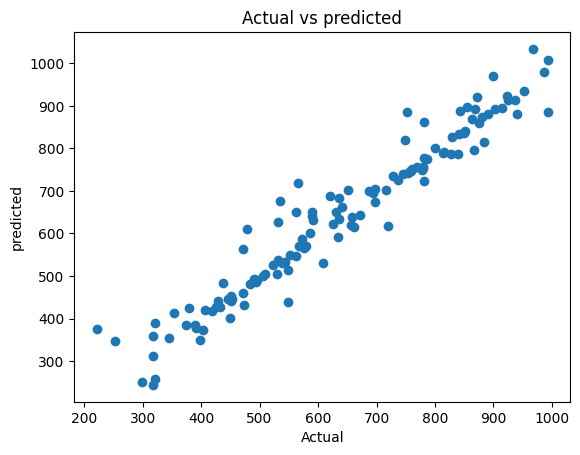

In [98]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test6, np.squeeze(model10.predict(X_test6)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test6, np.squeeze(model10.predict(X_test6)) )
mae= mean_absolute_error(Y_test6, np.squeeze(model10.predict(X_test6)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test6, np.squeeze(model10.predict(X_test6)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [99]:
prediction11 =np.squeeze(model10.predict([[80,2,2,129,prediction10]]))
print("Prediction: {}".format(prediction11))

y_prd=np.squeeze(np.squeeze(model10.predict(X_test6)) )
predic_dif=pd.DataFrame({'Actual':Y_test6,'predict':y_prd,"differences":Y_test6-y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 206ms/step
Prediction: 382.3465881347656
4/4 [==============================] - 0s 9ms/step


,Actual,predict,differences
1224,651,702.772705,-51.772705
563,531,538.310425,-7.310425
768,630,650.995361,-20.995361
1315,940,881.727844,58.272156
1045,814,788.943542,25.056458
1041,782,778.278381,3.721619
506,641,662.909424,-21.909424
27,299,249.574860,49.425140
54,322,389.985199,-67.985199
912,697,705.081726,-8.081726
